In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.io import make_dataloader, collate_fn_basic

from stack_segmentation.training import (
    handle_stacks_data, 
    make_optimization_task, 
    train_loop
)

from pipeline_config import (
    dataloaders_conf,
    aug_config,
    train_conf,
    model_config, 
    optimizer_config,
    loss_config,
    scheduler_config,
)

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

720it [00:01, 649.19it/s]
100%|██████████| 720/720 [00:07<00:00, 92.93it/s] 
8280it [00:00, 224298.68it/s]
7920it [00:00, 223981.28it/s]
8280it [00:00, 221623.45it/s]
700it [00:00, 750.02it/s]
100%|██████████| 700/700 [00:07<00:00, 98.85it/s] 
8280it [00:00, 222179.24it/s]
7920it [00:00, 77566.20it/s]
8280it [00:00, 220986.02it/s]
710it [00:00, 732.20it/s]
100%|██████████| 710/710 [00:07<00:00, 96.06it/s] 
7920it [00:00, 225409.94it/s]
7560it [00:00, 219583.38it/s]
8640it [00:00, 219235.71it/s]
720it [00:03, 214.84it/s]
100%|██████████| 720/720 [00:07<00:00, 93.91it/s] 
8280it [00:00, 220584.59it/s]
7920it [00:00, 219003.49it/s]
8280it [00:00, 208887.72it/s]
700it [00:03, 231.41it/s]
100%|██████████| 700/700 [00:07<00:00, 98.53it/s] 
7920it [00:00, 225221.96it/s]
7560it [00:00, 59205.30it/s]
8280it [00:00, 224684.68it/s]
509it [00:00, 657.24it/s]
100%|██████████| 509/509 [00:02<00:00, 193.33it/s]
2080it [00:00, 220769.60it/s]
2080it [00:00, 208751.73it/s]
3664it [00:00, 217137.83it/s]


In [8]:
len(data_train), len(data_val), len(data_test)

(83440, 79840, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        model_config=model_config,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [10]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [11]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [12]:
device = 'cuda:0'

In [13]:
model, criterion, optimizer, scheduler = make_optimization_task(
    device,
    model_config=model_config,
    loss_config=loss_config, 
    optimizer_config=optimizer_config,
    scheduler_config=scheduler_config)

## Run experiment

In [ ]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/2608 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.039991


100%|██████████| 2495/2495 [03:02<00:00, 13.70it/s]


Mean val loss: 0.023294


  0%|          | 0/2608 [00:00<?, ?it/s]

Epoch 1...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.021139


100%|██████████| 2495/2495 [03:02<00:00, 13.68it/s]


Mean val loss: 0.020847


  0%|          | 0/2608 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.019196


100%|██████████| 2495/2495 [03:02<00:00, 13.67it/s]


Mean val loss: 0.01872


  0%|          | 0/2608 [00:00<?, ?it/s]

Epoch 3...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.01813


100%|██████████| 2495/2495 [03:02<00:00, 13.70it/s]


Mean val loss: 0.018598


  0%|          | 0/2608 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.017562


100%|██████████| 2495/2495 [03:02<00:00, 13.70it/s]


Mean val loss: 0.017389


  0%|          | 0/2608 [00:00<?, ?it/s]

Epoch 5...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.016862


100%|██████████| 2495/2495 [03:02<00:00, 13.68it/s]


Mean val loss: 0.016732


  0%|          | 0/2608 [00:00<?, ?it/s]

Epoch 6...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.016299


100%|██████████| 2495/2495 [03:02<00:00, 13.67it/s]


Mean val loss: 0.016551


  0%|          | 0/2608 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.015803


100%|██████████| 2495/2495 [03:02<00:00, 13.67it/s]


Mean val loss: 0.0161


  0%|          | 0/2608 [00:00<?, ?it/s]

Epoch 8...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.015419


100%|██████████| 2495/2495 [03:02<00:00, 13.71it/s]


Mean val loss: 0.015851


  0%|          | 0/2608 [00:00<?, ?it/s]

Epoch 9...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.014975


  0%|          | 0/2608 [00:00<?, ?it/s]

Mean val loss: 0.015888
EarlyStopping counter: 1 out of 15
Epoch 10...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.014537


100%|██████████| 2495/2495 [03:02<00:00, 13.68it/s]


Mean val loss: 0.015716


  0%|          | 0/2608 [00:00<?, ?it/s]

Epoch 11...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.0141


  0%|          | 0/2608 [00:00<?, ?it/s]

Mean val loss: 0.016051
EarlyStopping counter: 1 out of 15
Epoch 12...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.013602


  0%|          | 0/2608 [00:00<?, ?it/s]

Mean val loss: 0.015901
EarlyStopping counter: 2 out of 15
Epoch 13...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.013094


  0%|          | 0/2608 [00:00<?, ?it/s]

Mean val loss: 0.016158
EarlyStopping counter: 3 out of 15
Epoch 14...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.012583


  0%|          | 0/2608 [00:00<?, ?it/s]

Mean val loss: 0.016291
EarlyStopping counter: 4 out of 15
Epoch 15...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.012051


  0%|          | 0/2608 [00:00<?, ?it/s]

Mean val loss: 0.016497
EarlyStopping counter: 5 out of 15
Epoch 16...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.011522


  0%|          | 0/2608 [00:00<?, ?it/s]

Mean val loss: 0.016976
EarlyStopping counter: 6 out of 15
Epoch 17...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.011023


  0%|          | 0/2608 [00:00<?, ?it/s]

Mean val loss: 0.017157
EarlyStopping counter: 7 out of 15
Epoch 18...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.010523


  0%|          | 0/2608 [00:00<?, ?it/s]

Mean val loss: 0.017486
EarlyStopping counter: 8 out of 15
Epoch 19...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.010087


  0%|          | 0/2608 [00:00<?, ?it/s]

Mean val loss: 0.017881
EarlyStopping counter: 9 out of 15
Epoch 20...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.0096472


  0%|          | 0/2608 [00:00<?, ?it/s]

Mean val loss: 0.018112
EarlyStopping counter: 10 out of 15
Epoch 21...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.0092472


  0%|          | 0/2608 [00:00<?, ?it/s]

Mean val loss: 0.018462
EarlyStopping counter: 11 out of 15
Epoch 22...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.00886


  0%|          | 0/2608 [00:00<?, ?it/s]

Mean val loss: 0.018979
EarlyStopping counter: 12 out of 15
Epoch 23...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.0085089


  0%|          | 0/2608 [00:00<?, ?it/s]

Mean val loss: 0.019118
EarlyStopping counter: 13 out of 15
Epoch 24...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.0081724


  0%|          | 0/2608 [00:00<?, ?it/s]

Mean val loss: 0.019281
EarlyStopping counter: 14 out of 15
Epoch 25...


  0%|          | 0/2495 [00:00<?, ?it/s]

Mean train loss: 0.0078661


 26%|██▌       | 638/2495 [00:47<02:13, 13.91it/s]

## Dump experiment results

In [8]:
import pickle
import json

In [ ]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [9]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
with open(p, 'rb') as f:
    results = pickle.load(f)

In [ ]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [18]:
# import torch
# model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

<All keys matched successfully>

## Train and validation losses

In [32]:
from itertools import chain

In [33]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [34]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

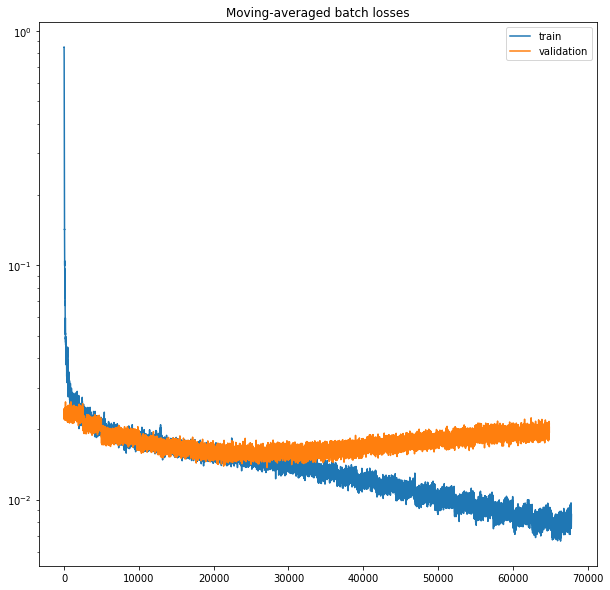

In [35]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.yscale('log')
plt.legend(loc='best')

# plt.ylim([1e-2, 1])
plt.show()

In [36]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

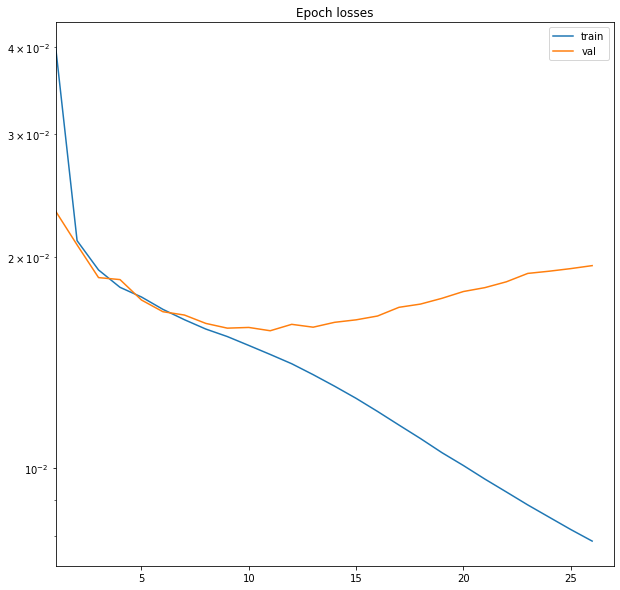

In [37]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [38]:
import os

In [39]:
import torch

In [40]:
from visualization_utils import output_to_binary, plot_sample, make_colored_diff

In [41]:
threshold = 0.5
to_plot = 10

Prediction for carb96558:


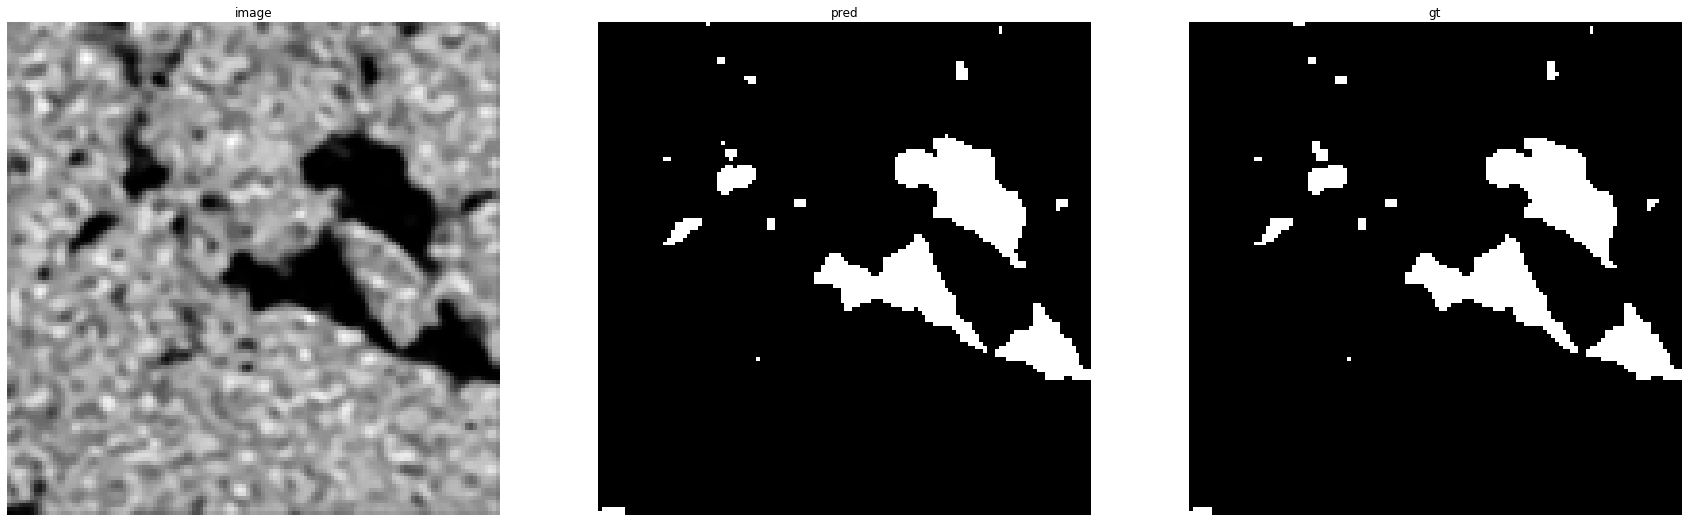

accuracy    : 0.99688720703125
precision   : 0.9803646563814866
recall      : 0.983814215341309
f1          : 0.982086406743941
pr_auc      : 0.9993173015123311
iou         : 0.9648033126293996


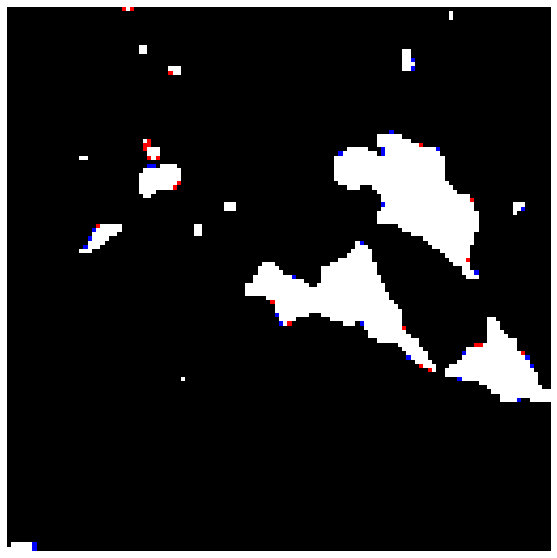

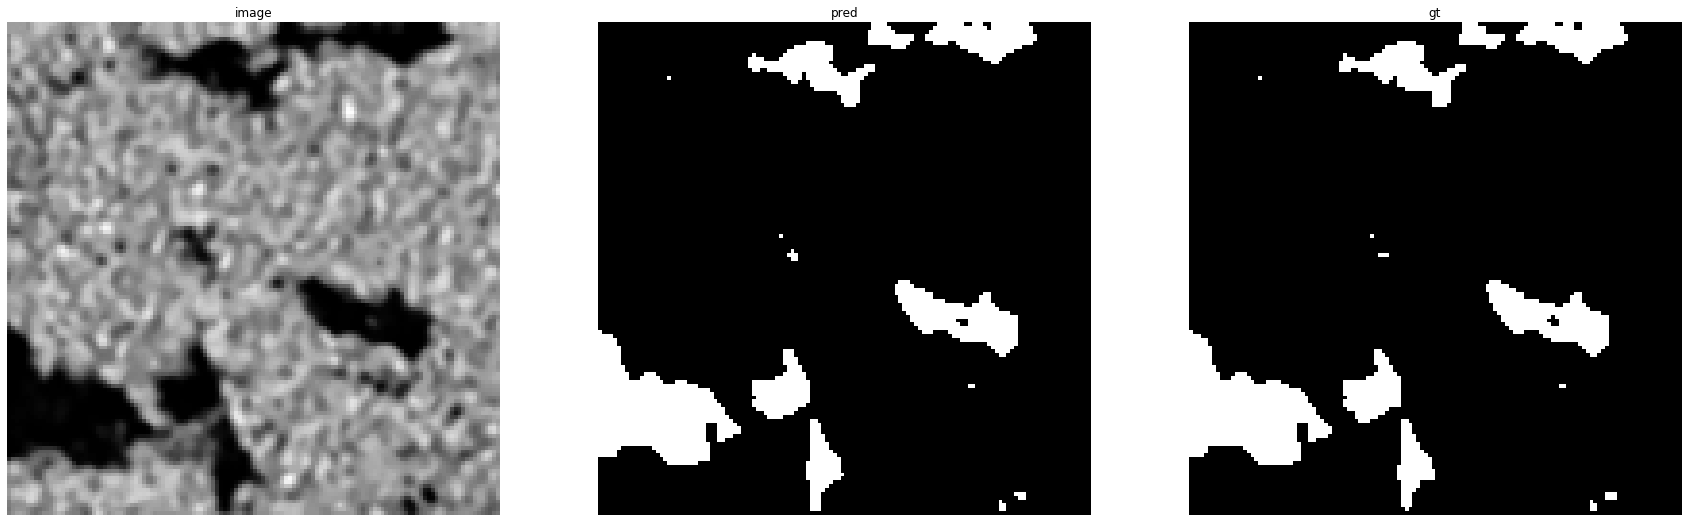

accuracy    : 0.9971923828125
precision   : 0.9865016872890888
recall      : 0.9876126126126126
f1          : 0.9870568373663478
pr_auc      : 0.9993390195034507
iou         : 0.9744444444444444


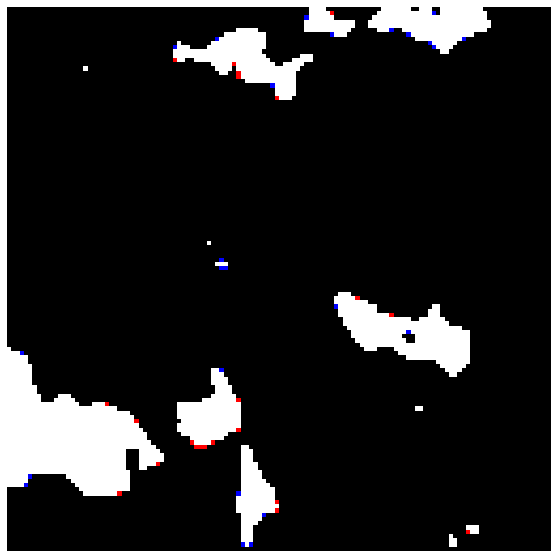

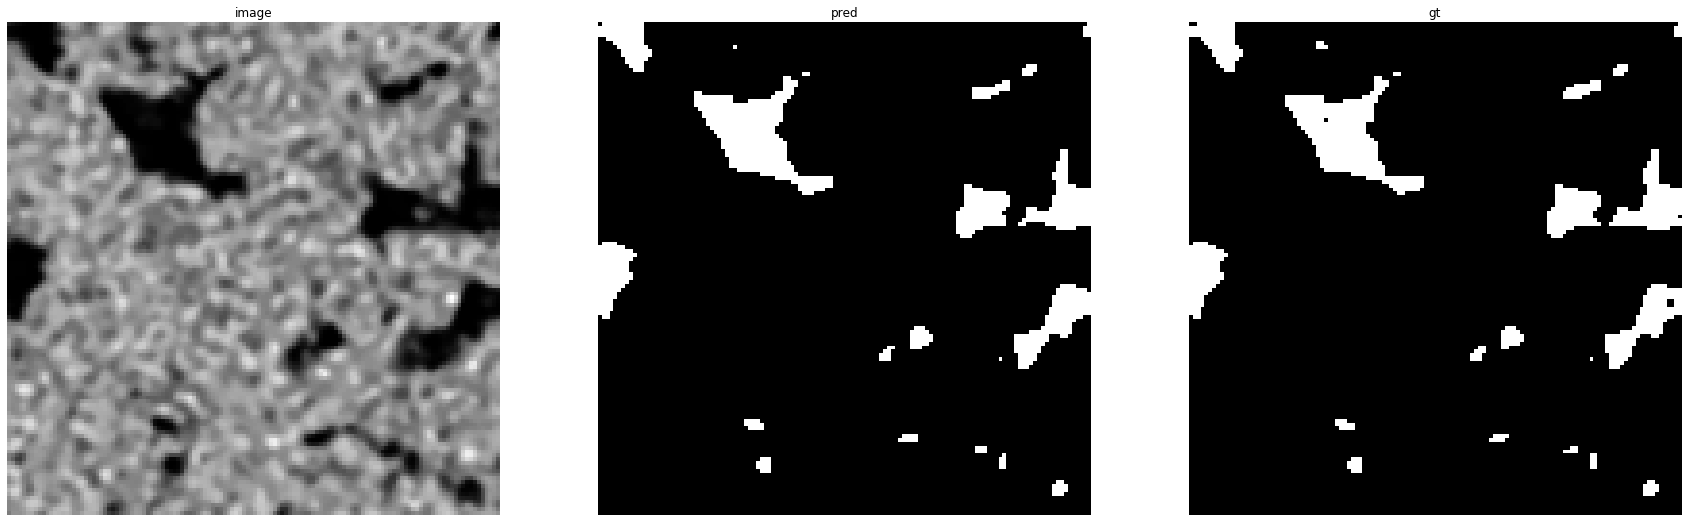

accuracy    : 0.99664306640625
precision   : 0.9782439782439782
recall      : 0.97900466562986
f1          : 0.9786241741158181
pr_auc      : 0.9985526868909085
iou         : 0.9581430745814308


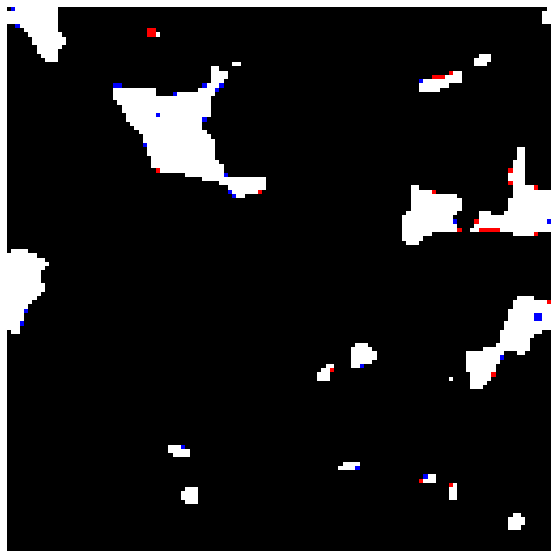

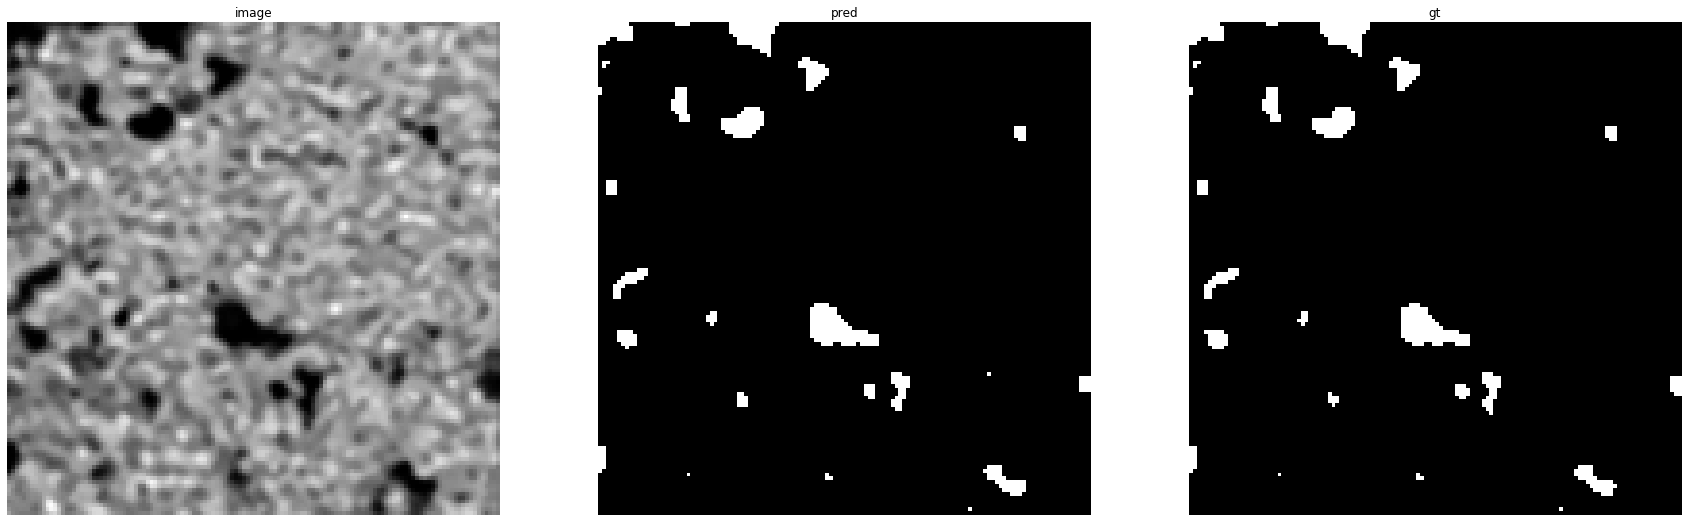

accuracy    : 0.99847412109375
precision   : 0.9777397260273972
recall      : 0.9794168096054888
f1          : 0.9785775492716368
pr_auc      : 0.9985979883660111
iou         : 0.9580536912751678


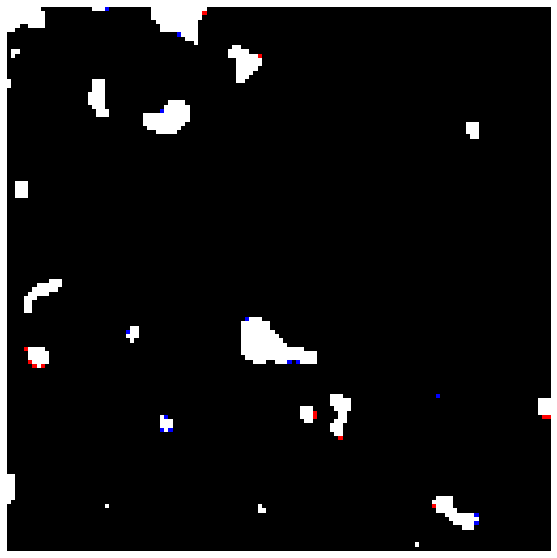

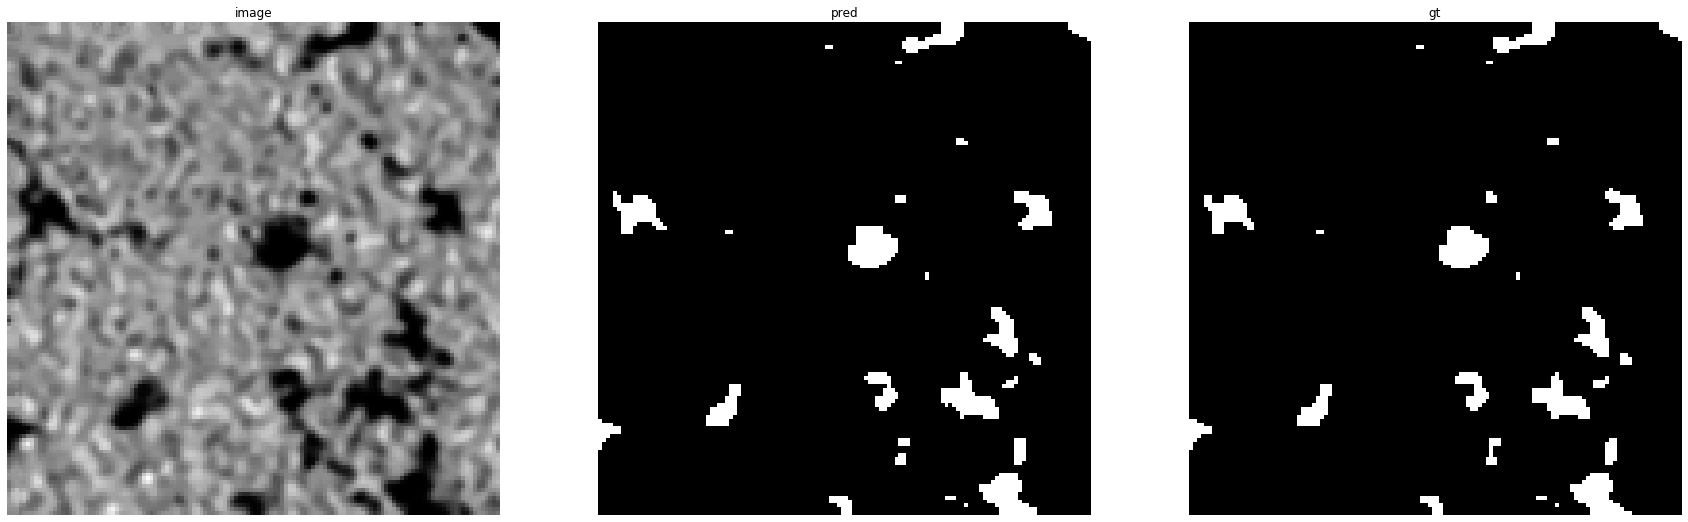

accuracy    : 0.9979248046875
precision   : 0.9762202753441802
recall      : 0.9811320754716981
f1          : 0.9786700125470514
pr_auc      : 0.998694237976001
iou         : 0.9582309582309583


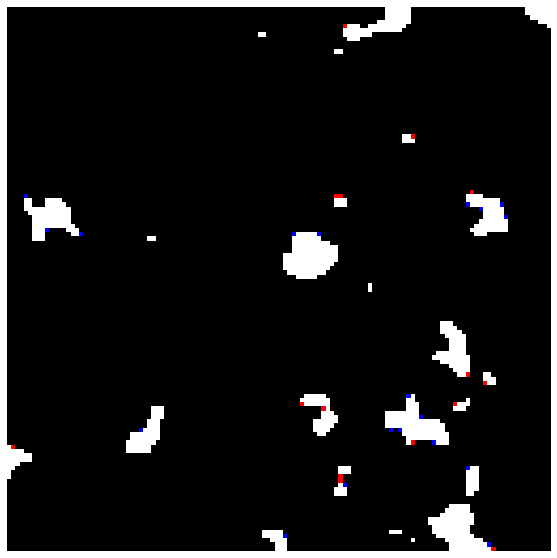

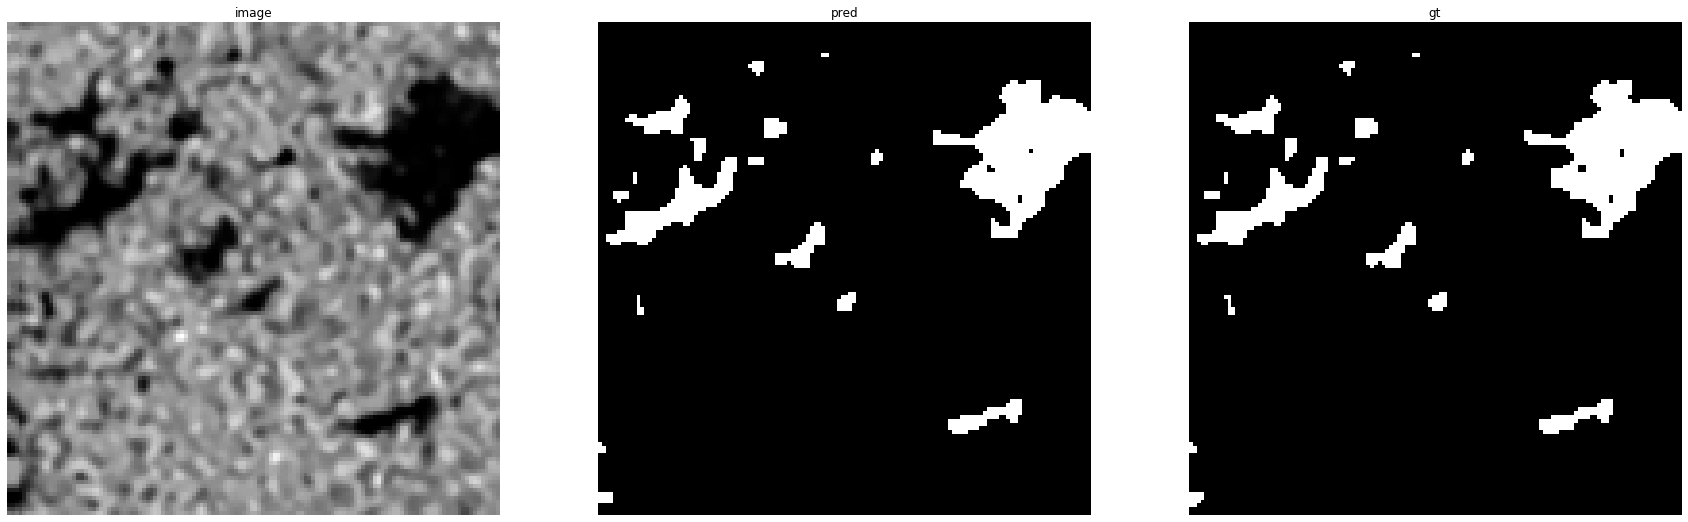

accuracy    : 0.9970703125
precision   : 0.9798416126709864
recall      : 0.9855177407675597
f1          : 0.9826714801444044
pr_auc      : 0.9991969002009711
iou         : 0.9659332860184529


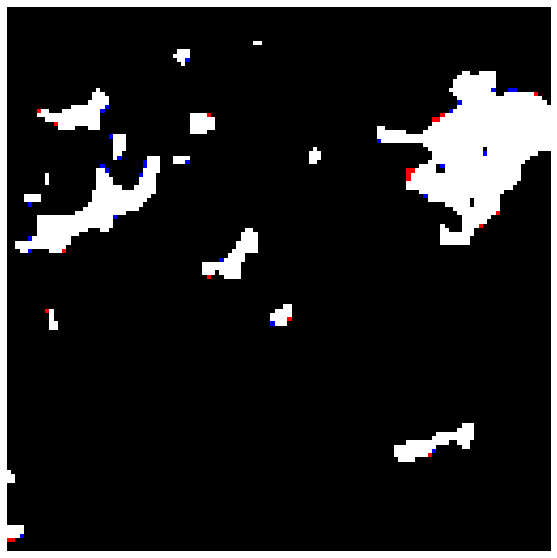

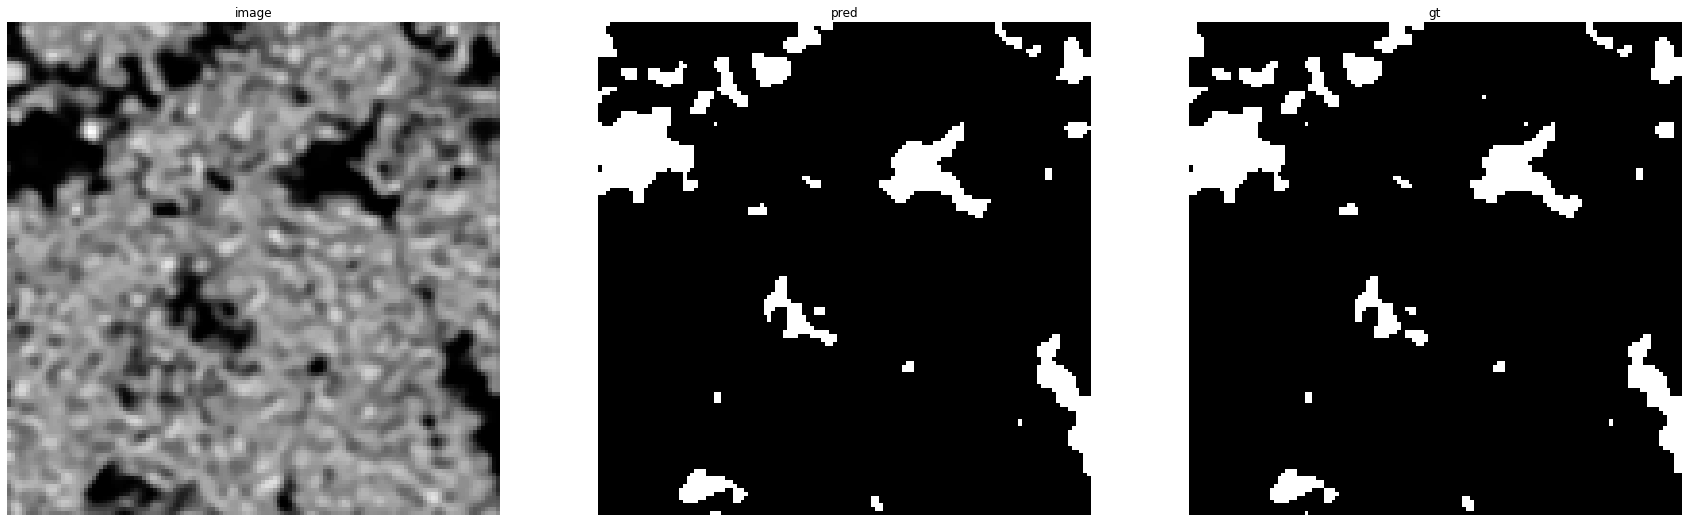

accuracy    : 0.99560546875
precision   : 0.9745264532984977
recall      : 0.9783606557377049
f1          : 0.9764397905759161
pr_auc      : 0.9982127718818198
iou         : 0.9539641943734015


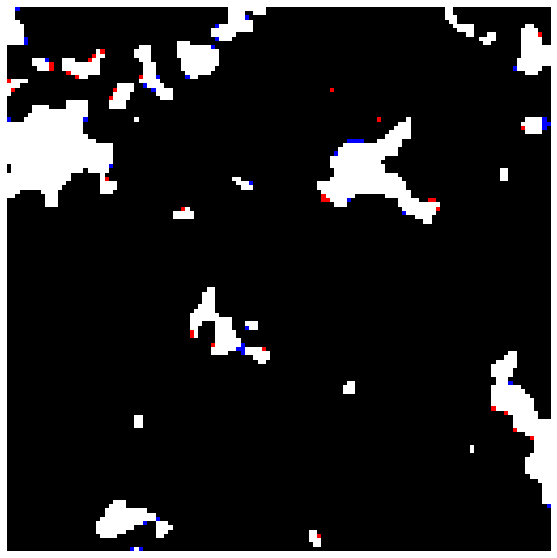

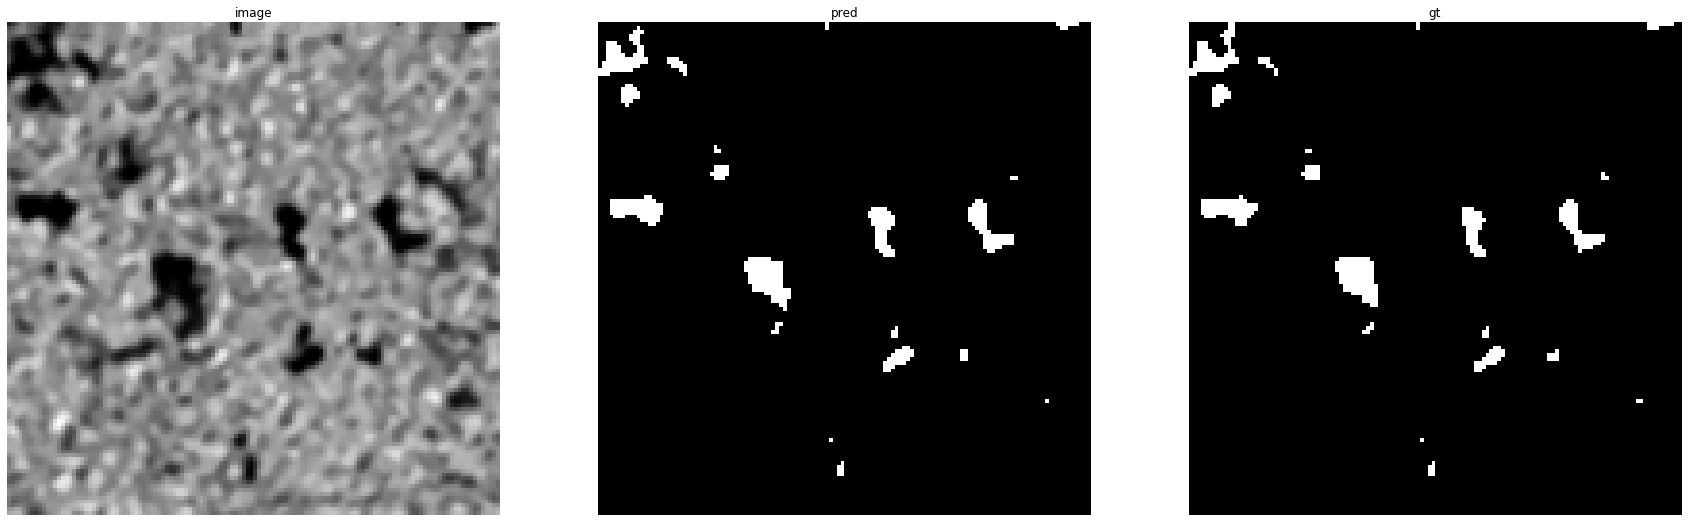

accuracy    : 0.99688720703125
precision   : 0.9373737373737374
recall      : 0.9586776859504132
f1          : 0.947906026557712
pr_auc      : 0.9940240779218329
iou         : 0.9009708737864077


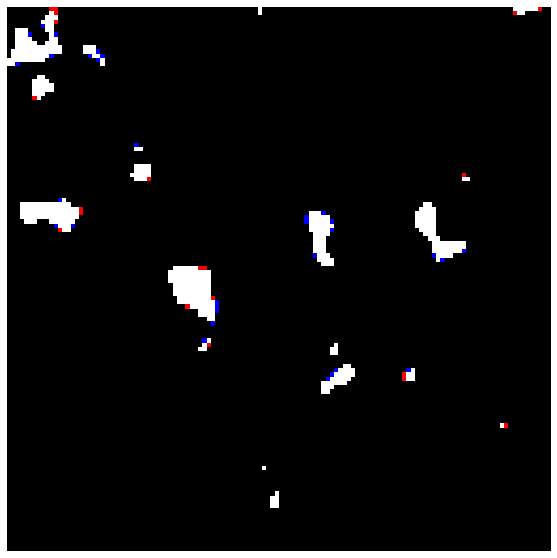

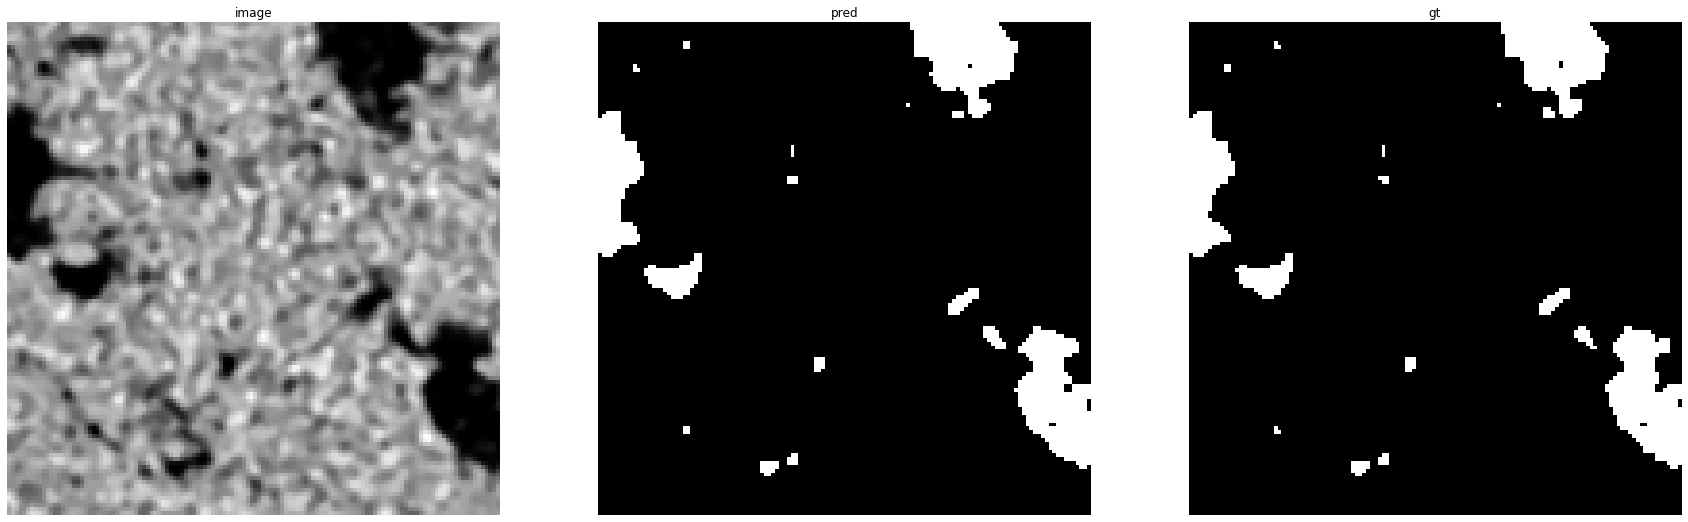

accuracy    : 0.99755859375
precision   : 0.9779202279202279
recall      : 0.9934876989869754
f1          : 0.9856424982053122
pr_auc      : 0.9994901716426113
iou         : 0.9716914366595896


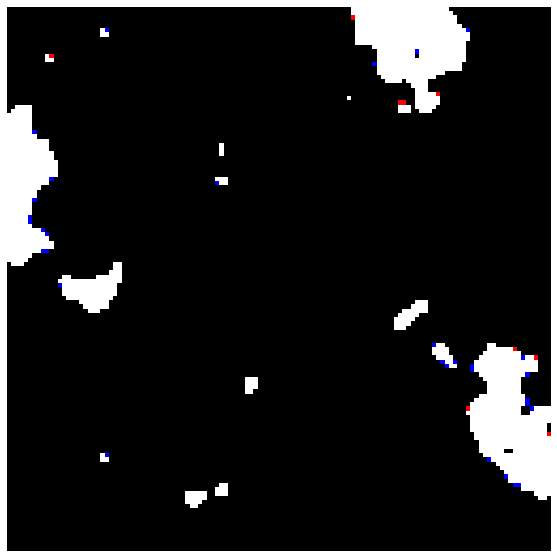

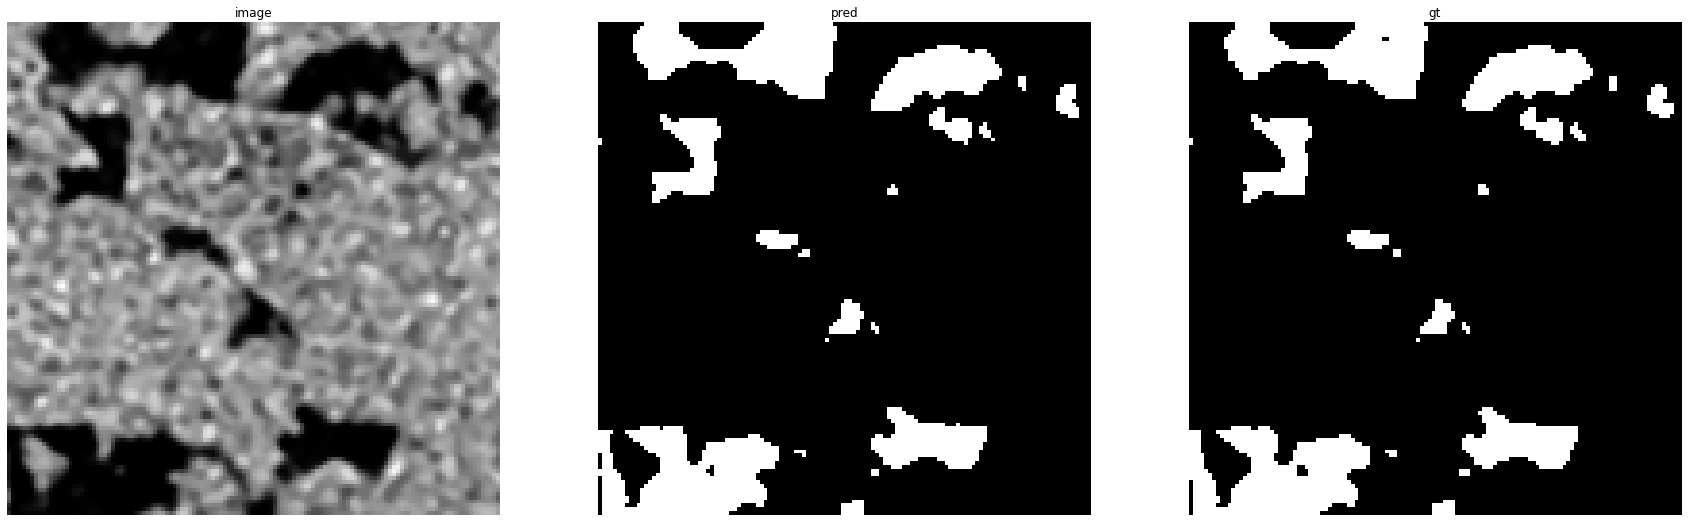

accuracy    : 0.99591064453125
precision   : 0.9849898580121704
recall      : 0.9877949552481693
f1          : 0.986390412350193
pr_auc      : 0.9992725297968024
iou         : 0.9731462925851704


Prediction for SoilB-2:


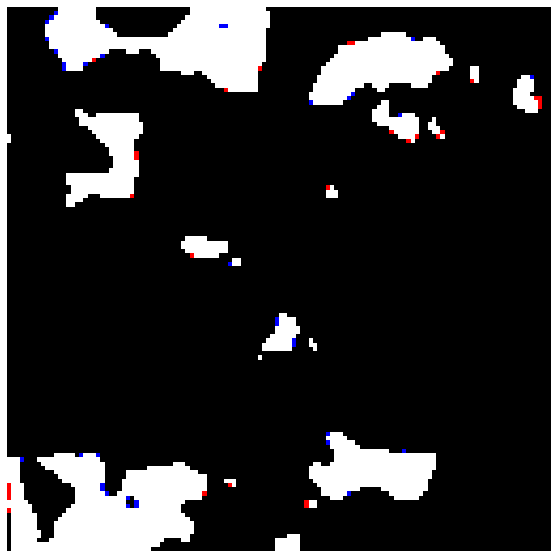

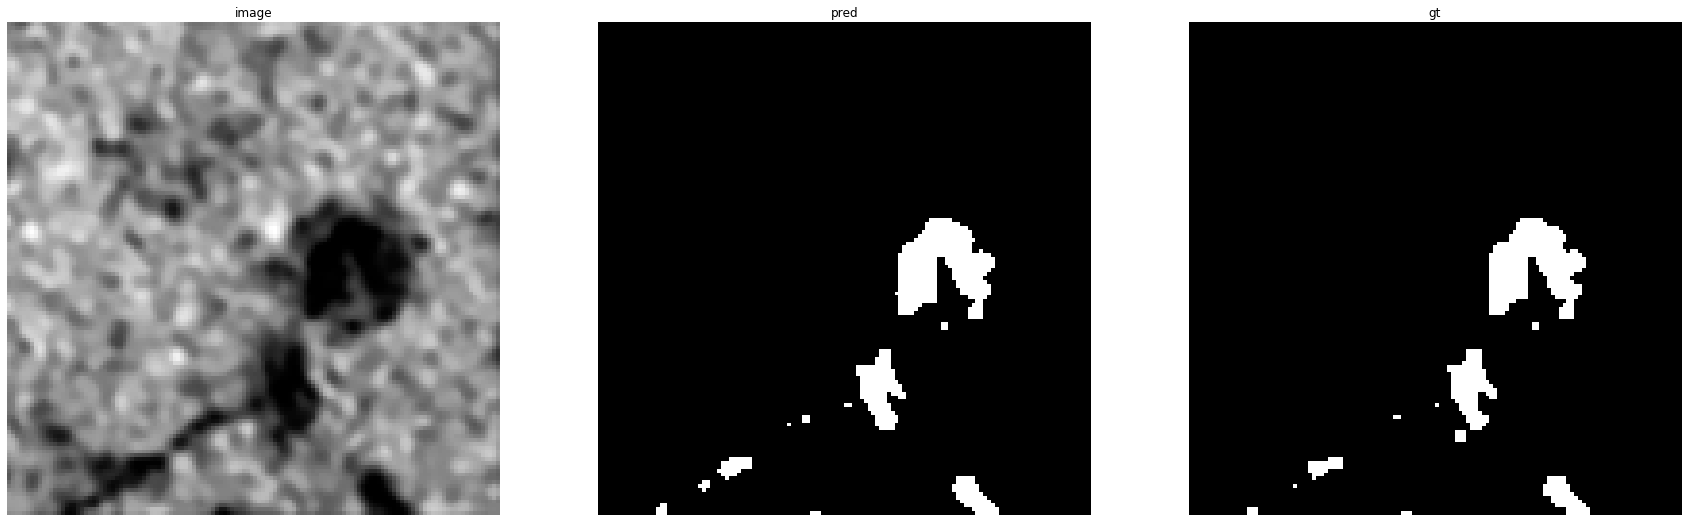

accuracy    : 0.9964599609375
precision   : 0.947136563876652
recall      : 0.967016491754123
f1          : 0.9569732937685461
pr_auc      : 0.9939714589248859
iou         : 0.9174964438122333


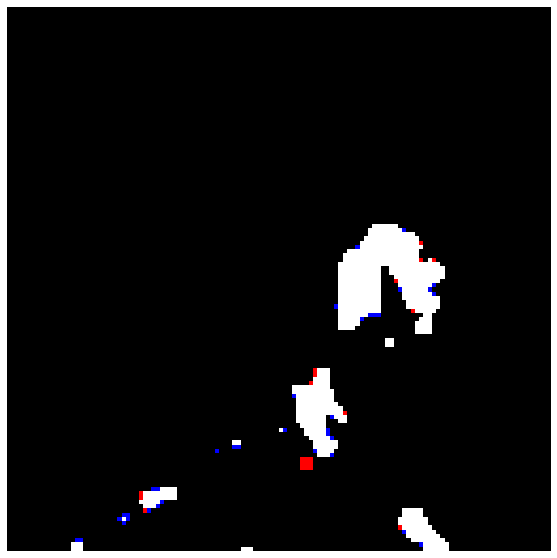

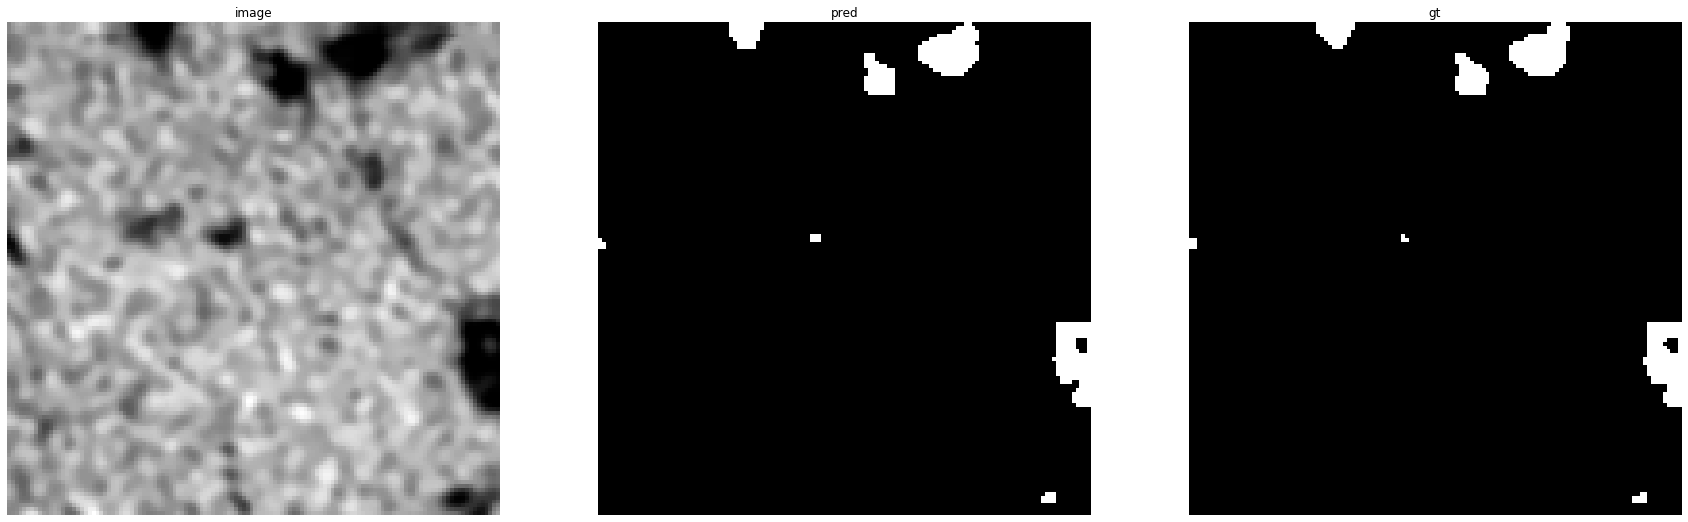

accuracy    : 0.9979248046875
precision   : 0.9669603524229075
recall      : 0.9585152838427947
f1          : 0.962719298245614
pr_auc      : 0.9967725660612986
iou         : 0.9281183932346723


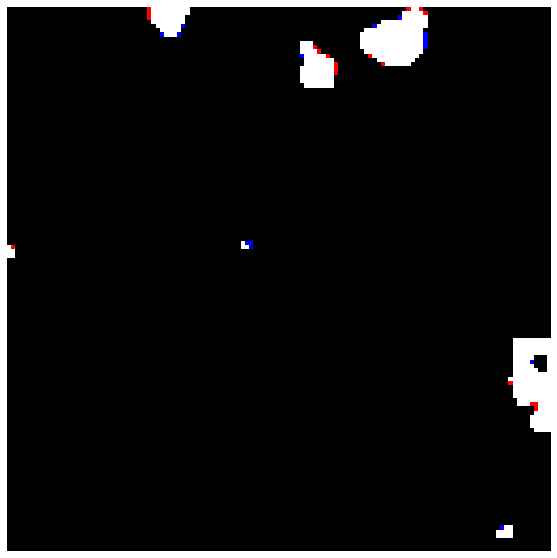

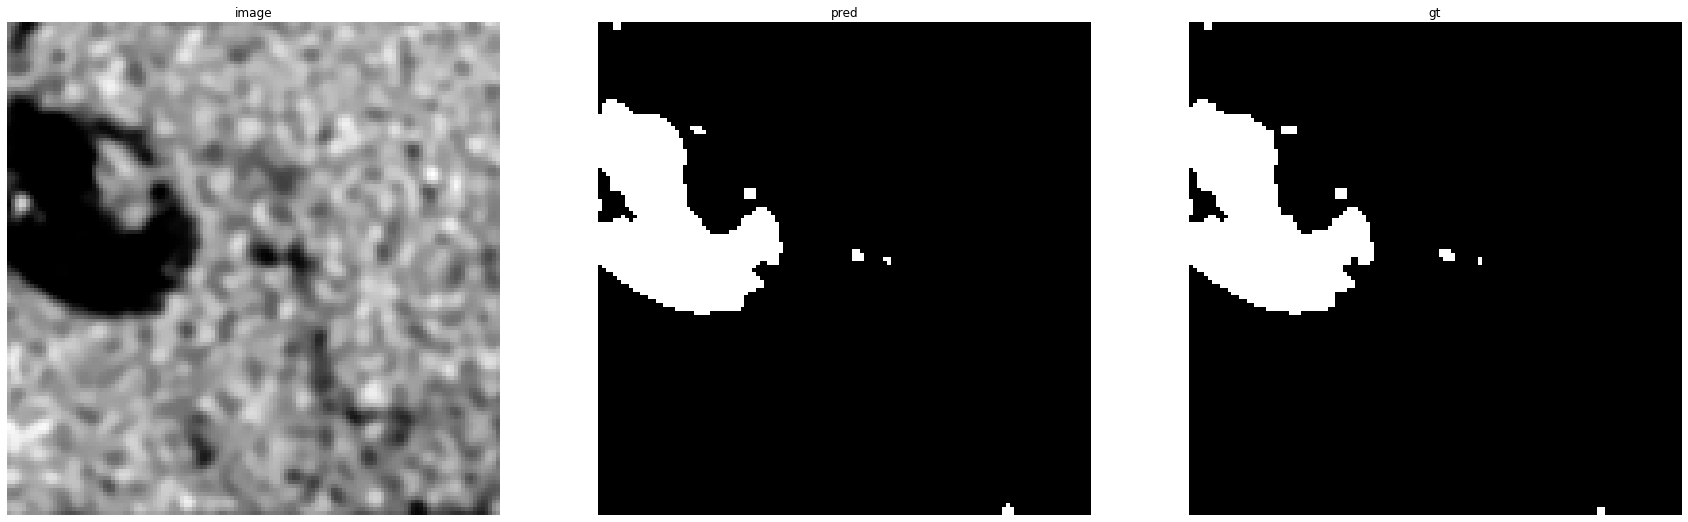

accuracy    : 0.9979248046875
precision   : 0.9900530503978779
recall      : 0.9874338624338624
f1          : 0.9887417218543048
pr_auc      : 0.999481262021469
iou         : 0.9777341191879503


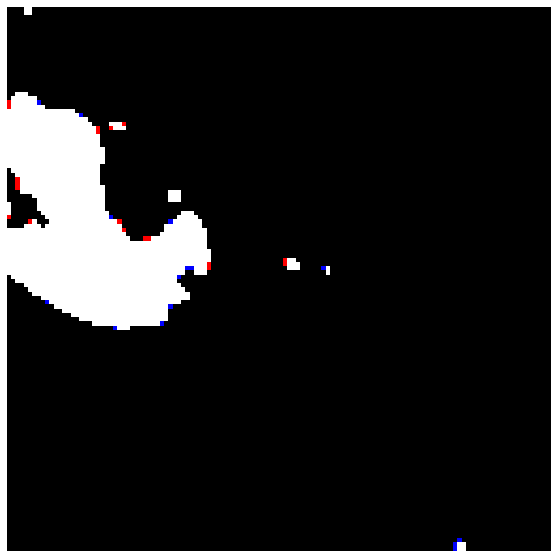

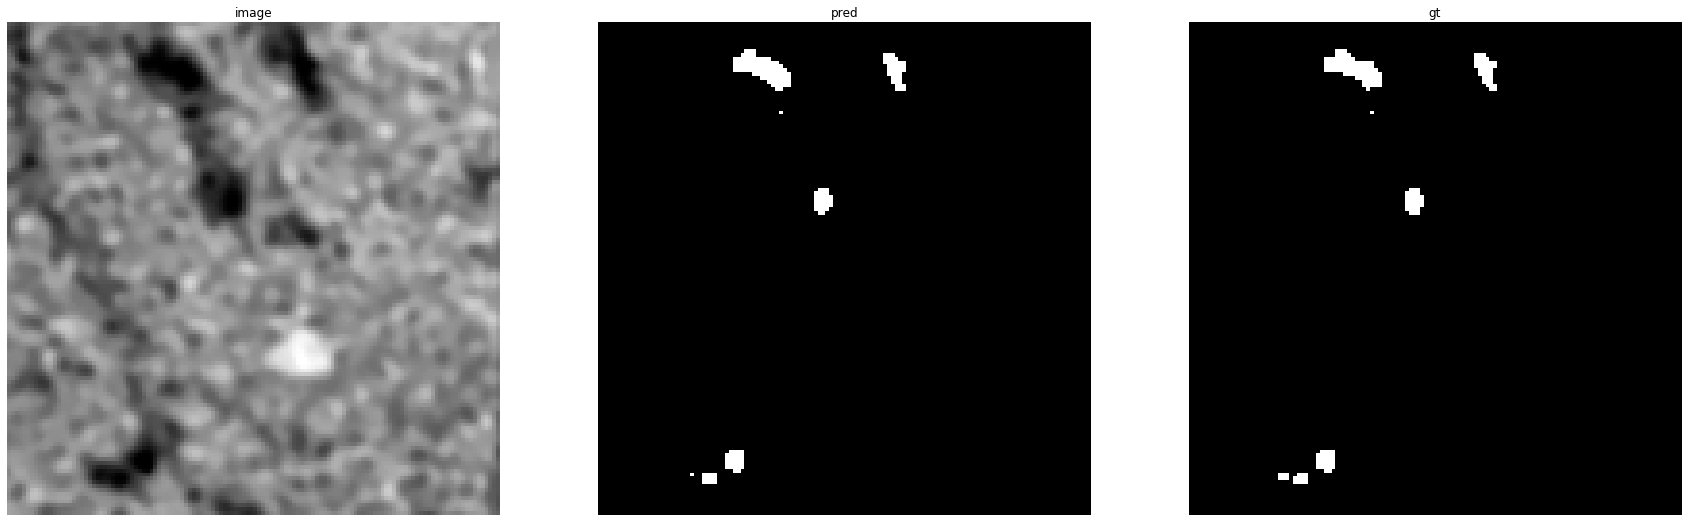

accuracy    : 0.9989013671875
precision   : 0.9536082474226805
recall      : 0.9536082474226805
f1          : 0.9536082474226805
pr_auc      : 0.9930804268052122
iou         : 0.9113300492610837


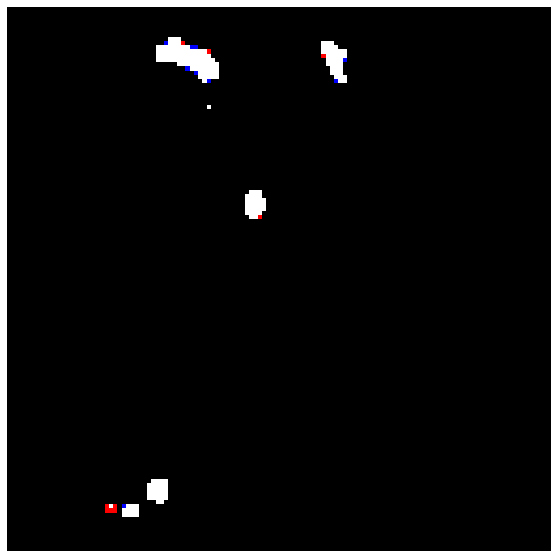

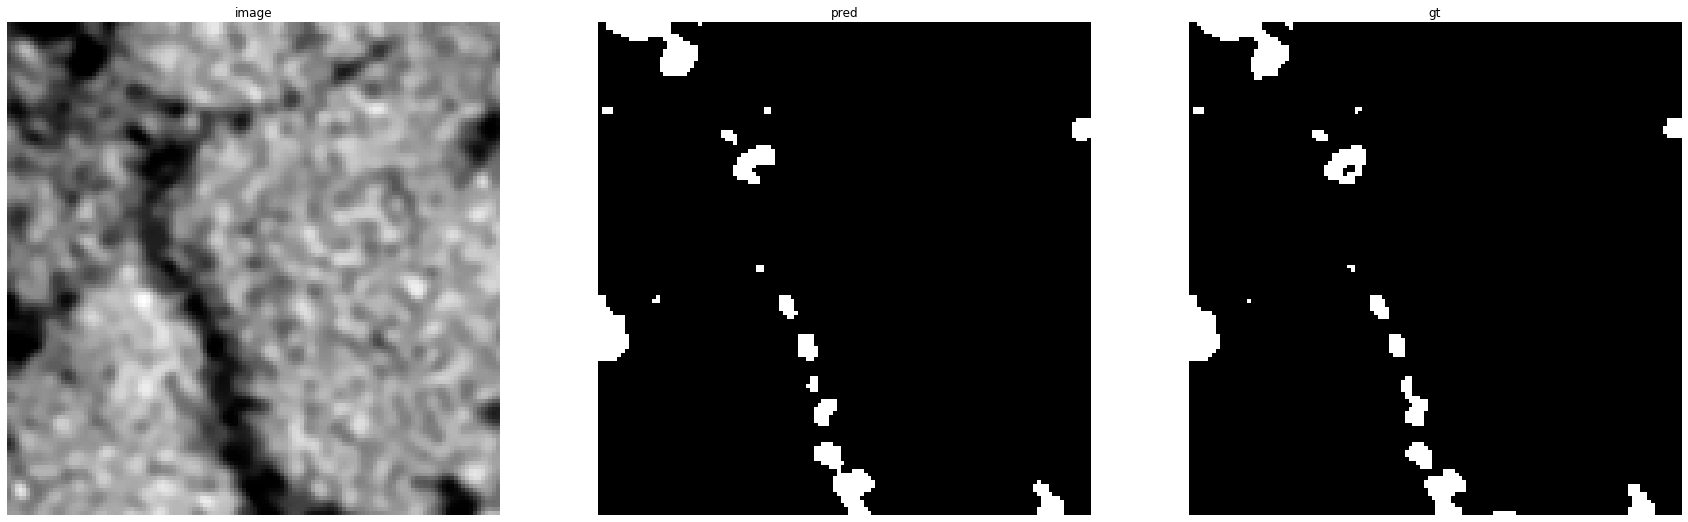

accuracy    : 0.994384765625
precision   : 0.9253968253968254
recall      : 0.928343949044586
f1          : 0.9268680445151034
pr_auc      : 0.9873971210119874
iou         : 0.8637037037037038


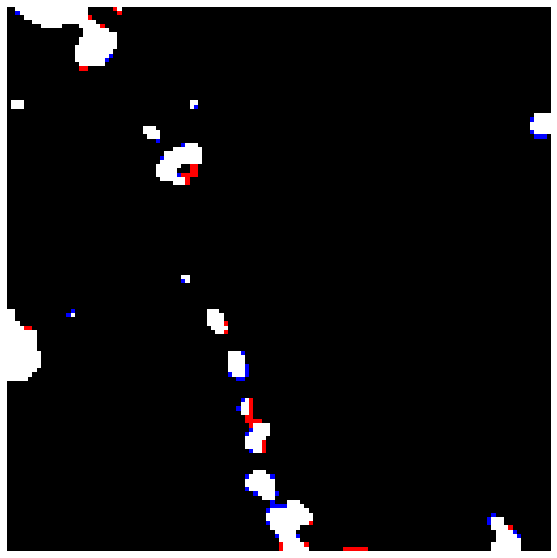

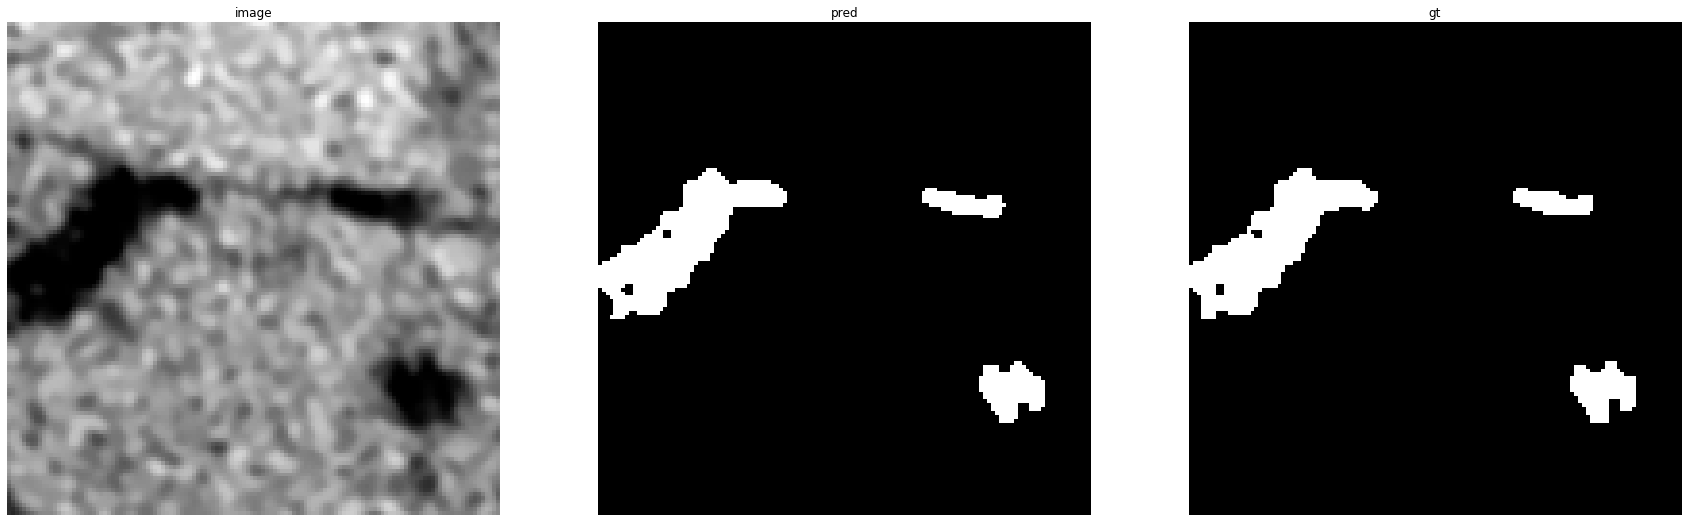

accuracy    : 0.99737548828125
precision   : 0.9785365853658536
recall      : 0.9794921875
f1          : 0.9790141532454857
pr_auc      : 0.9987765750217754
iou         : 0.9588910133843213


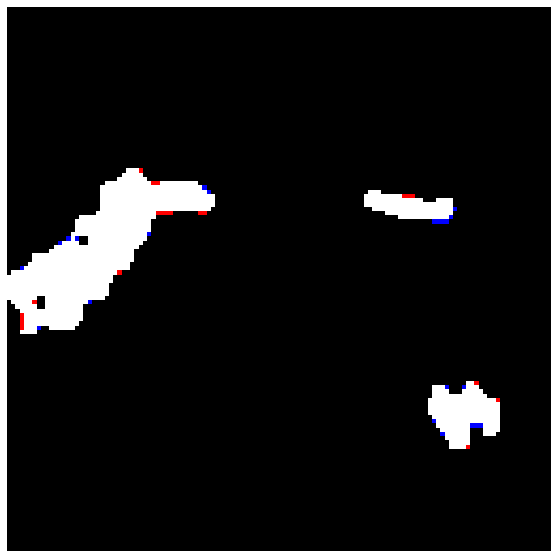

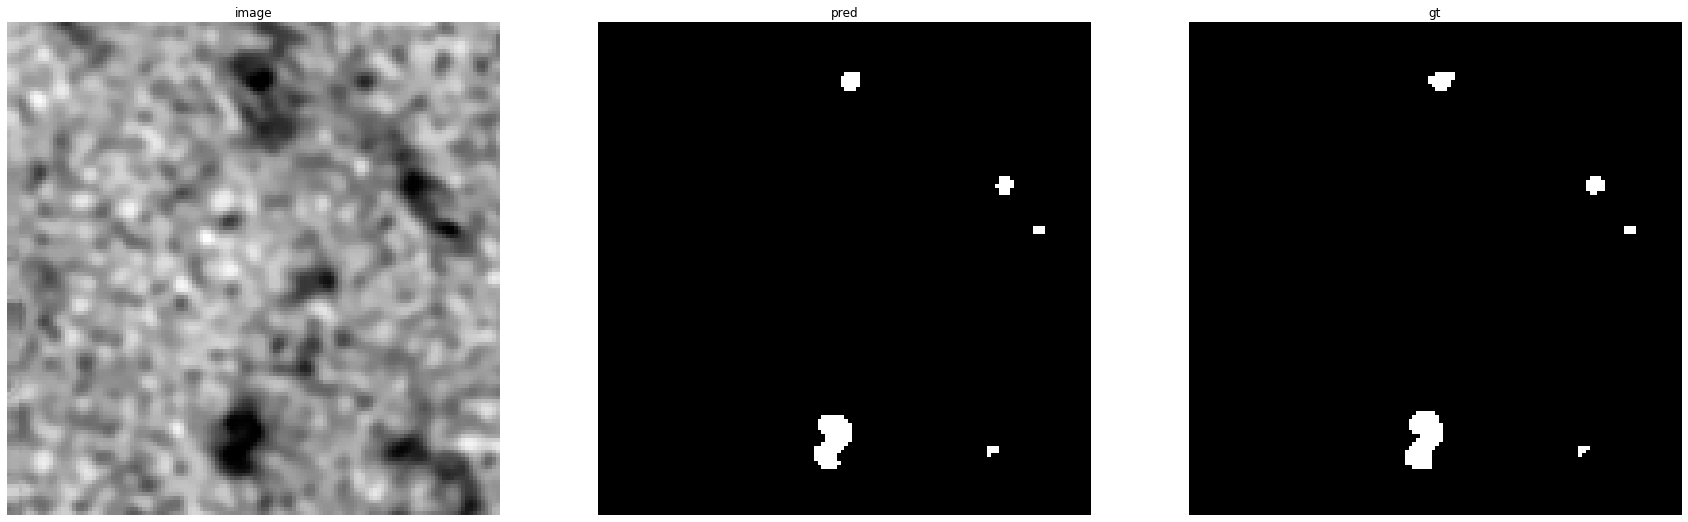

accuracy    : 0.99871826171875
precision   : 0.9735099337748344
recall      : 0.8963414634146342
f1          : 0.9333333333333333
pr_auc      : 0.9913051344519993
iou         : 0.875


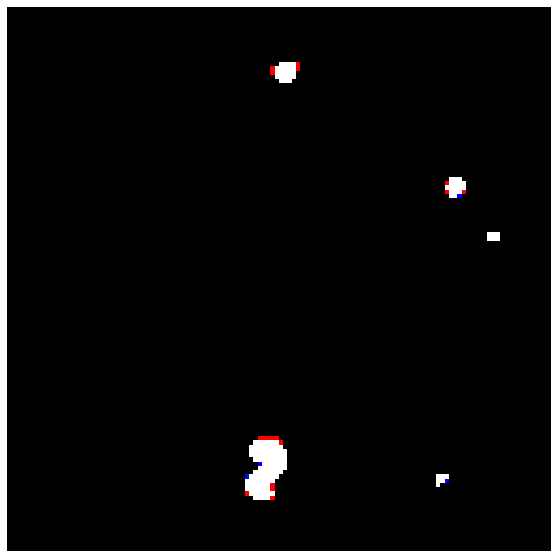

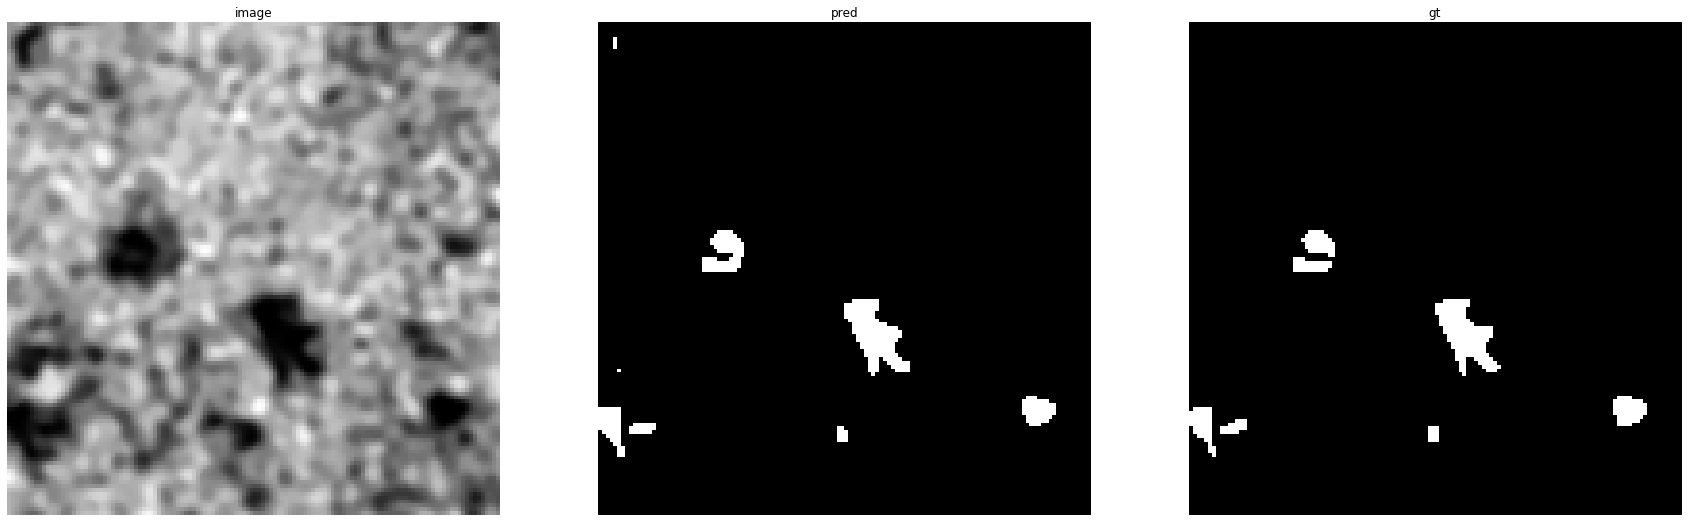

accuracy    : 0.997802734375
precision   : 0.9346733668341709
recall      : 0.9738219895287958
f1          : 0.9538461538461539
pr_auc      : 0.9956228218426039
iou         : 0.9117647058823529


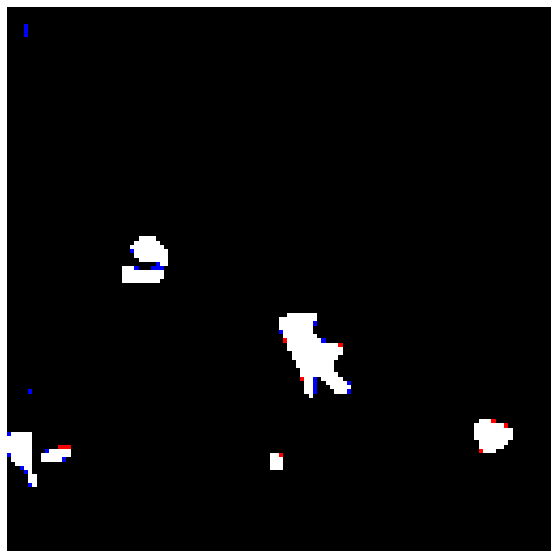

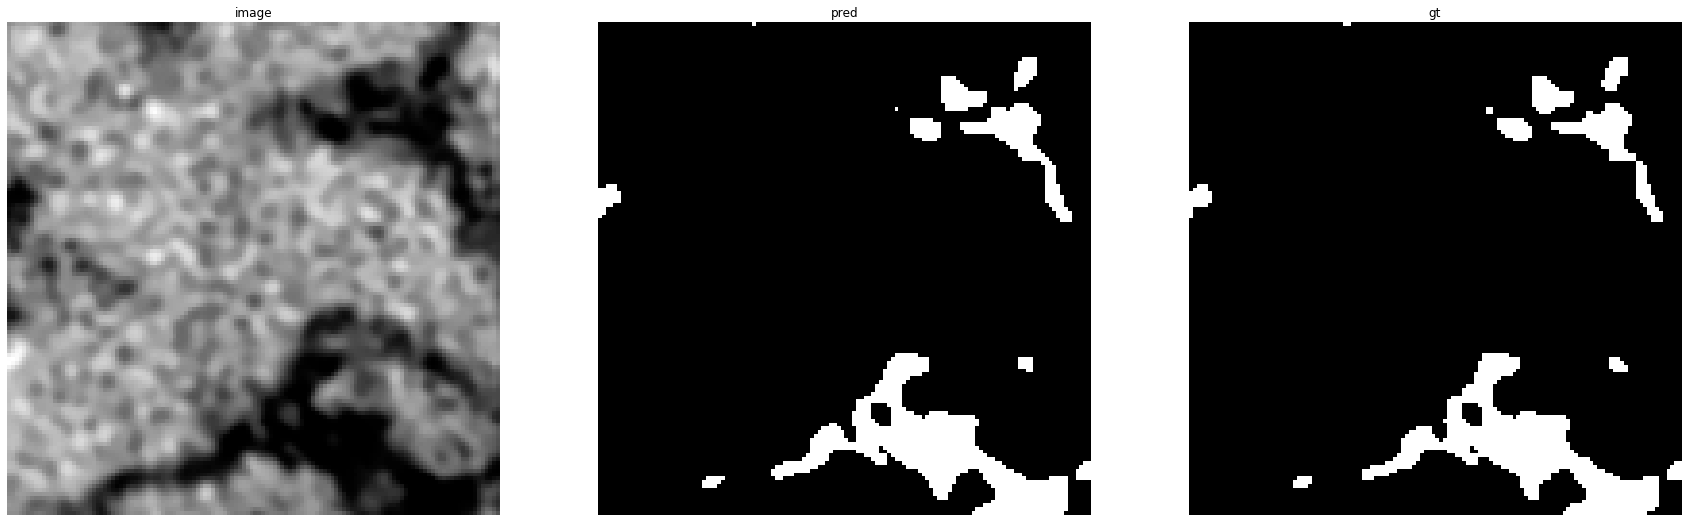

accuracy    : 0.9942626953125
precision   : 0.9585091420534458
recall      : 0.974964234620887
f1          : 0.9666666666666667
pr_auc      : 0.9966726062172419
iou         : 0.9354838709677419


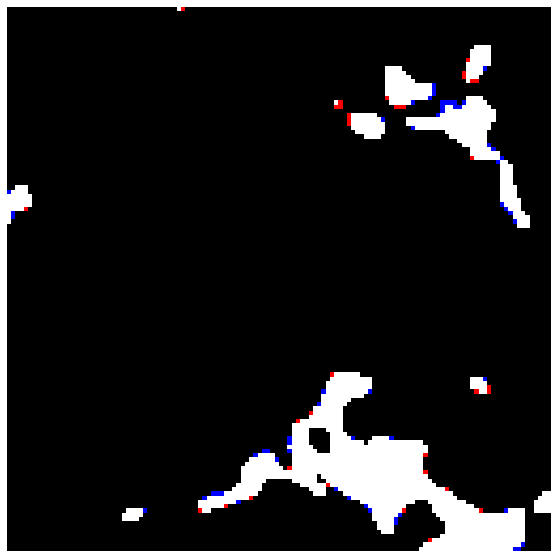

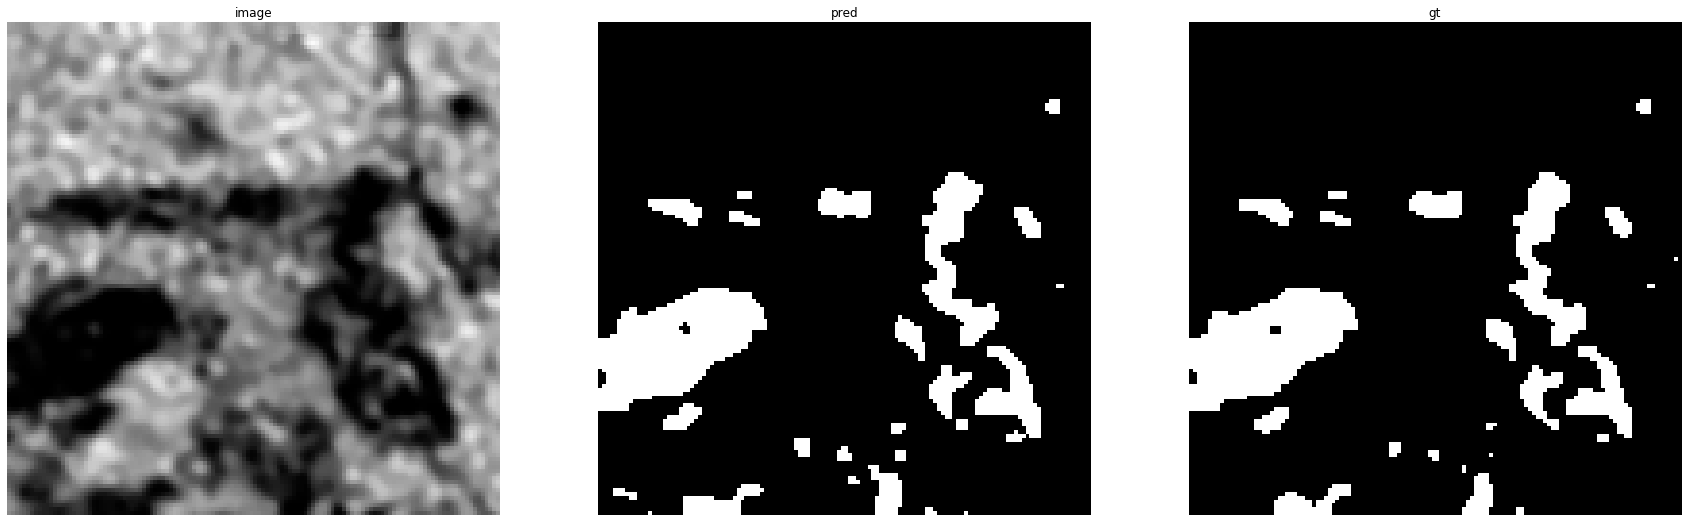

accuracy    : 0.9898681640625
precision   : 0.9405560882070949
recall      : 0.9790419161676647
f1          : 0.9594132029339854
pr_auc      : 0.994599520277774
iou         : 0.9219924812030075


Prediction for Urna_22:


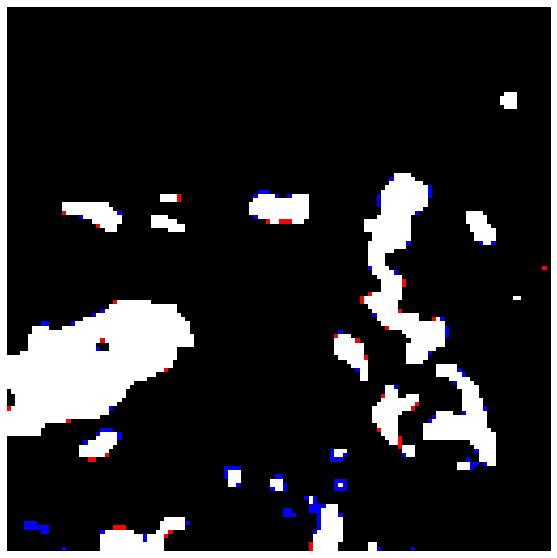

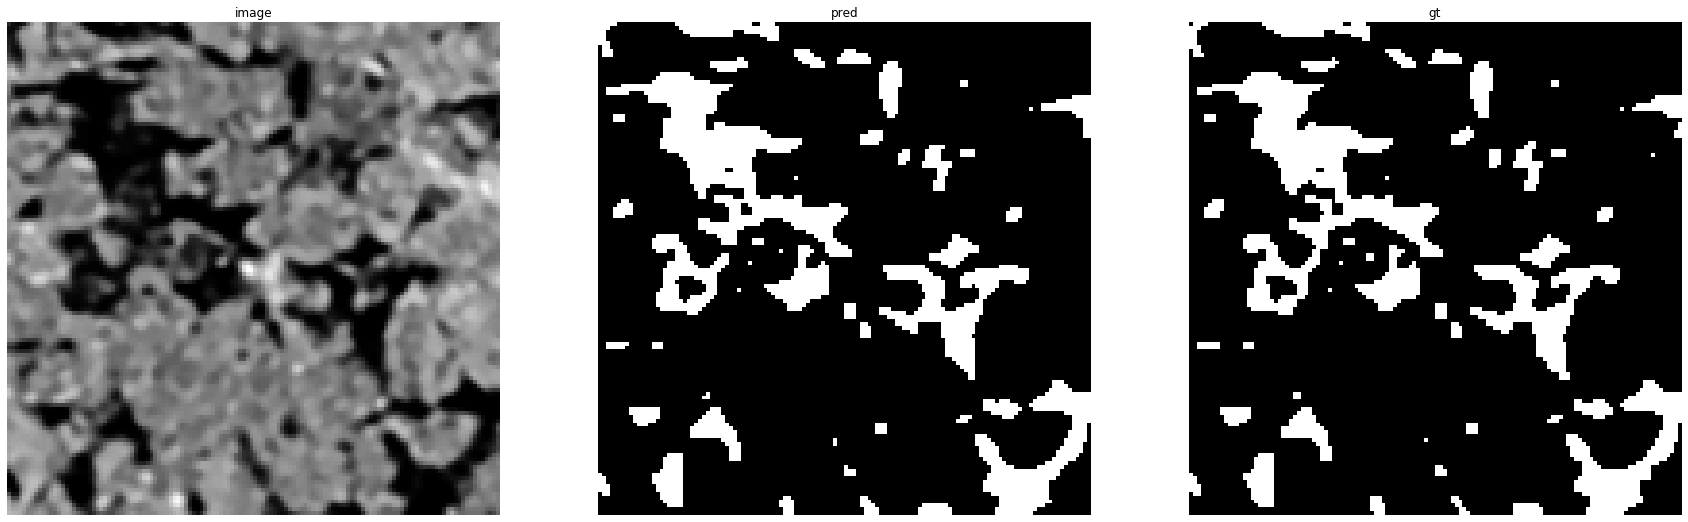

accuracy    : 0.99169921875
precision   : 0.9719042663891779
recall      : 0.9807490374518726
f1          : 0.9763066202090592
pr_auc      : 0.9984072294454878
iou         : 0.953710006807352


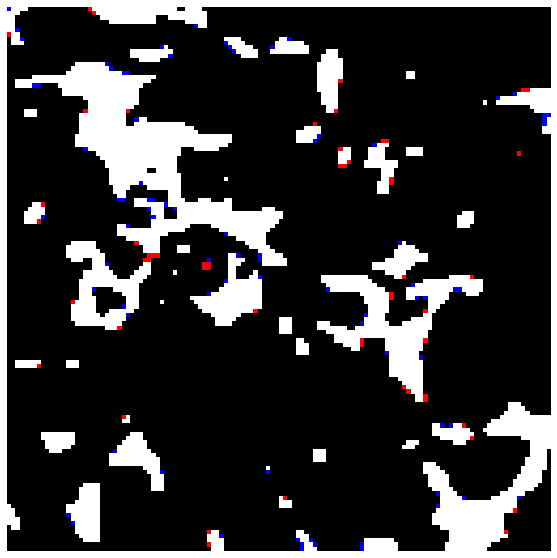

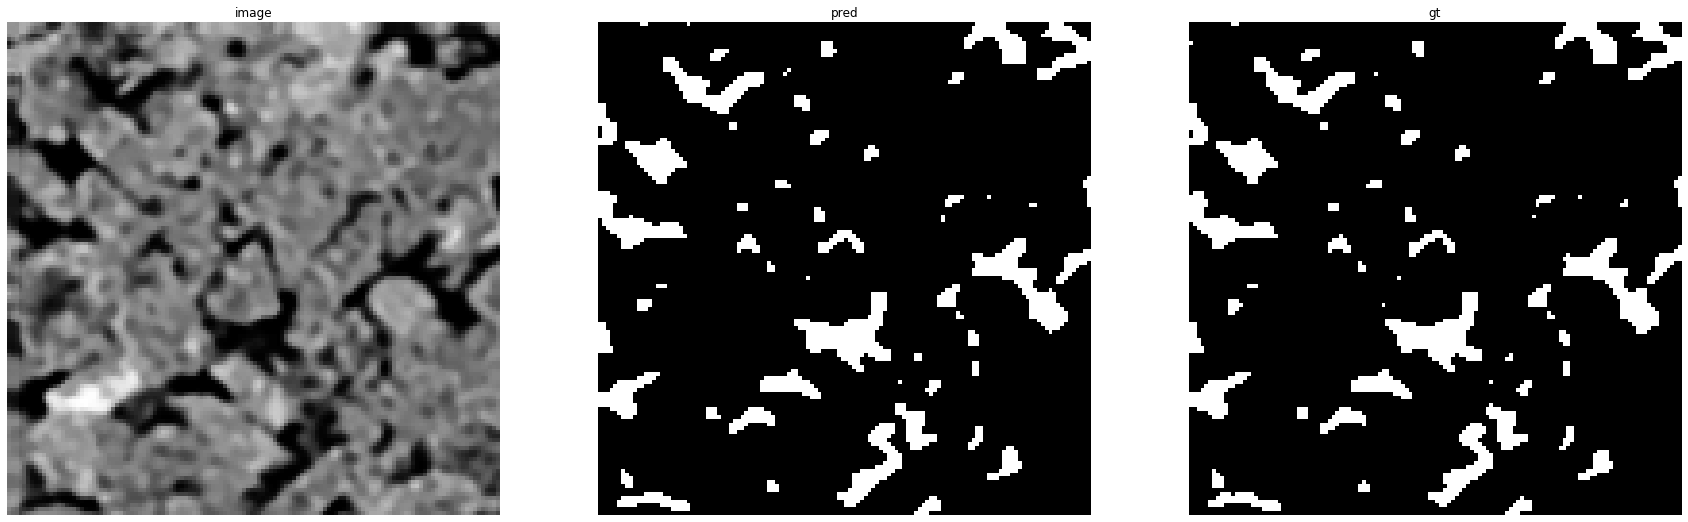

accuracy    : 0.9940185546875
precision   : 0.9667194928684627
recall      : 0.9812332439678284
f1          : 0.9739222990952635
pr_auc      : 0.9980696344269451
iou         : 0.9491701244813278


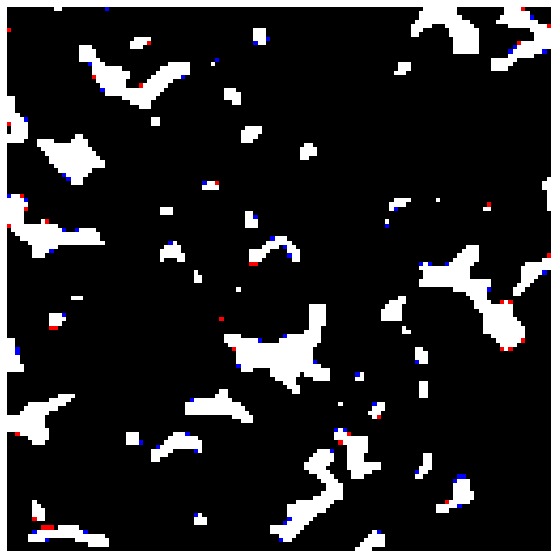

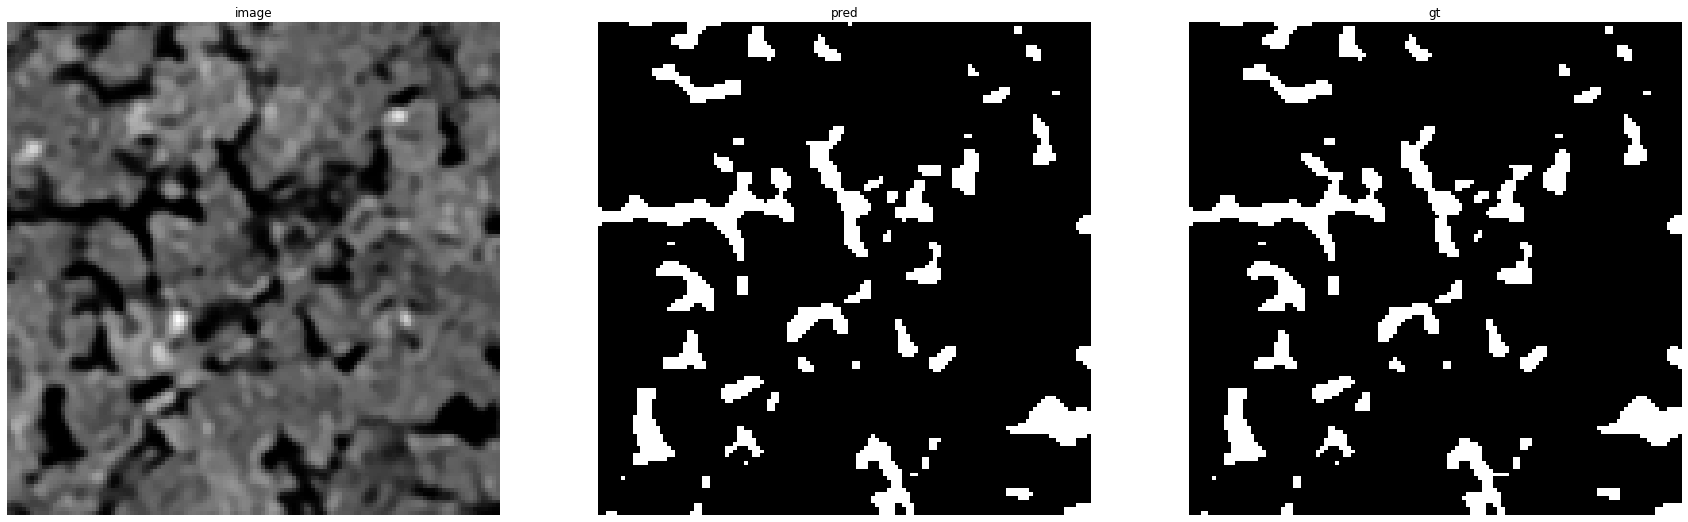

accuracy    : 0.9930419921875
precision   : 0.9679062659195109
recall      : 0.97385955920041
f1          : 0.9708737864077669
pr_auc      : 0.9975451107726978
iou         : 0.9433962264150944


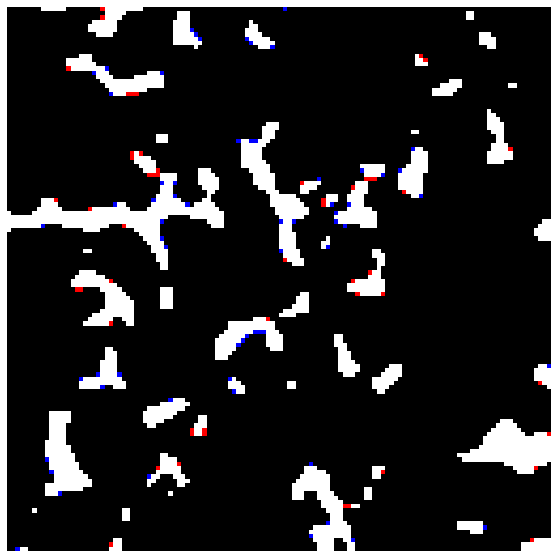

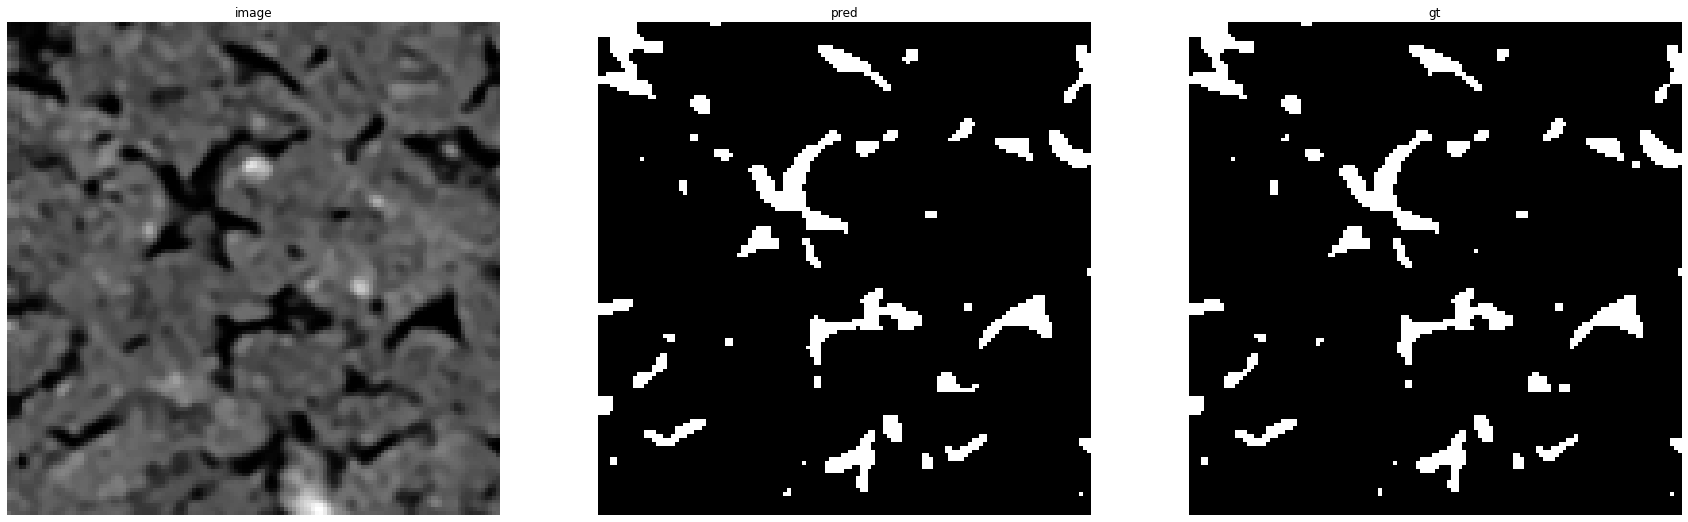

accuracy    : 0.99542236328125
precision   : 0.9637681159420289
recall      : 0.981549815498155
f1          : 0.9725776965265083
pr_auc      : 0.9979575702070212
iou         : 0.9466192170818505


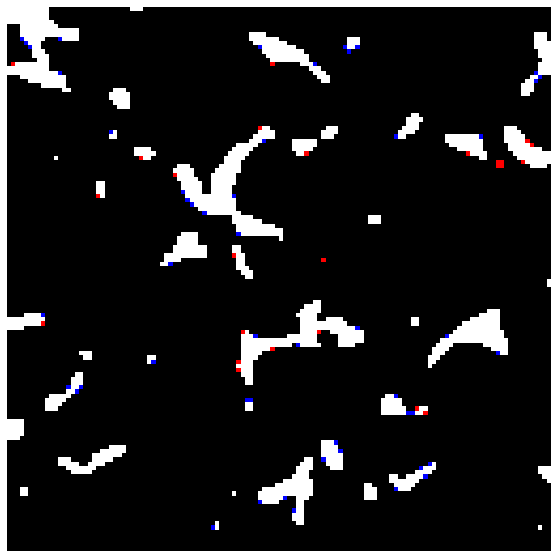

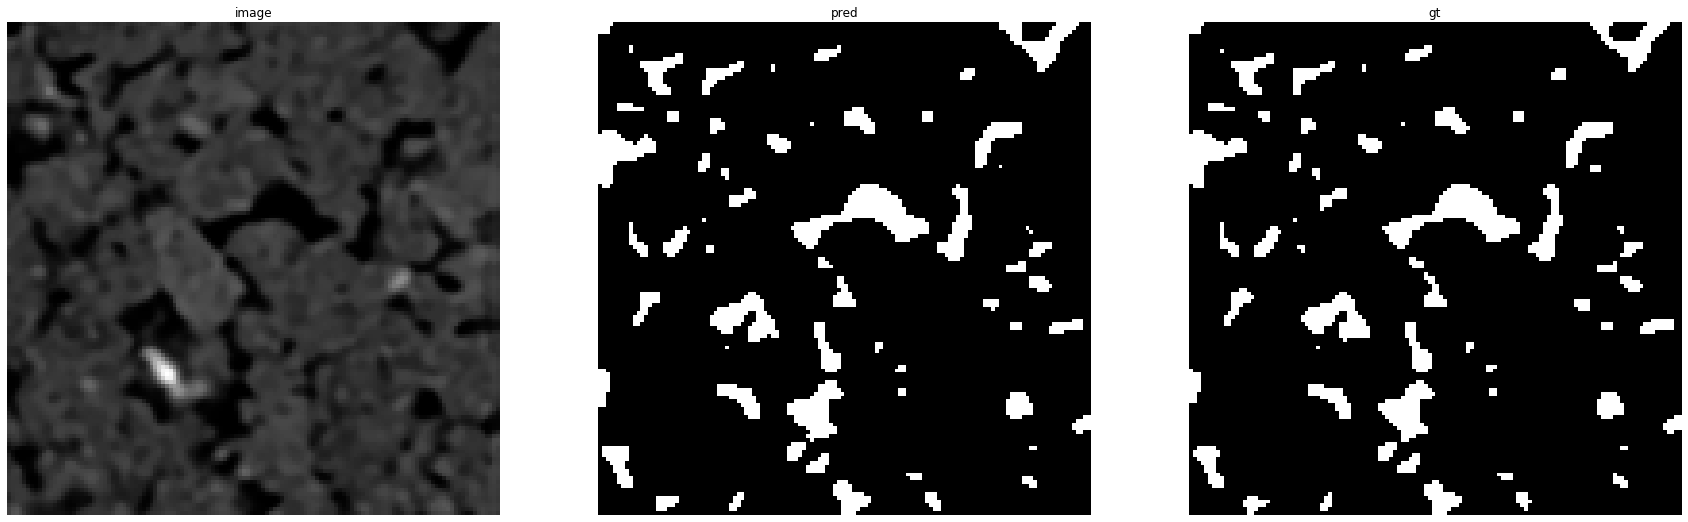

accuracy    : 0.9935302734375
precision   : 0.9640579710144928
recall      : 0.974223784417106
f1          : 0.9691142191142191
pr_auc      : 0.9972326250109729
iou         : 0.9400791407574901


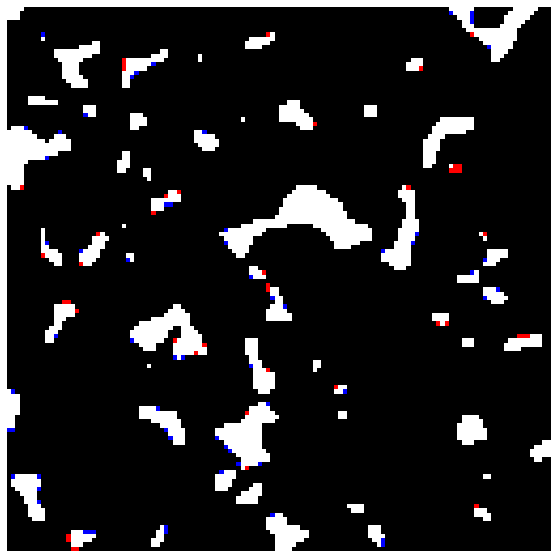

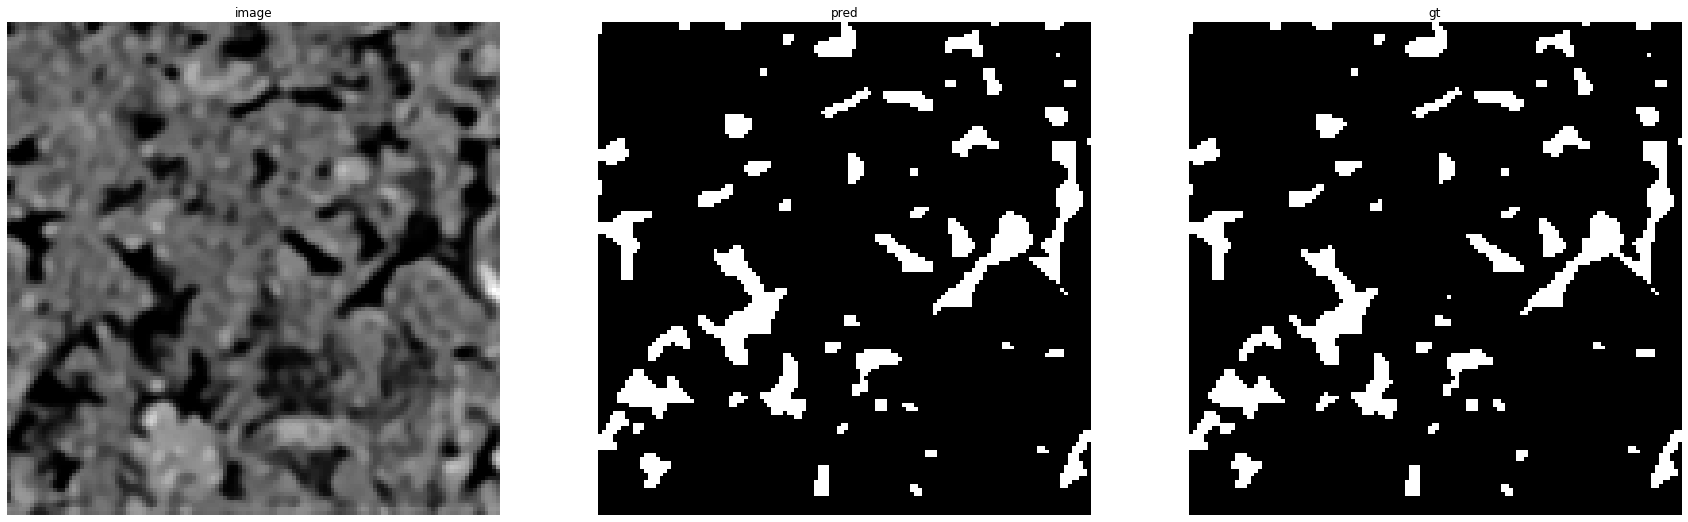

accuracy    : 0.993408203125
precision   : 0.9636363636363636
recall      : 0.9799260433174855
f1          : 0.9717129387113672
pr_auc      : 0.9973862043449825
iou         : 0.9449821701477331


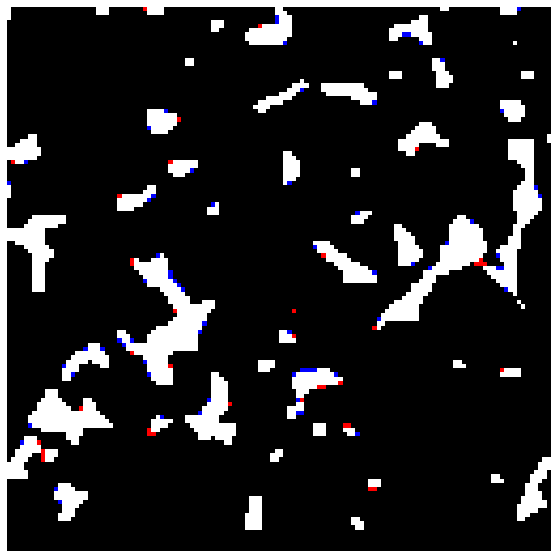

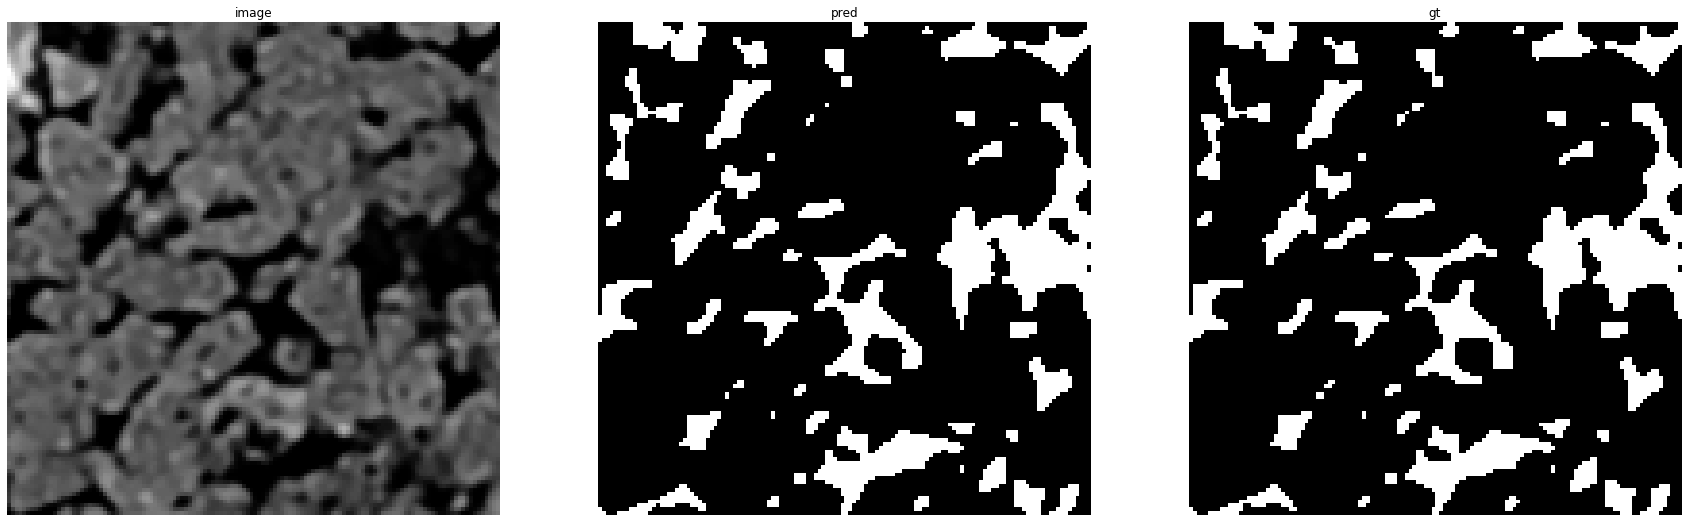

accuracy    : 0.99188232421875
precision   : 0.9764778706282885
recall      : 0.9822540473225405
f1          : 0.9793574421853175
pr_auc      : 0.9984932160073713
iou         : 0.9595498783454988


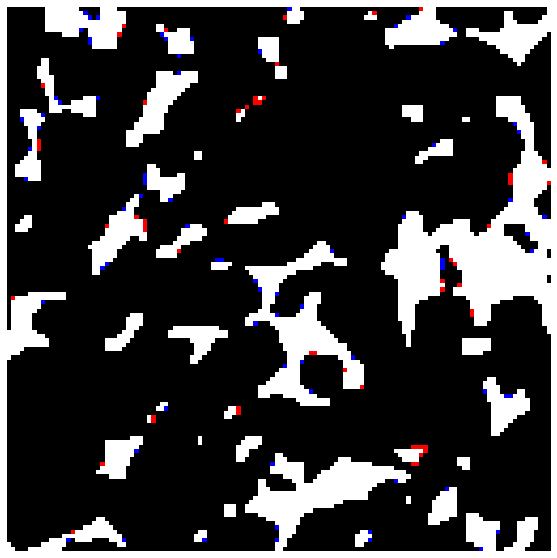

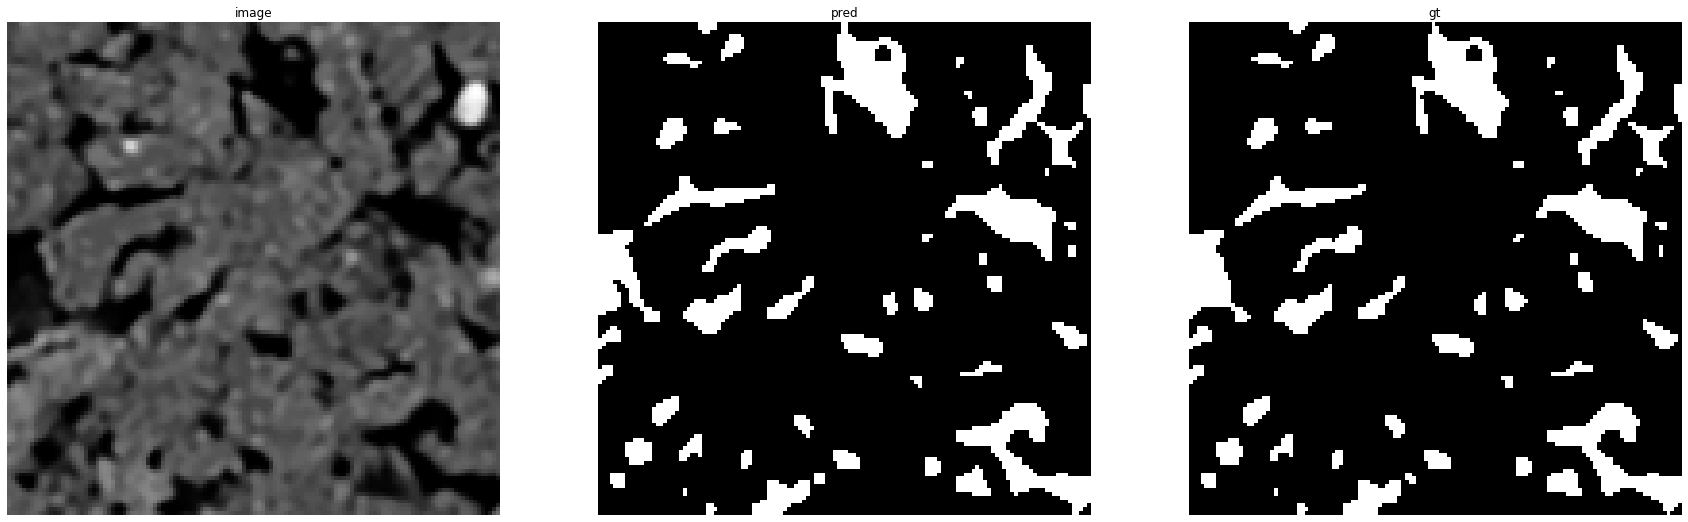

accuracy    : 0.99322509765625
precision   : 0.9770679770679771
recall      : 0.9774682507169193
f1          : 0.9772680729060006
pr_auc      : 0.9984167397815318
iou         : 0.9555466559871846


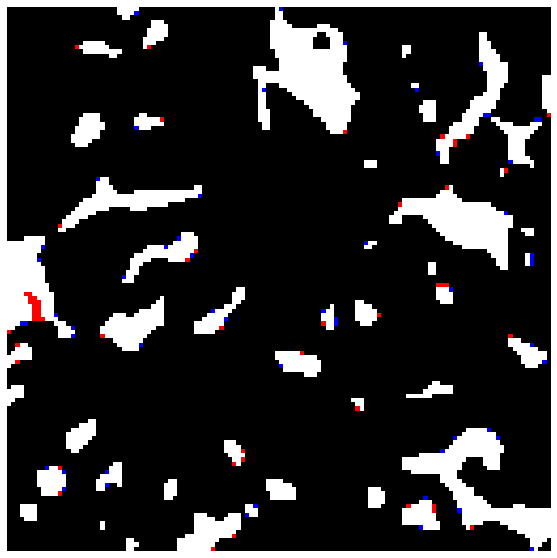

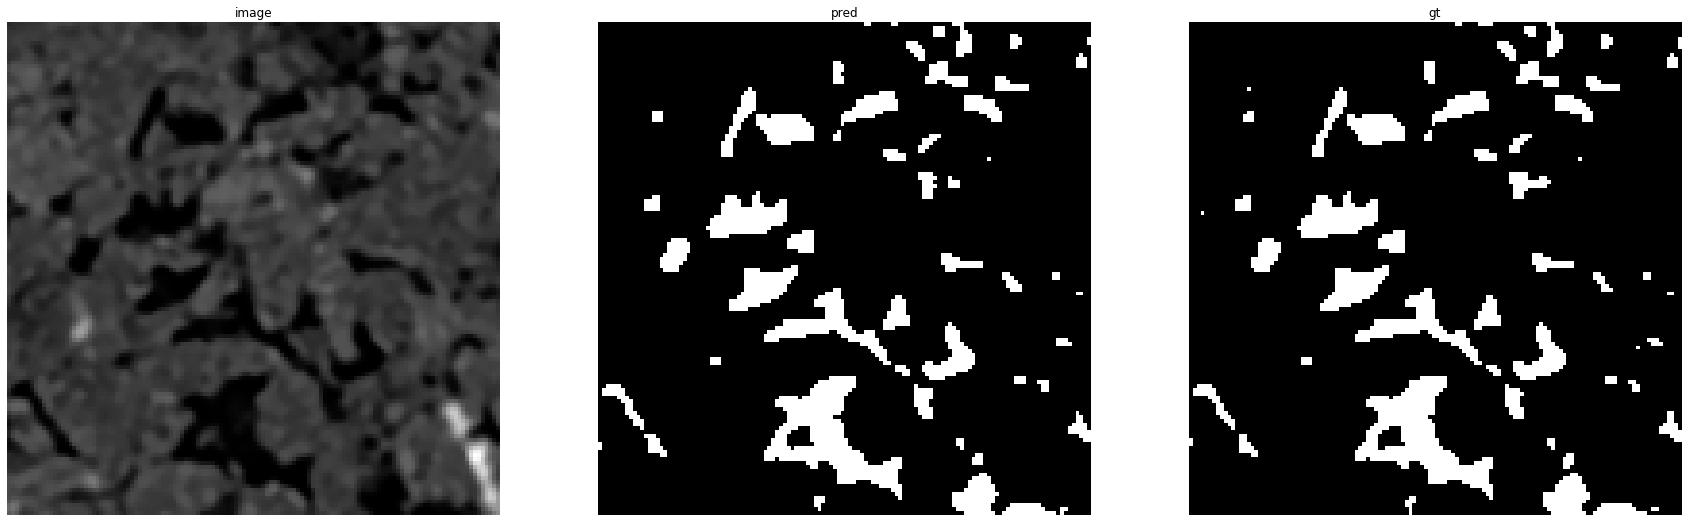

accuracy    : 0.9951171875
precision   : 0.9772612430520465
recall      : 0.9822244794311833
f1          : 0.9797365754812564
pr_auc      : 0.998341216749828
iou         : 0.9602780536246276


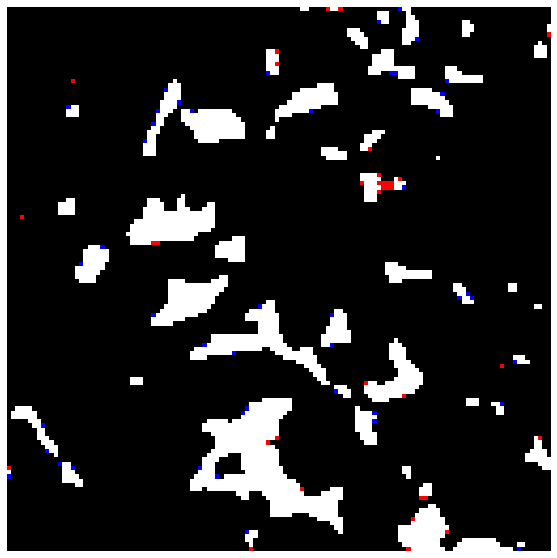

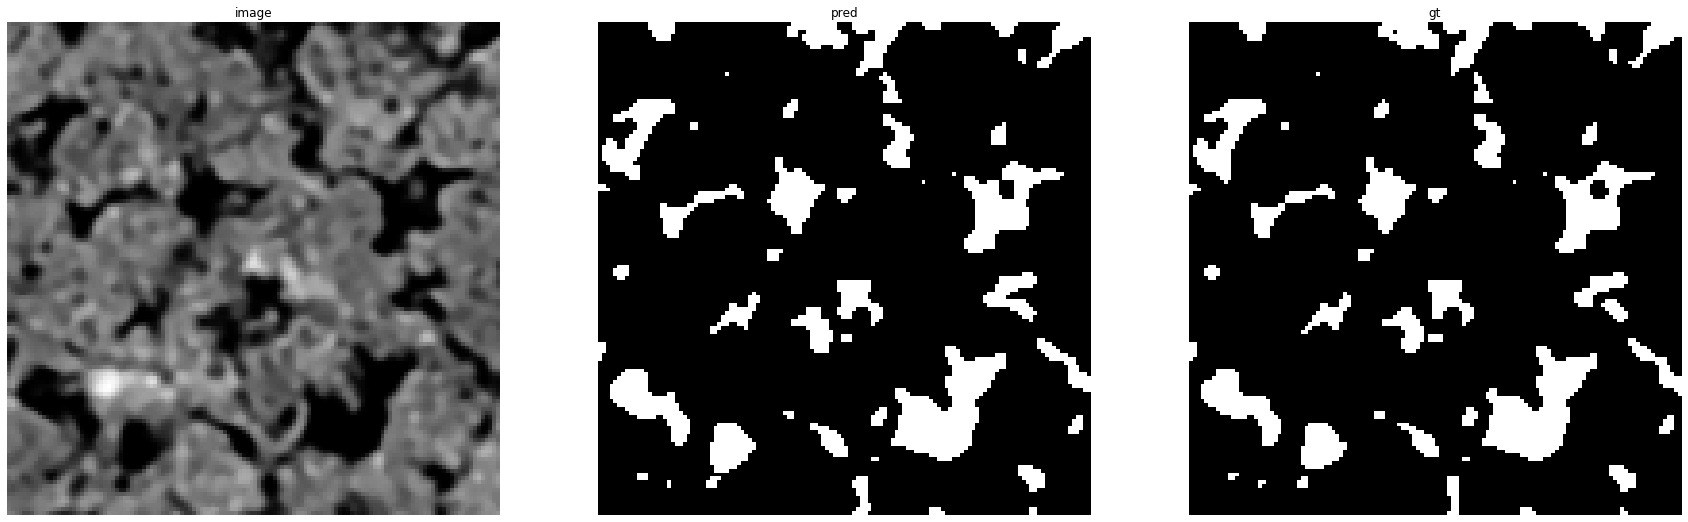

accuracy    : 0.99169921875
precision   : 0.9642416769420469
recall      : 0.9795407098121086
f1          : 0.971830985915493
pr_auc      : 0.9977526909034679
iou         : 0.9452054794520548


Prediction for carb71:


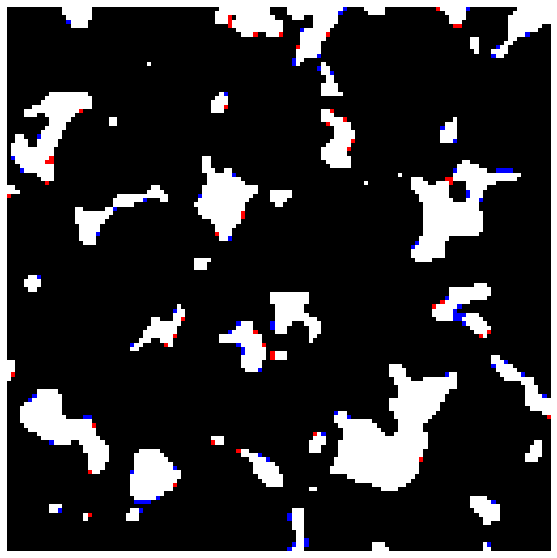

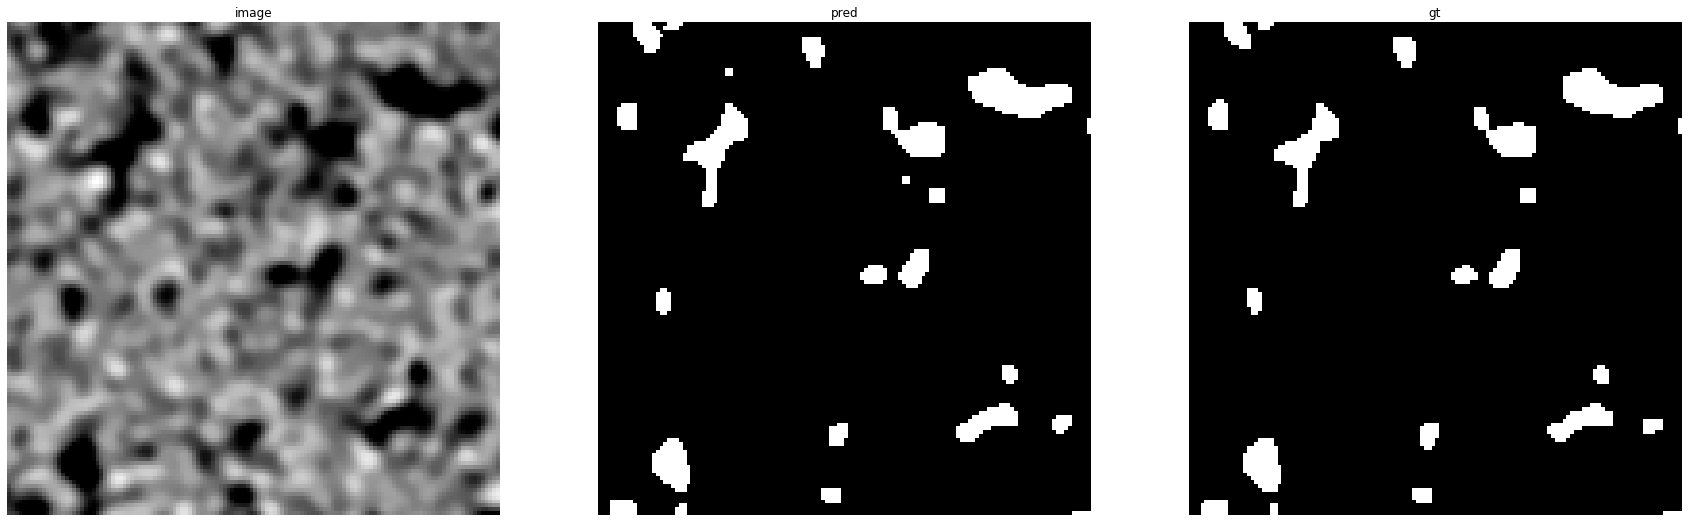

accuracy    : 0.99505615234375
precision   : 0.9519774011299436
recall      : 0.9711815561959655
f1          : 0.9614835948644793
pr_auc      : 0.9955167210867029
iou         : 0.9258241758241759


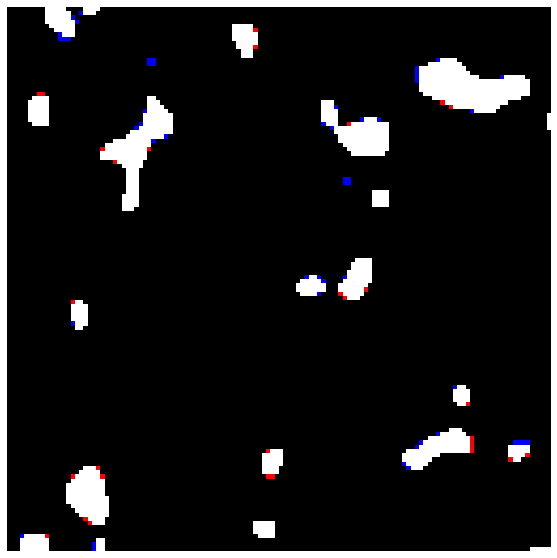

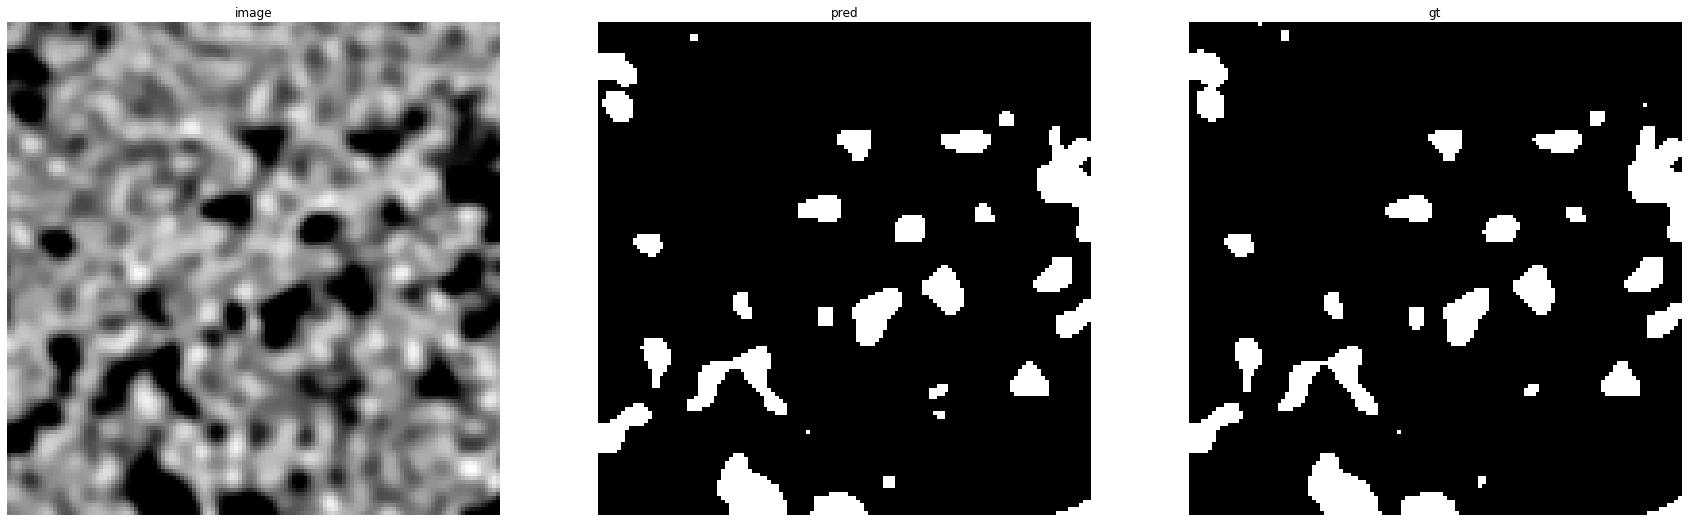

accuracy    : 0.991943359375
precision   : 0.9664009111617312
recall      : 0.9587570621468926
f1          : 0.9625638116846283
pr_auc      : 0.9959005466662707
iou         : 0.9278294149808639


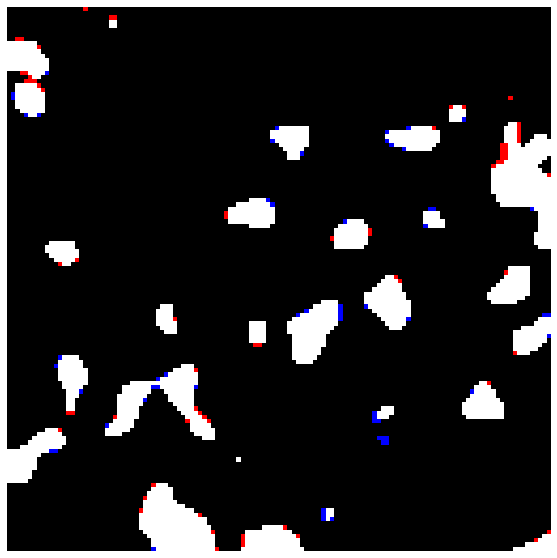

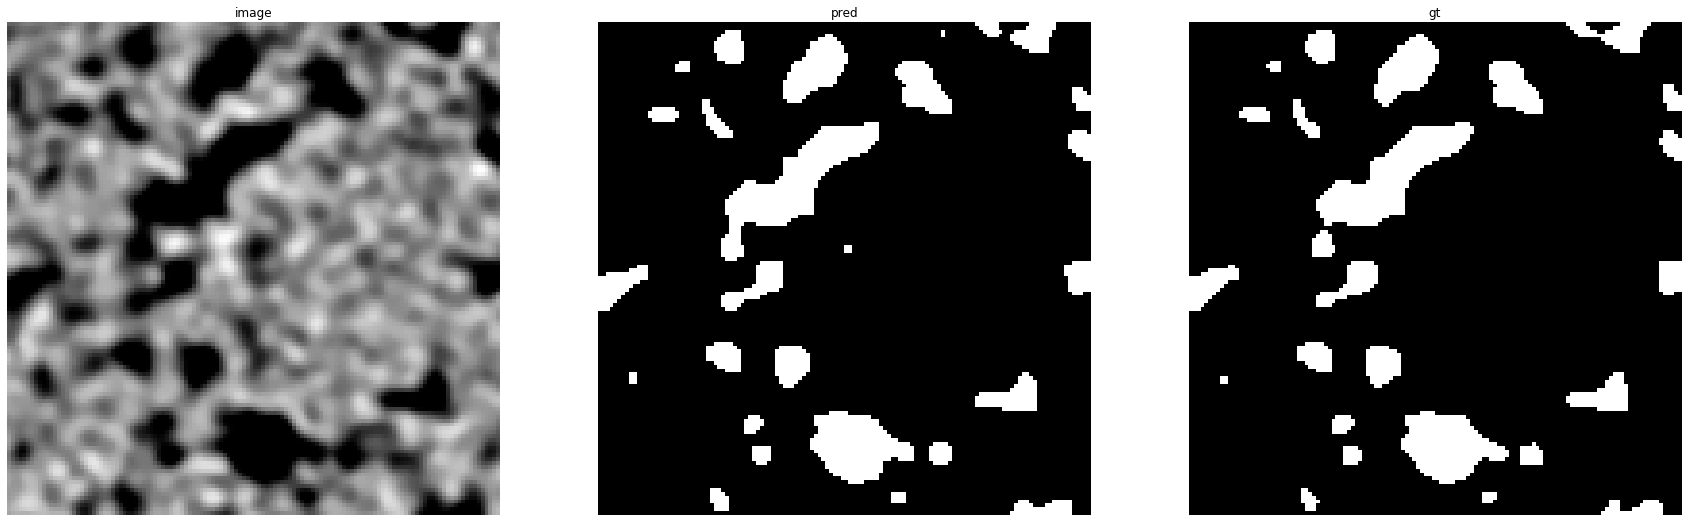

accuracy    : 0.99151611328125
precision   : 0.9615758754863813
recall      : 0.9705449189985272
f1          : 0.9660395797703396
pr_auc      : 0.9965626865995167
iou         : 0.9343100189035917


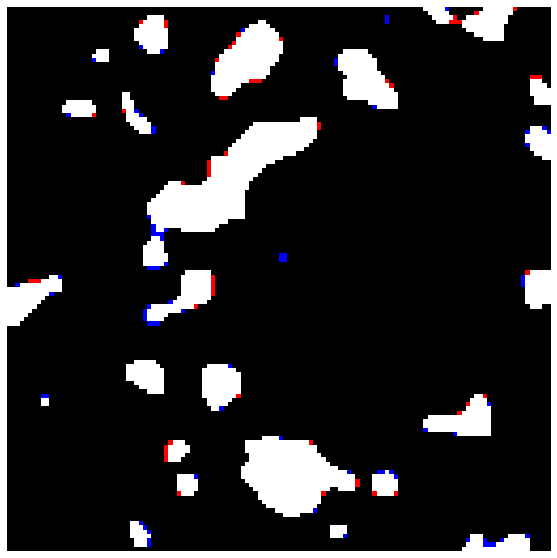

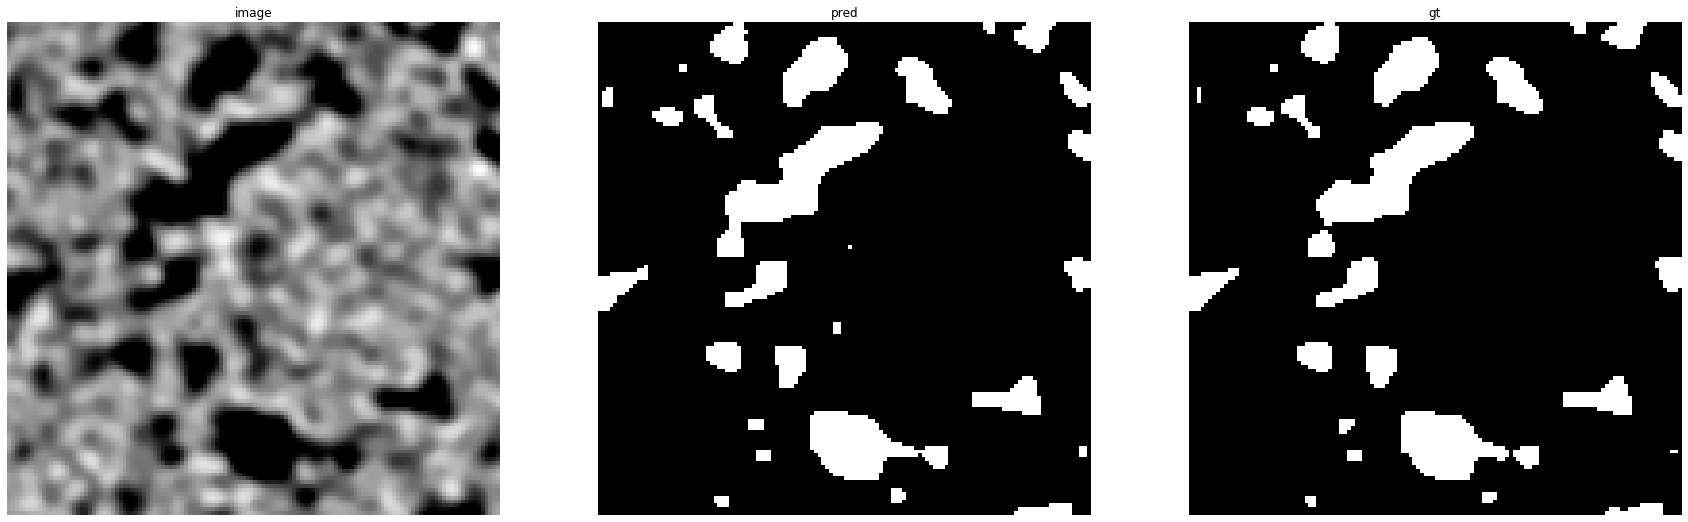

accuracy    : 0.992431640625
precision   : 0.9647342995169083
recall      : 0.97509765625
f1          : 0.9698882952889752
pr_auc      : 0.9971173200809131
iou         : 0.9415370108439416


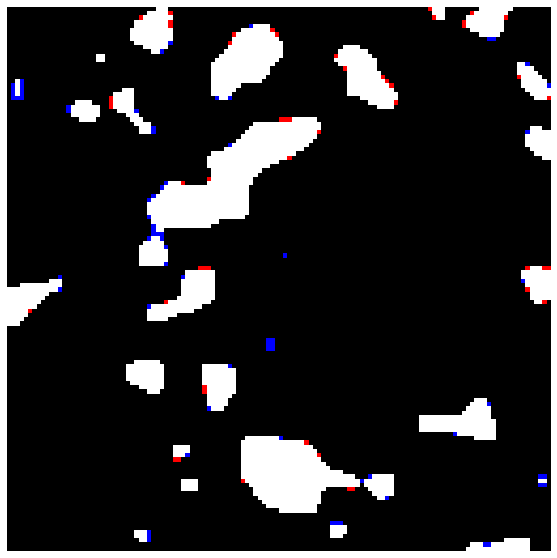

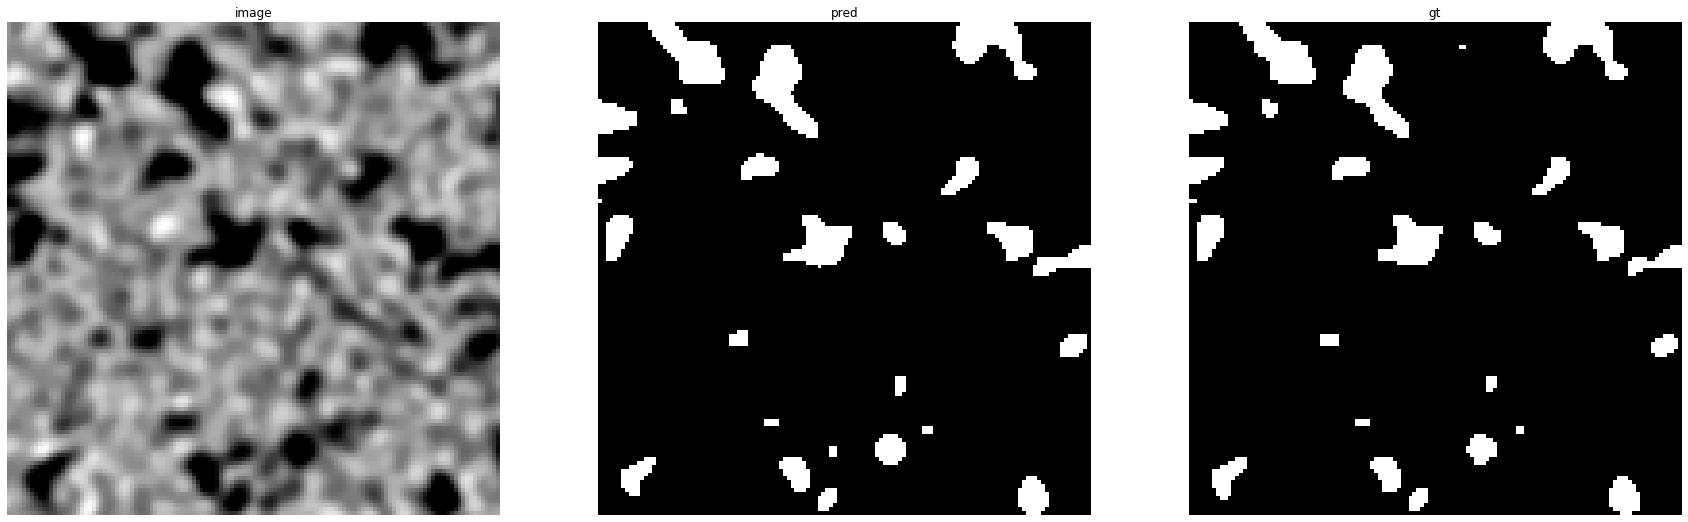

accuracy    : 0.99420166015625
precision   : 0.9576328177538669
recall      : 0.978021978021978
f1          : 0.9677200135915732
pr_auc      : 0.996867710456589
iou         : 0.9374588545095458


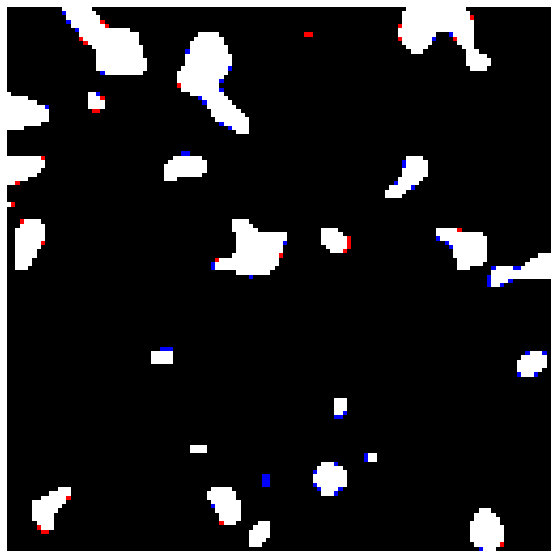

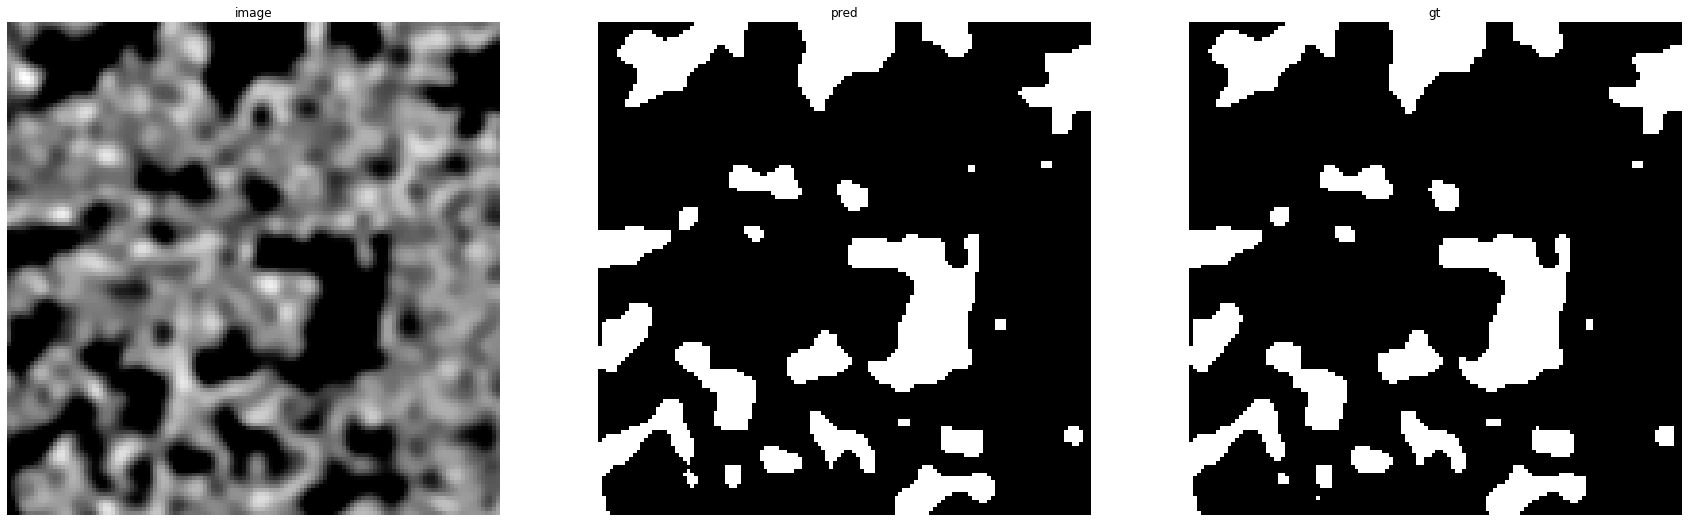

accuracy    : 0.9925537109375
precision   : 0.9812393405343945
recall      : 0.984036488027366
f1          : 0.9826359237119271
pr_auc      : 0.9990768099741643
iou         : 0.965864577504197


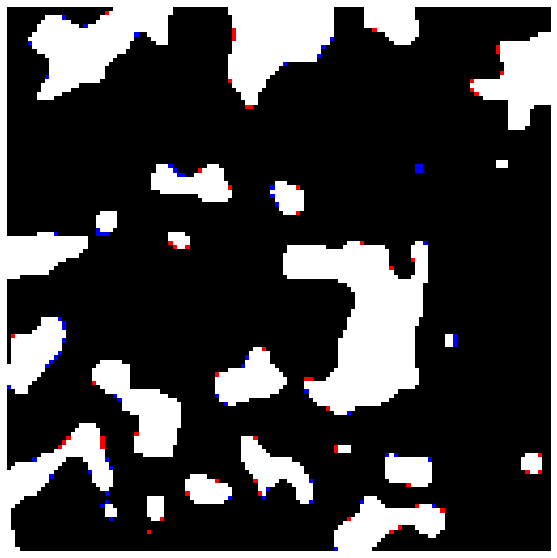

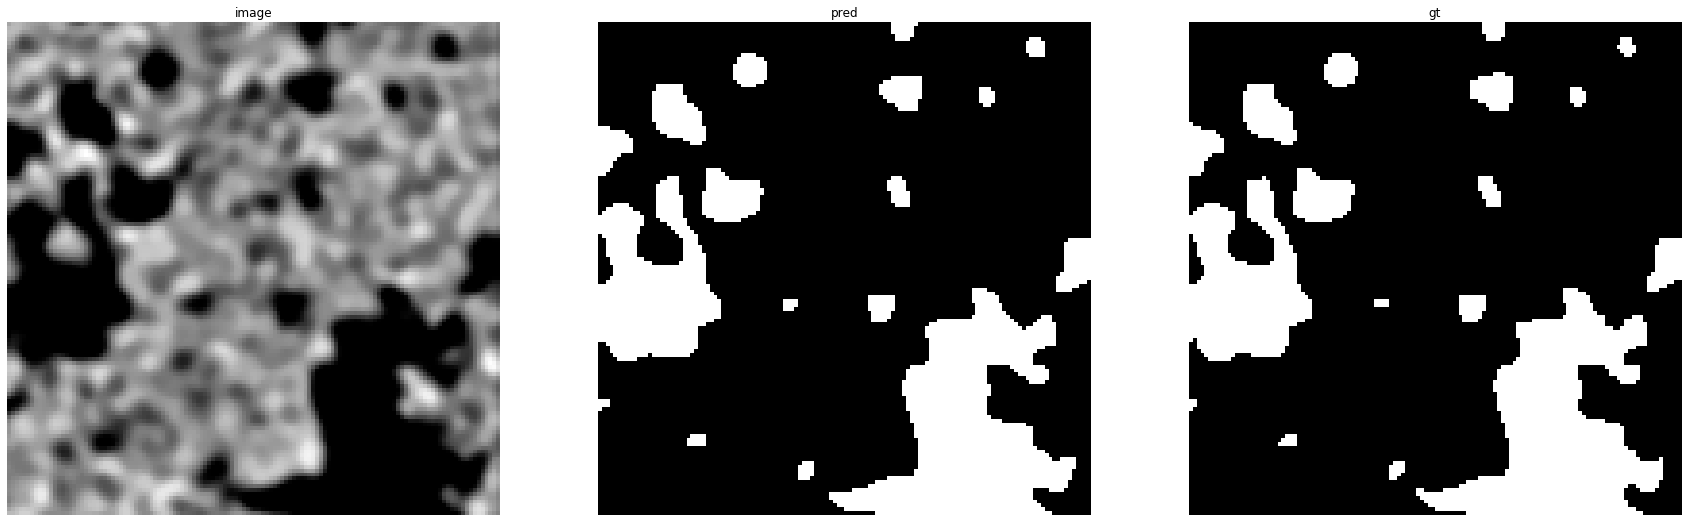

accuracy    : 0.994384765625
precision   : 0.9864788732394366
recall      : 0.9875916525662719
f1          : 0.9870349492671928
pr_auc      : 0.9994807303792125
iou         : 0.9744017807456873


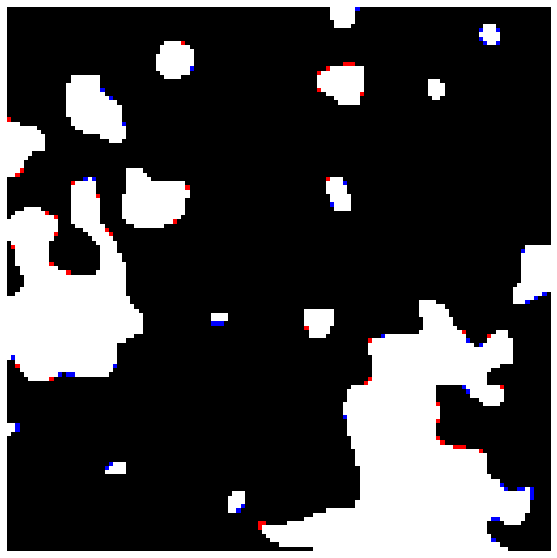

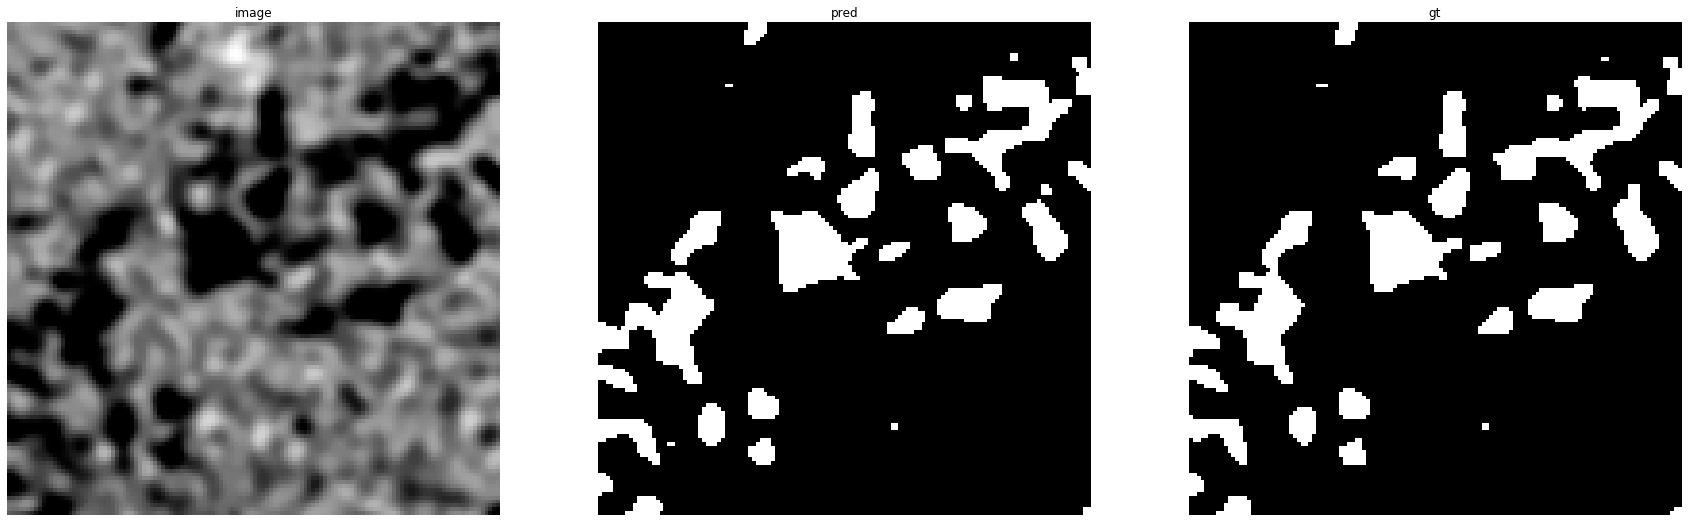

accuracy    : 0.98931884765625
precision   : 0.965101249461439
recall      : 0.9597257926306769
f1          : 0.9624060150375938
pr_auc      : 0.9961299096495937
iou         : 0.927536231884058


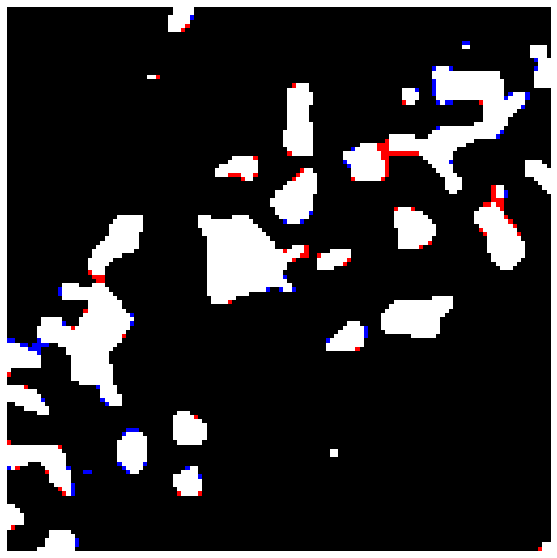

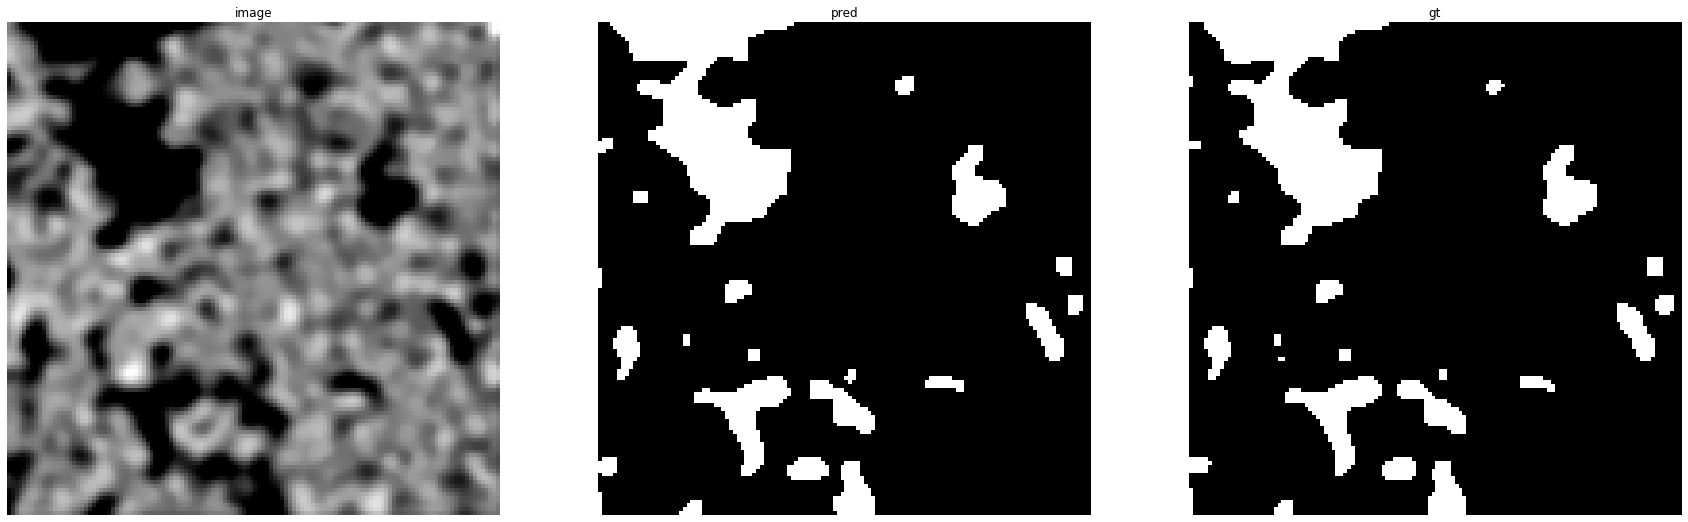

accuracy    : 0.99261474609375
precision   : 0.972465034965035
recall      : 0.9745948313622427
f1          : 0.9735287683220302
pr_auc      : 0.9976088974873311
iou         : 0.9484228473998295


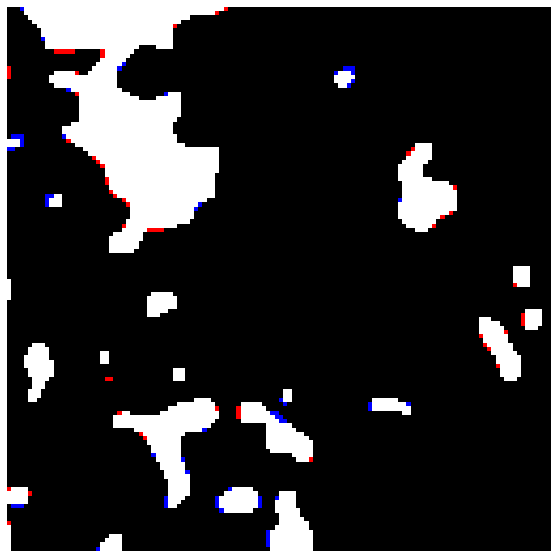

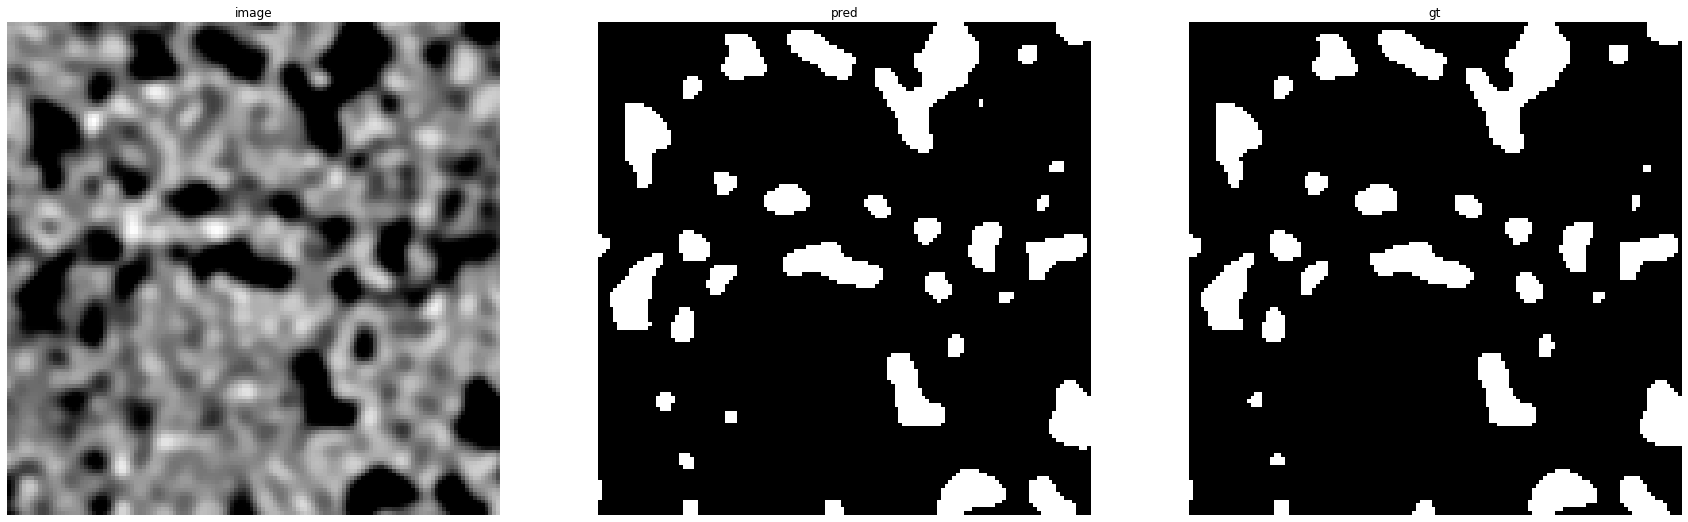

accuracy    : 0.991455078125
precision   : 0.9644284572342127
recall      : 0.979301948051948
f1          : 0.9718082964156263
pr_auc      : 0.9976179318515656
iou         : 0.945162553858206


Prediction for carbRNF:


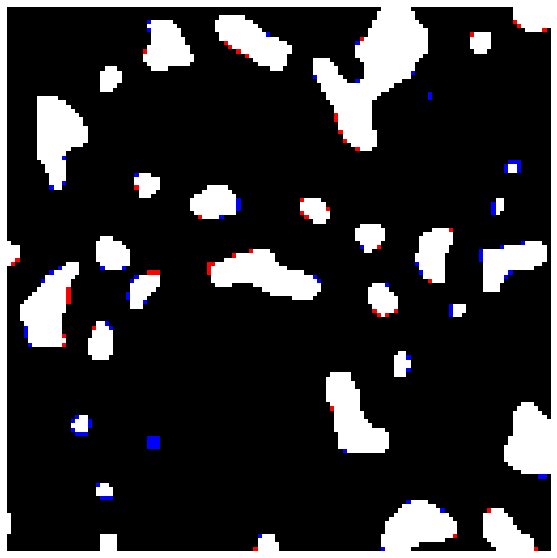

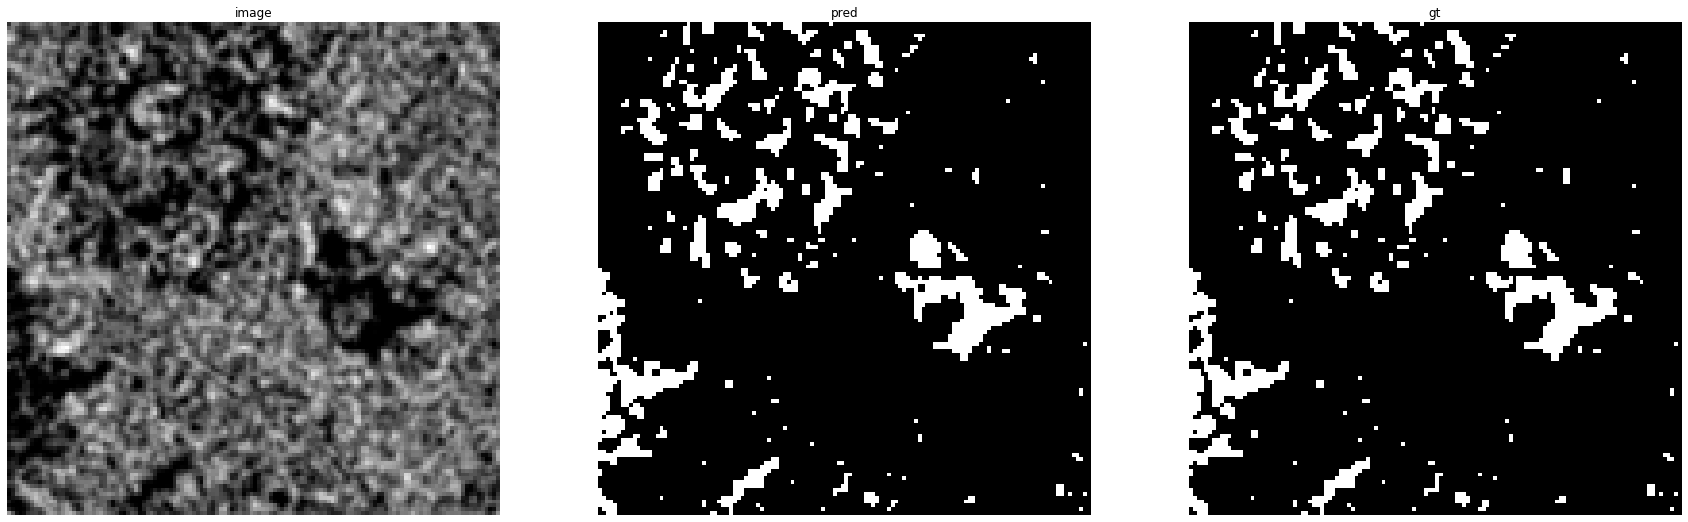

accuracy    : 0.99273681640625
precision   : 0.9616204690831557
recall      : 0.9746083198271205
f1          : 0.9680708344513014
pr_auc      : 0.9973596372783846
iou         : 0.9381175247009881


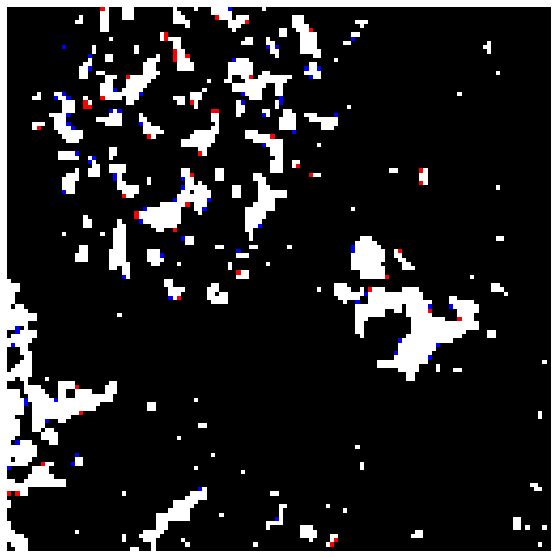

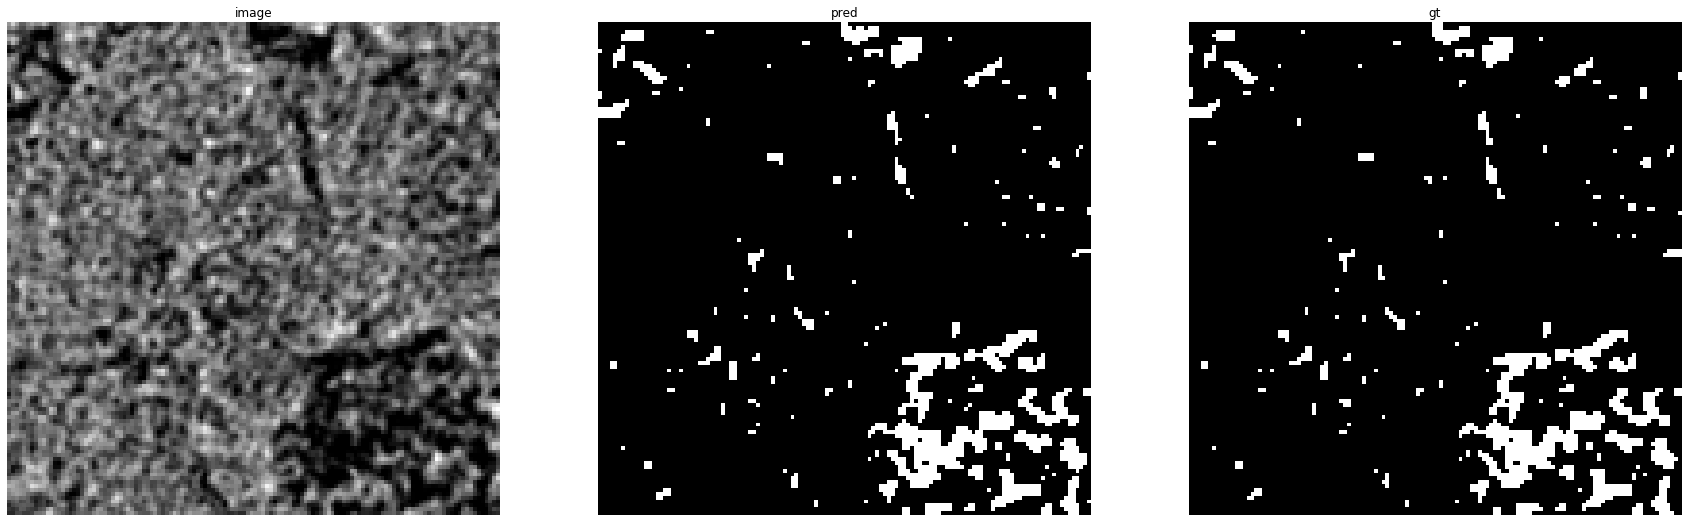

accuracy    : 0.99517822265625
precision   : 0.964573268921095
recall      : 0.9716139497161395
f1          : 0.9680808080808081
pr_auc      : 0.9969591495596425
iou         : 0.9381362568519969


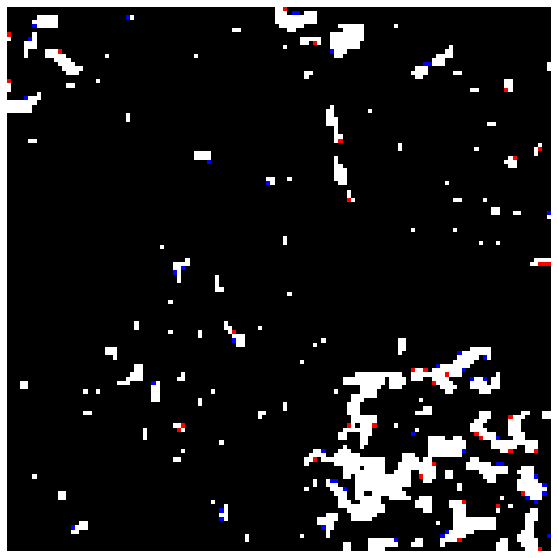

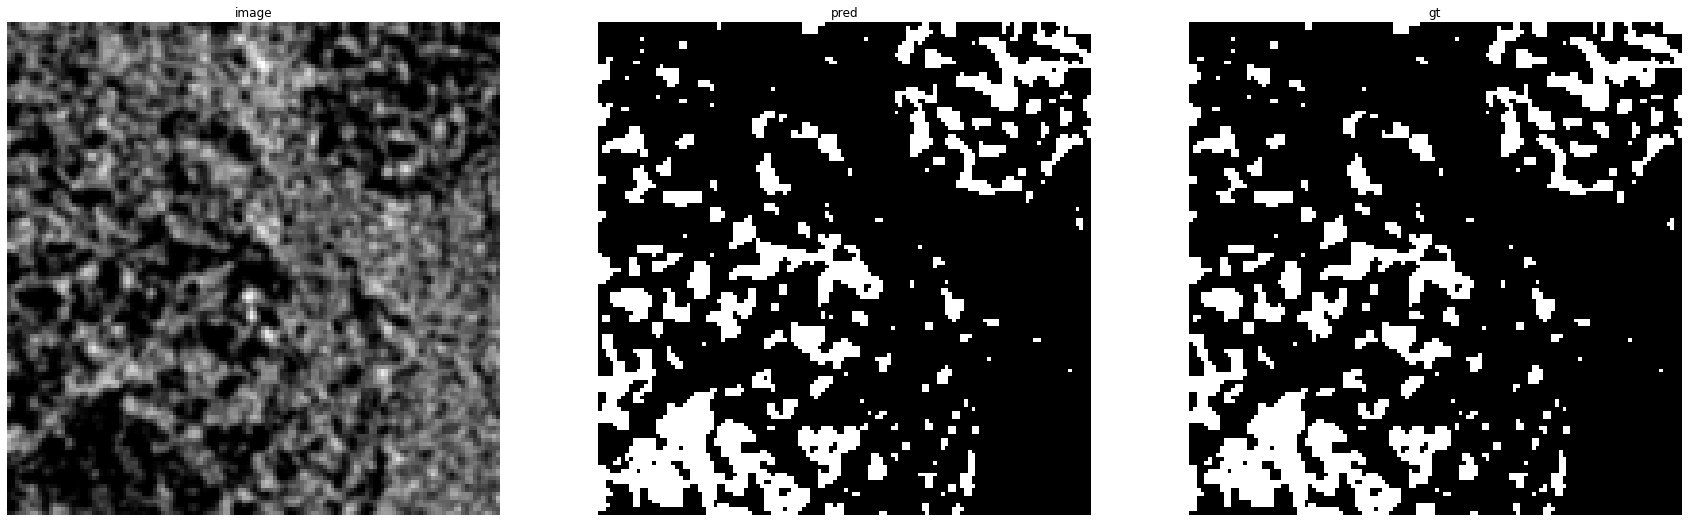

accuracy    : 0.98919677734375
precision   : 0.965047393364929
recall      : 0.9822128429303587
f1          : 0.9735544598834603
pr_auc      : 0.9978420005096293
iou         : 0.948471615720524


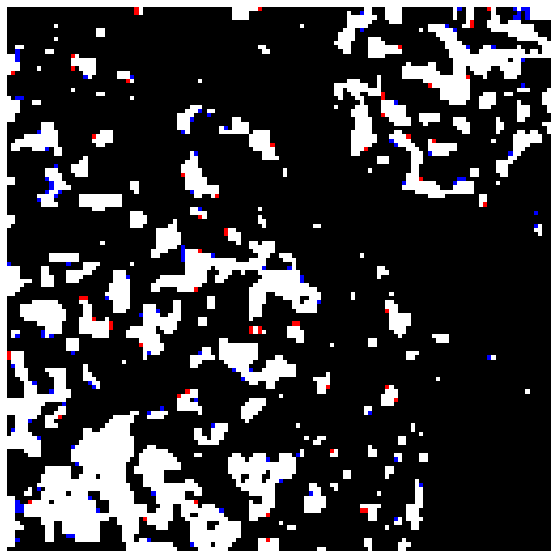

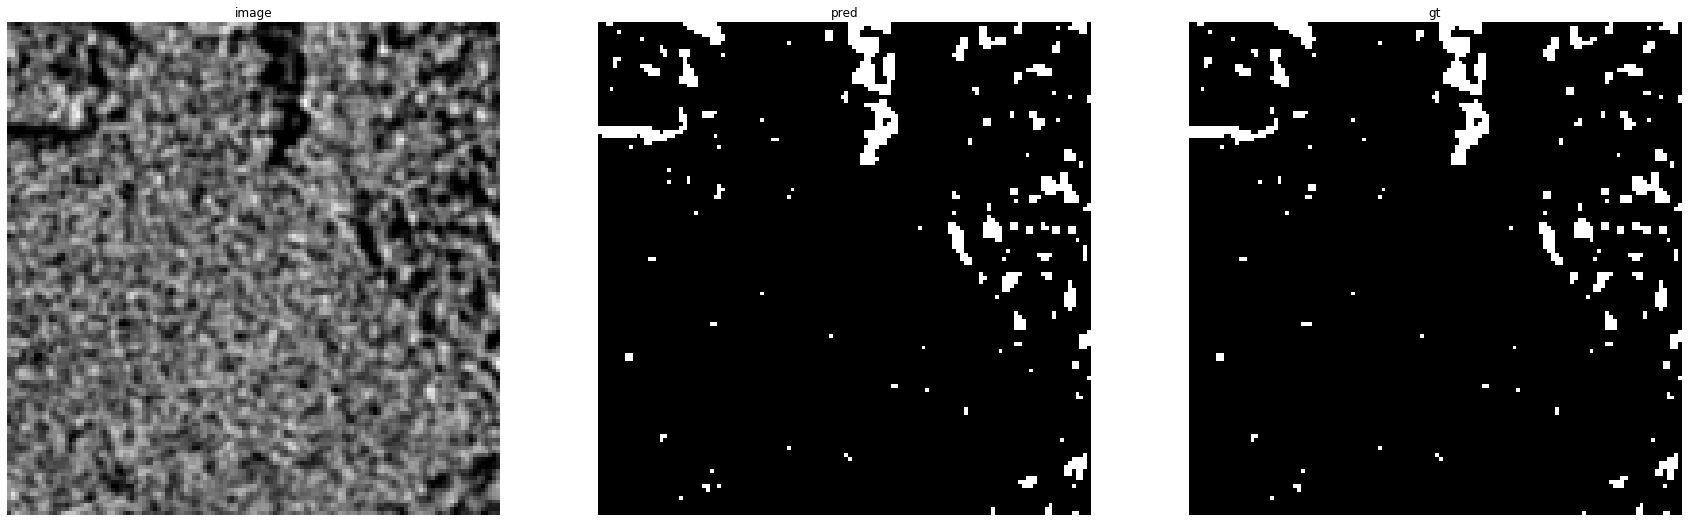

accuracy    : 0.99578857421875
precision   : 0.9447779111644657
recall      : 0.971604938271605
f1          : 0.9580036518563603
pr_auc      : 0.9951879550324421
iou         : 0.919392523364486


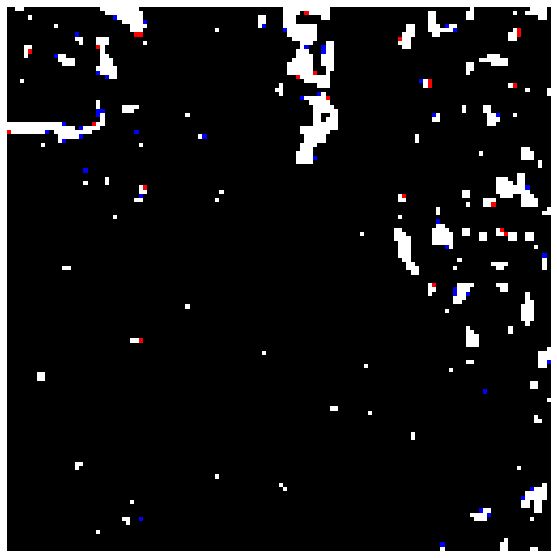

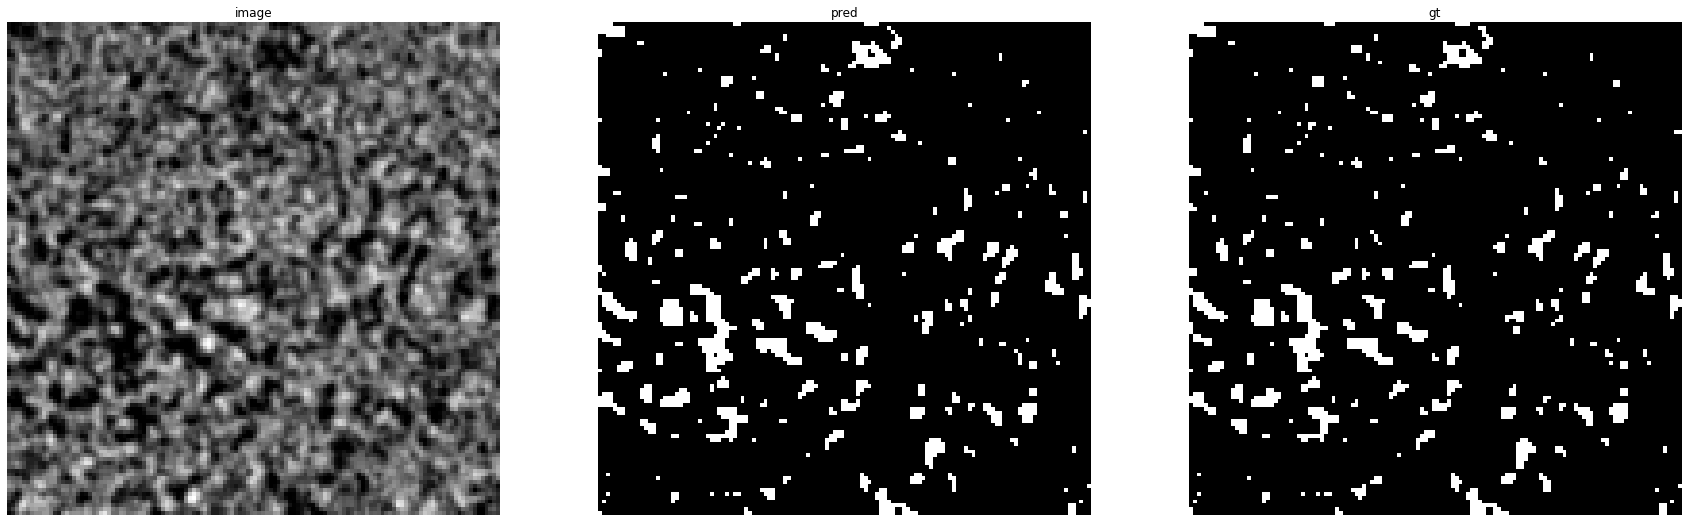

accuracy    : 0.99261474609375
precision   : 0.9409937888198758
recall      : 0.964200477326969
f1          : 0.9524557956777997
pr_auc      : 0.9942476255581026
iou         : 0.9092273068267067


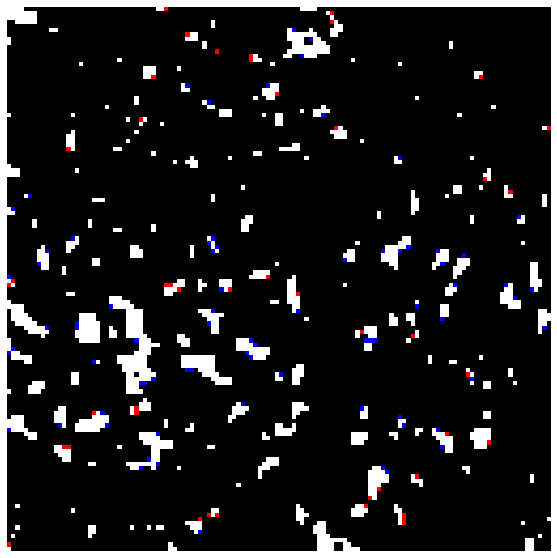

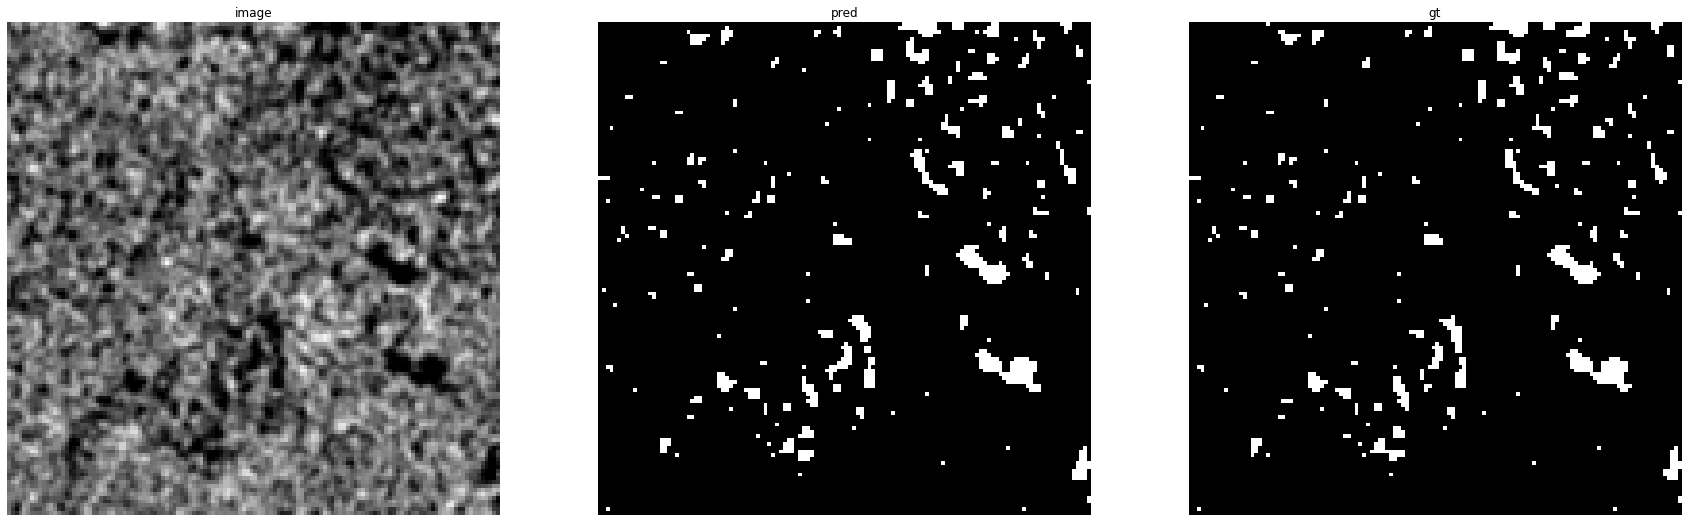

accuracy    : 0.9947509765625
precision   : 0.9389221556886228
recall      : 0.9572649572649573
f1          : 0.9480048367593712
pr_auc      : 0.9925505795911138
iou         : 0.9011494252873563


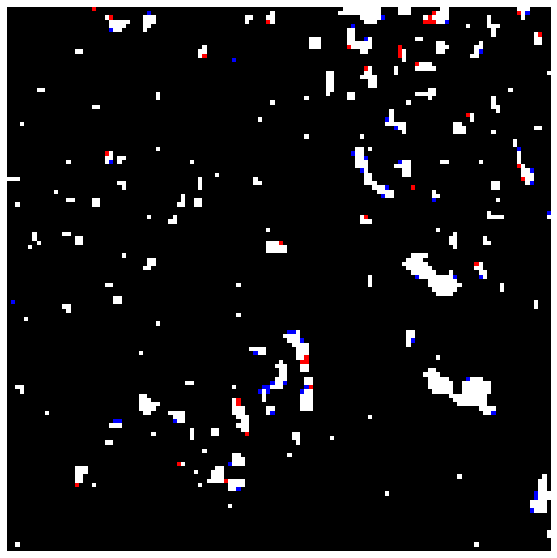

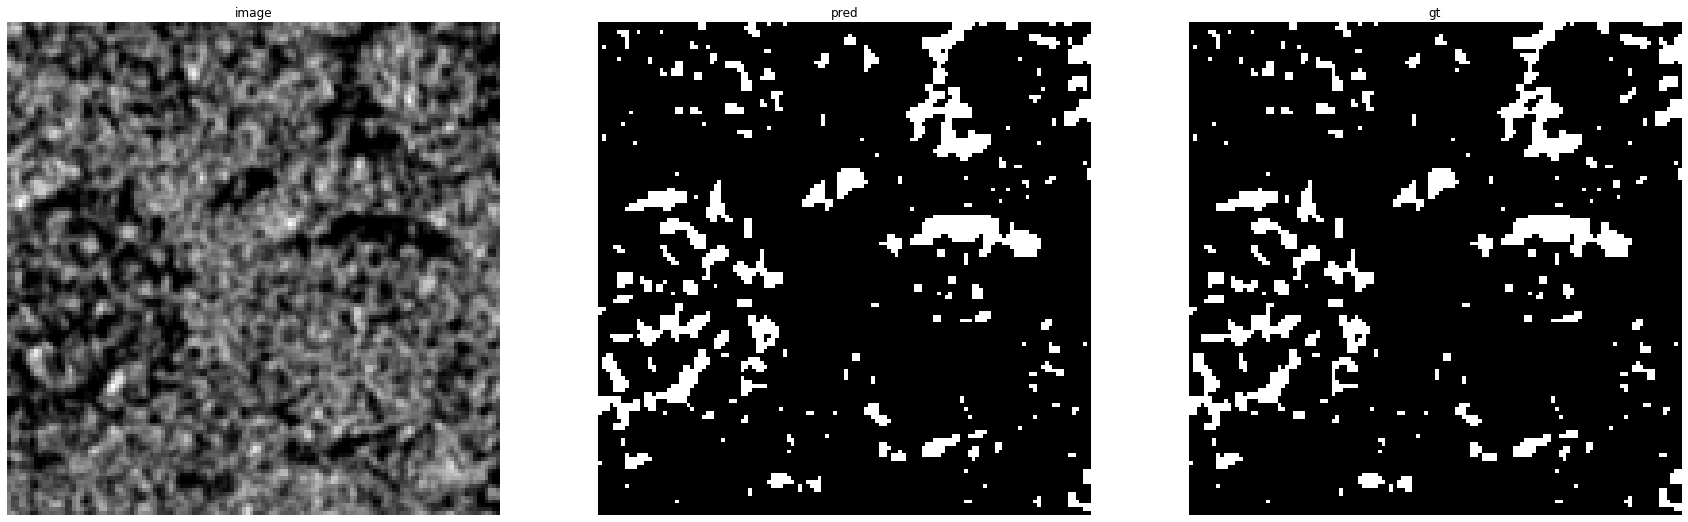

accuracy    : 0.99053955078125
precision   : 0.9549114331723028
recall      : 0.9616216216216216
f1          : 0.9582547805009426
pr_auc      : 0.9946752217348104
iou         : 0.9198552223371251


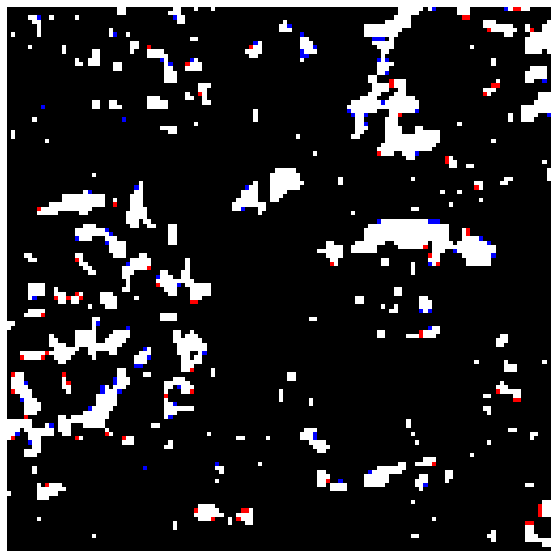

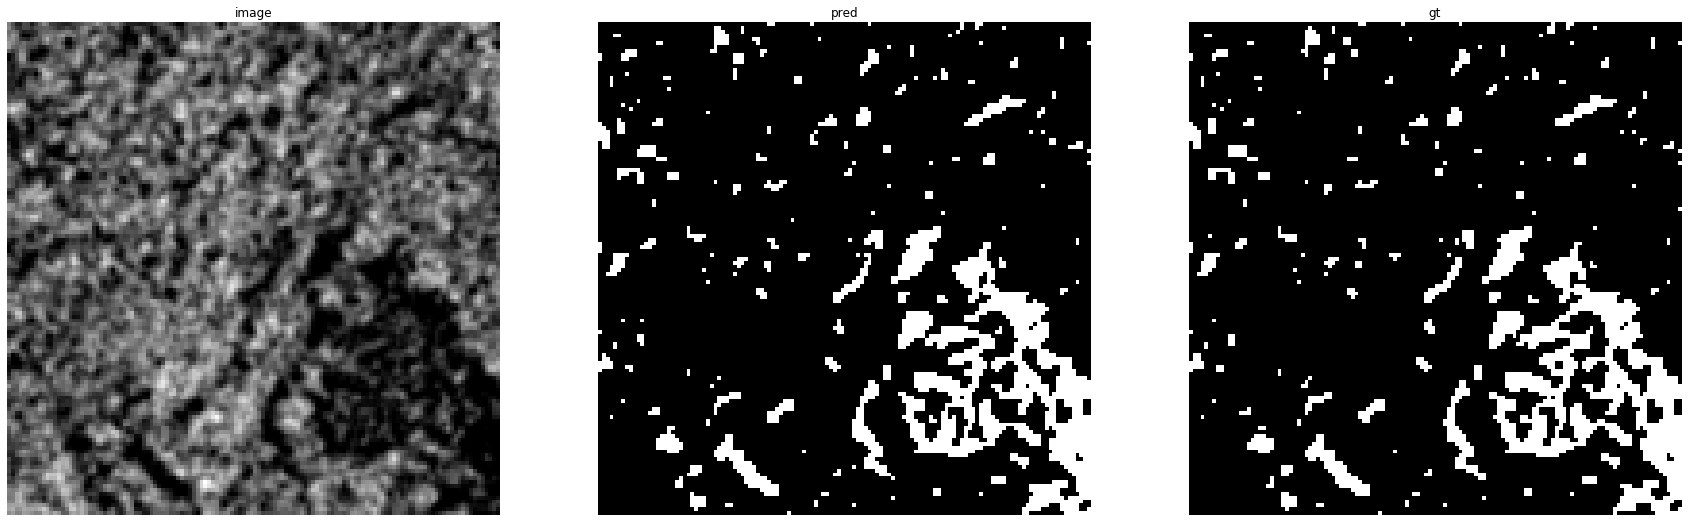

accuracy    : 0.99151611328125
precision   : 0.9629458082445577
recall      : 0.9724041159962582
f1          : 0.9676518501279963
pr_auc      : 0.9969563444733608
iou         : 0.9373309287646528


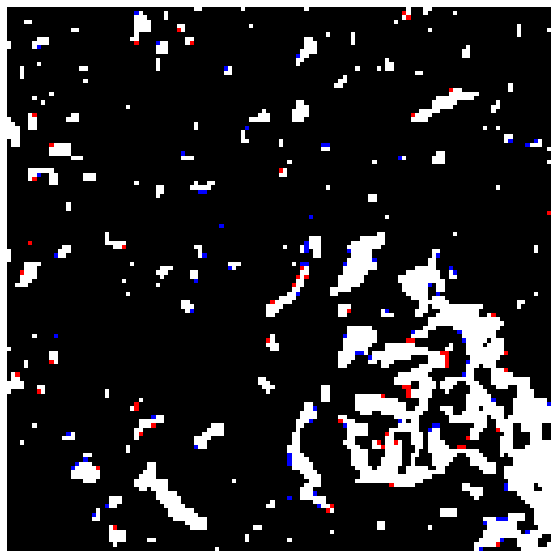

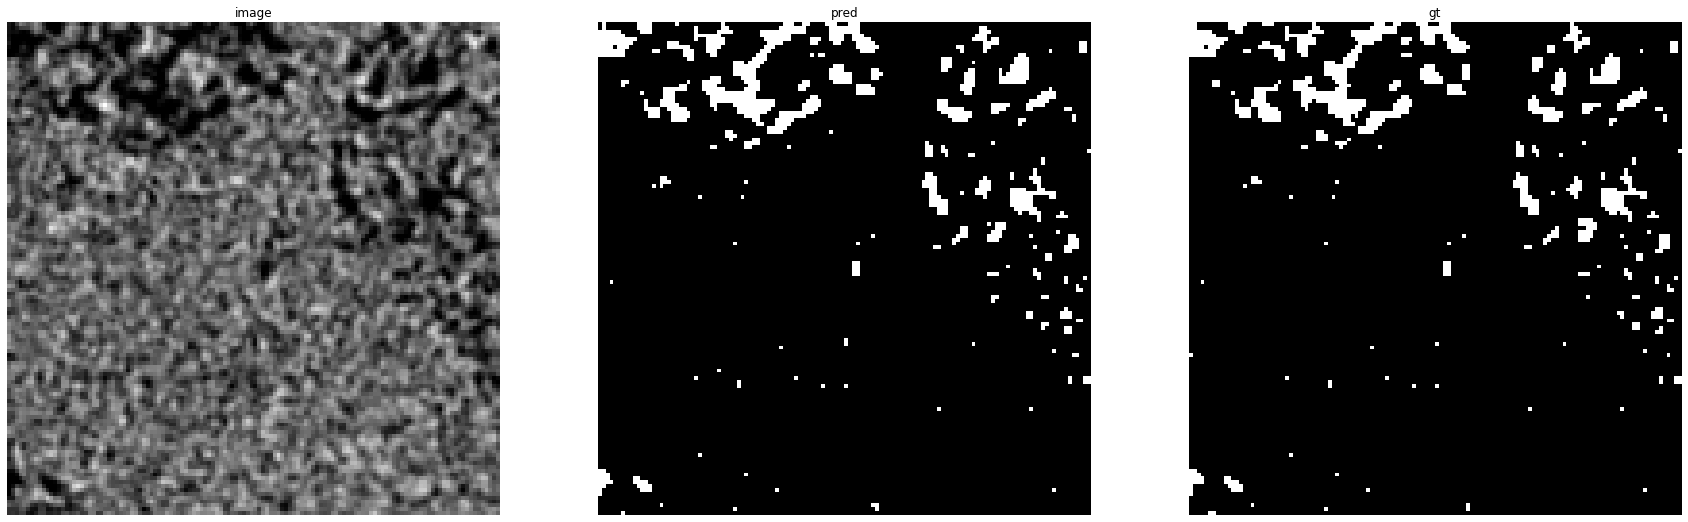

accuracy    : 0.9951171875
precision   : 0.9586935638808838
recall      : 0.9642512077294686
f1          : 0.9614643545279383
pr_auc      : 0.9950353582743797
iou         : 0.9257884972170687


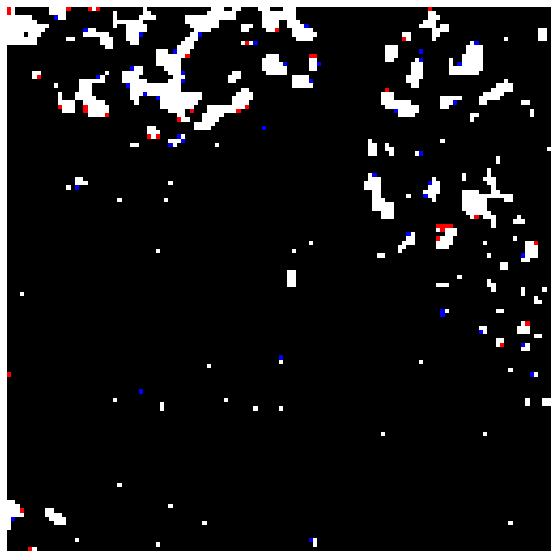

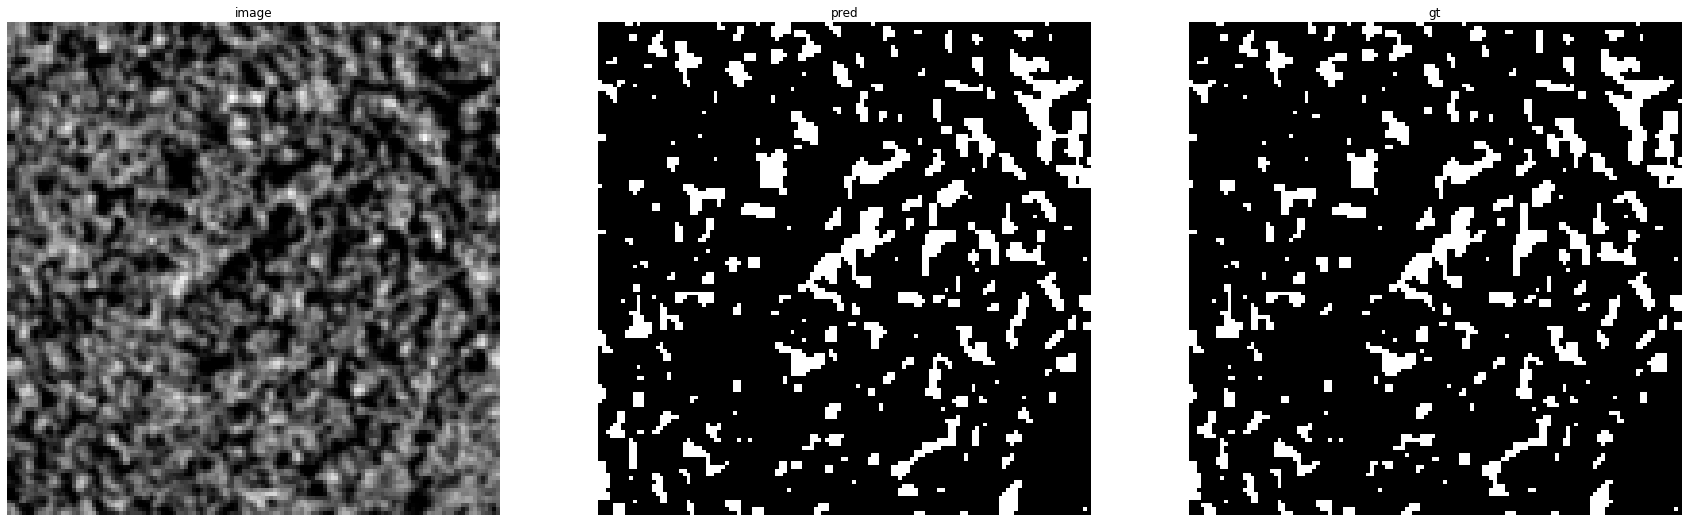

accuracy    : 0.9879150390625
precision   : 0.9510075069142632
recall      : 0.9701733172108021
f1          : 0.9604948124501198
pr_auc      : 0.9949242521215532
iou         : 0.9239923224568138


Prediction for SPE_carb10_58_box3:


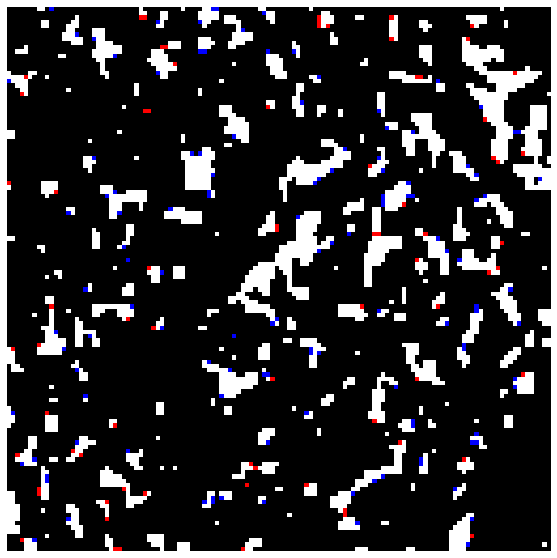

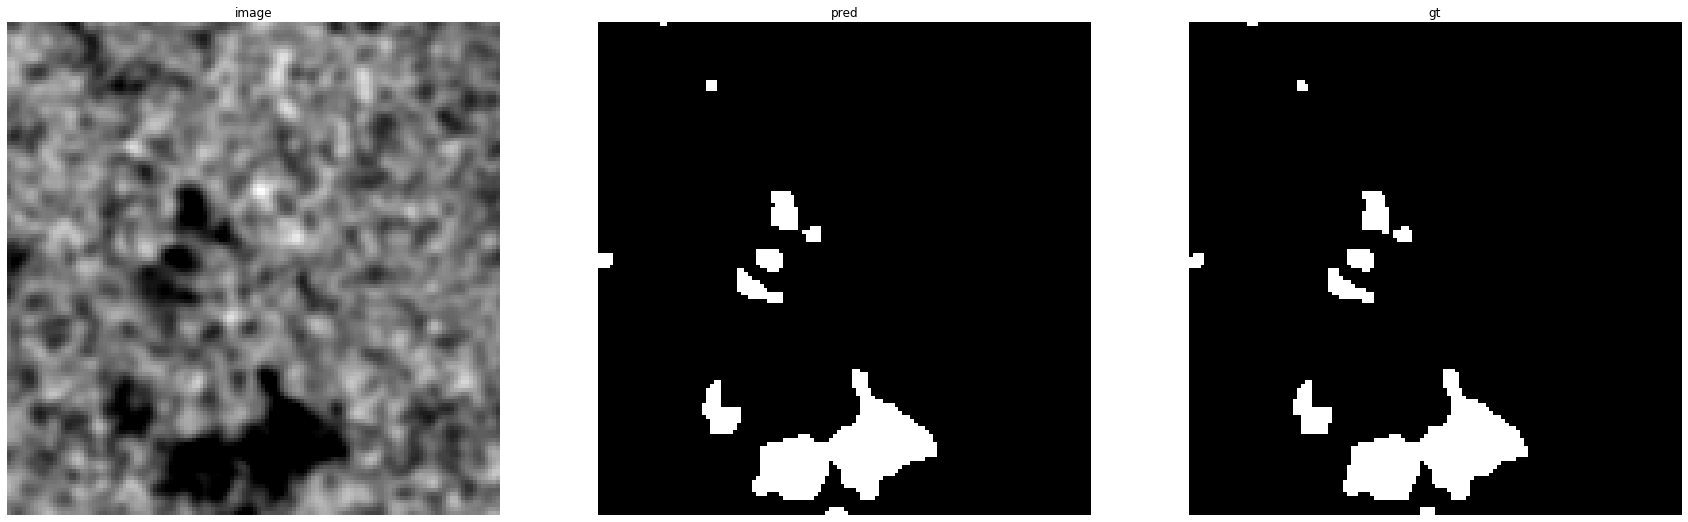

accuracy    : 0.99798583984375
precision   : 0.9881305637982196
recall      : 0.9794117647058823
f1          : 0.983751846381093
pr_auc      : 0.9992847708507313
iou         : 0.9680232558139535


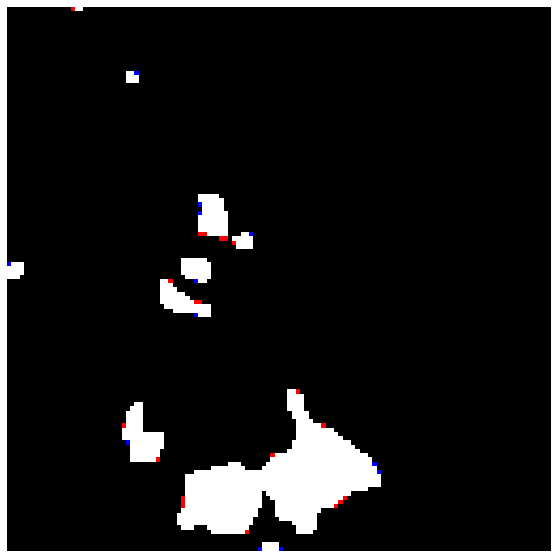

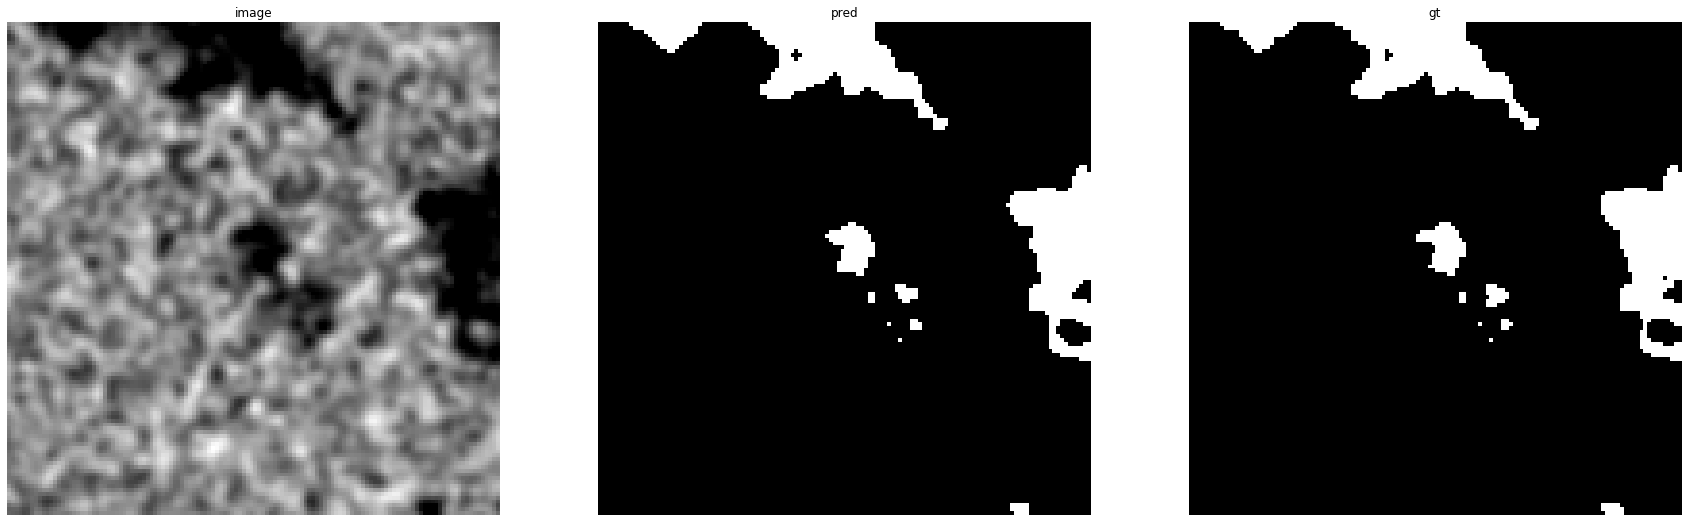

accuracy    : 0.99639892578125
precision   : 0.9811827956989247
recall      : 0.9792085848423877
f1          : 0.9801946962067808
pr_auc      : 0.9987742241282781
iou         : 0.9611586570111915


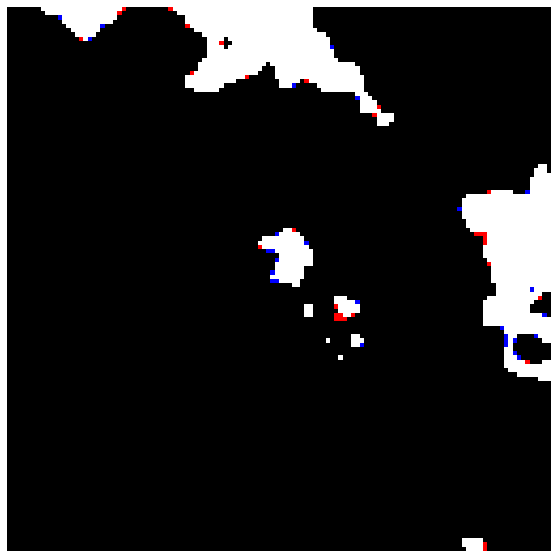

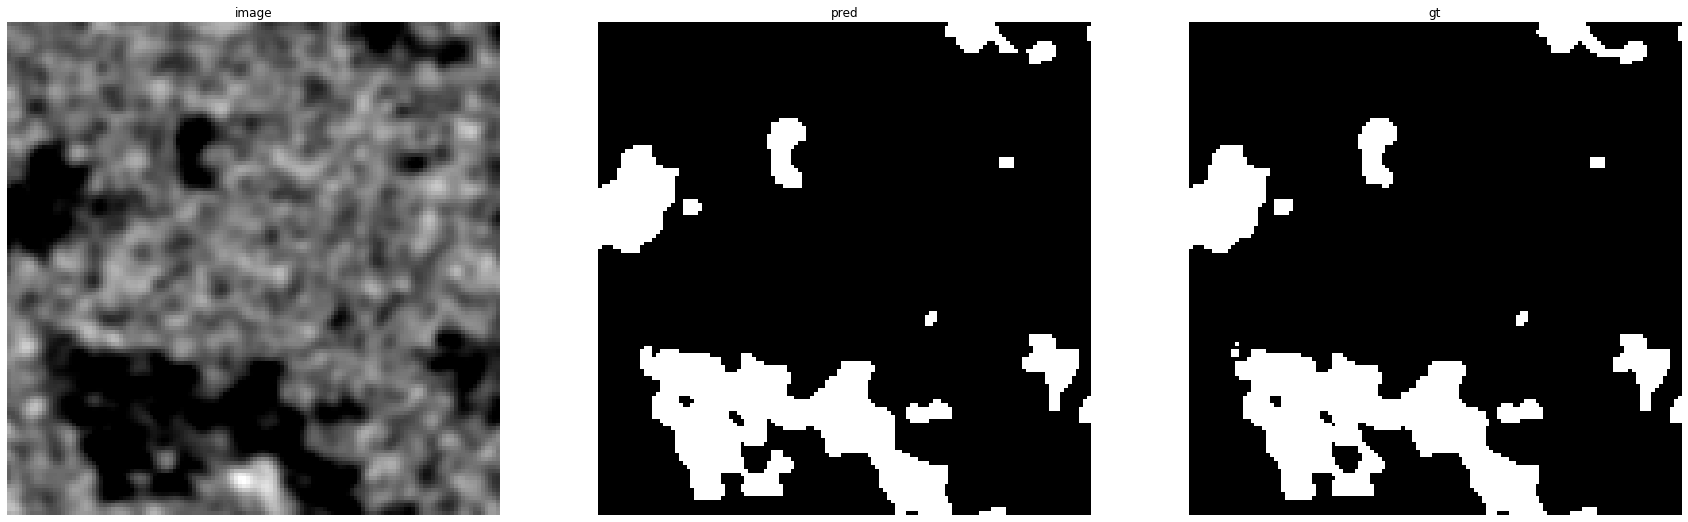

accuracy    : 0.99468994140625
precision   : 0.9893048128342246
recall      : 0.9777274443186108
f1          : 0.9834820580975887
pr_auc      : 0.9991264182473276
iou         : 0.9675009338812103


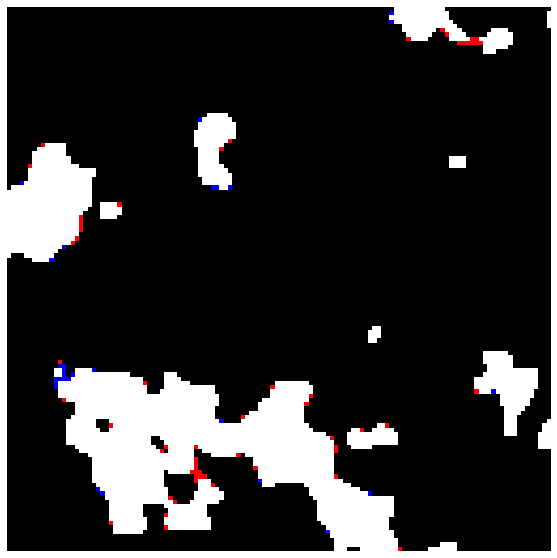

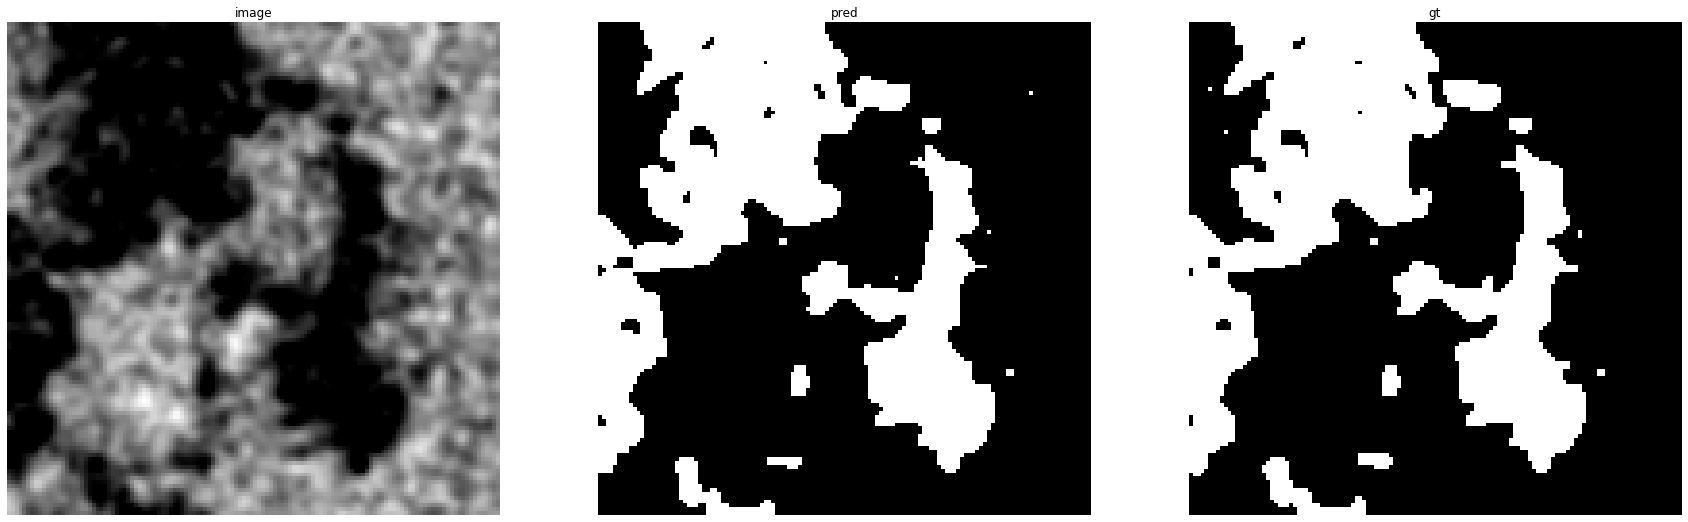

accuracy    : 0.98968505859375
precision   : 0.9897306723503198
recall      : 0.9777947932618682
f1          : 0.9837265286470871
pr_auc      : 0.9991183942617389
iou         : 0.9679742277809361


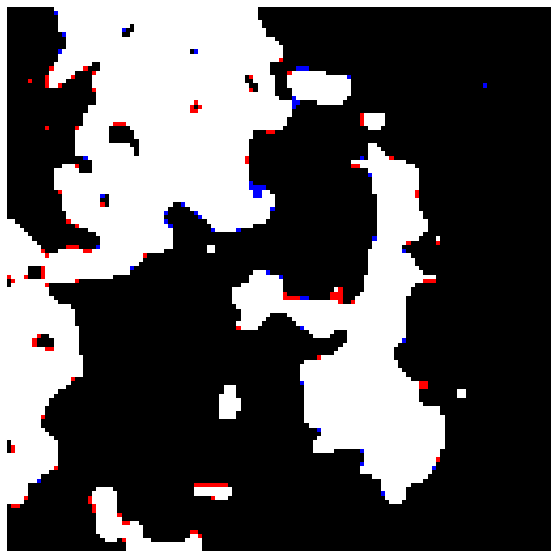

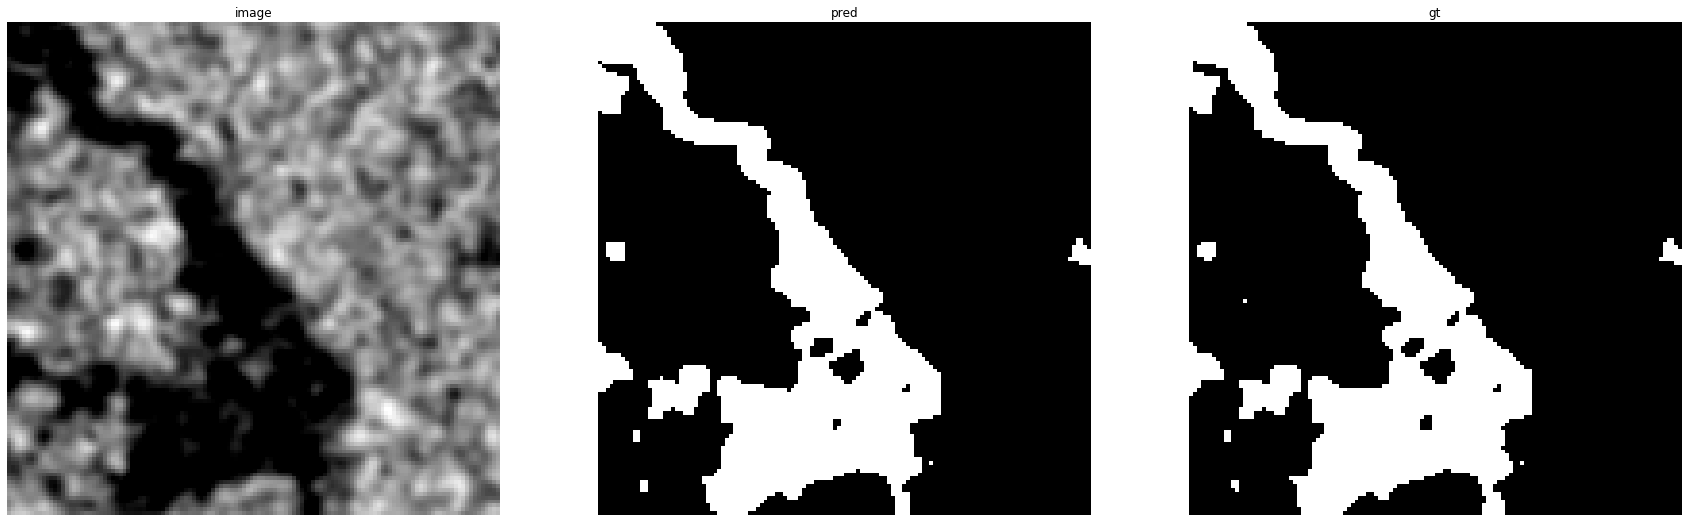

accuracy    : 0.99462890625
precision   : 0.9865637507146942
recall      : 0.9882588774341352
f1          : 0.9874105865522175
pr_auc      : 0.9994934022049287
iou         : 0.9751342187058492


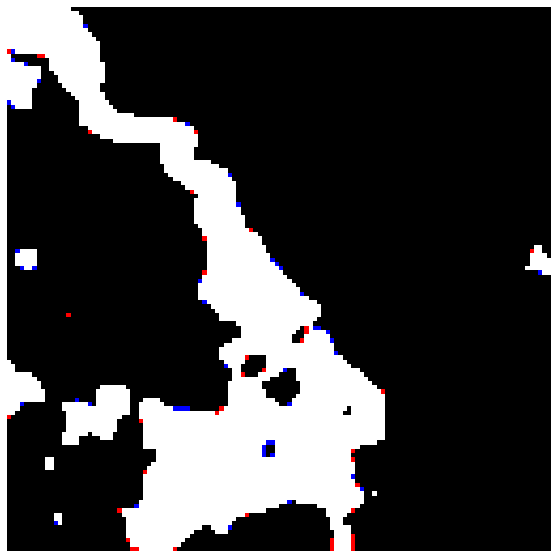

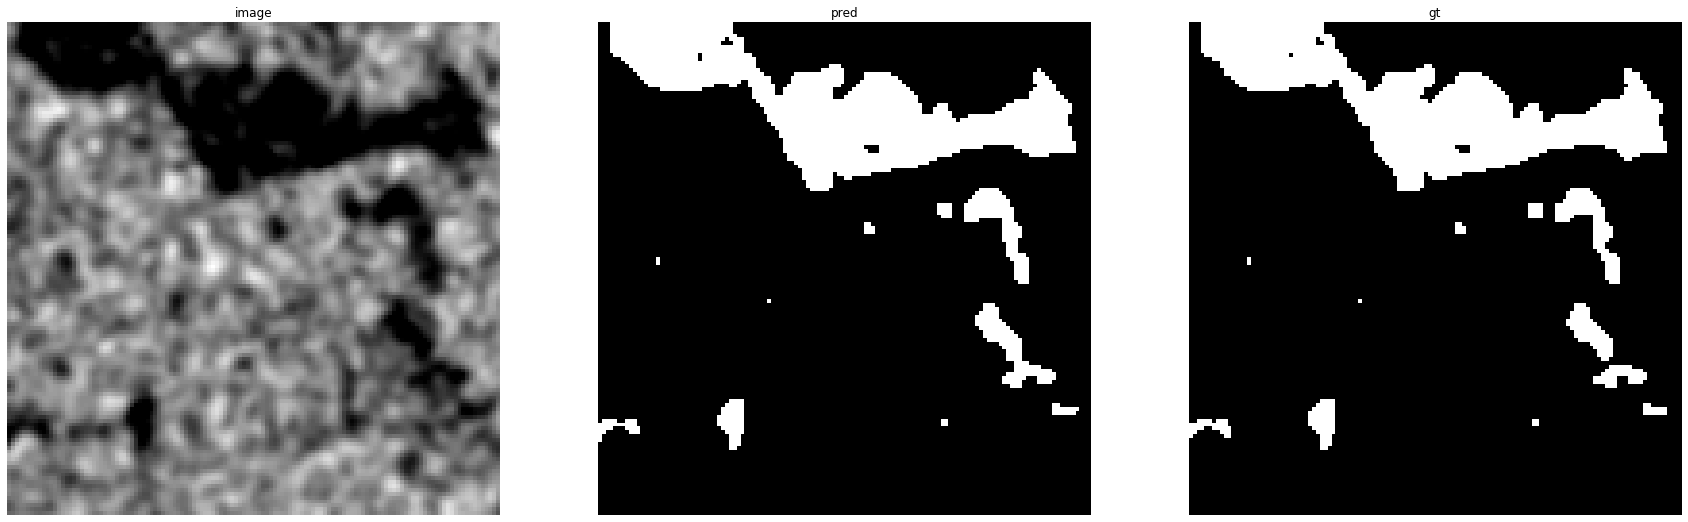

accuracy    : 0.99530029296875
precision   : 0.9825557809330628
recall      : 0.9861563517915309
f1          : 0.984352773826458
pr_auc      : 0.9992191471118816
iou         : 0.969187675070028


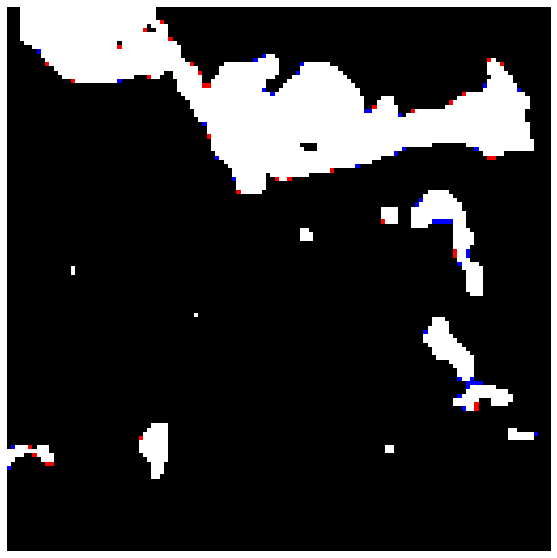

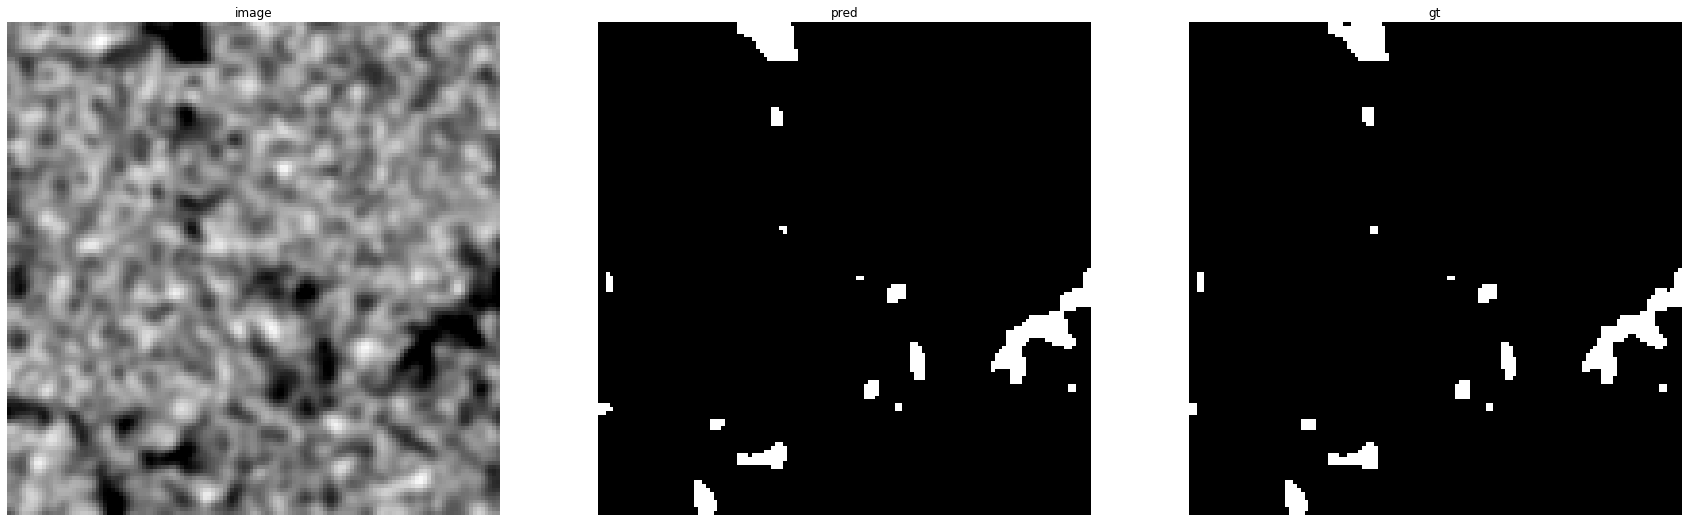

accuracy    : 0.9976806640625
precision   : 0.9585585585585585
recall      : 0.9725776965265083
f1          : 0.9655172413793104
pr_auc      : 0.9960928458362639
iou         : 0.9333333333333333


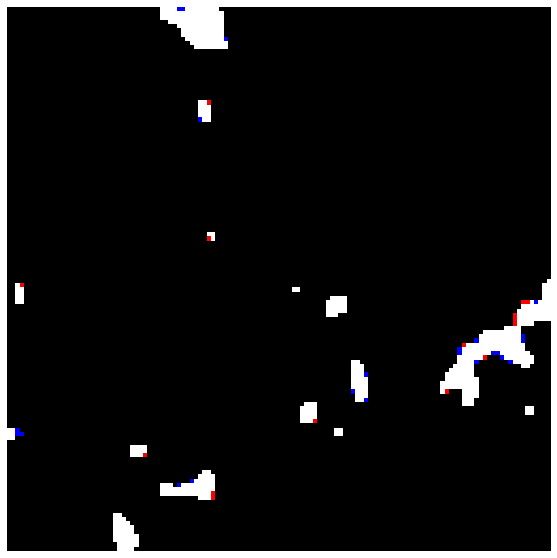

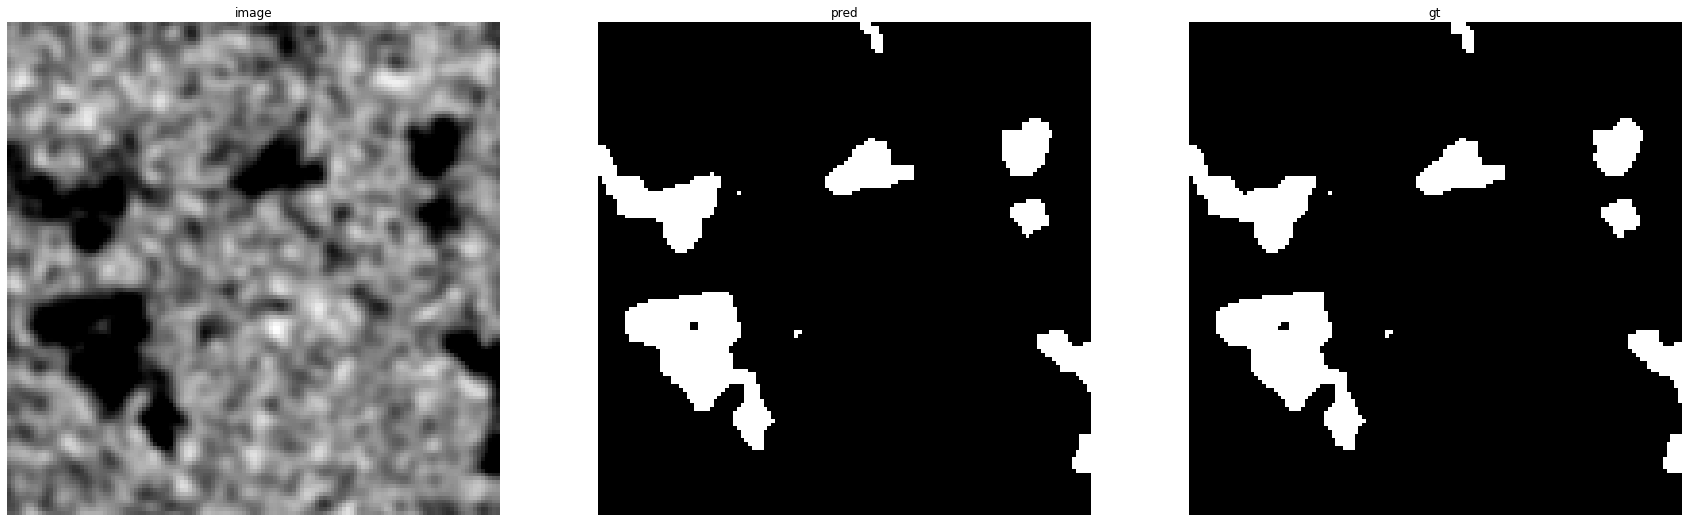

accuracy    : 0.99591064453125
precision   : 0.9851013110846245
recall      : 0.9752212389380531
f1          : 0.9801363771123628
pr_auc      : 0.9989616720646085
iou         : 0.961046511627907


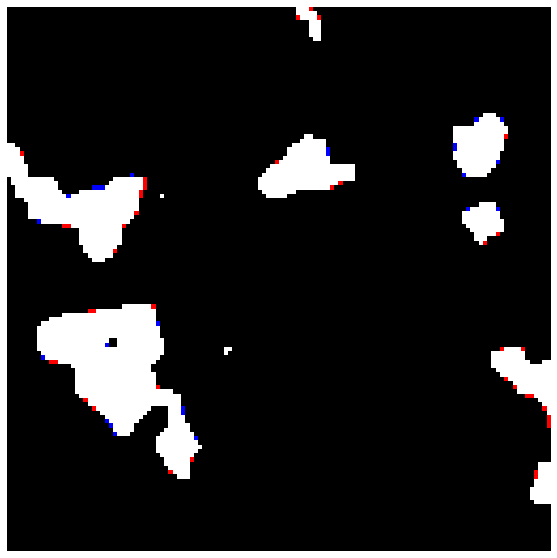

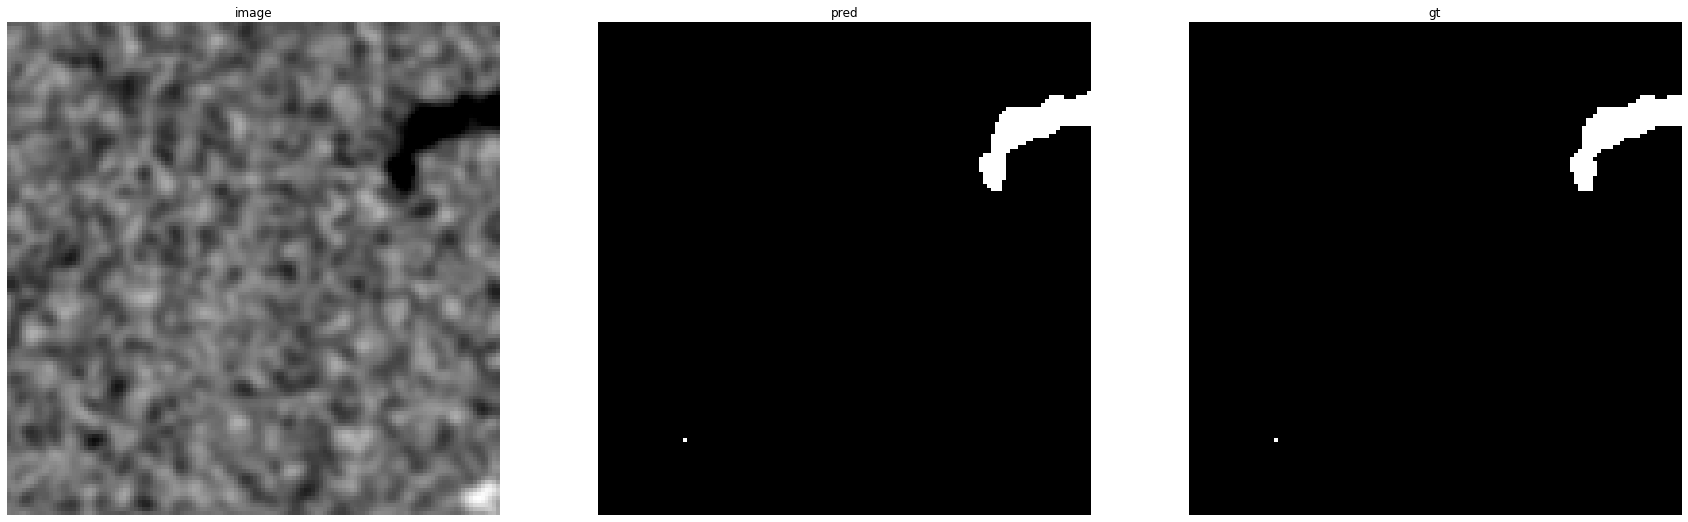

accuracy    : 0.9991455078125
precision   : 0.9828178694158075
recall      : 0.9694915254237289
f1          : 0.9761092150170648
pr_auc      : 0.9987938005555081
iou         : 0.9533333333333334


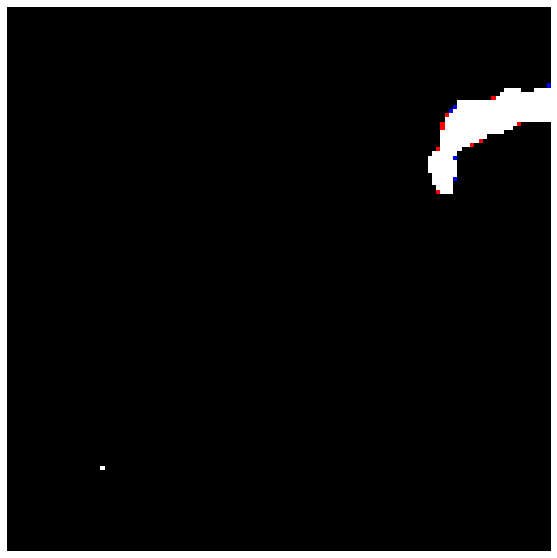

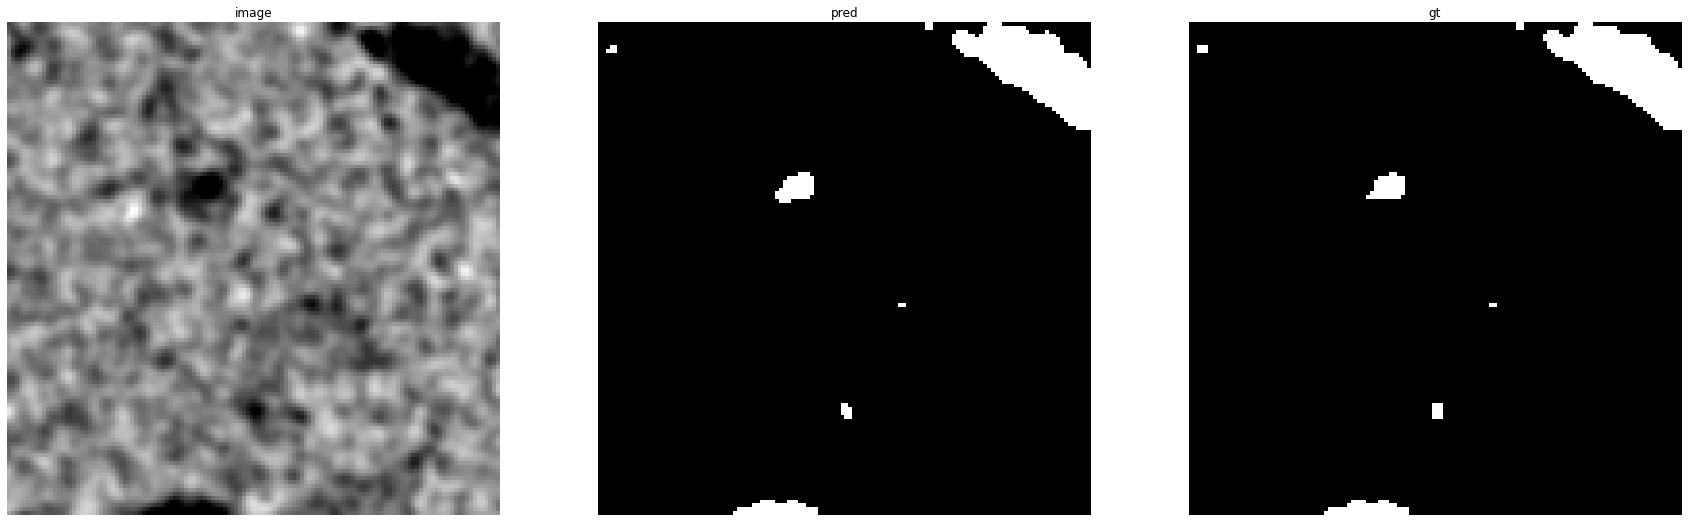

accuracy    : 0.99884033203125
precision   : 0.9817351598173516
recall      : 0.9892638036809815
f1          : 0.985485103132162
pr_auc      : 0.9992993823863446
iou         : 0.9713855421686747


Prediction for SoilAh-1:


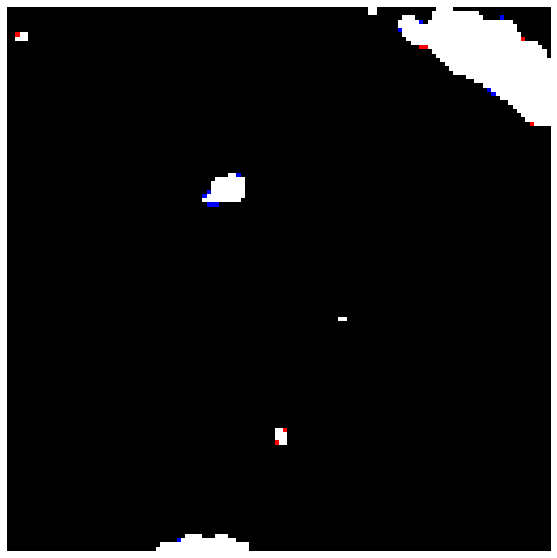

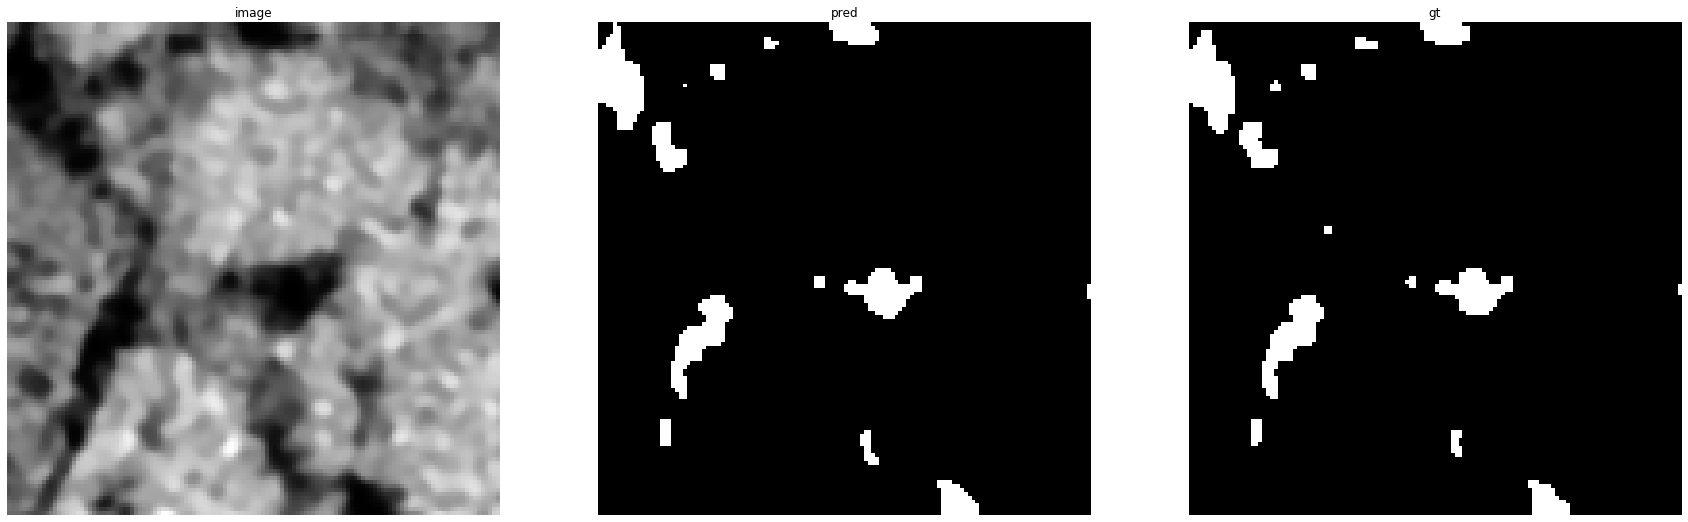

accuracy    : 0.99517822265625
precision   : 0.9584352078239609
recall      : 0.9457177322074789
f1          : 0.9520340012143291
pr_auc      : 0.9927175526176291
iou         : 0.9084588644264194


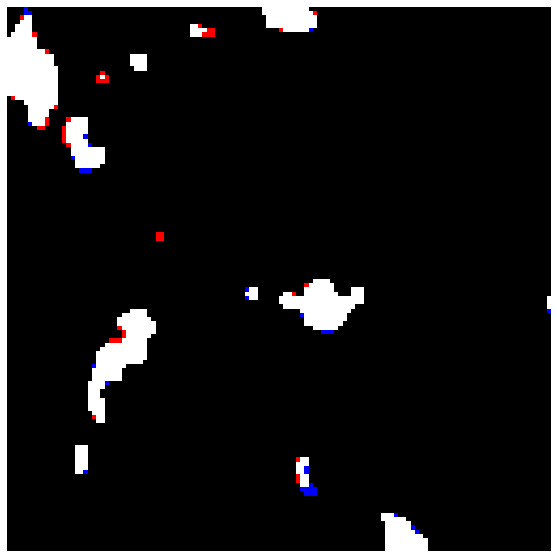

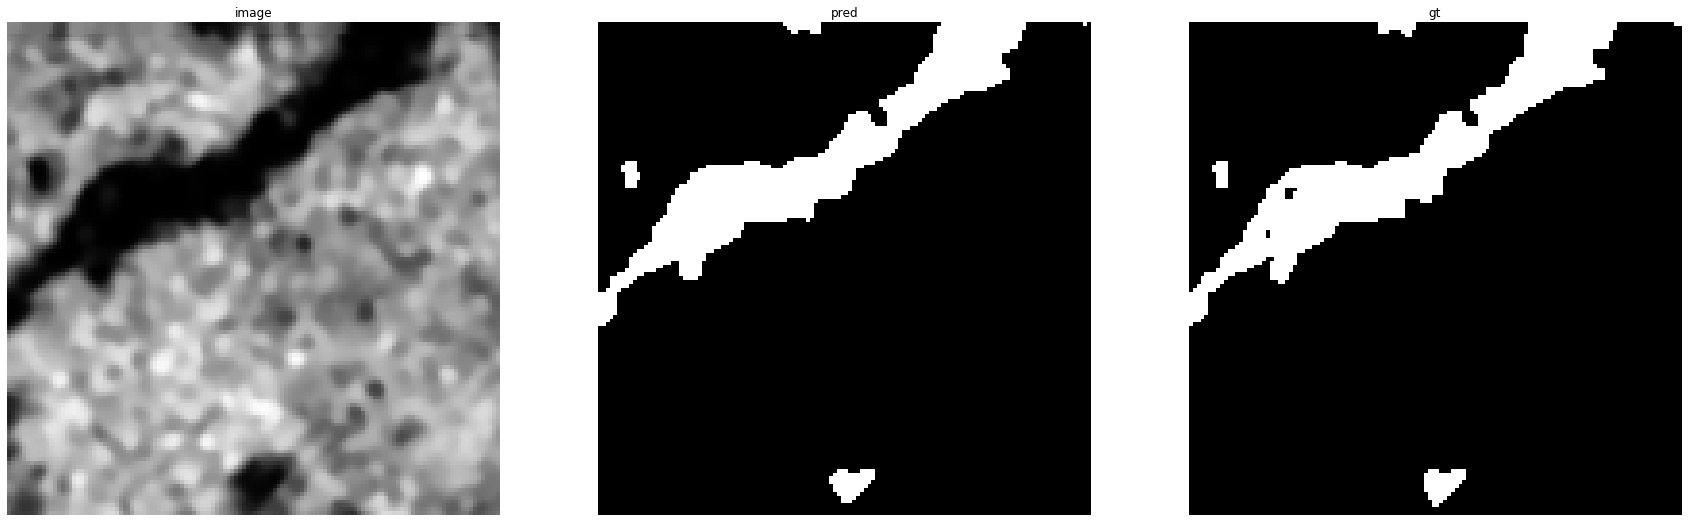

accuracy    : 0.99542236328125
precision   : 0.9784649364991718
recall      : 0.9800884955752213
f1          : 0.9792760431058305
pr_auc      : 0.998848582229321
iou         : 0.9593936112615051


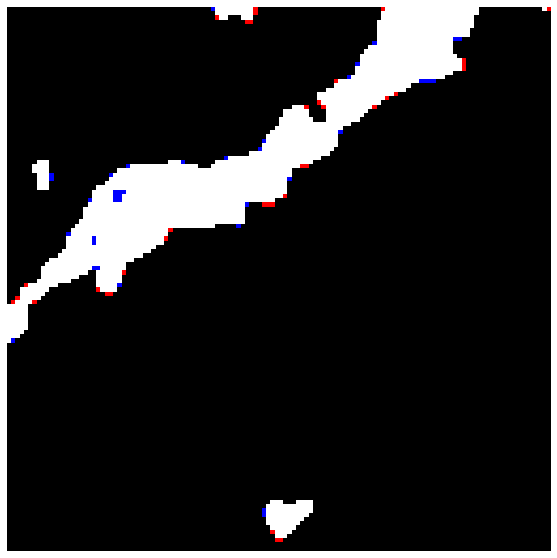

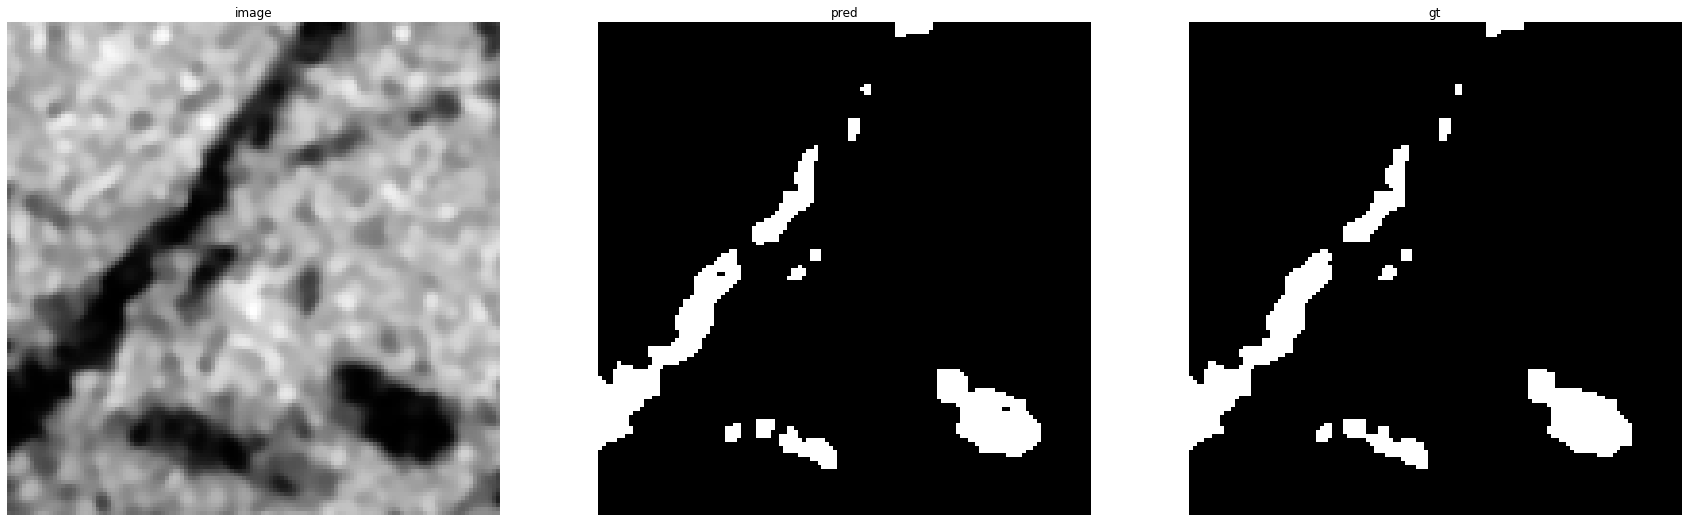

accuracy    : 0.99639892578125
precision   : 0.9764111204717776
recall      : 0.9739495798319328
f1          : 0.9751787968026924
pr_auc      : 0.9977793592604838
iou         : 0.951559934318555


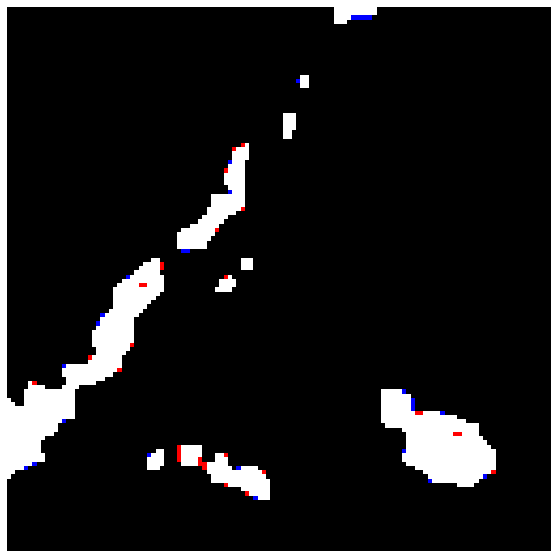

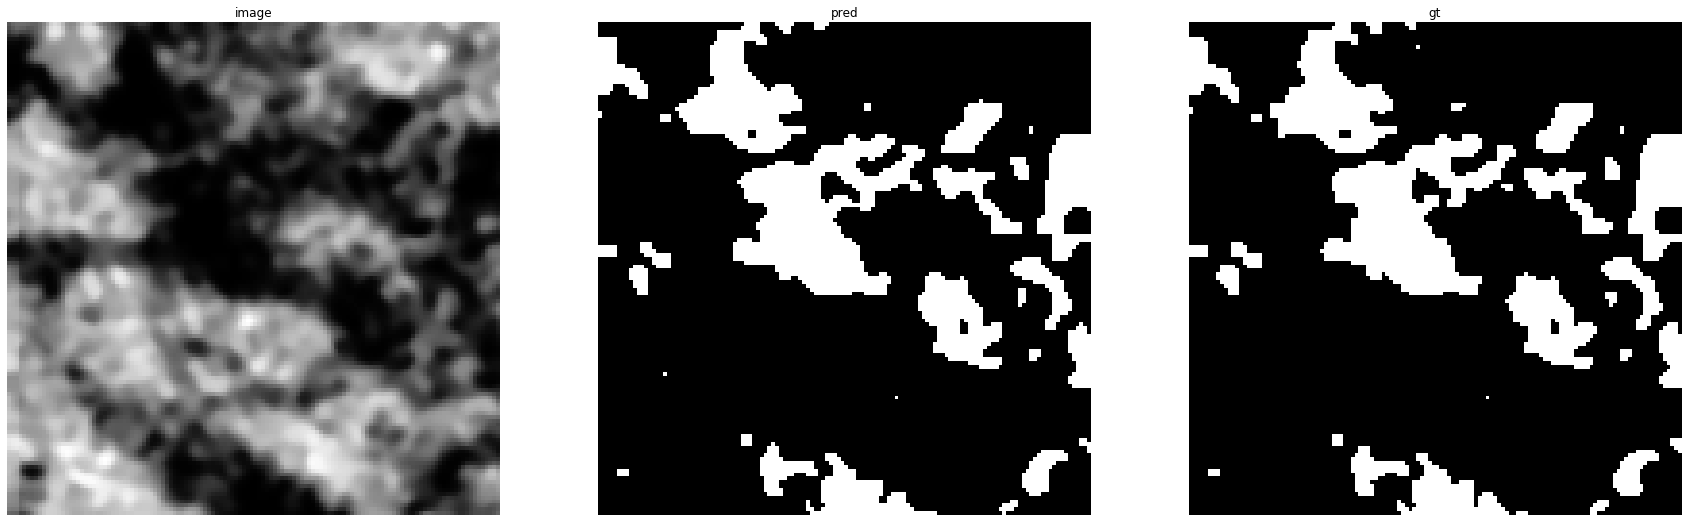

accuracy    : 0.98876953125
precision   : 0.9695104075051305
recall      : 0.976380277531739
f1          : 0.9729332156516624
pr_auc      : 0.9977927133427145
iou         : 0.9472930392437697


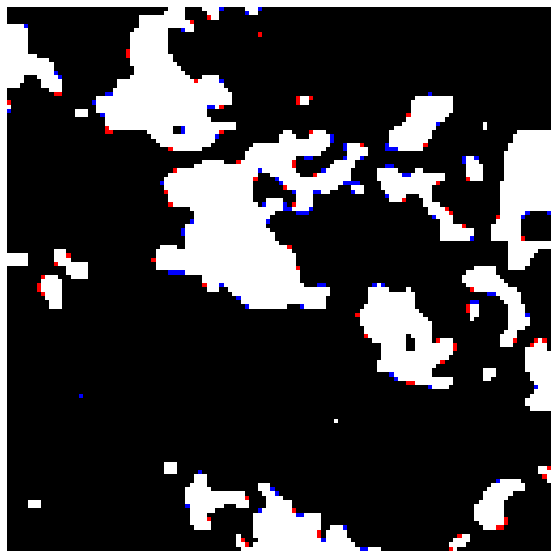

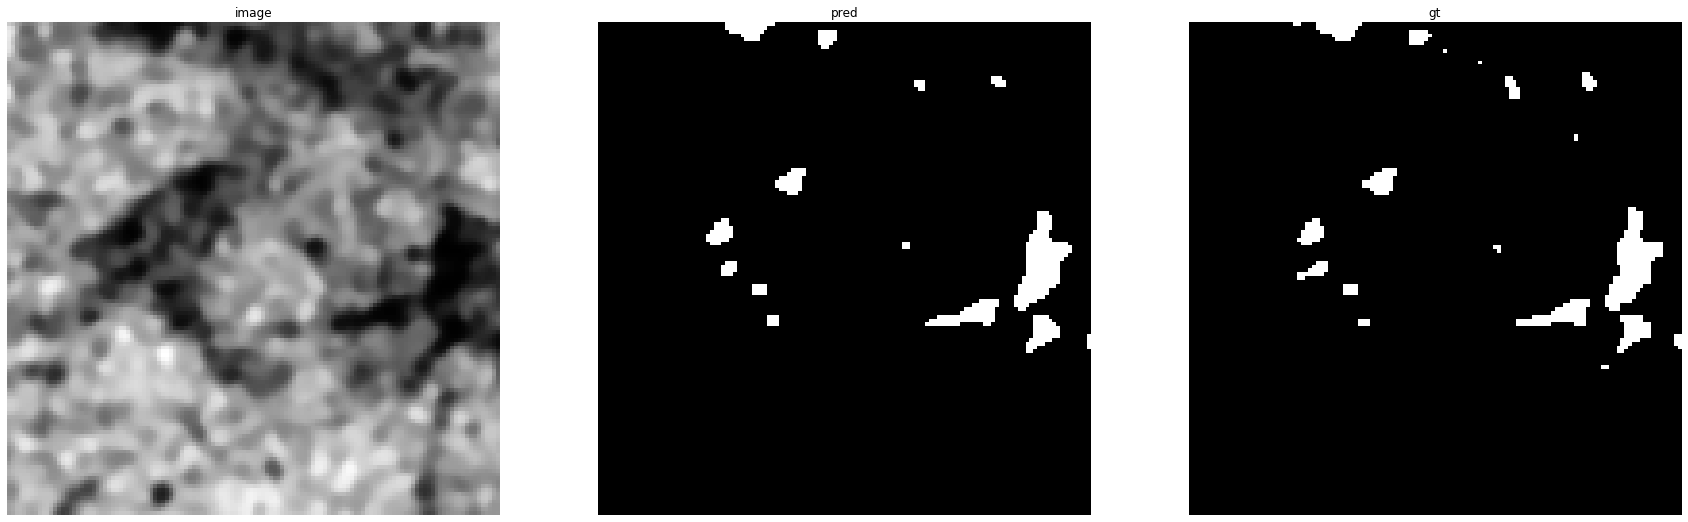

accuracy    : 0.99566650390625
precision   : 0.9628180039138943
recall      : 0.9044117647058824
f1          : 0.9327014218009477
pr_auc      : 0.9879576976677618
iou         : 0.8738898756660746


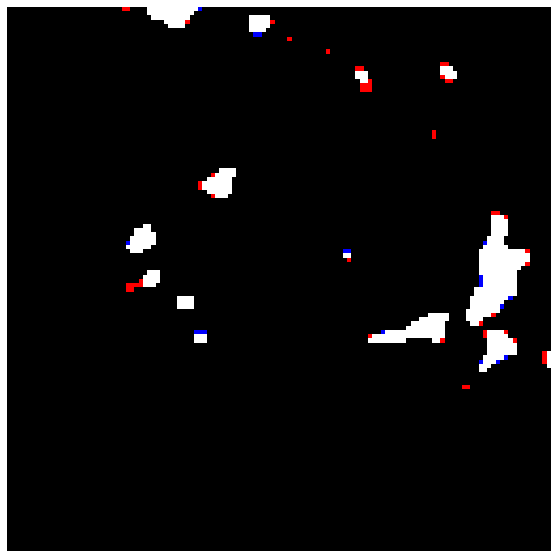

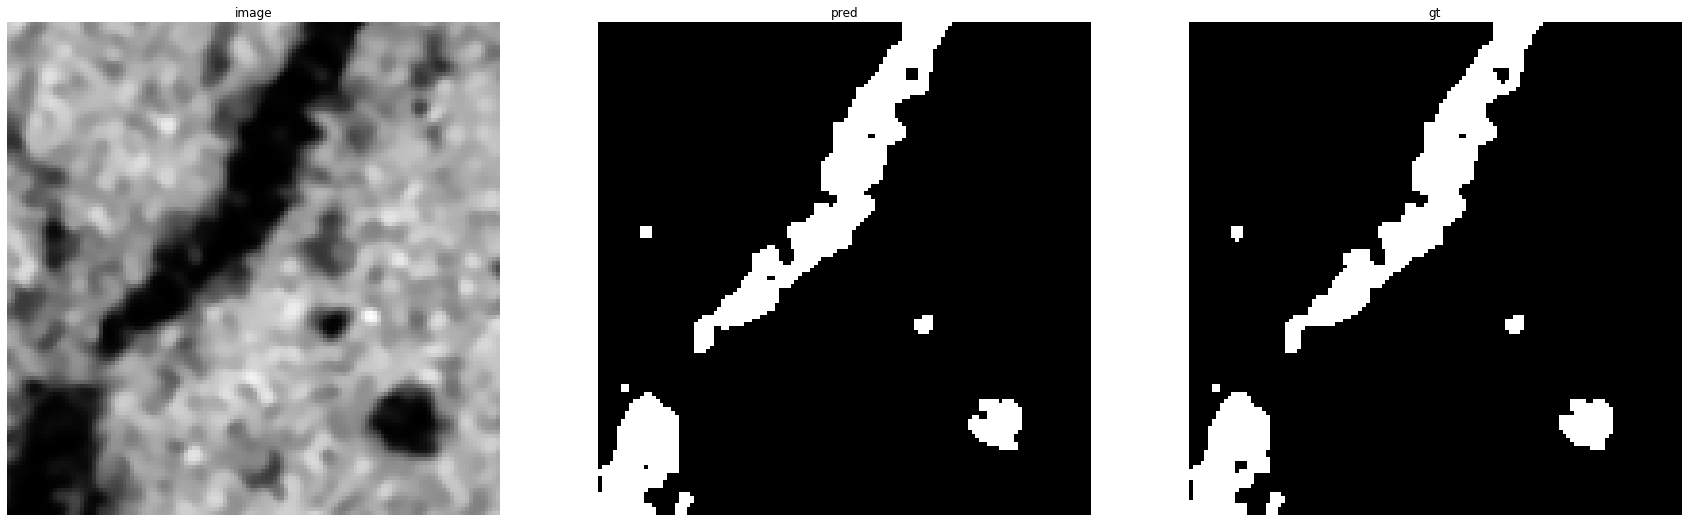

accuracy    : 0.99615478515625
precision   : 0.9767570558937465
recall      : 0.9882418812989922
f1          : 0.9824659059281937
pr_auc      : 0.9989580086675494
iou         : 0.9655361050328227


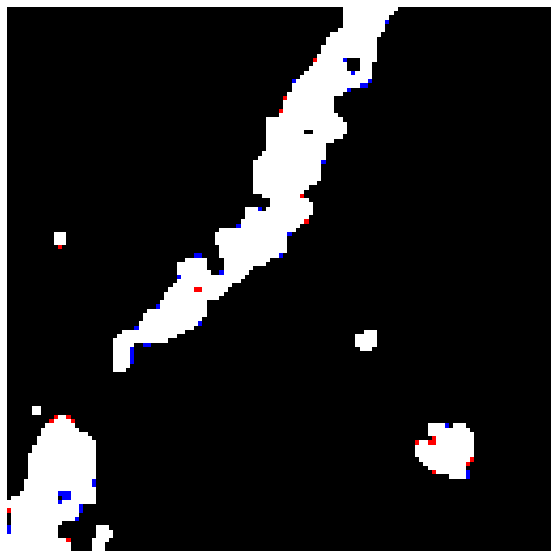

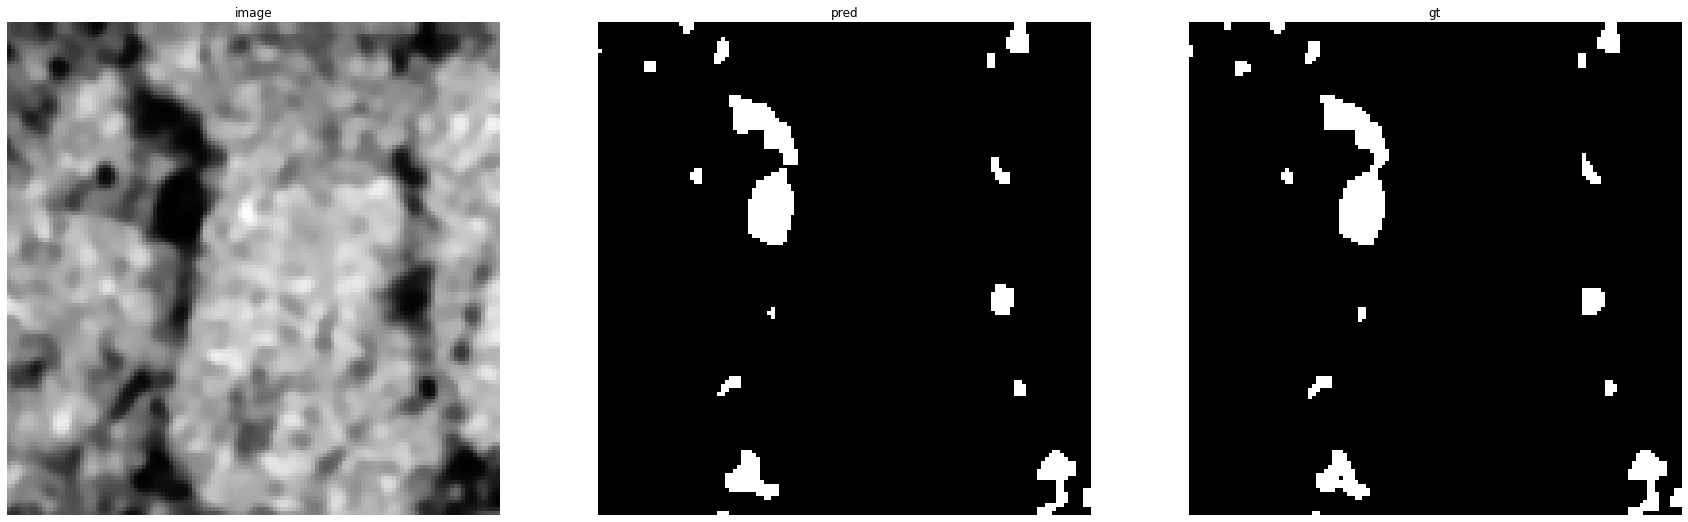

accuracy    : 0.99578857421875
precision   : 0.9634831460674157
recall      : 0.9410150891632373
f1          : 0.952116585704372
pr_auc      : 0.9924879691422908
iou         : 0.9086092715231788


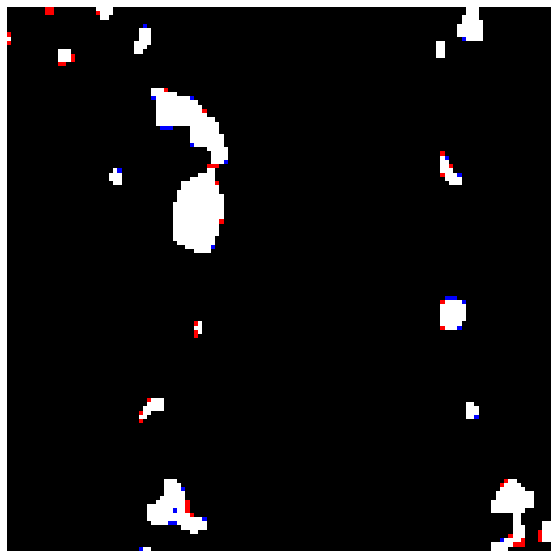

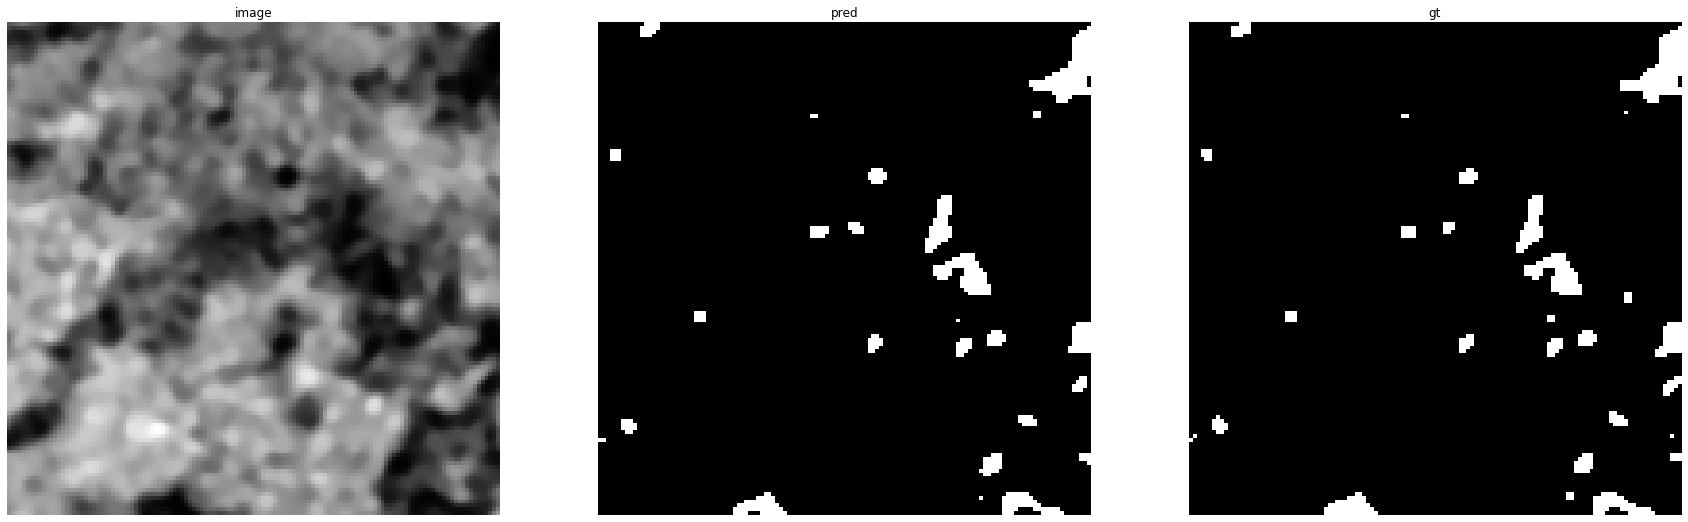

accuracy    : 0.9954833984375
precision   : 0.9578125
recall      : 0.9287878787878788
f1          : 0.943076923076923
pr_auc      : 0.9886781369321405
iou         : 0.8922852983988355


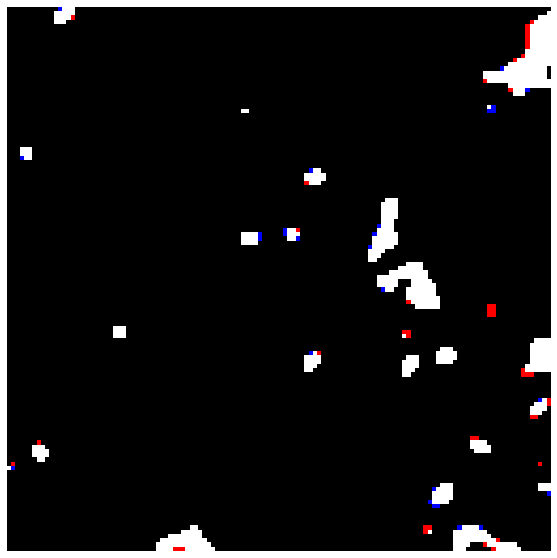

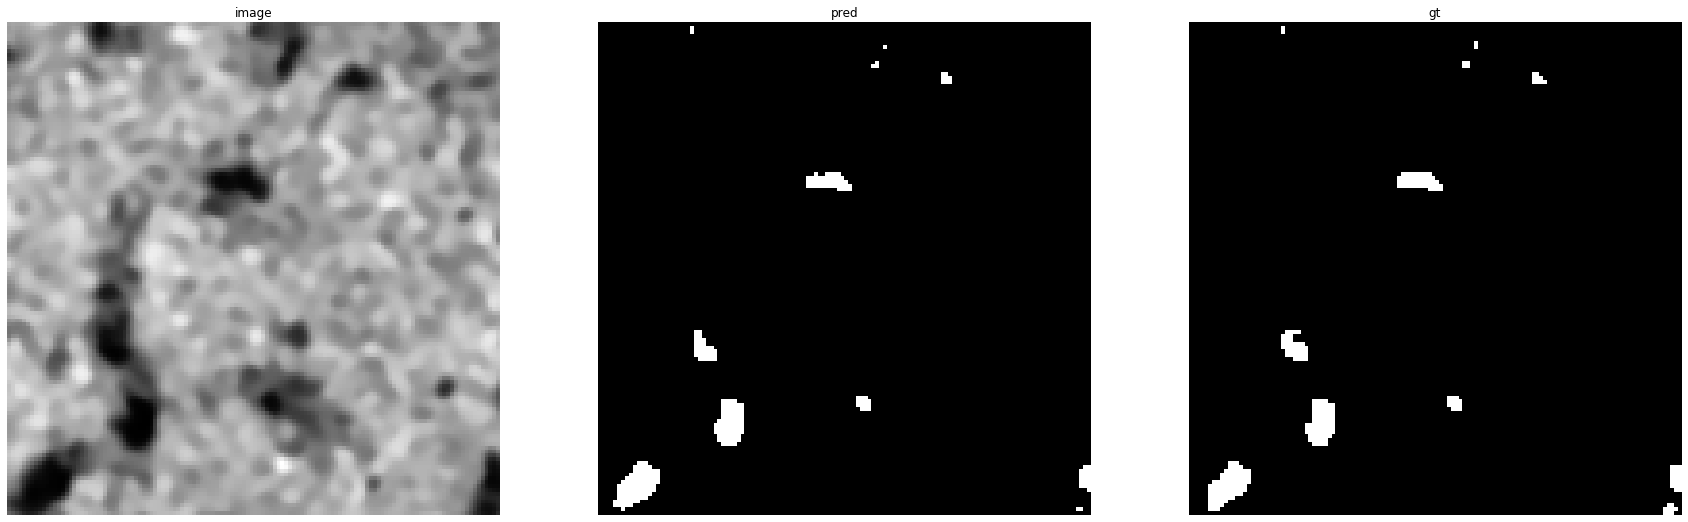

accuracy    : 0.997802734375
precision   : 0.9653979238754326
recall      : 0.9147540983606557
f1          : 0.9393939393939393
pr_auc      : 0.9907412197481634
iou         : 0.8857142857142857


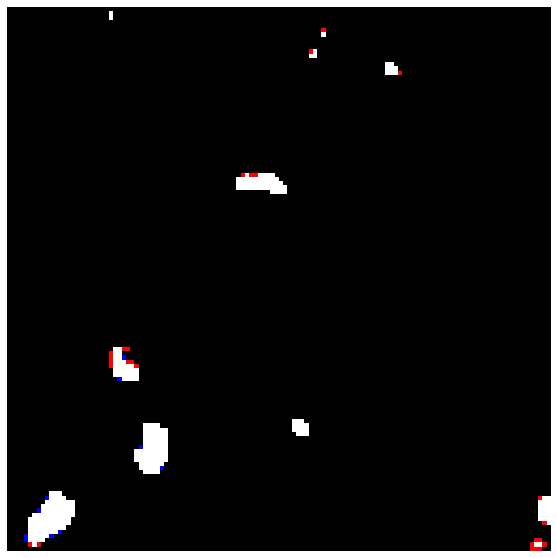

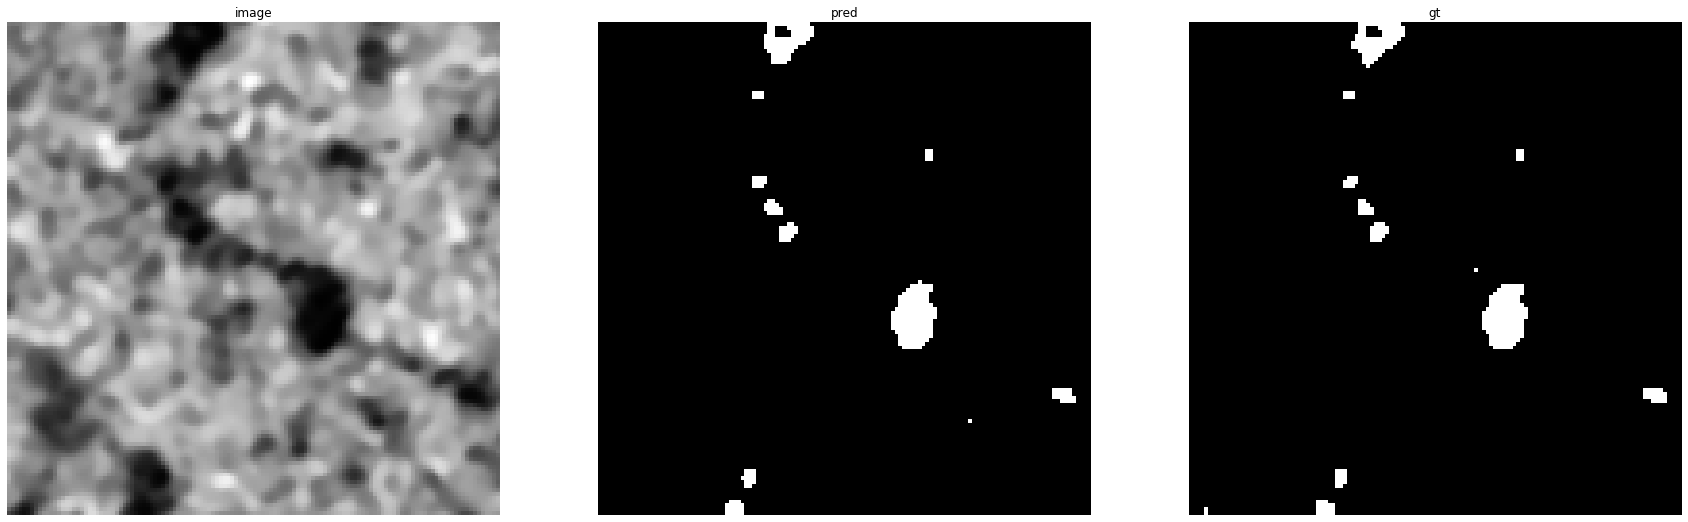

accuracy    : 0.998779296875
precision   : 0.9745762711864406
recall      : 0.9691011235955056
f1          : 0.9718309859154929
pr_auc      : 0.9949832400194875
iou         : 0.9452054794520548


Prediction for TeTree_subset1:


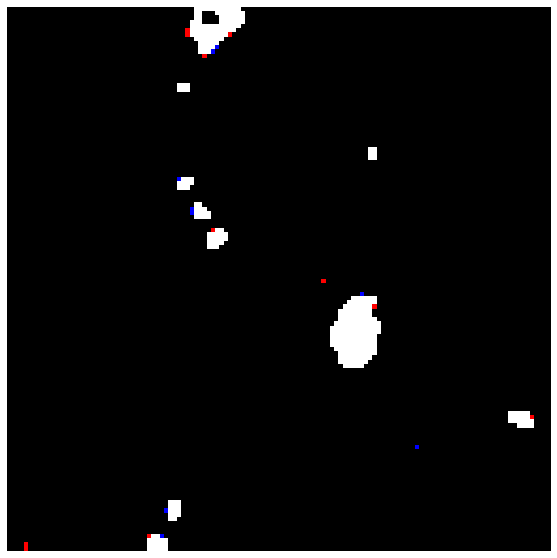

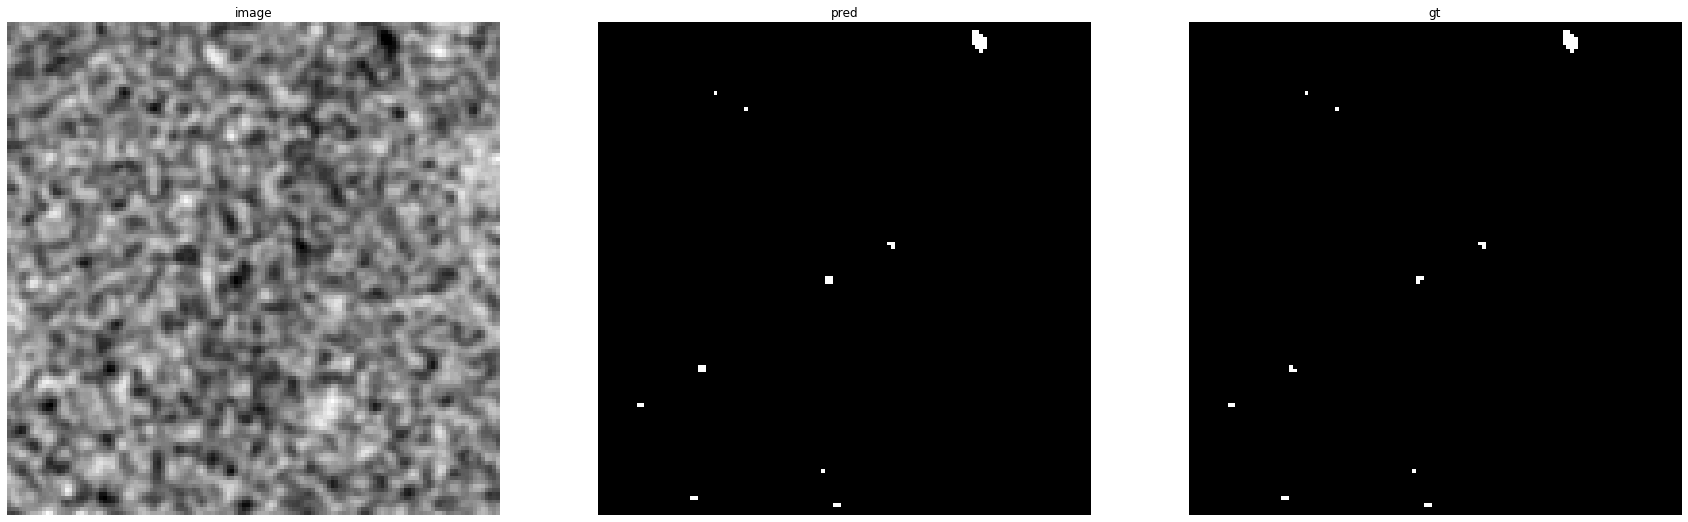

accuracy    : 0.9998779296875
precision   : 0.9459459459459459
recall      : 1.0
f1          : 0.9722222222222222
pr_auc      : 0.9999999999999999
iou         : 0.9459459459459459


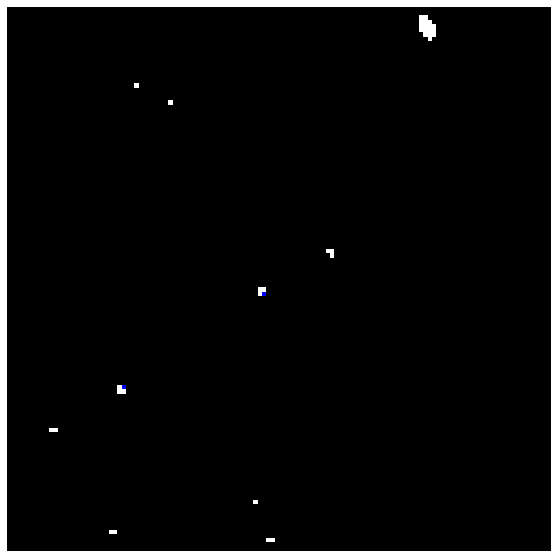

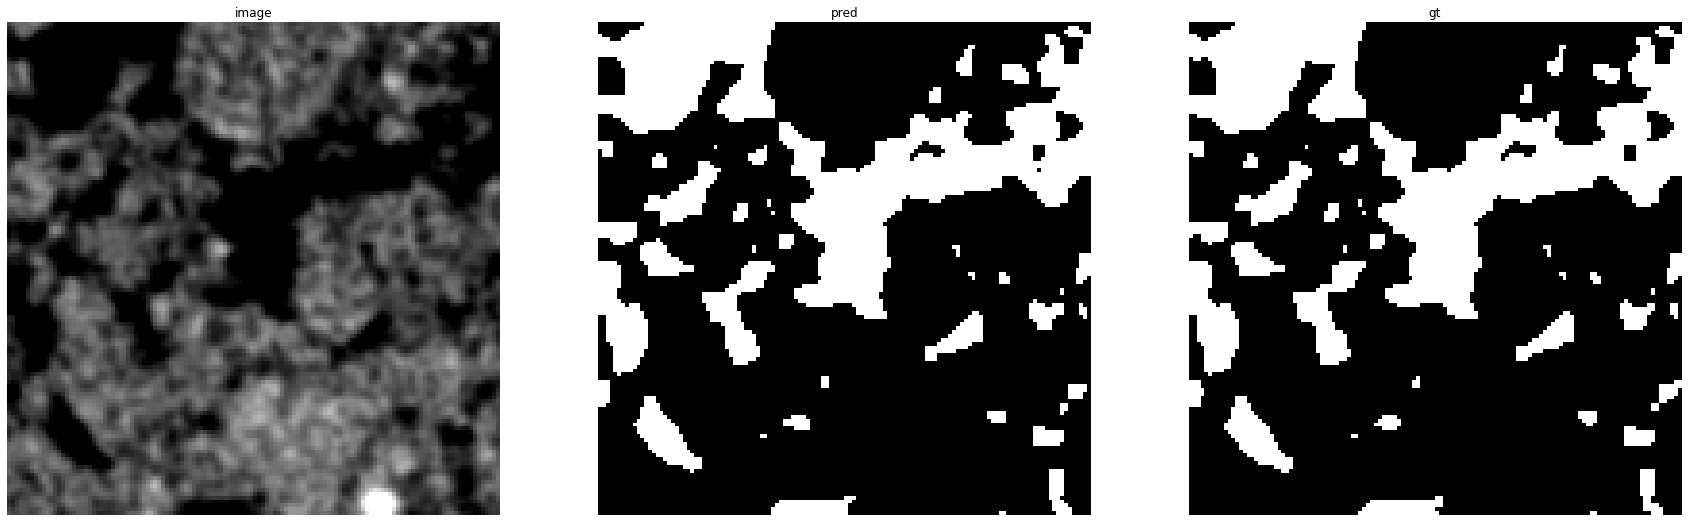

accuracy    : 0.99346923828125
precision   : 0.9881305637982196
recall      : 0.9874543795620438
f1          : 0.9877923559612094
pr_auc      : 0.9993880180055721
iou         : 0.9758791704238052


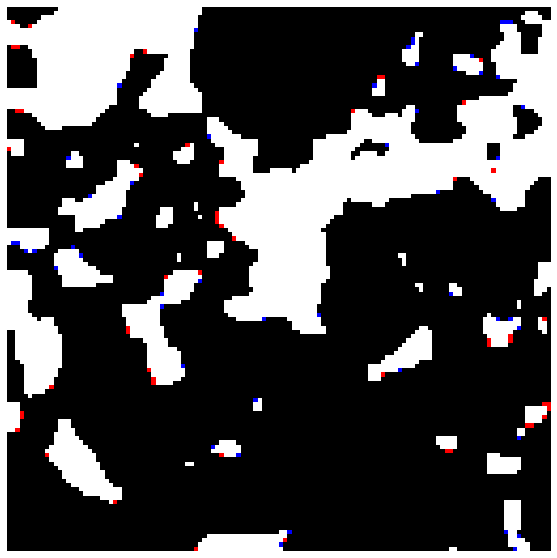

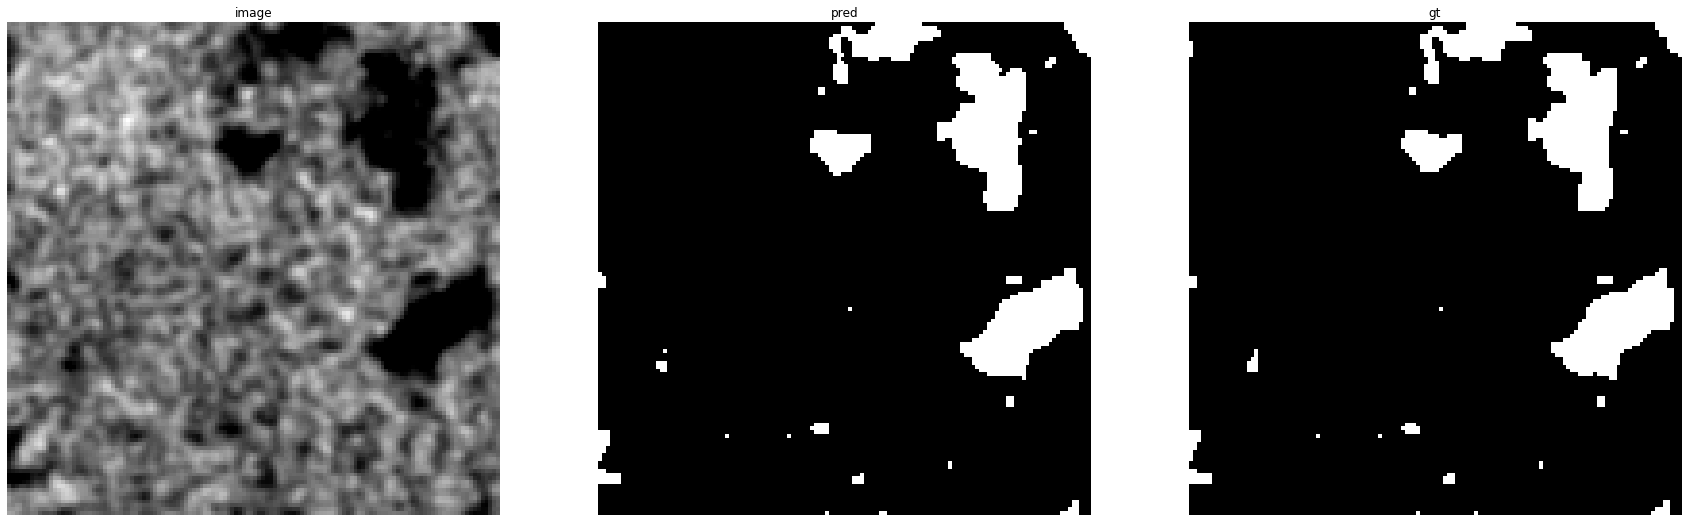

accuracy    : 0.996337890625
precision   : 0.9794476557482338
recall      : 0.9819703799098519
f1          : 0.9807073954983924
pr_auc      : 0.9988892871588585
iou         : 0.9621451104100947


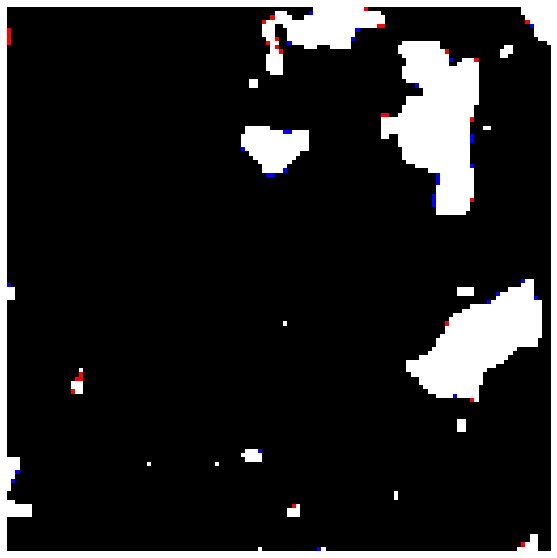

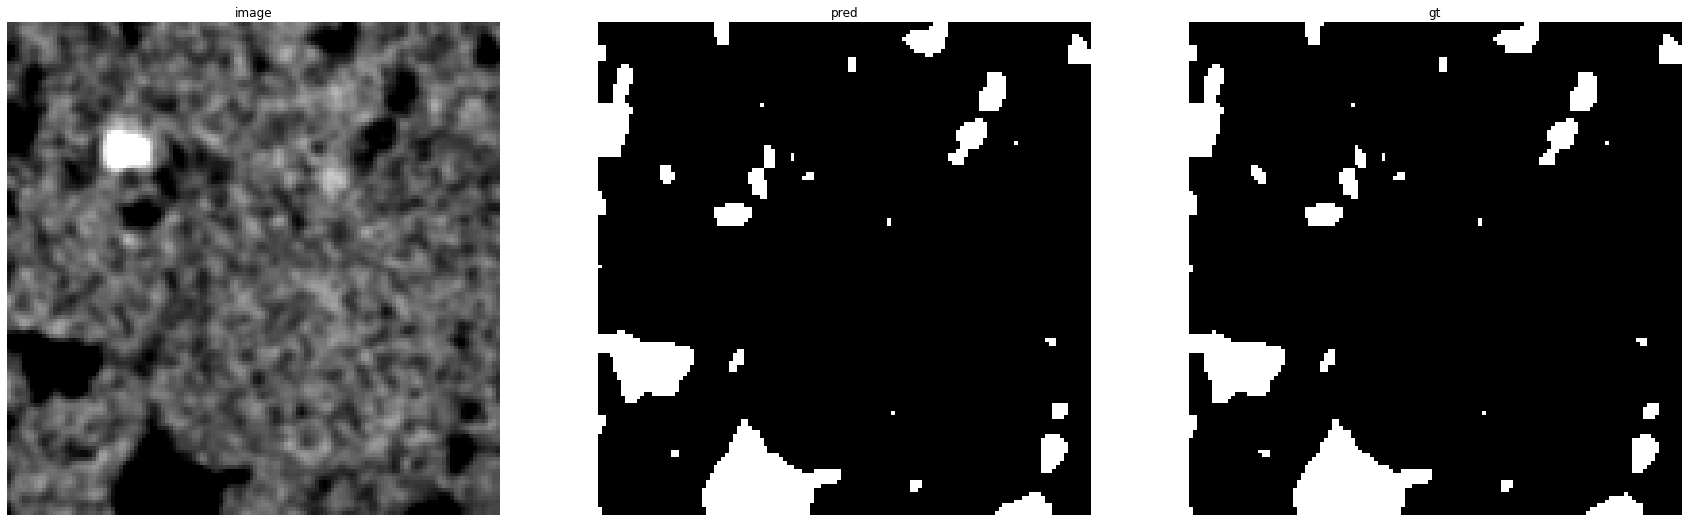

accuracy    : 0.997314453125
precision   : 0.9839464882943144
recall      : 0.9865861837692823
f1          : 0.985264567983925
pr_auc      : 0.9993693991327642
iou         : 0.970957095709571


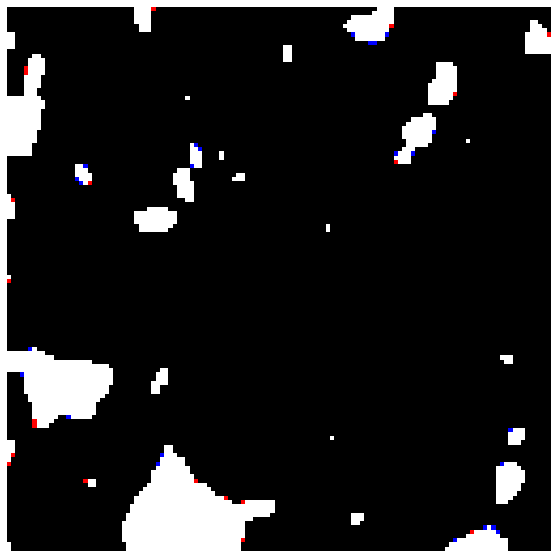

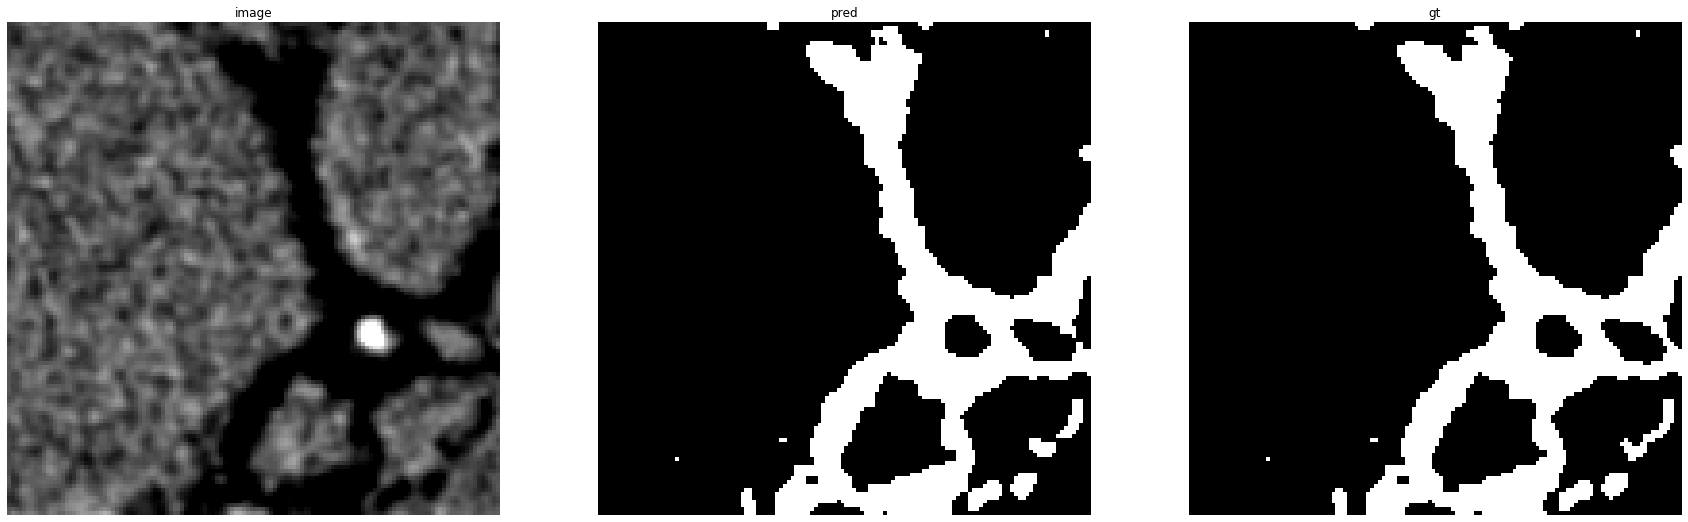

accuracy    : 0.99456787109375
precision   : 0.983149708360337
recall      : 0.9879518072289156
f1          : 0.9855449082345298
pr_auc      : 0.9994268989289228
iou         : 0.9715017611271214


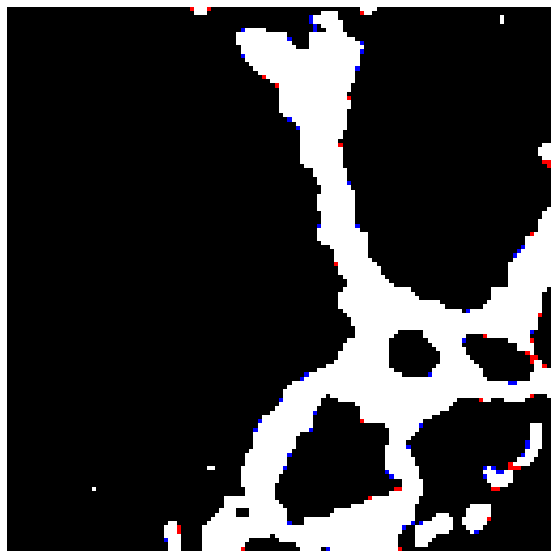

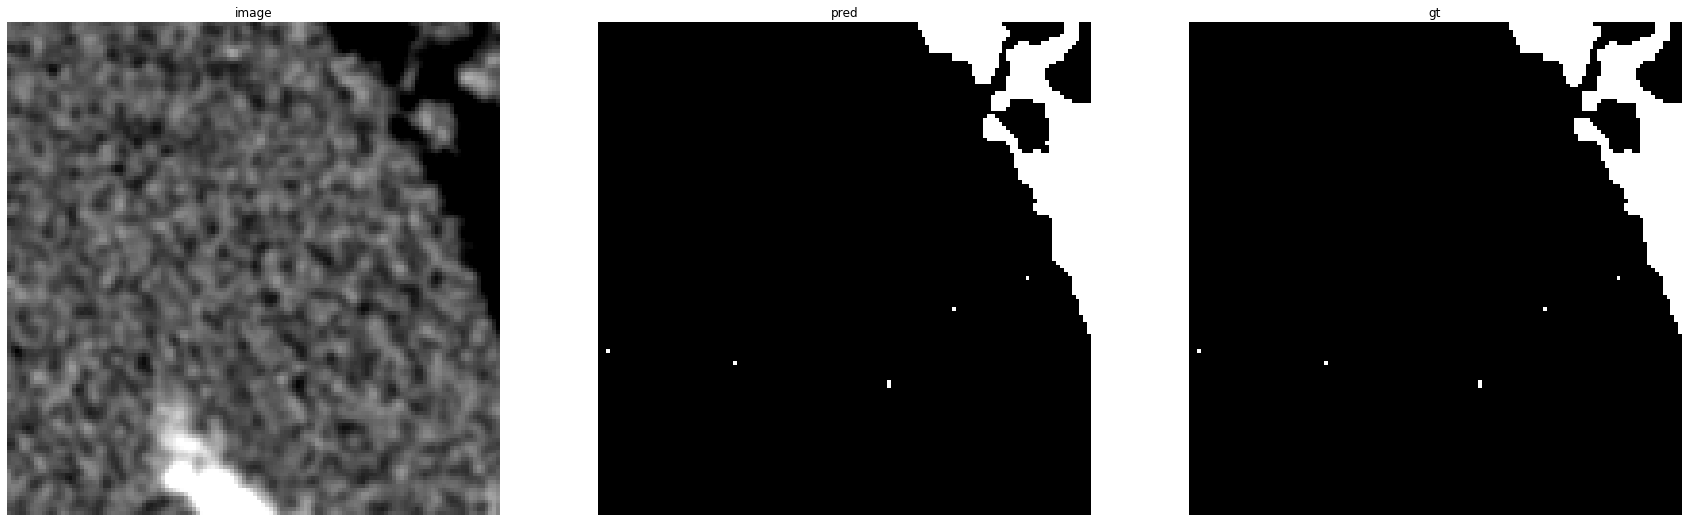

accuracy    : 0.99859619140625
precision   : 0.9869337979094077
recall      : 0.992988606485539
f1          : 0.9899519440803846
pr_auc      : 0.9997314645054065
iou         : 0.9801038062283737


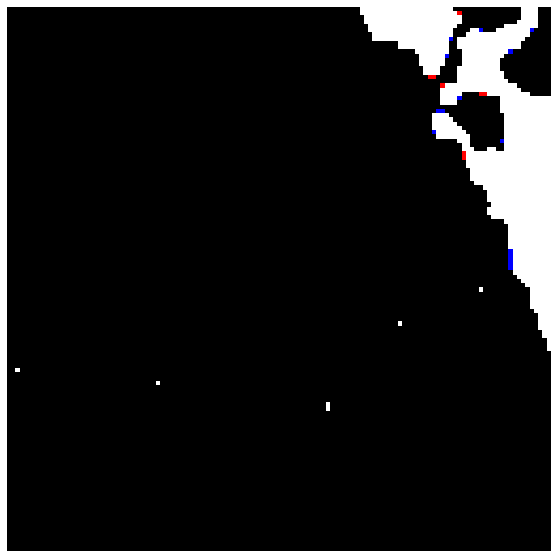

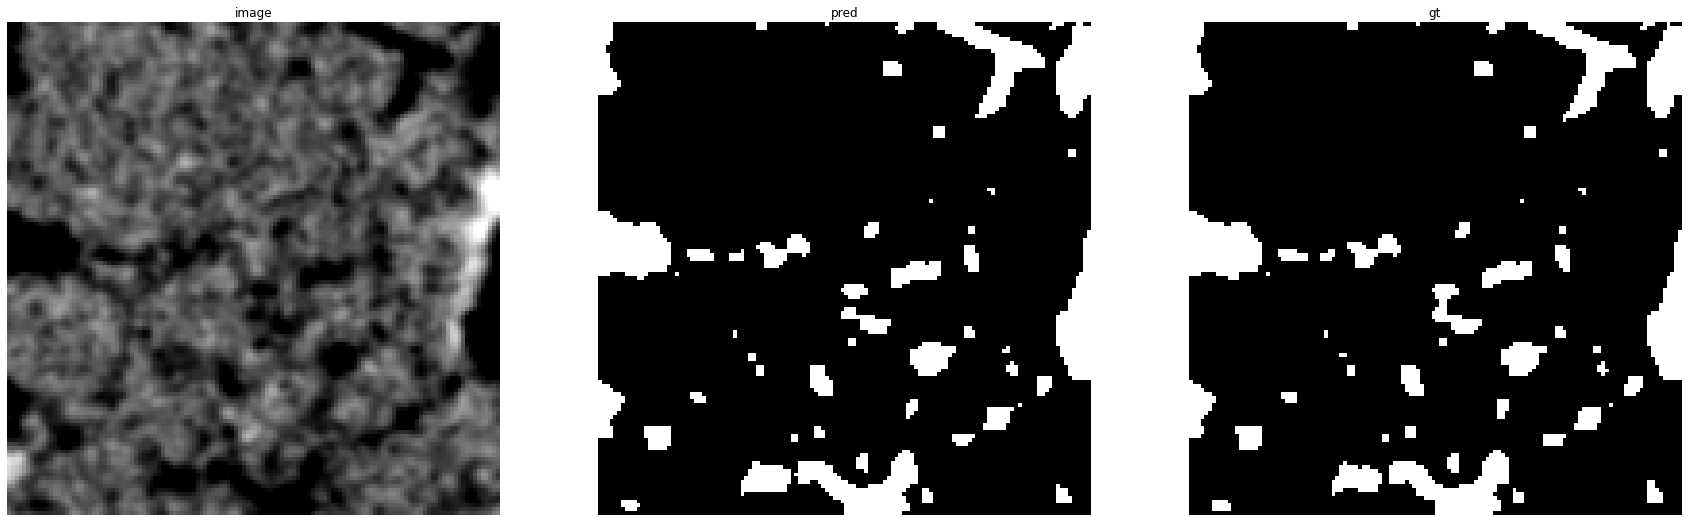

accuracy    : 0.9937744140625
precision   : 0.974937343358396
recall      : 0.9739609414121182
f1          : 0.9744488977955913
pr_auc      : 0.9979401845930544
iou         : 0.9501709819247679


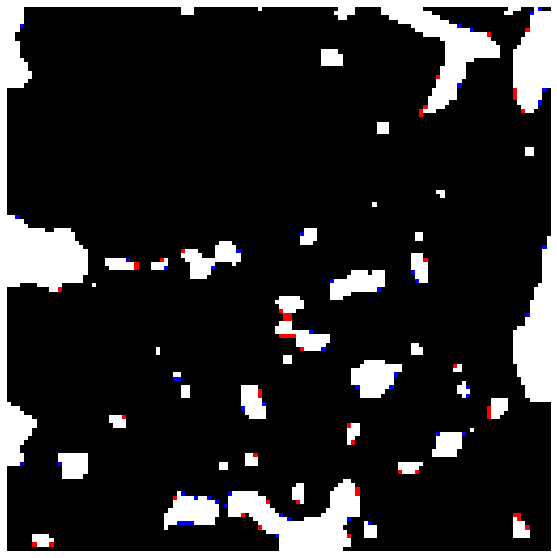

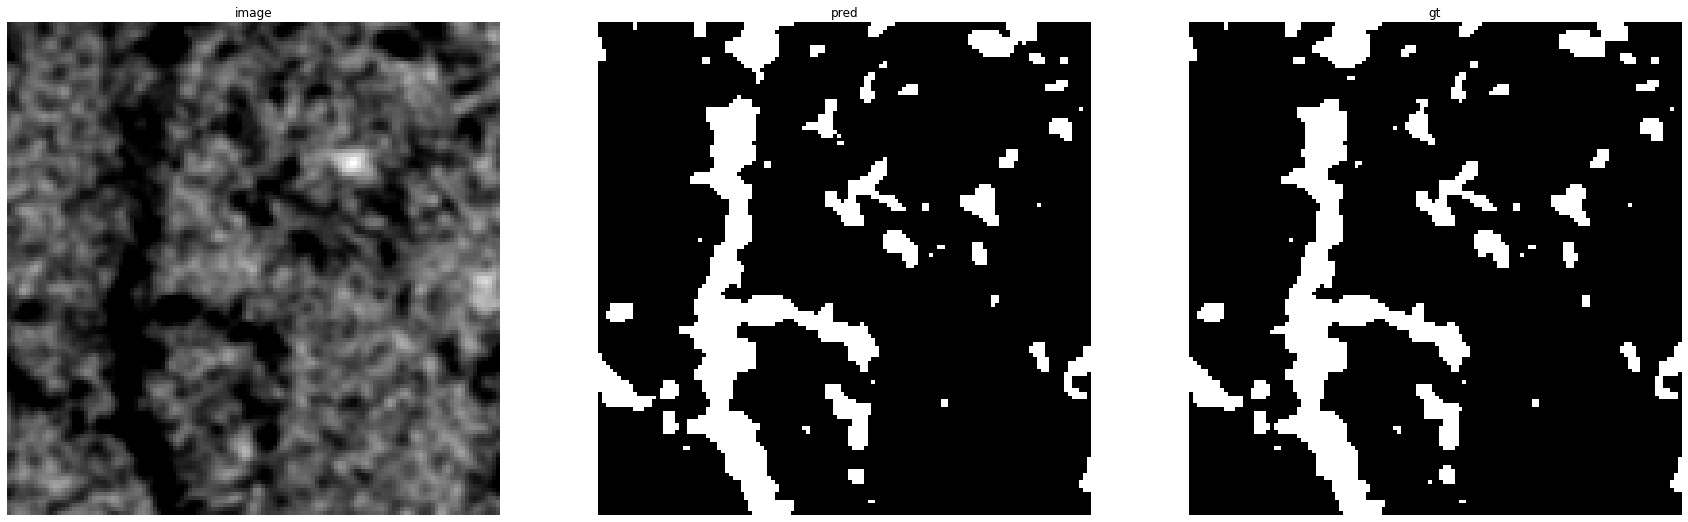

accuracy    : 0.99169921875
precision   : 0.9690887193898033
recall      : 0.9761423372422159
f1          : 0.9726027397260274
pr_auc      : 0.9977624473269742
iou         : 0.9466666666666667


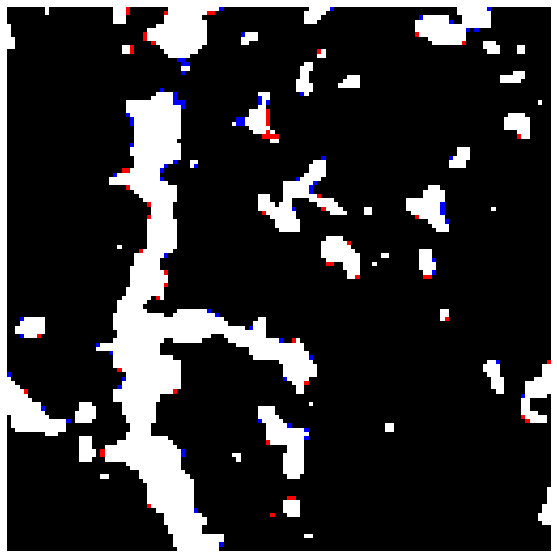

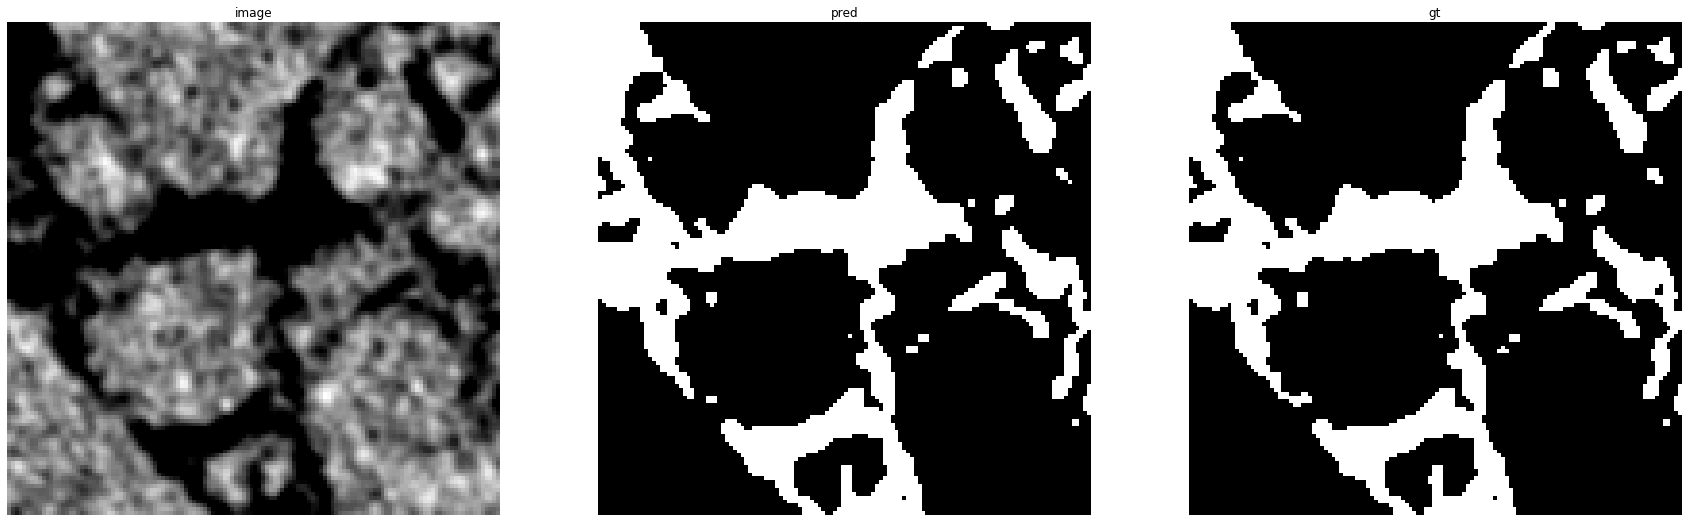

accuracy    : 0.99102783203125
precision   : 0.9820086540651333
recall      : 0.9844748858447488
f1          : 0.9832402234636872
pr_auc      : 0.9991815384191486
iou         : 0.967032967032967


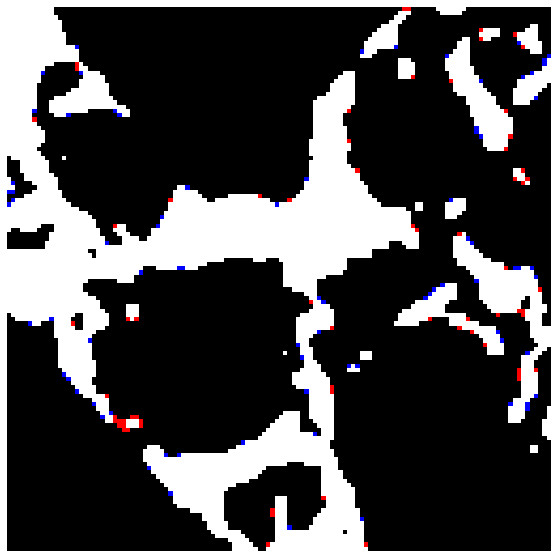

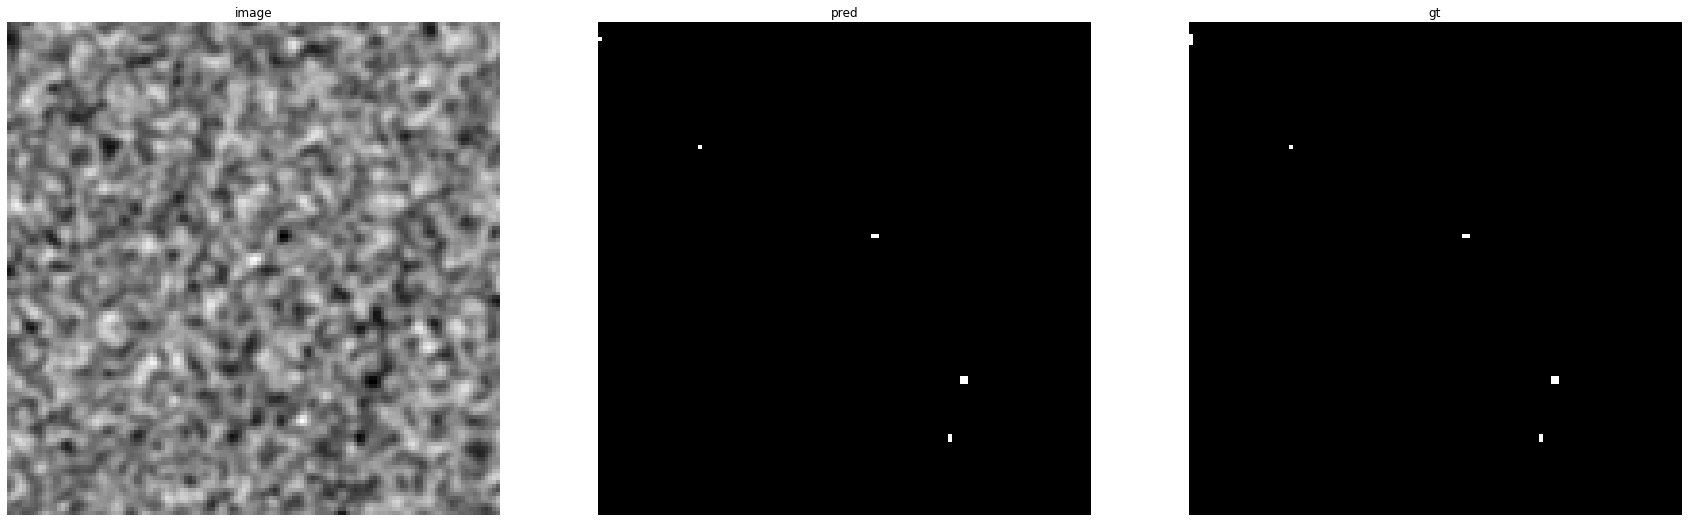

accuracy    : 0.9998779296875
precision   : 1.0
recall      : 0.8333333333333334
f1          : 0.9090909090909091
pr_auc      : 0.9866452991452992
iou         : 0.8333333333333334


Prediction for TiTree_subset2:


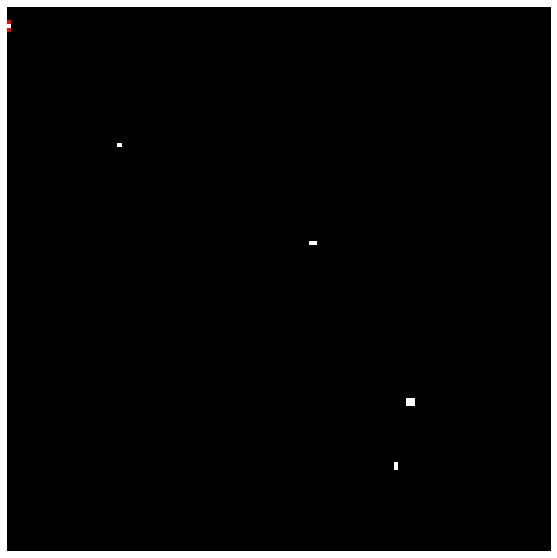

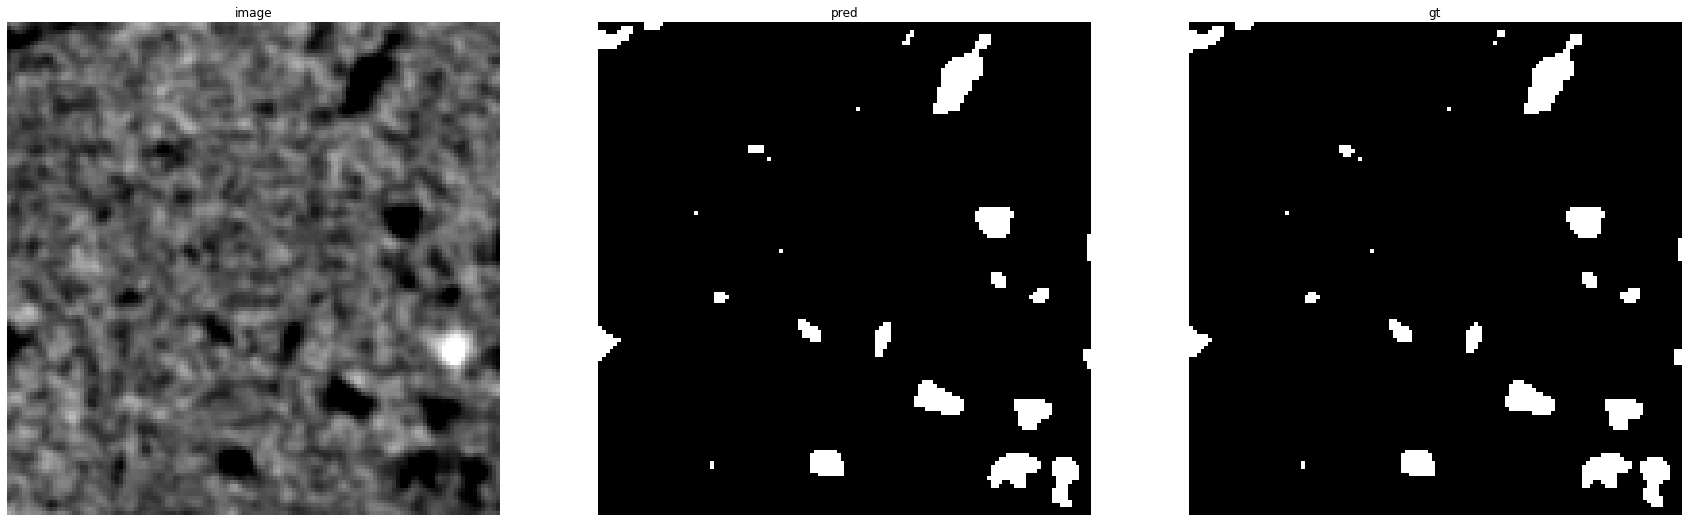

accuracy    : 0.99786376953125
precision   : 0.9772117962466488
recall      : 0.9759036144578314
f1          : 0.9765572672471533
pr_auc      : 0.9980919612443593
iou         : 0.9541884816753927


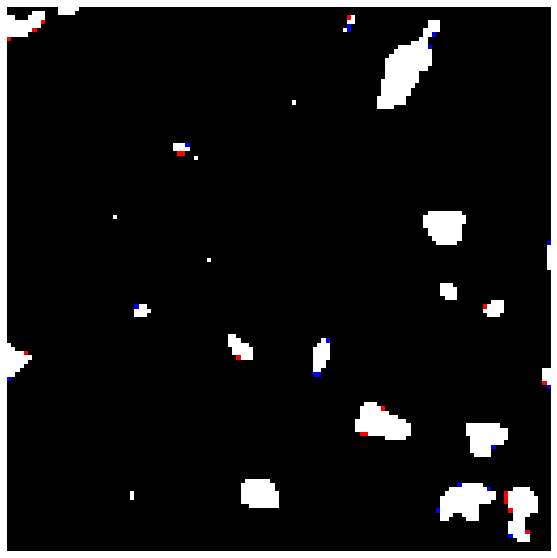

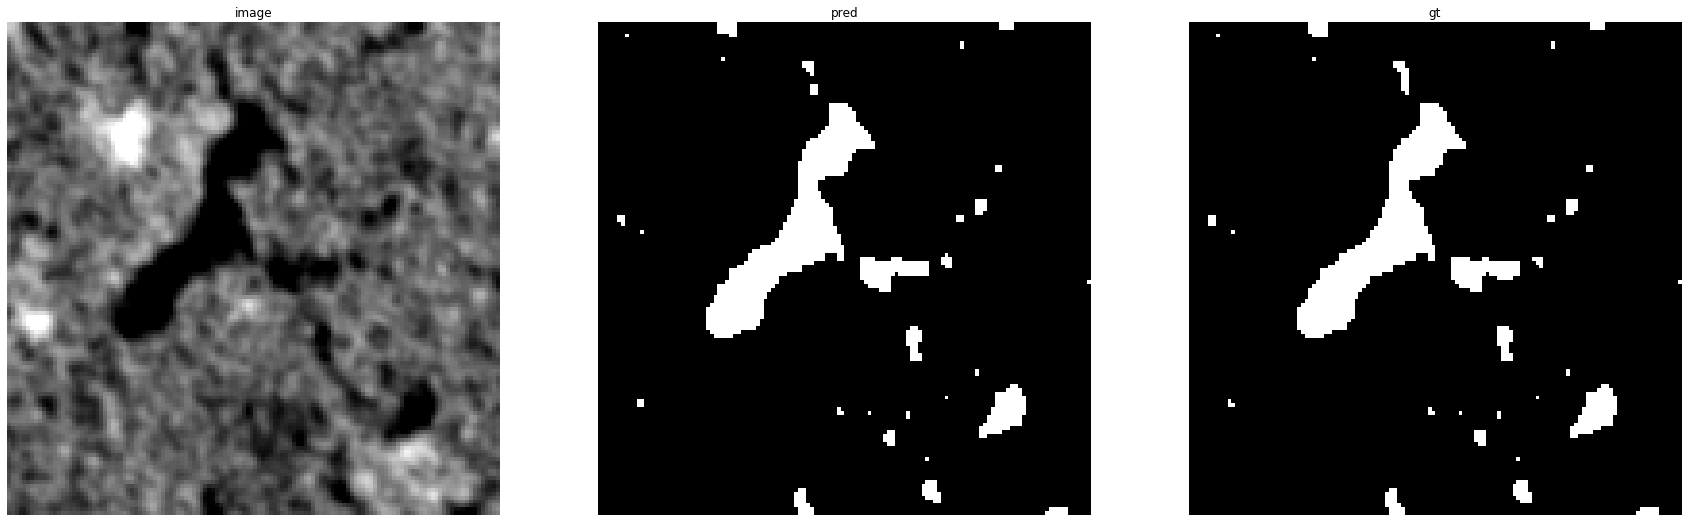

accuracy    : 0.99774169921875
precision   : 0.9853951890034365
recall      : 0.9828620394173093
f1          : 0.9841269841269841
pr_auc      : 0.9991527233441033
iou         : 0.96875


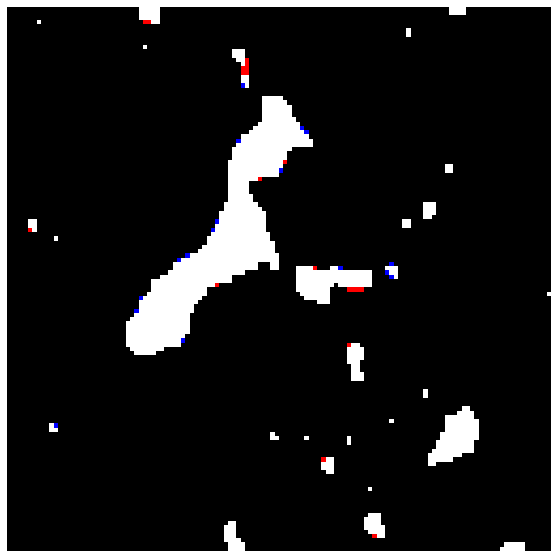

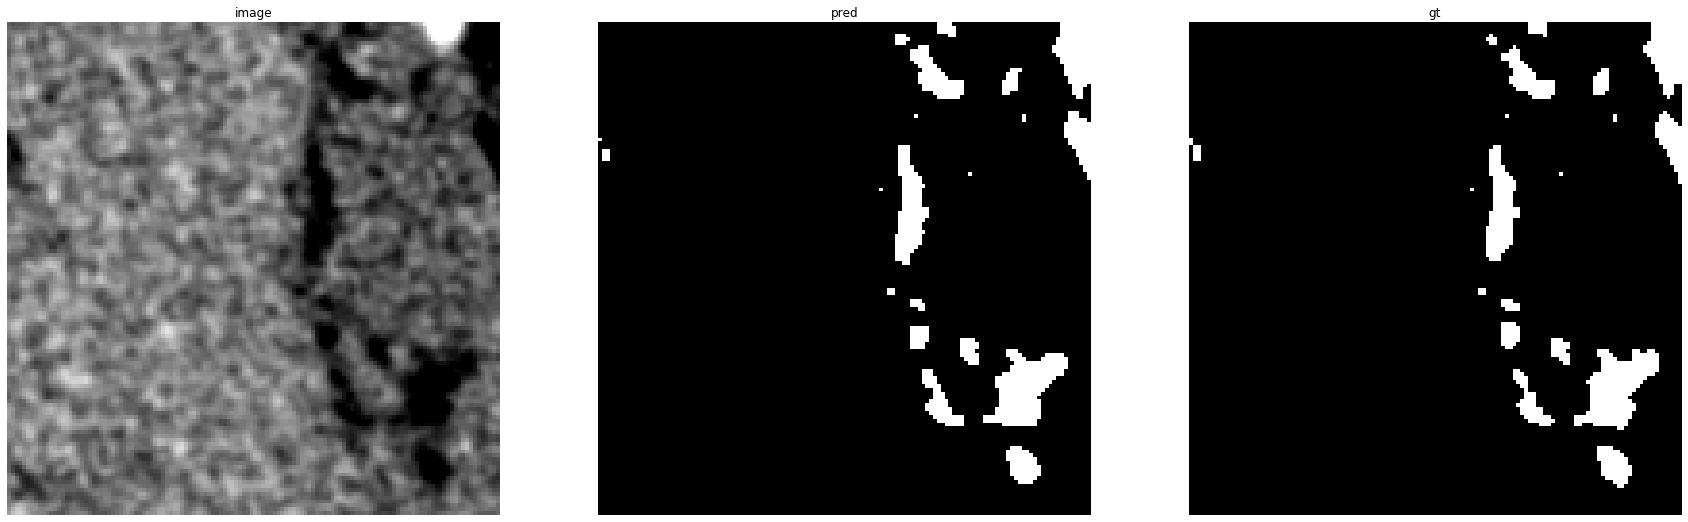

accuracy    : 0.99468994140625
precision   : 0.948170731707317
recall      : 0.9628482972136223
f1          : 0.955453149001536
pr_auc      : 0.995757384280977
iou         : 0.9147058823529411


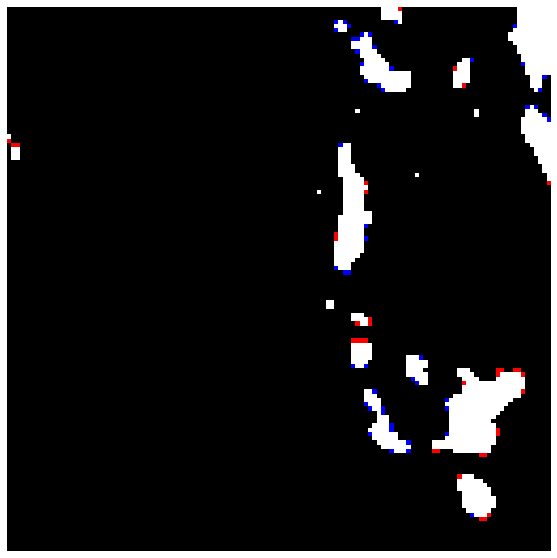

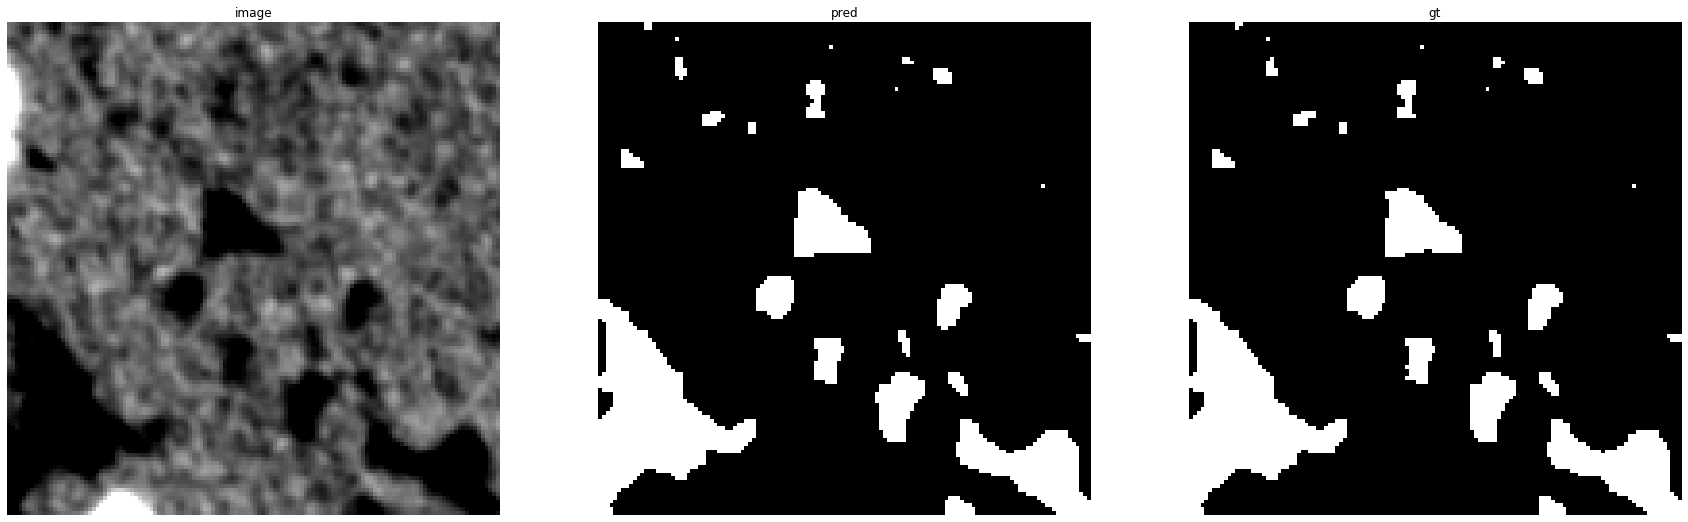

accuracy    : 0.9971923828125
precision   : 0.9890782000873743
recall      : 0.9908096280087527
f1          : 0.989943156974202
pr_auc      : 0.9995758468837642
iou         : 0.9800865800865801


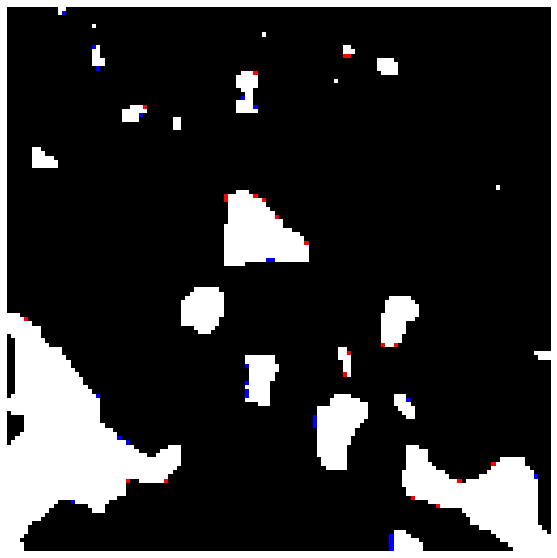

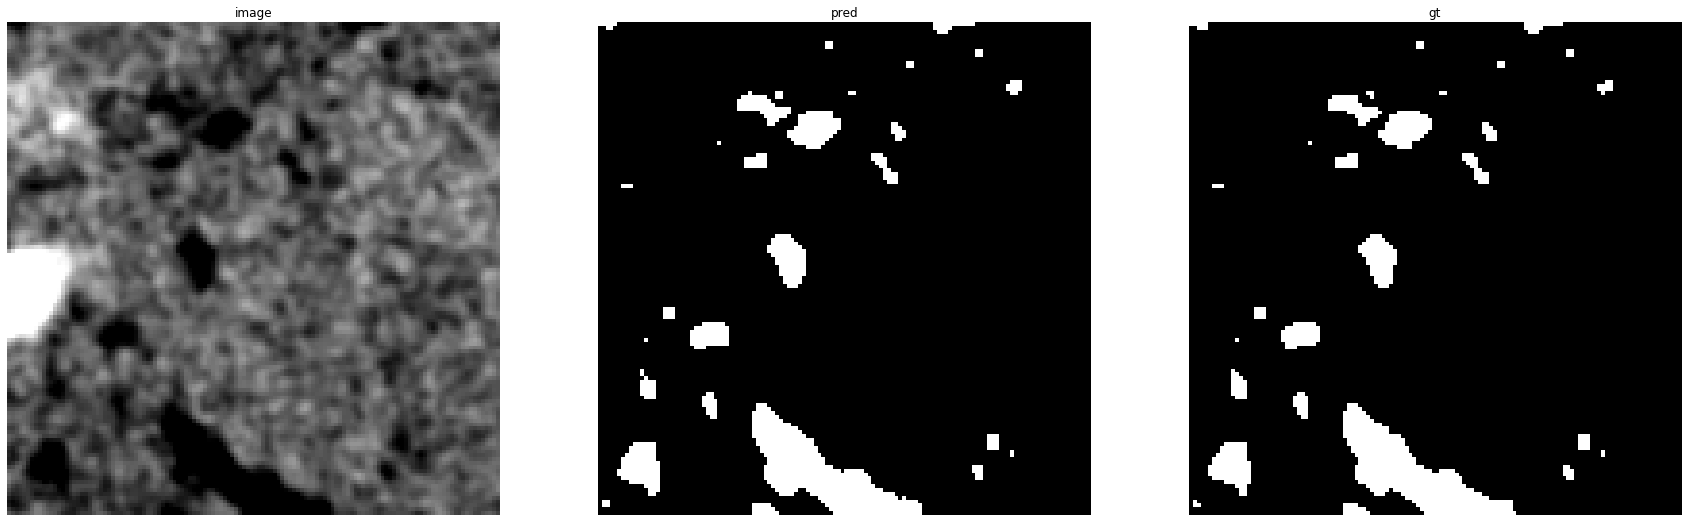

accuracy    : 0.9971923828125
precision   : 0.9737072743207712
recall      : 0.9858030168589175
f1          : 0.9797178130511464
pr_auc      : 0.9985454347868818
iou         : 0.9602420051858254


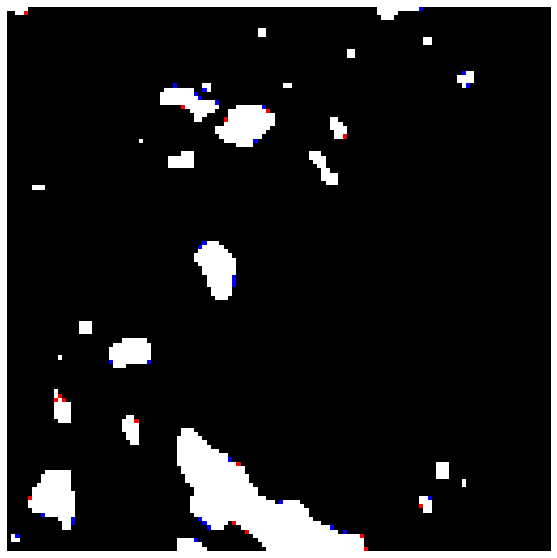

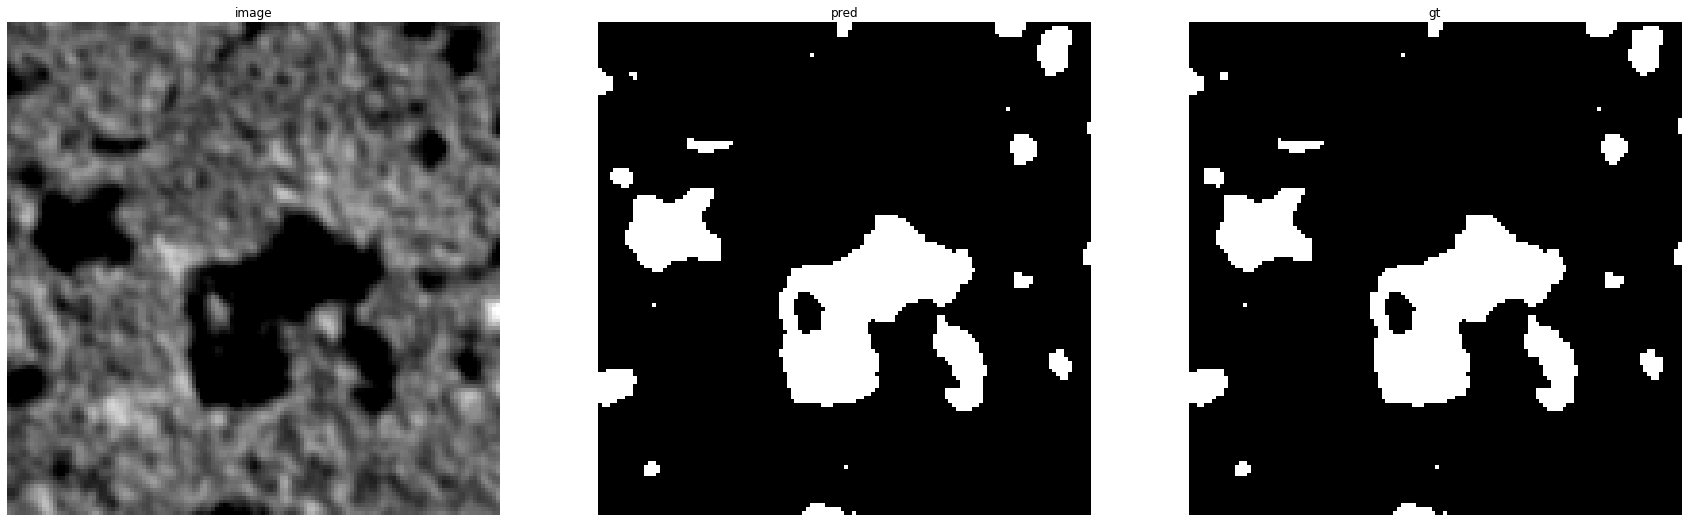

accuracy    : 0.9970703125
precision   : 0.9856459330143541
recall      : 0.9934239368697939
f1          : 0.9895196506550219
pr_auc      : 0.9995952264068507
iou         : 0.9792566983578219


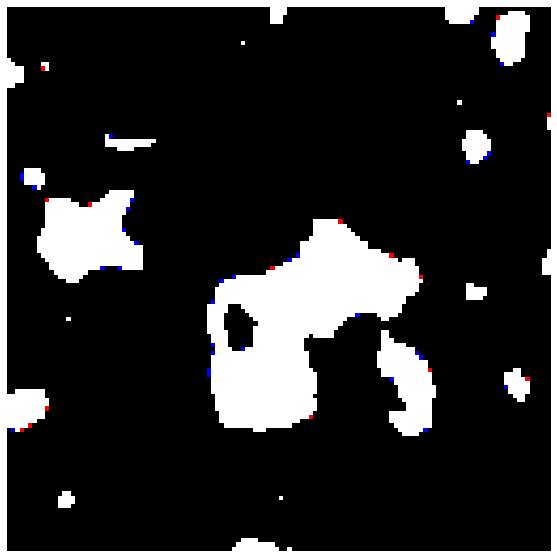

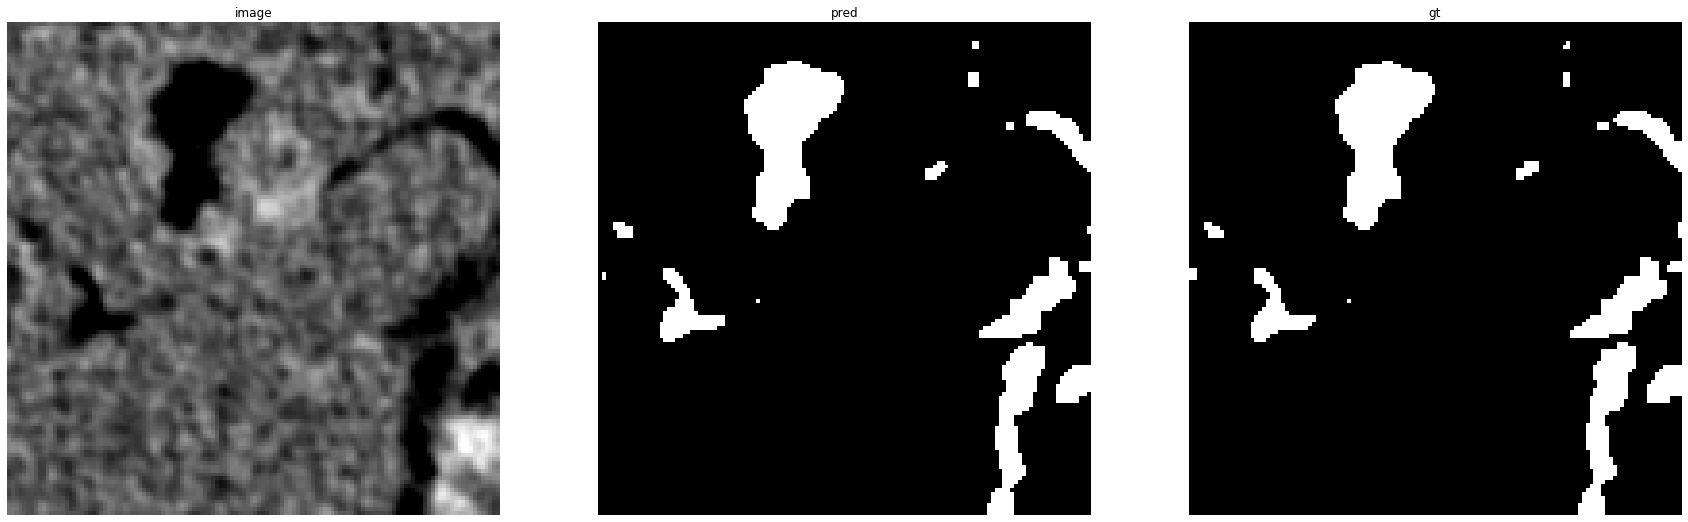

accuracy    : 0.9967041015625
precision   : 0.981829980532122
recall      : 0.9831059129304743
f1          : 0.9824675324675324
pr_auc      : 0.9990071194351503
iou         : 0.9655392469687301


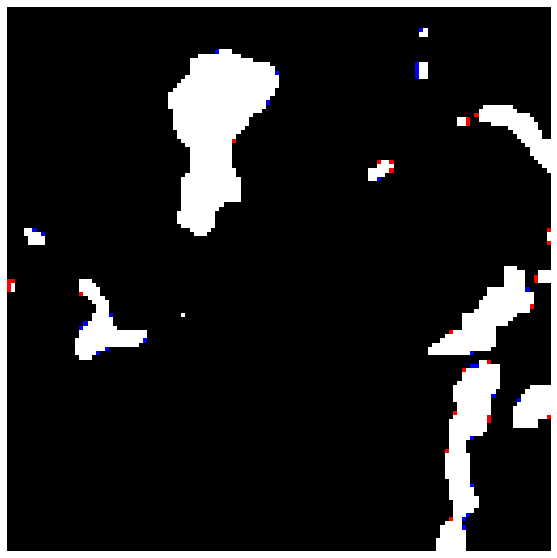

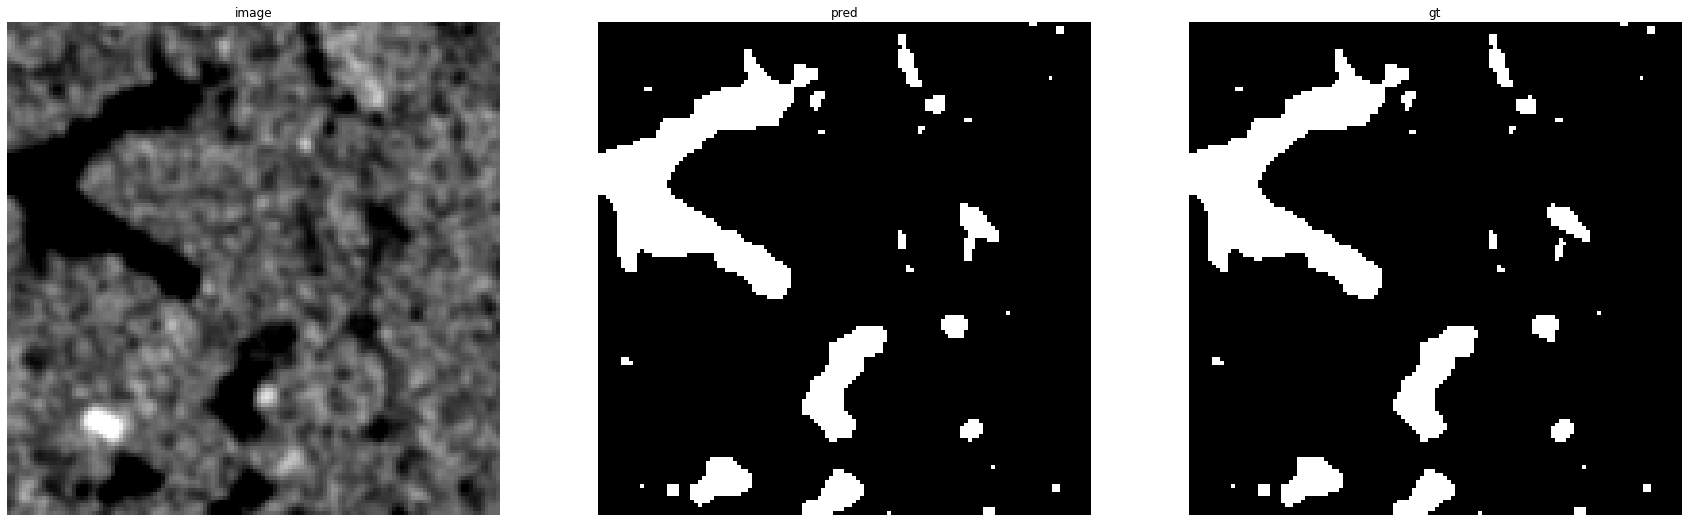

accuracy    : 0.9962158203125
precision   : 0.9803545759463345
recall      : 0.9898403483309144
f1          : 0.9850746268656717
pr_auc      : 0.9993055779548368
iou         : 0.9705882352941176


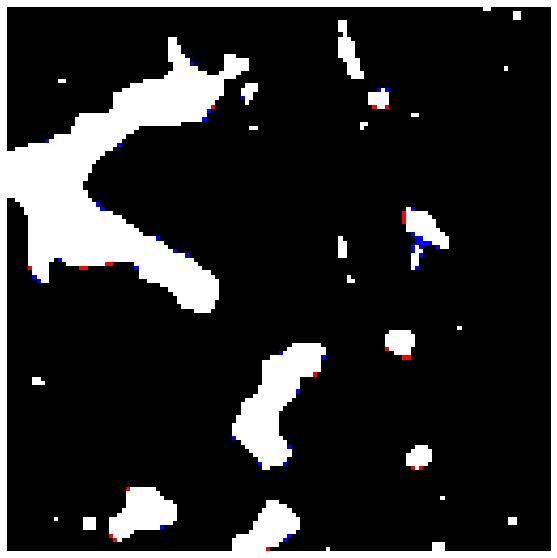

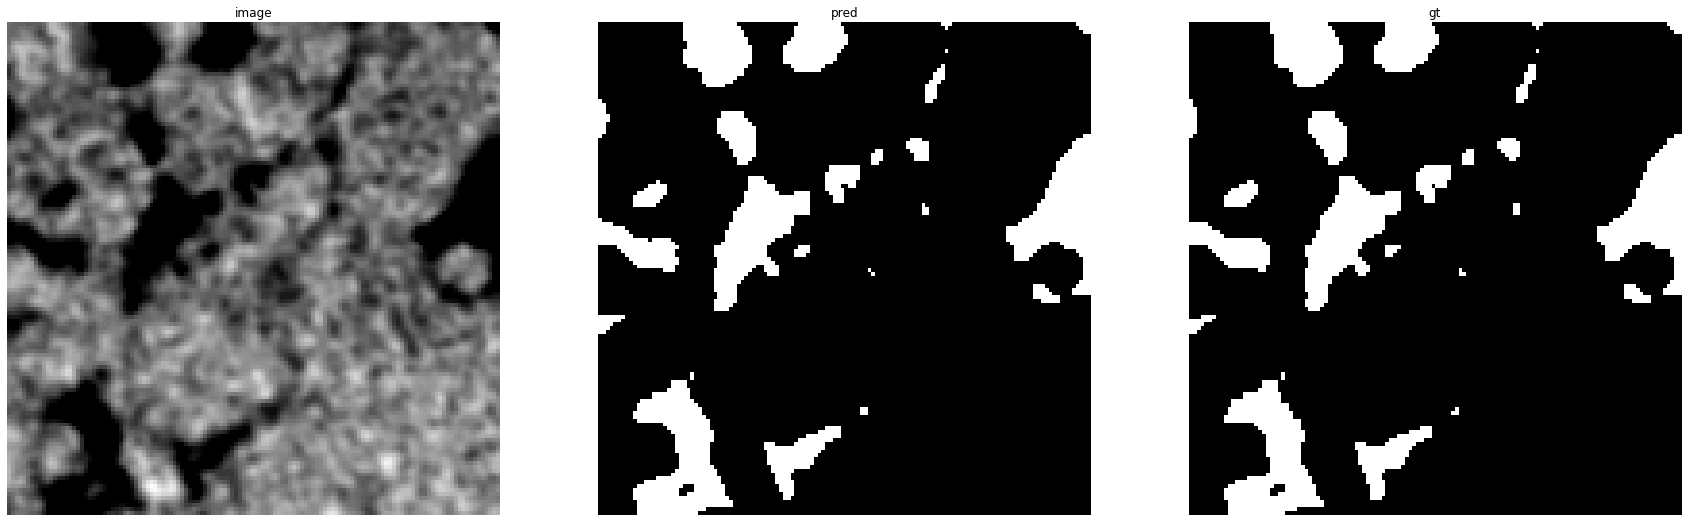

accuracy    : 0.995849609375
precision   : 0.983729662077597
recall      : 0.9878508588186008
f1          : 0.9857859531772576
pr_auc      : 0.9994369662543847
iou         : 0.9719703215169002


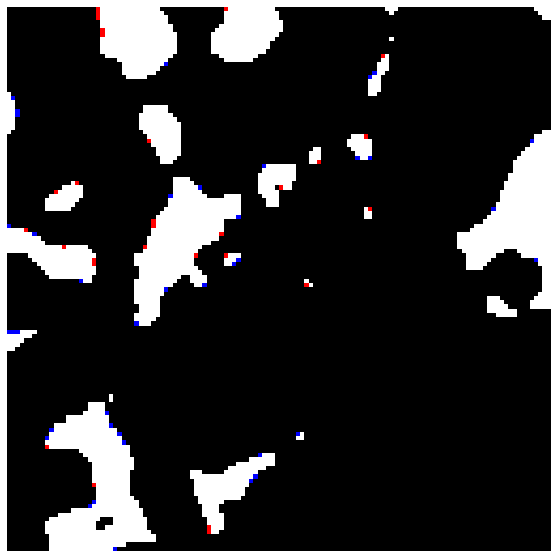

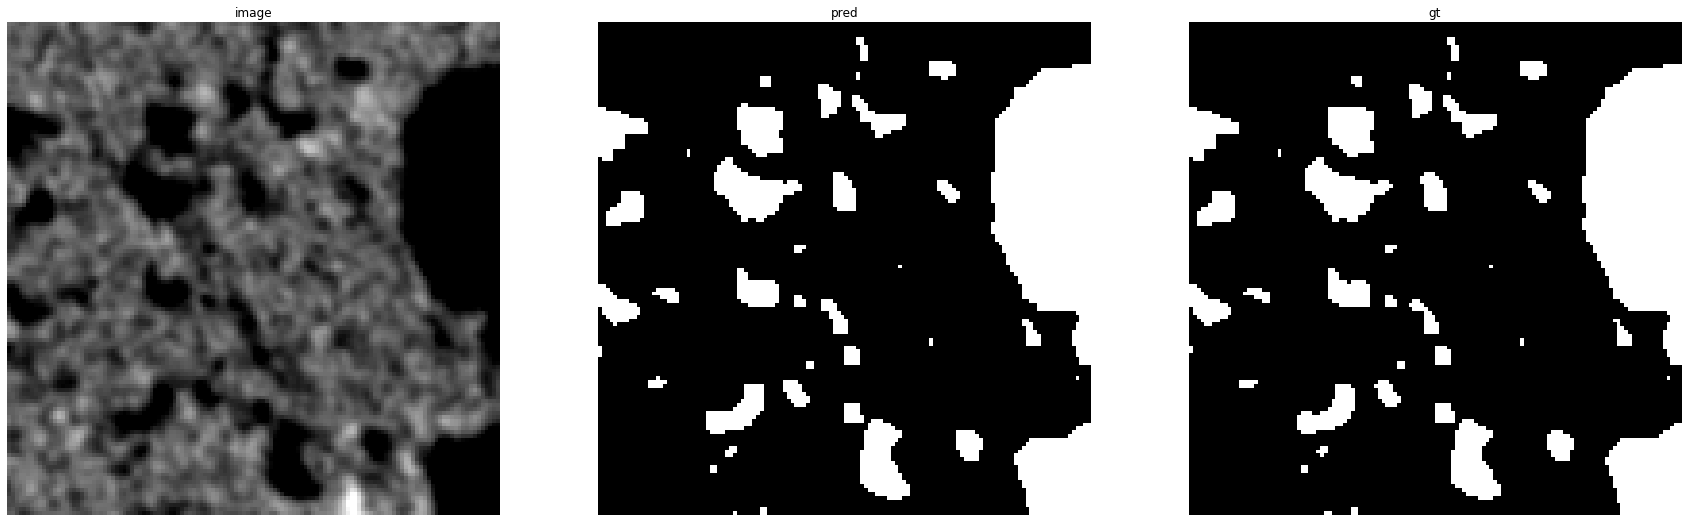

accuracy    : 0.995849609375
precision   : 0.9862047823421214
recall      : 0.9929012345679012
f1          : 0.9895416794832359
pr_auc      : 0.9996256090467239
iou         : 0.9792998477929985


Prediction for Urna_30:


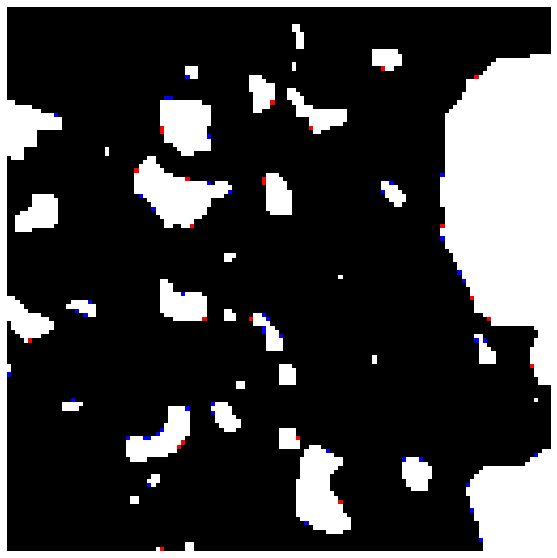

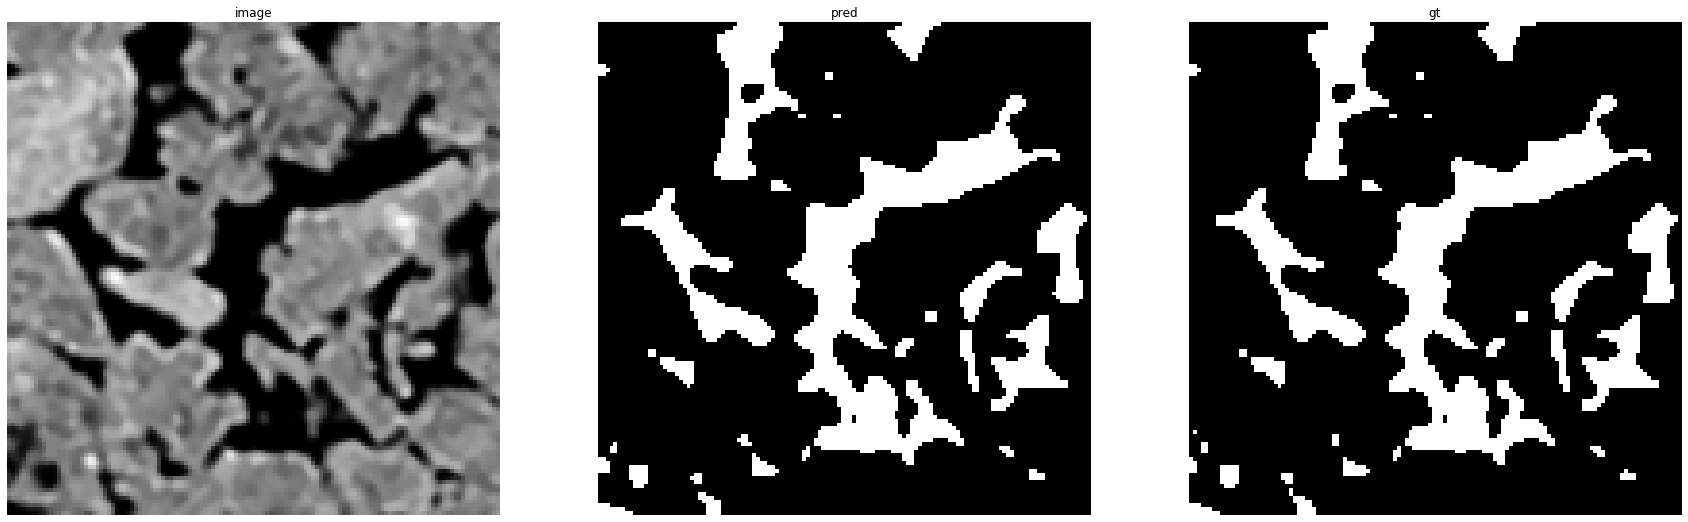

accuracy    : 0.994384765625
precision   : 0.9808440586650703
recall      : 0.9915279878971256
f1          : 0.9861570869696058
pr_auc      : 0.9994046354981485
iou         : 0.9726921935292372


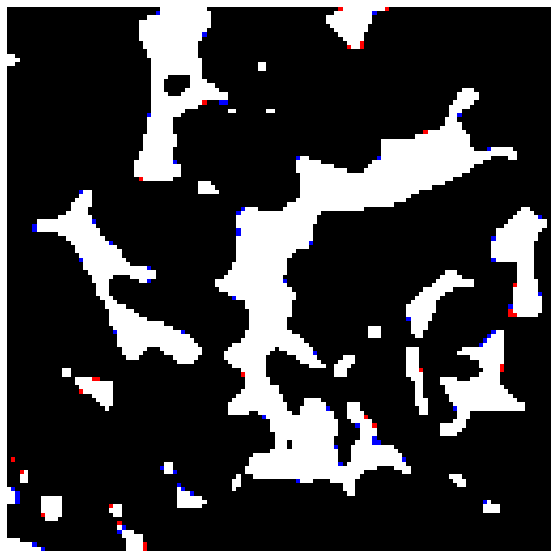

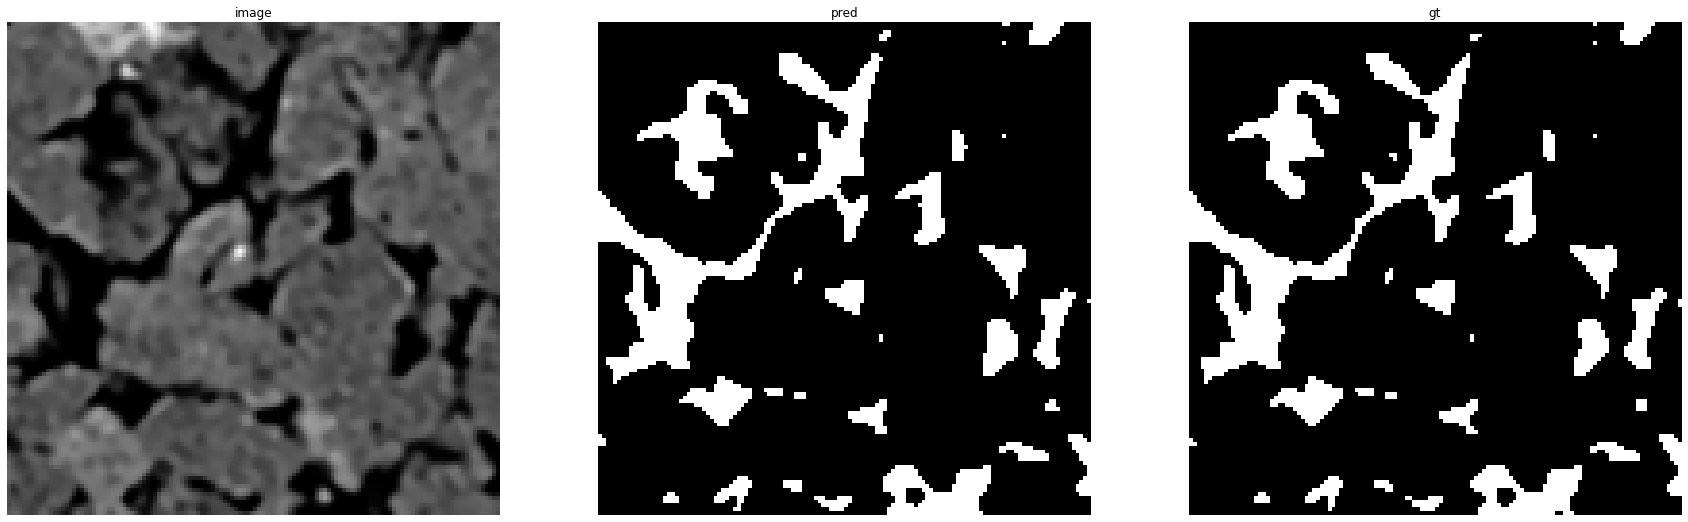

accuracy    : 0.99310302734375
precision   : 0.9701381112355356
recall      : 0.9874620060790273
f1          : 0.9787234042553191
pr_auc      : 0.9982701923267536
iou         : 0.9583333333333334


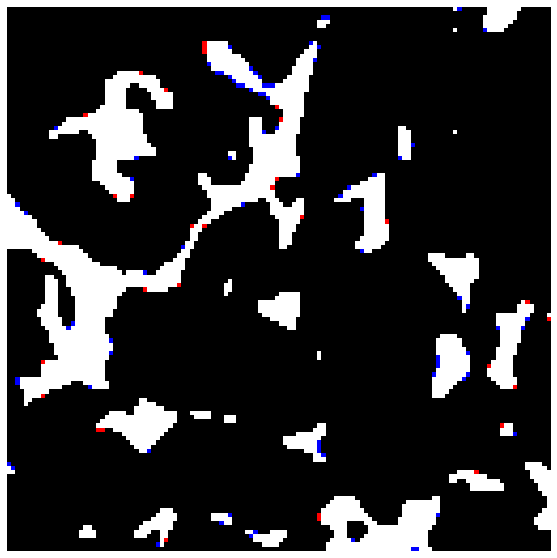

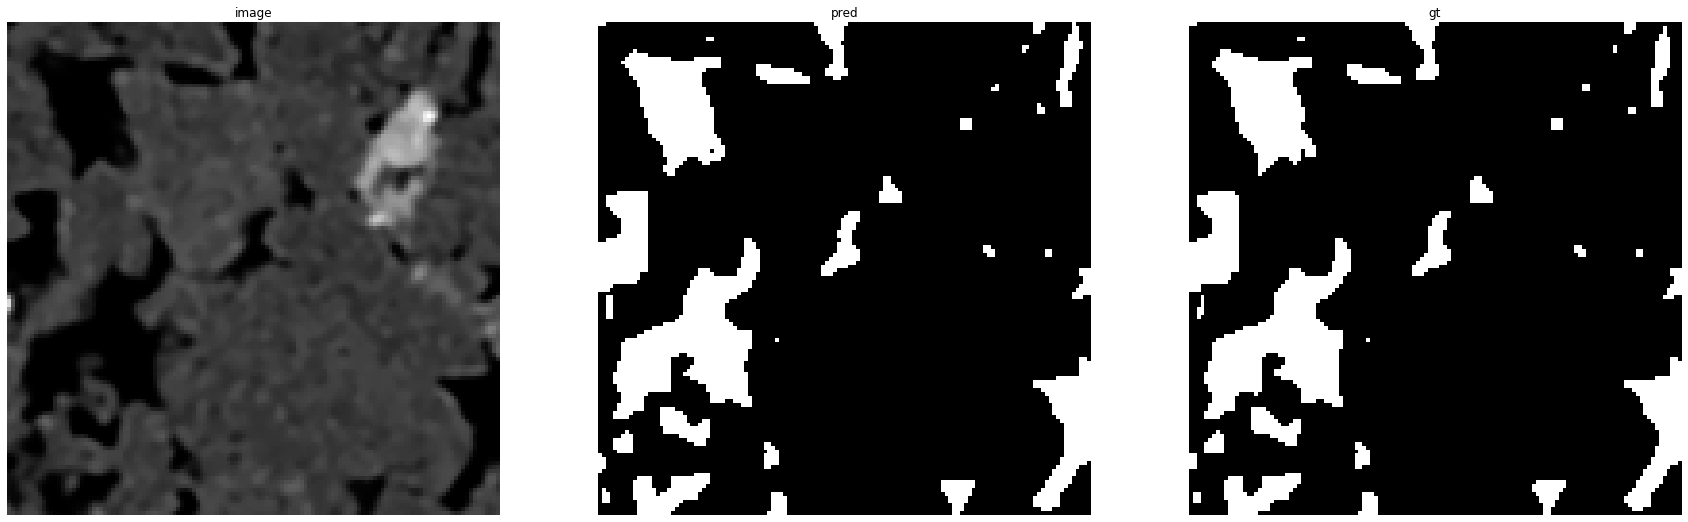

accuracy    : 0.99420166015625
precision   : 0.9745468569224837
recall      : 0.9886541471048513
f1          : 0.9815498154981549
pr_auc      : 0.999012380070435
iou         : 0.9637681159420289


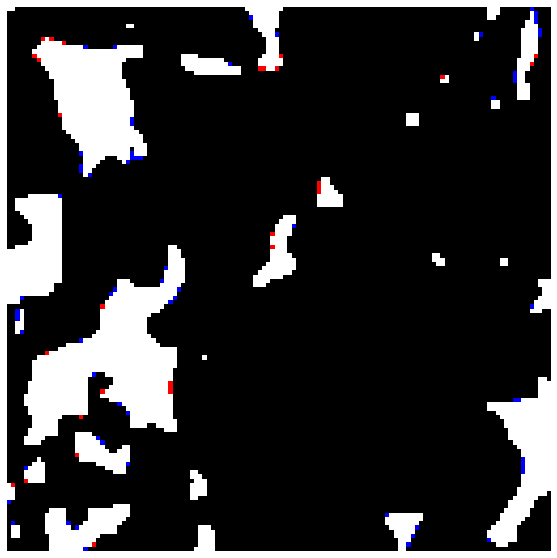

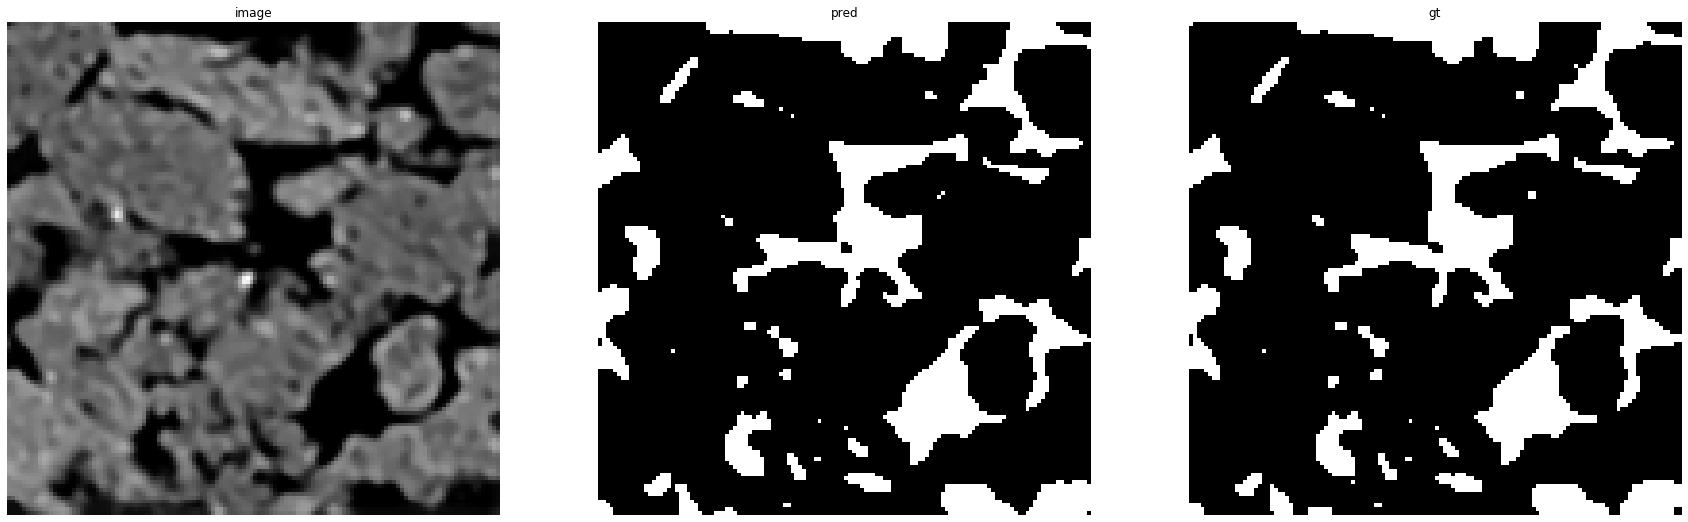

accuracy    : 0.99163818359375
precision   : 0.9774412855377008
recall      : 0.9801673380849086
f1          : 0.9788024137397493
pr_auc      : 0.9985872703216484
iou         : 0.9584848484848485


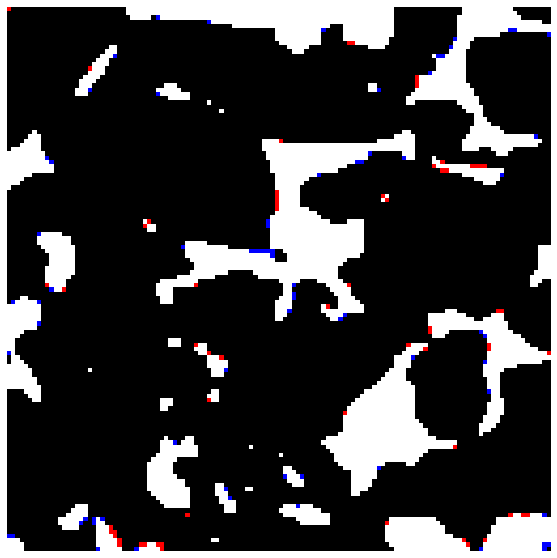

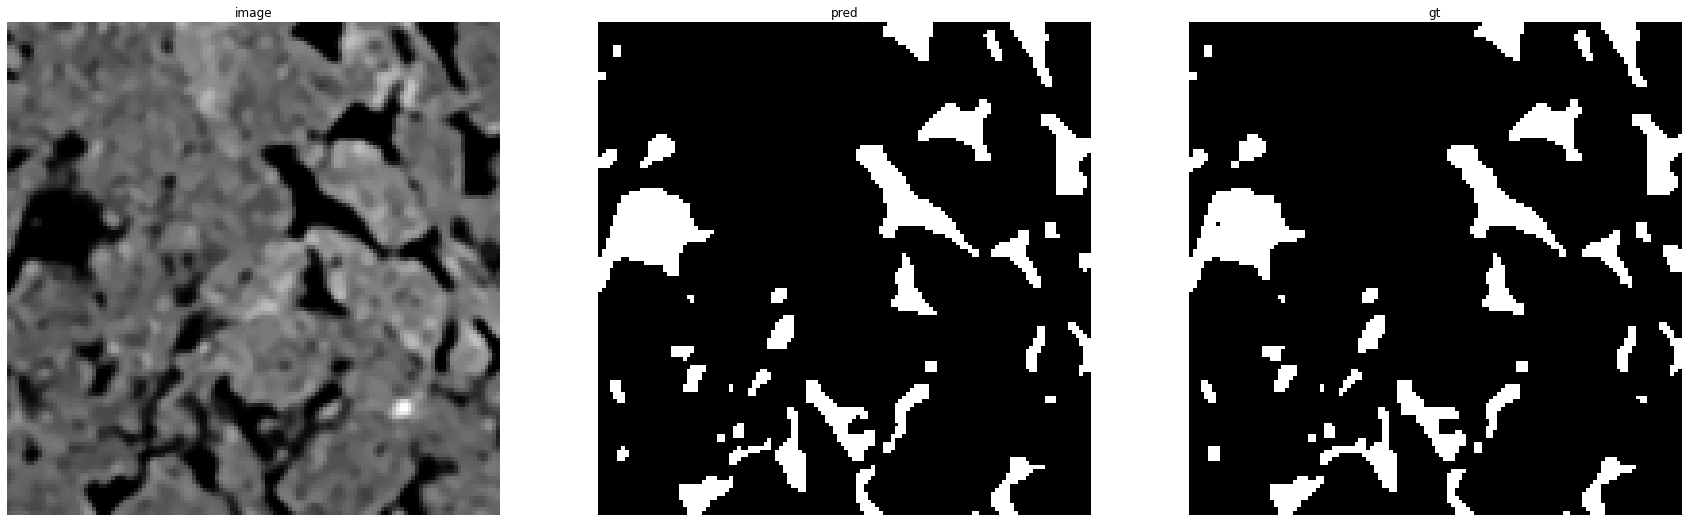

accuracy    : 0.99176025390625
precision   : 0.9700951517897598
recall      : 0.9687782805429864
f1          : 0.9694362689608331
pr_auc      : 0.9975883954144499
iou         : 0.9406854130052724


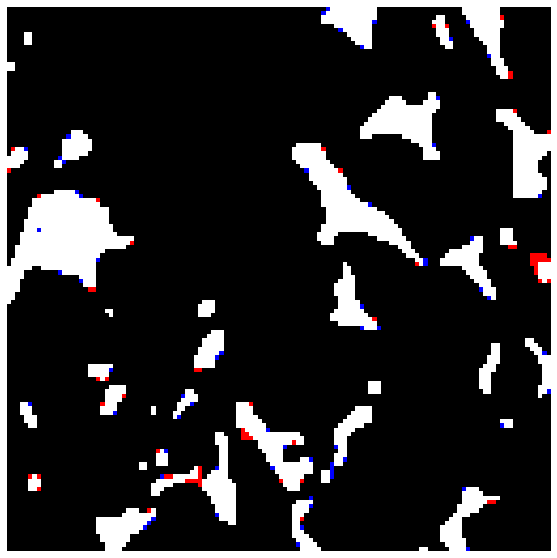

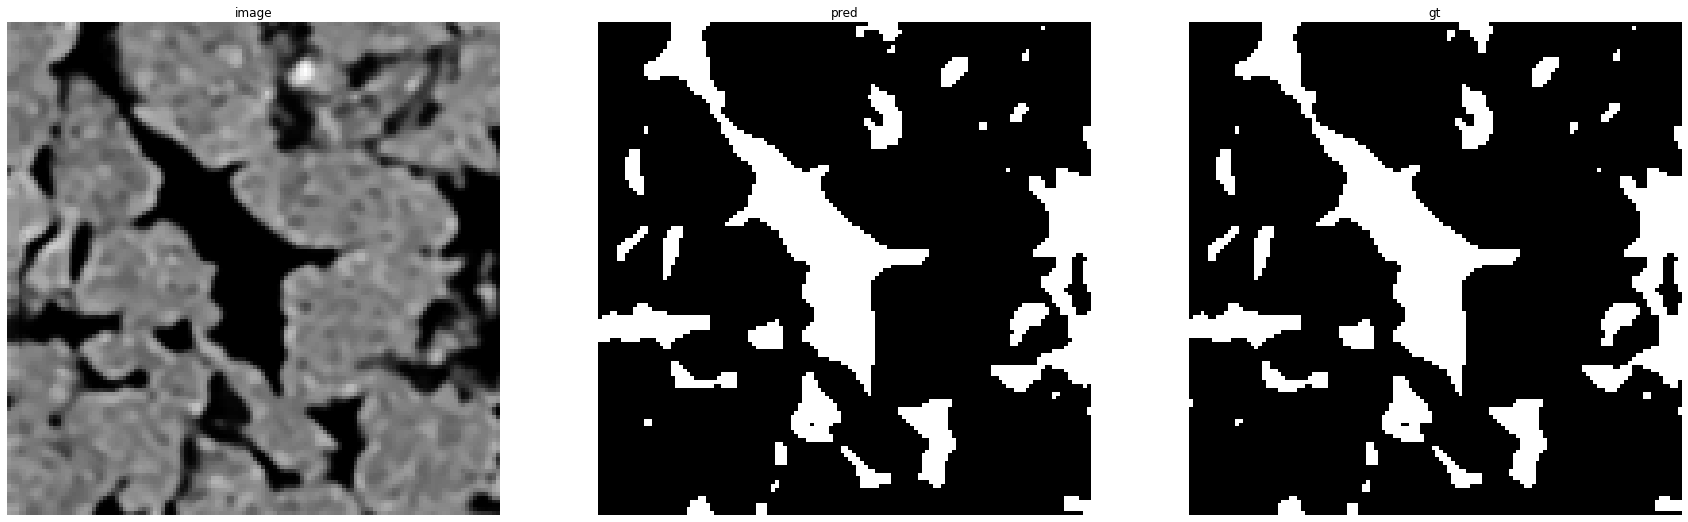

accuracy    : 0.99371337890625
precision   : 0.9794108330693696
recall      : 0.9878594249201278
f1          : 0.9836169874343884
pr_auc      : 0.9992211890292819
iou         : 0.9677621283255086


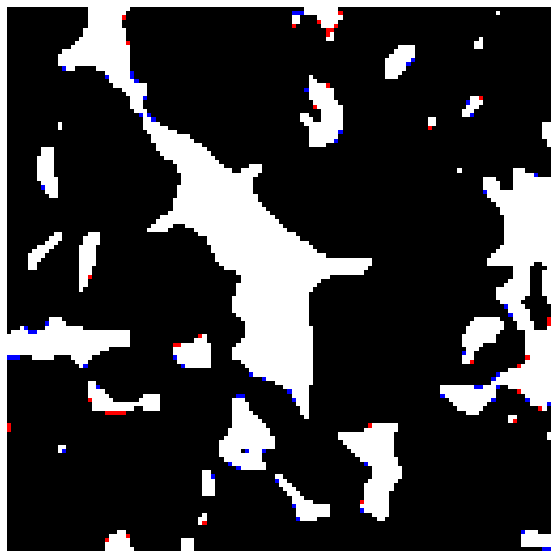

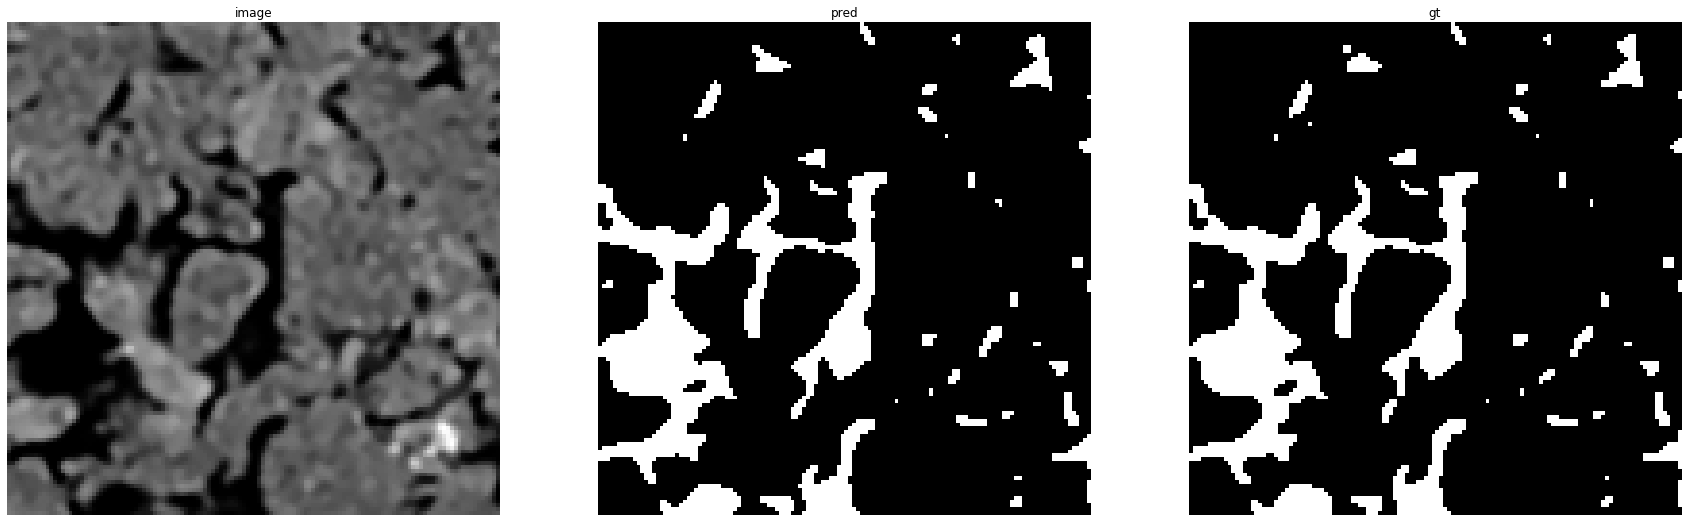

accuracy    : 0.99237060546875
precision   : 0.9663442940038685
recall      : 0.9850157728706624
f1          : 0.9755907049404412
pr_auc      : 0.9978974742810452
iou         : 0.9523446435379337


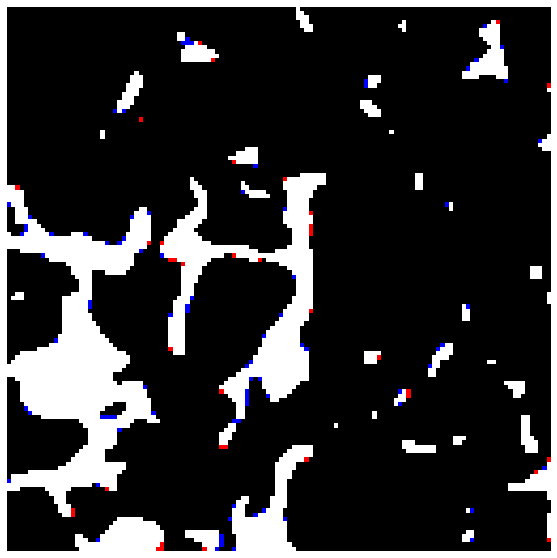

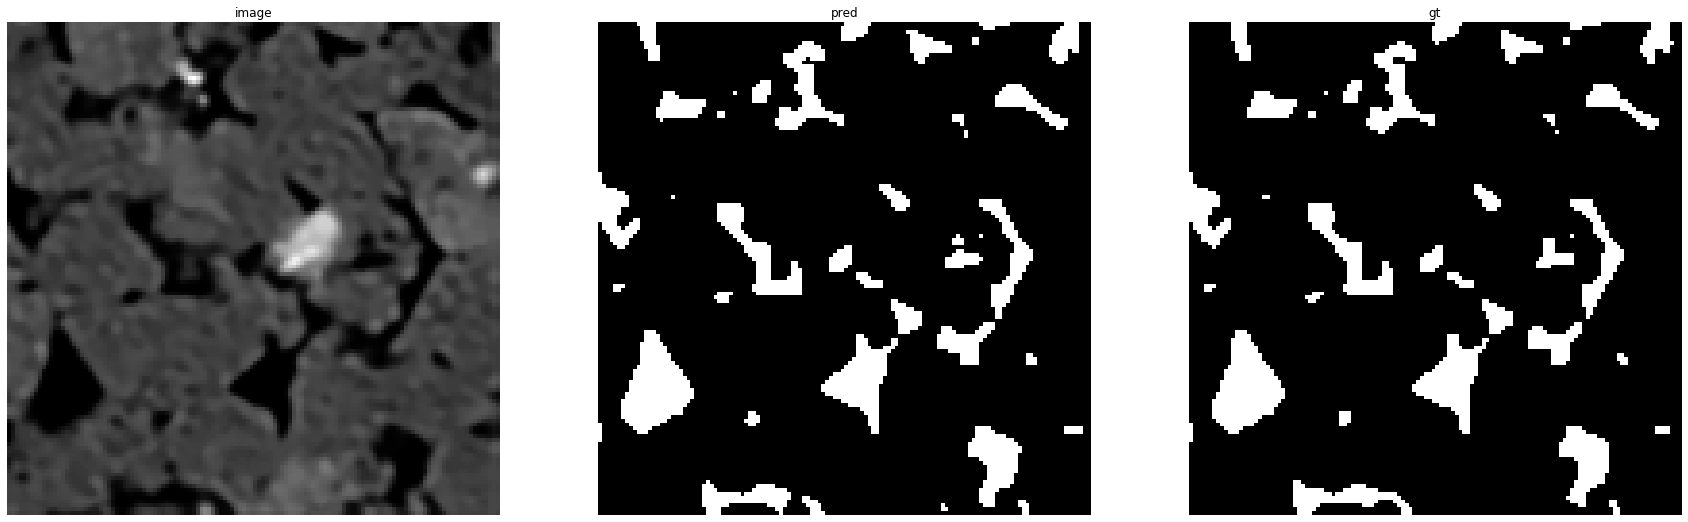

accuracy    : 0.99334716796875
precision   : 0.9668587896253602
recall      : 0.9805163175840234
f1          : 0.9736396614268439
pr_auc      : 0.9976502879244423
iou         : 0.9486333647502356


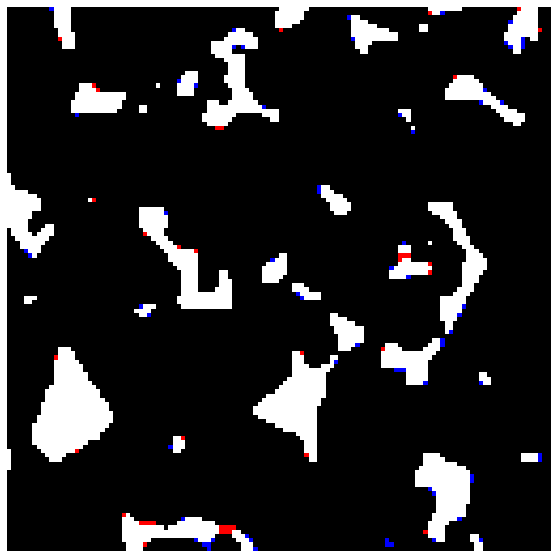

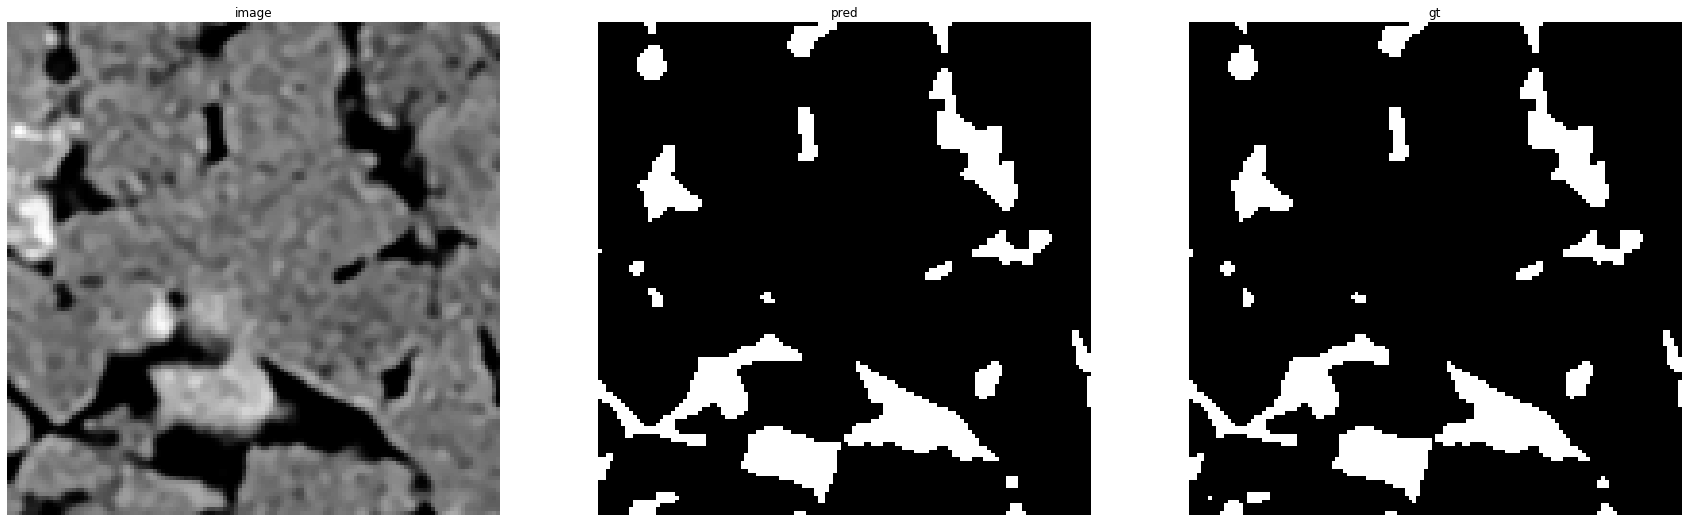

accuracy    : 0.99444580078125
precision   : 0.9713615023474178
recall      : 0.985707479752263
f1          : 0.9784819106171672
pr_auc      : 0.9986291006003172
iou         : 0.9578703703703704


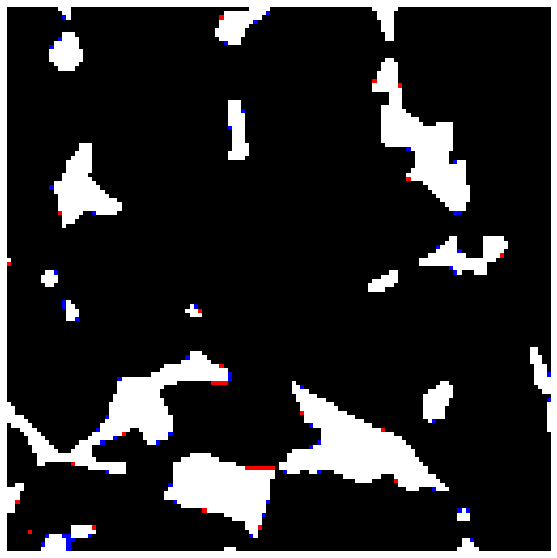

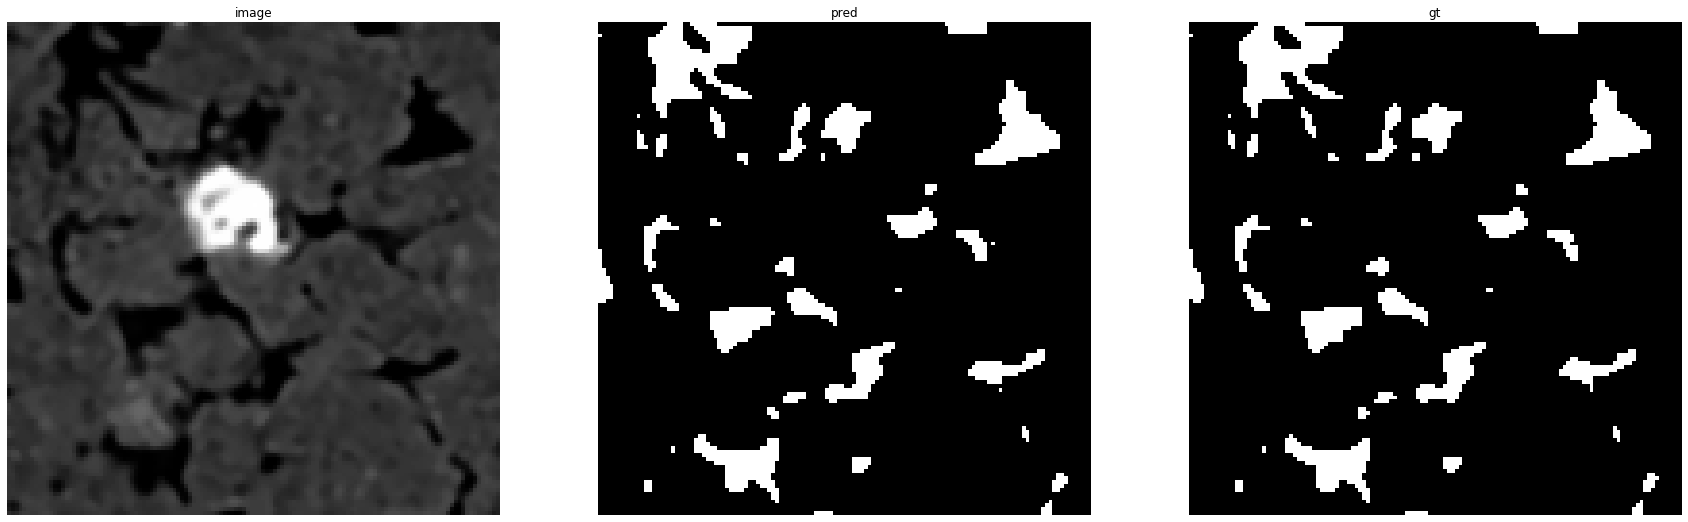

accuracy    : 0.9947509765625
precision   : 0.9716106604866744
recall      : 0.9784130688448075
f1          : 0.975
pr_auc      : 0.9980307293063482
iou         : 0.9512195121951219


Prediction for Urna_34:


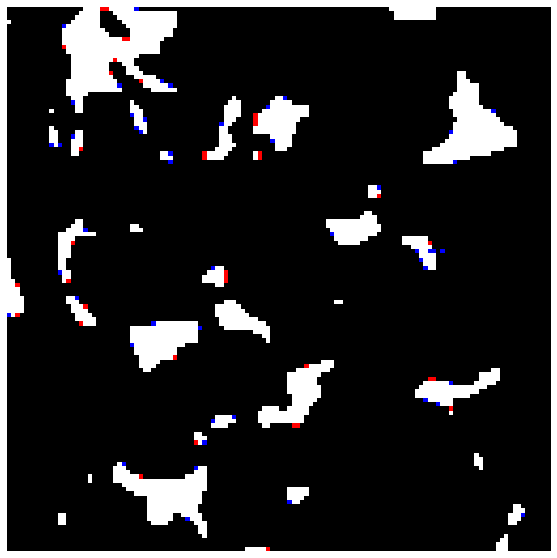

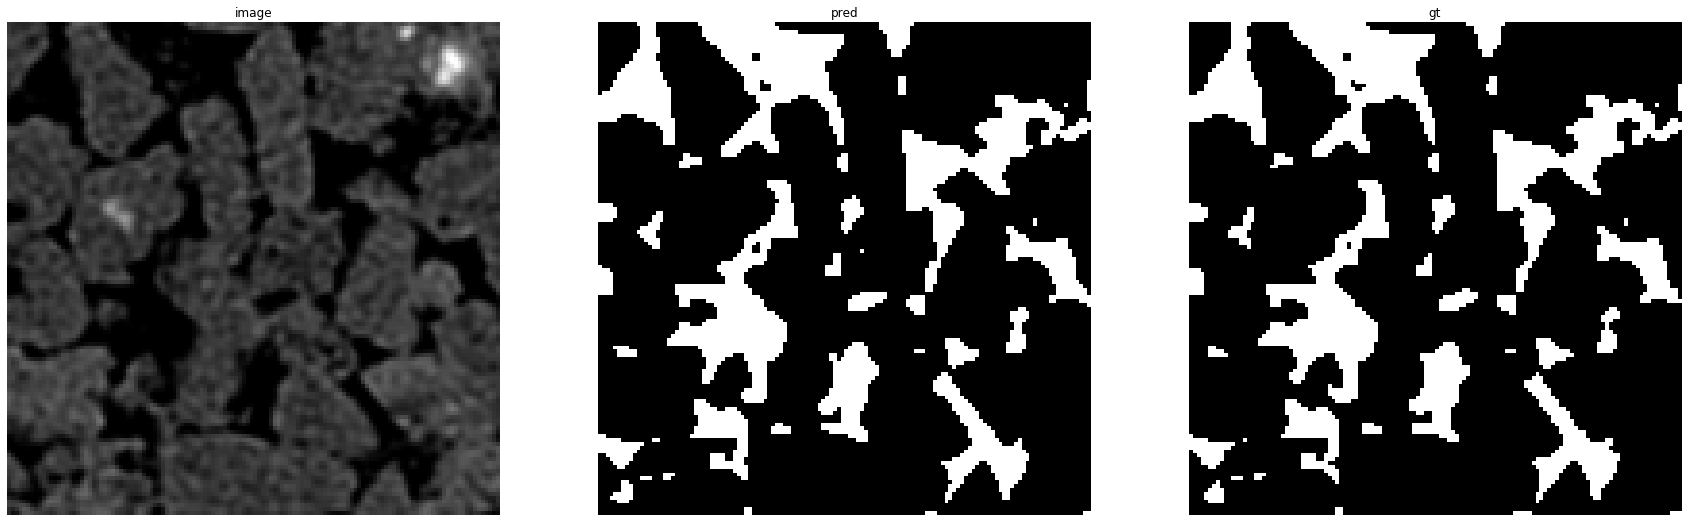

accuracy    : 0.989501953125
precision   : 0.9765091505053264
recall      : 0.9765091505053264
f1          : 0.9765091505053264
pr_auc      : 0.9982364774614237
iou         : 0.9540966106218308


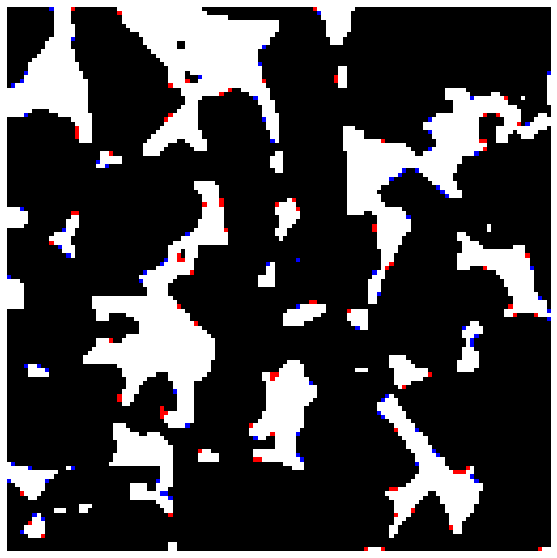

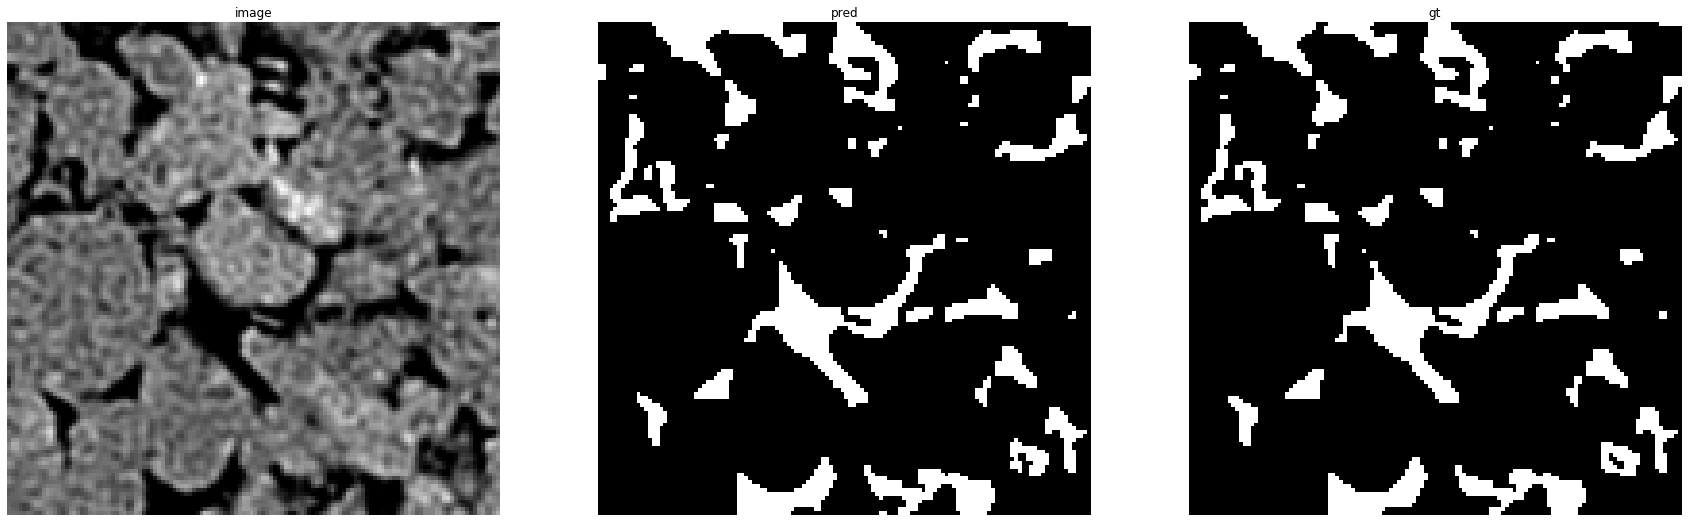

accuracy    : 0.9896240234375
precision   : 0.9591919191919192
recall      : 0.9717560376586164
f1          : 0.9654331028873526
pr_auc      : 0.996518237299072
iou         : 0.9331761006289309


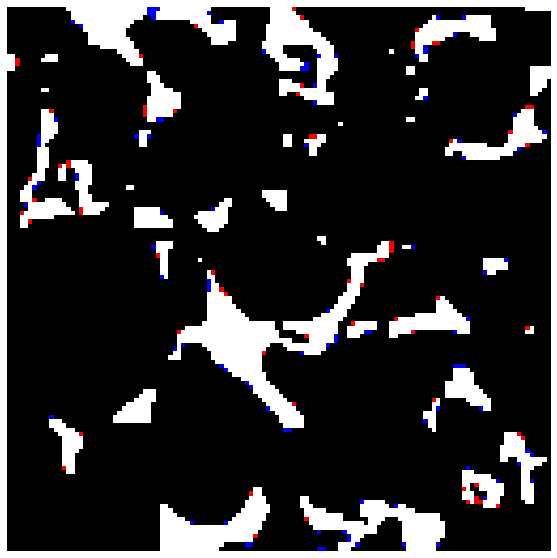

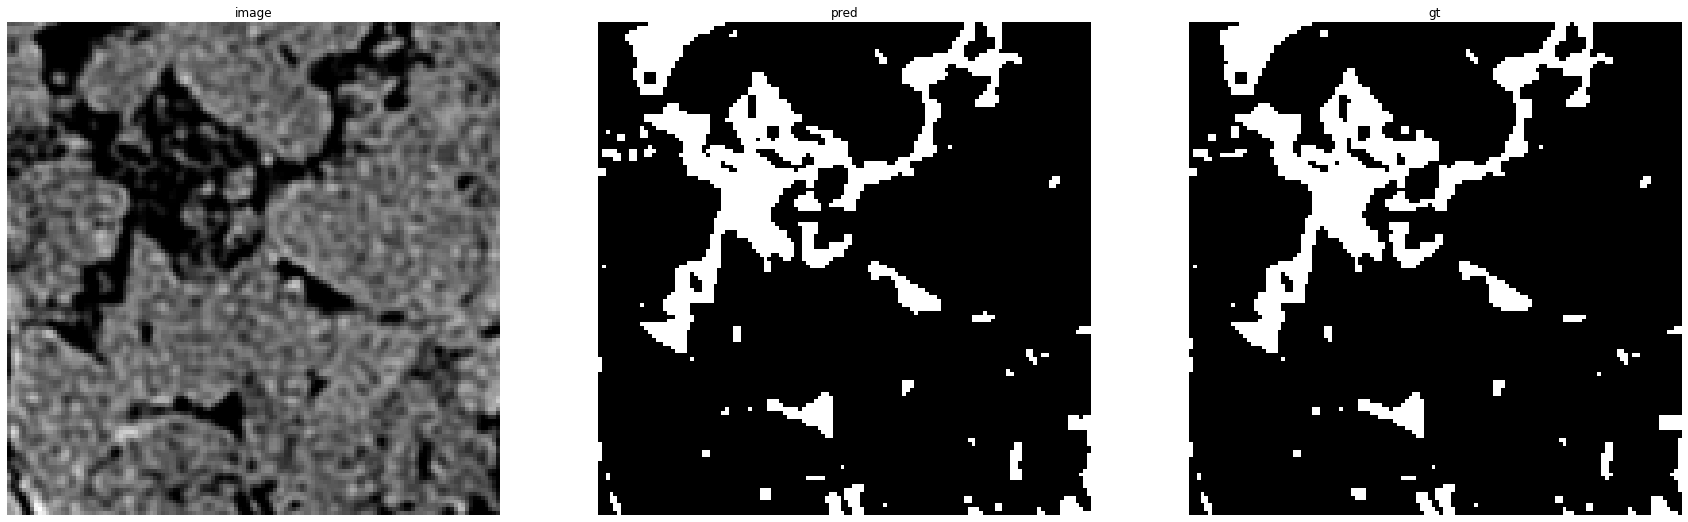

accuracy    : 0.9891357421875
precision   : 0.9590163934426229
recall      : 0.967741935483871
f1          : 0.9633594071634417
pr_auc      : 0.9958447962664689
iou         : 0.9293089753772835


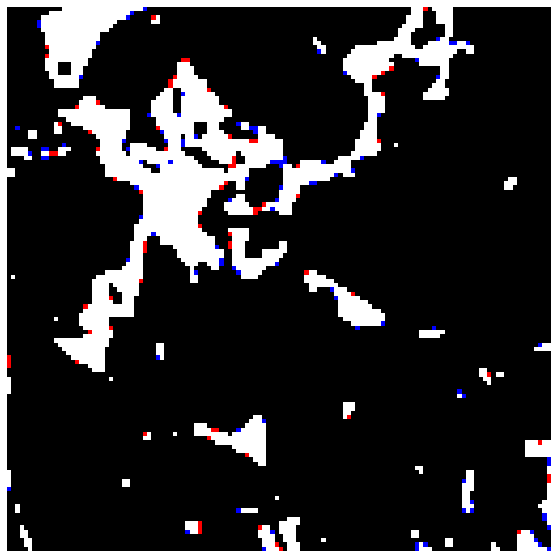

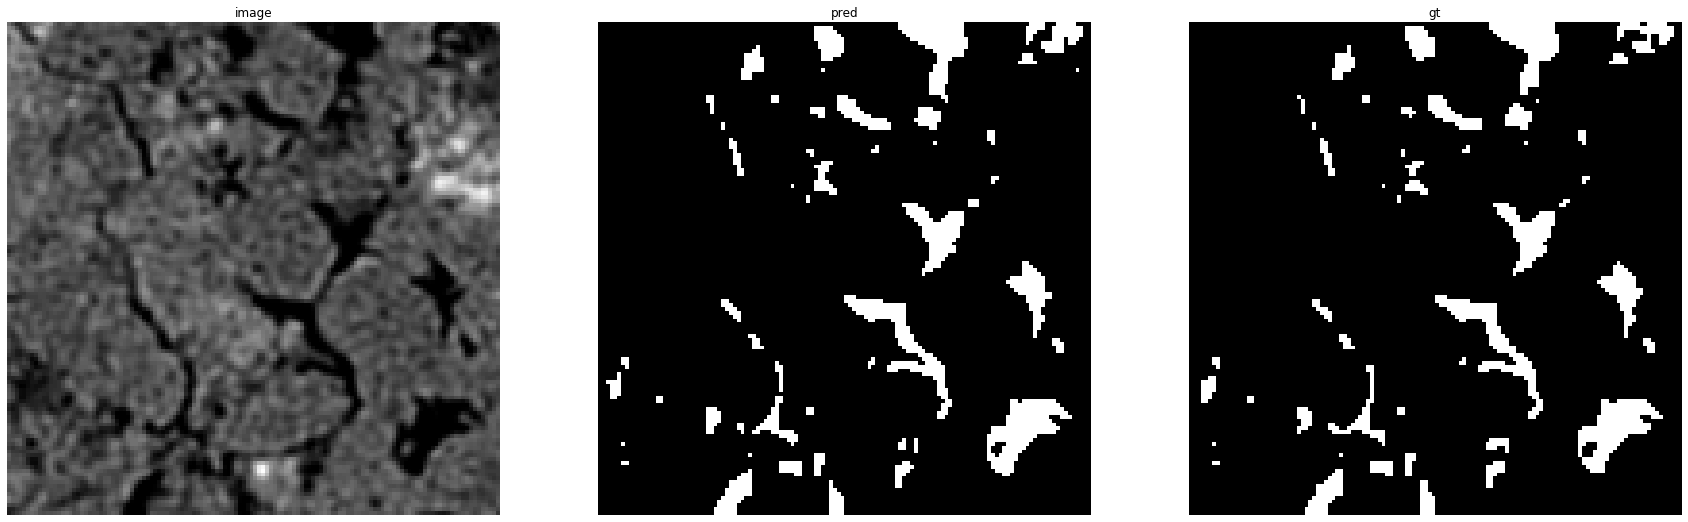

accuracy    : 0.9925537109375
precision   : 0.9520500347463516
recall      : 0.9627547434996486
f1          : 0.9573724668064291
pr_auc      : 0.9943519298096992
iou         : 0.9182305630026809


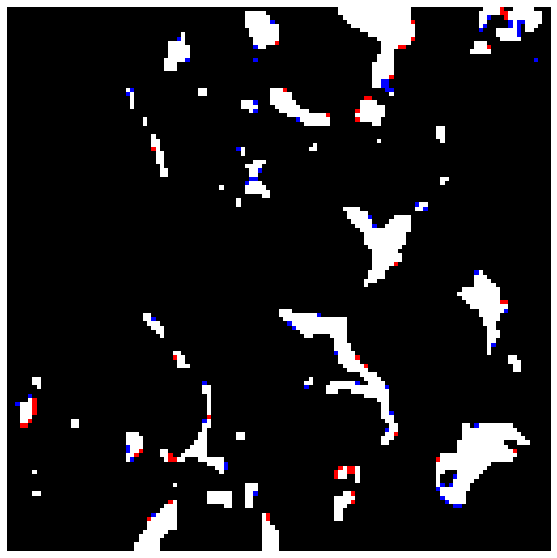

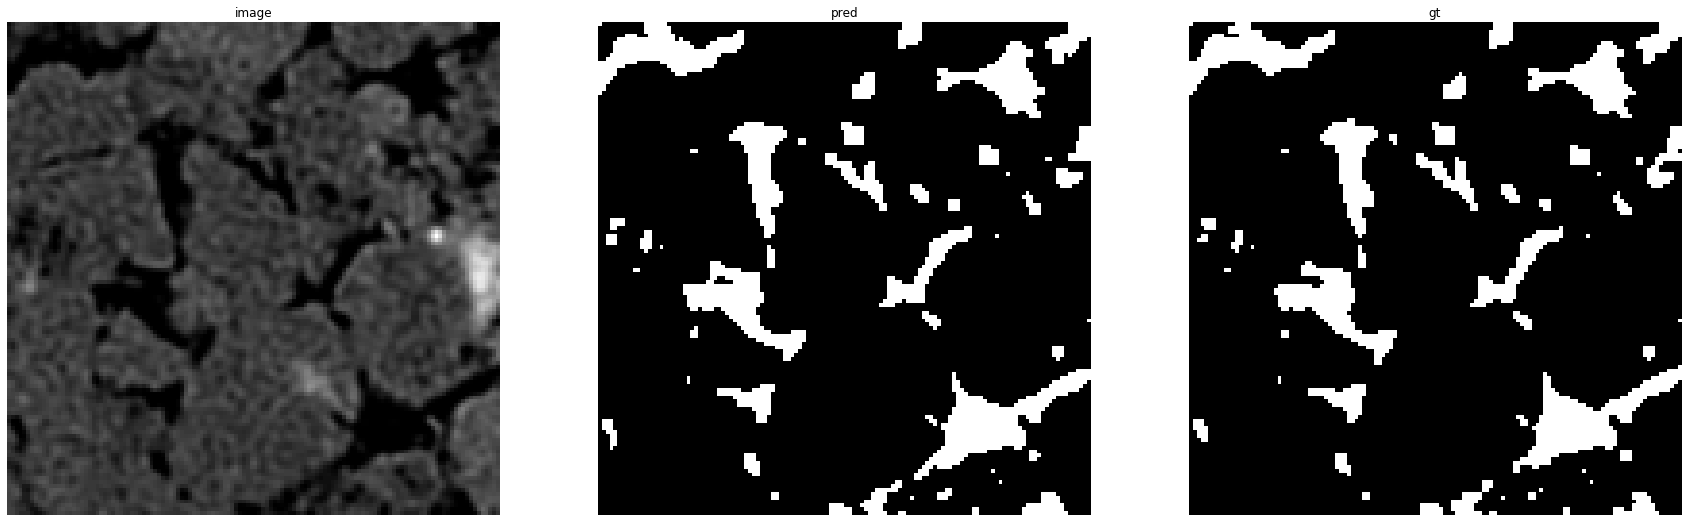

accuracy    : 0.98919677734375
precision   : 0.9540026536930561
recall      : 0.9672645739910314
f1          : 0.9605878423513694
pr_auc      : 0.9959276069435433
iou         : 0.9241645244215938


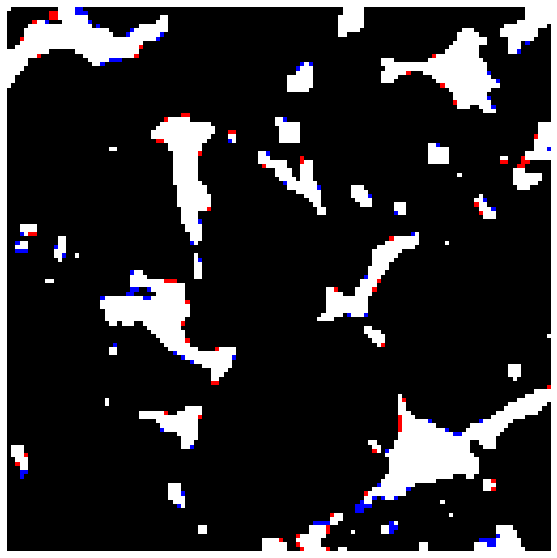

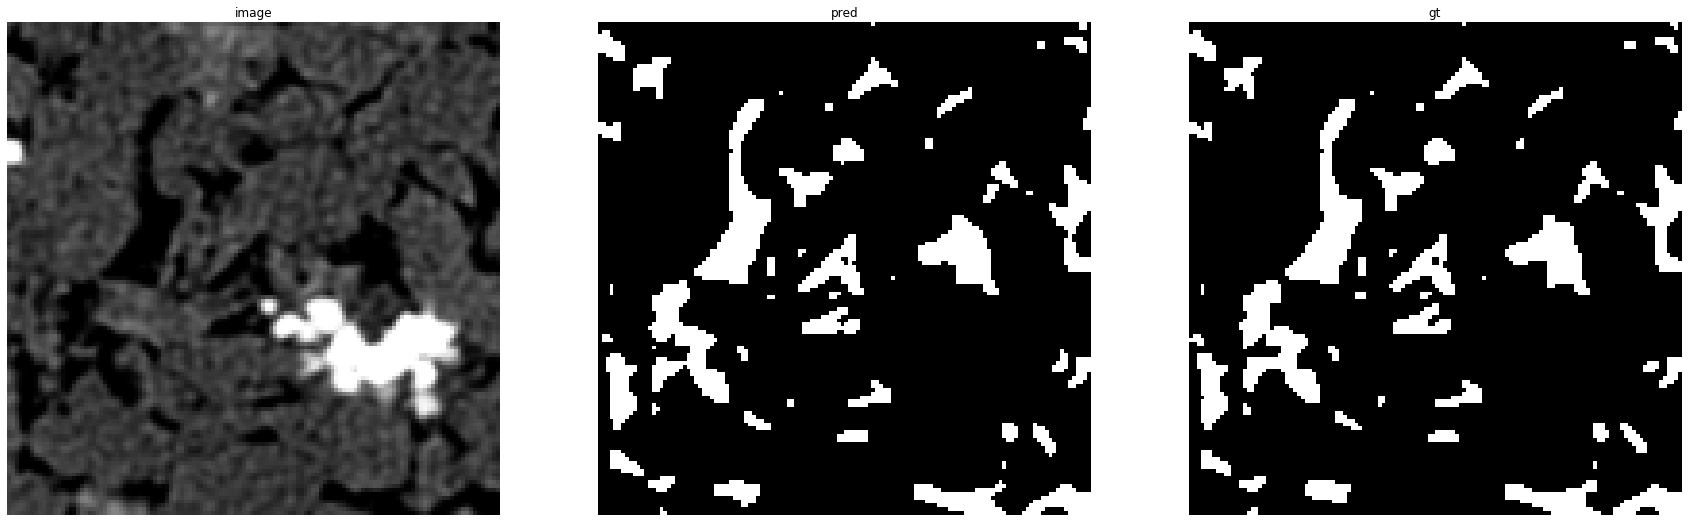

accuracy    : 0.98870849609375
precision   : 0.963096309630963
recall      : 0.954079358002675
f1          : 0.9585666293393057
pr_auc      : 0.9955589581088544
iou         : 0.9204301075268817


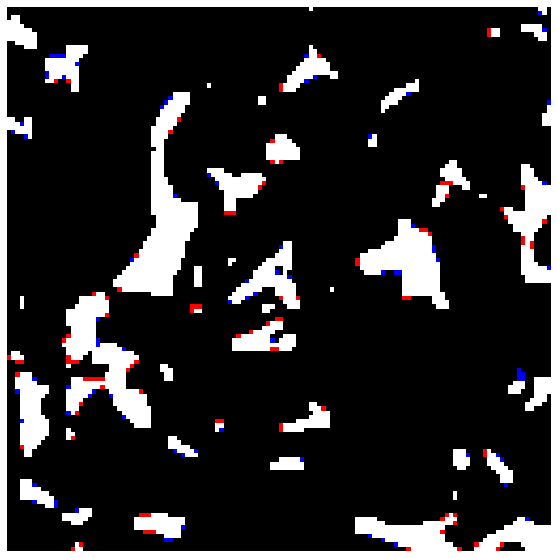

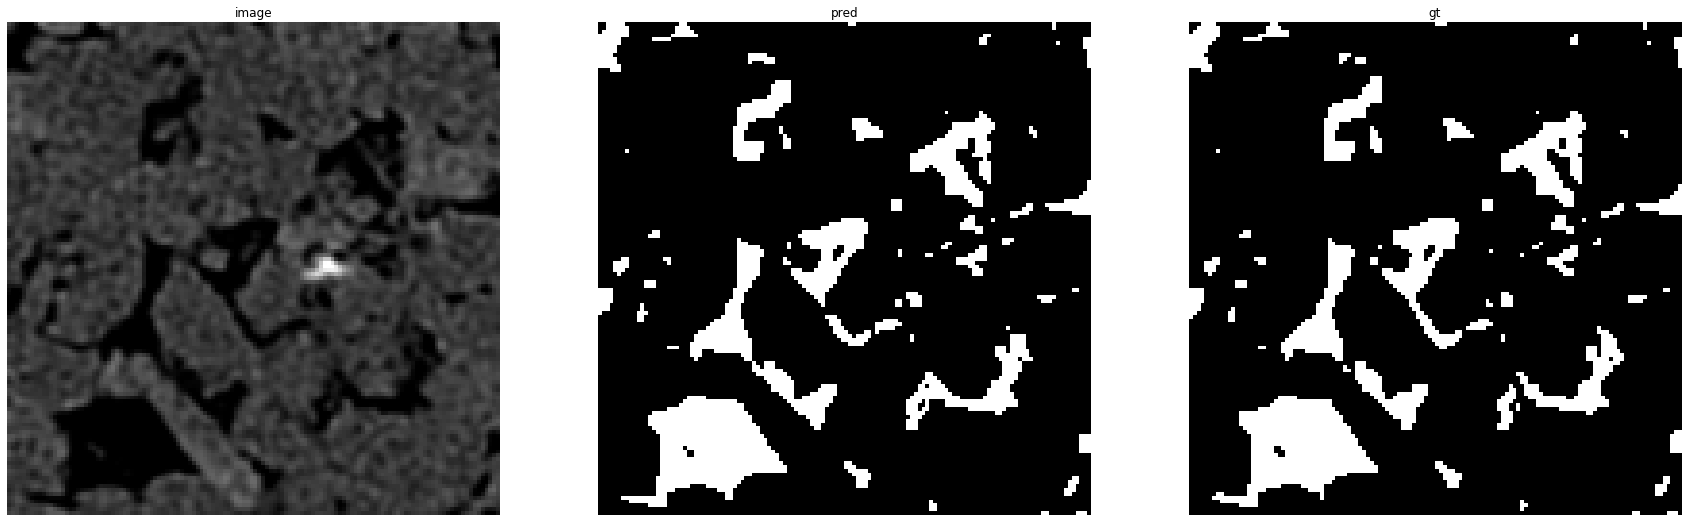

accuracy    : 0.98944091796875
precision   : 0.9609777015437393
recall      : 0.9647008179078778
f1          : 0.9628356605800215
pr_auc      : 0.9964416208943315
iou         : 0.9283347141673571


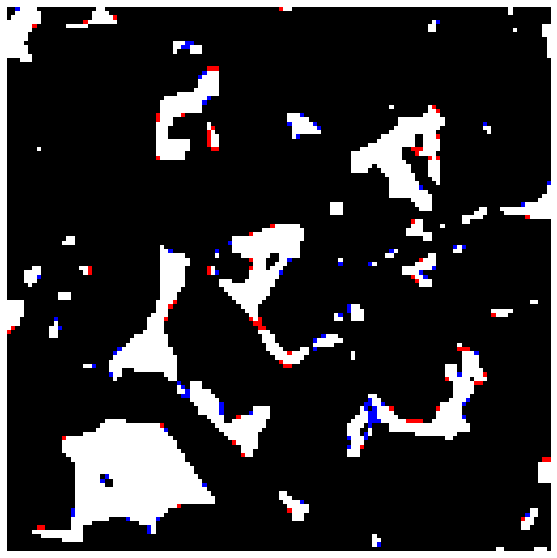

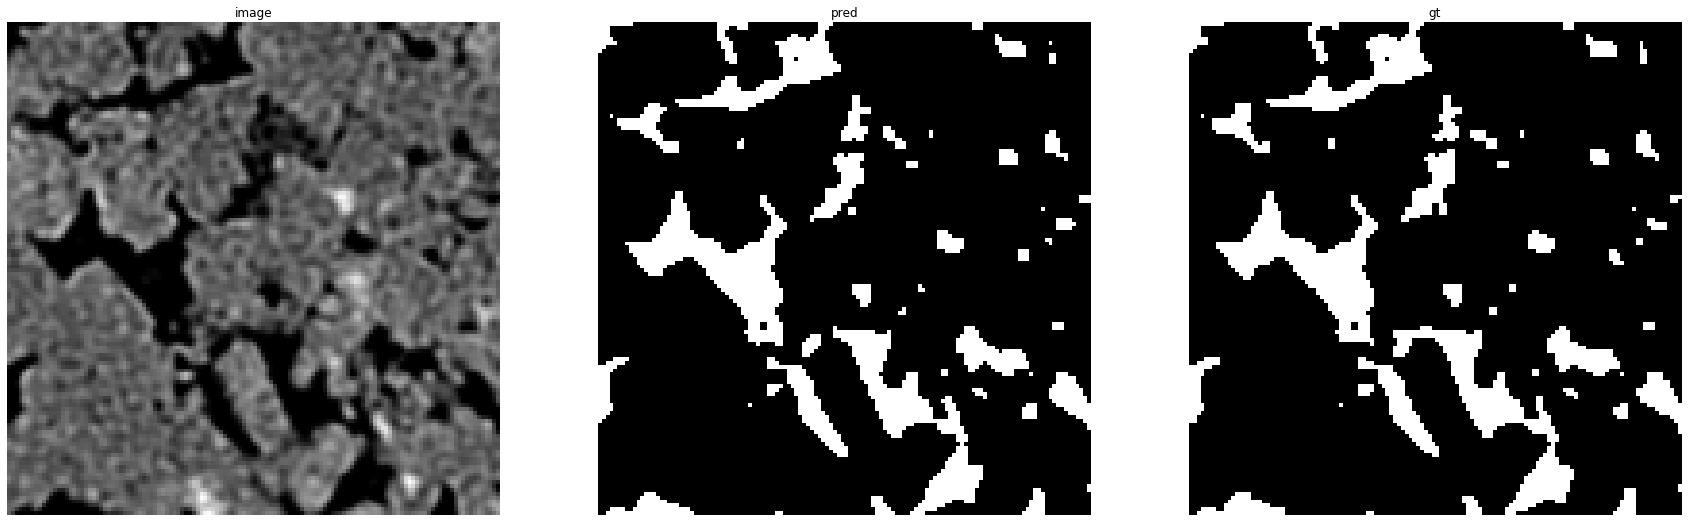

accuracy    : 0.98931884765625
precision   : 0.9722110350382601
recall      : 0.957936507936508
f1          : 0.9650209874075555
pr_auc      : 0.9966047606312418
iou         : 0.9324063344920819


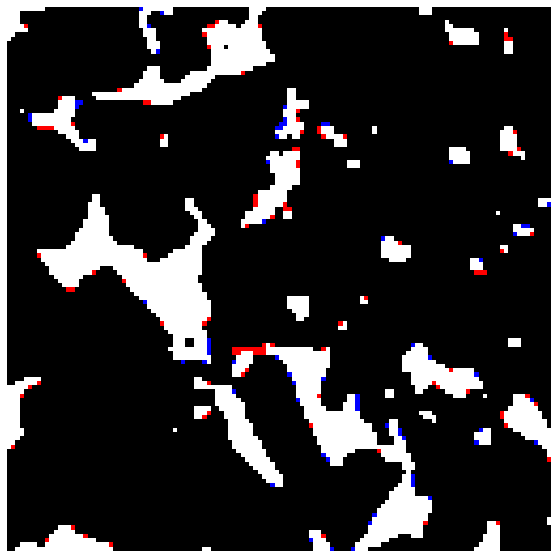

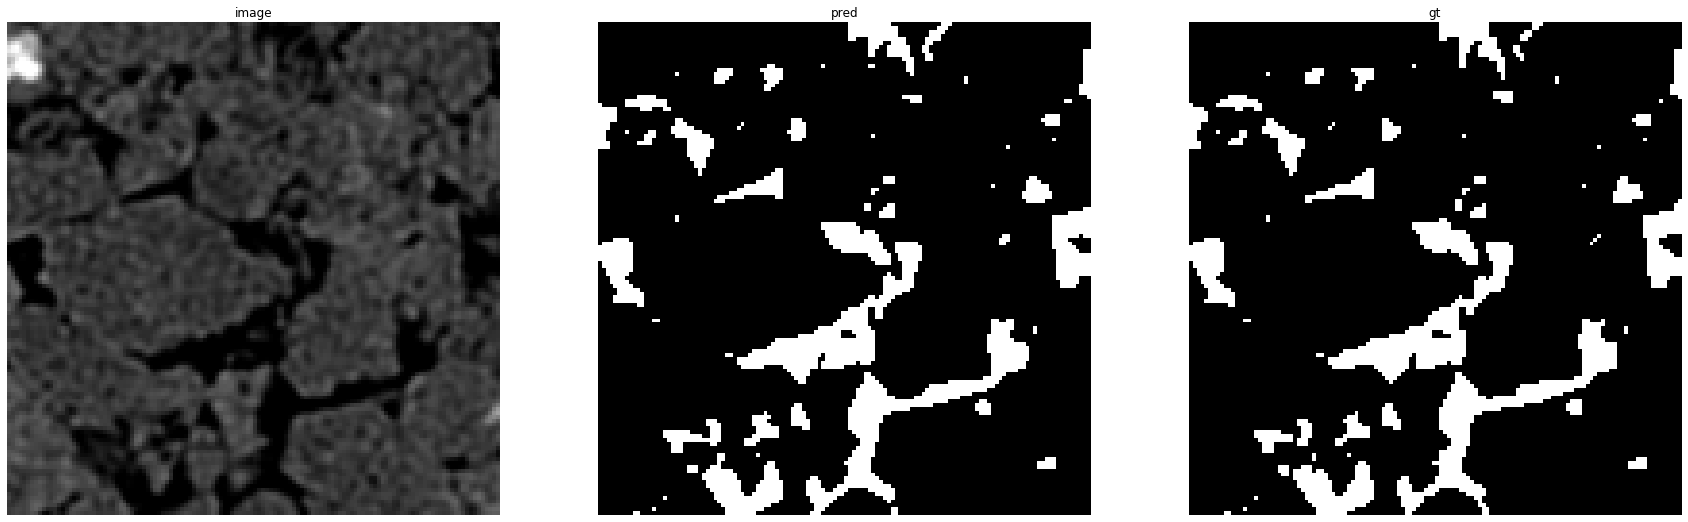

accuracy    : 0.99078369140625
precision   : 0.9576082106202588
recall      : 0.9745685740236149
f1          : 0.966013954535224
pr_auc      : 0.9962420111945374
iou         : 0.934262080975185


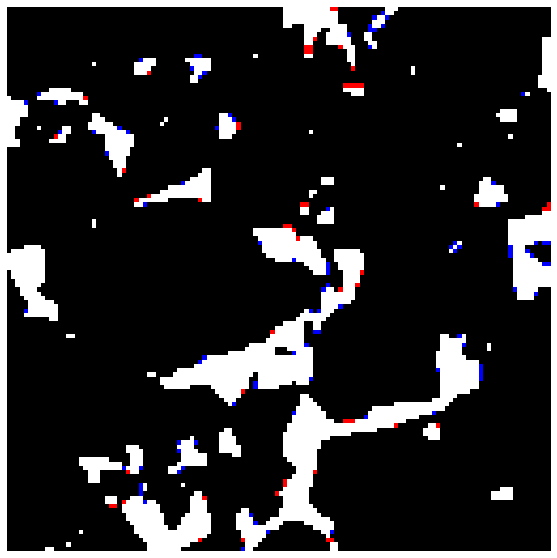

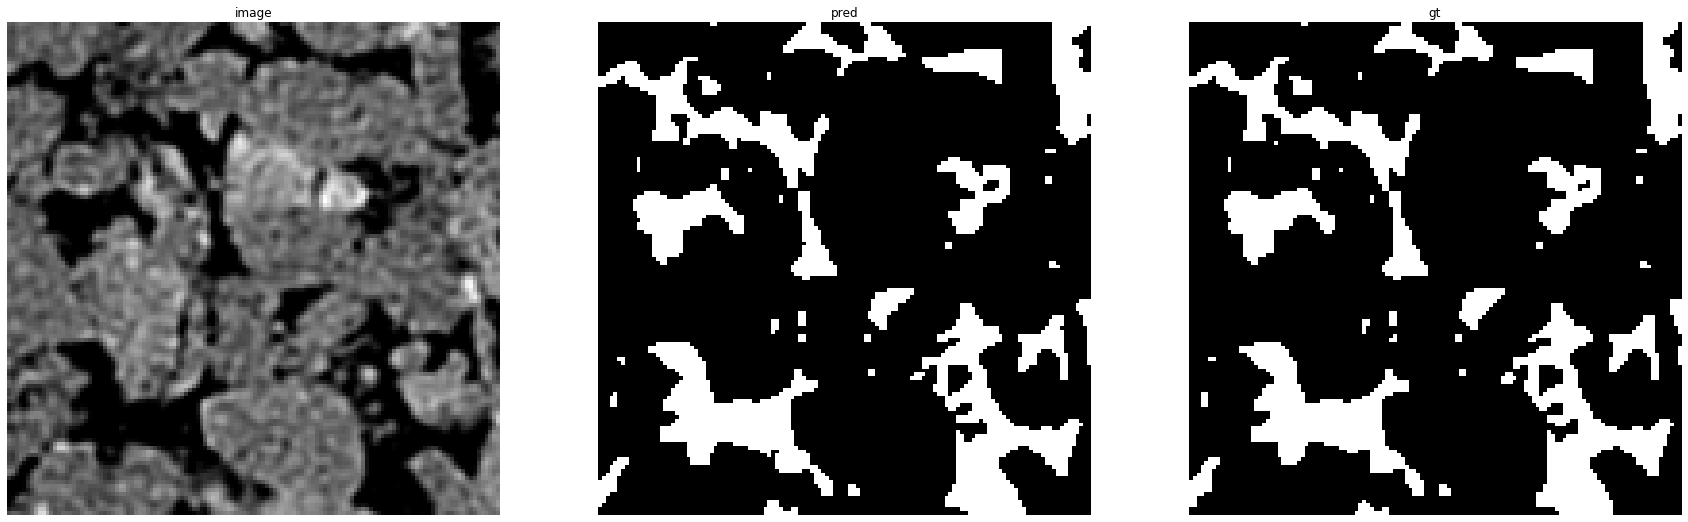

accuracy    : 0.989990234375
precision   : 0.9731756561869052
recall      : 0.9793904208998548
f1          : 0.9762731481481481
pr_auc      : 0.9982067865949262
iou         : 0.9536461277557943




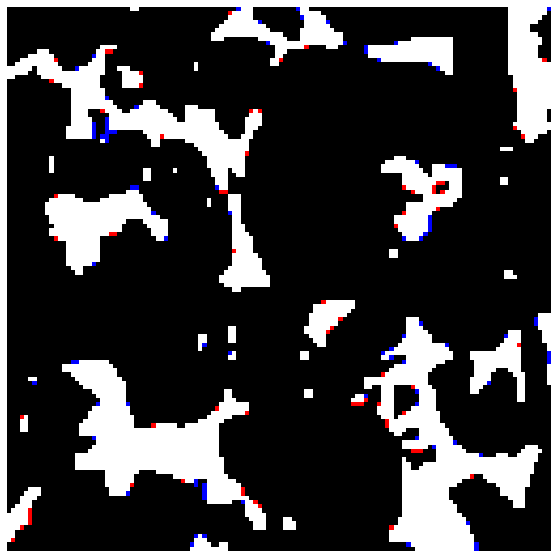

In [42]:
model.eval()

for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    print('Prediction for {}:'.format(stack_name))
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)

            img_path = os.path.join('.', 'samples', stack_name, 'diff_{}.png'.format(cnt))
            make_colored_diff(mask, pred, threshold=threshold, path=img_path)
            
            cnt -= 1
            
        if cnt ==0:
            break
    print('\n')

## Results

In [10]:
import pandas as pd

In [11]:
from visualization_utils import make_df

In [12]:
df = make_df(results, model_name=data_conf['conf_name'])
df

accuracy  precision    recall        f1    pr_auc       iou  \
0   0.997302   0.978703  0.987560  0.983111  0.999066  0.966784   
1   0.996478   0.954003  0.976881  0.965306  0.995961  0.932940   
2   0.994041   0.973330  0.980294  0.976800  0.998288  0.954652   
3   0.992238   0.969275  0.975410  0.972333  0.997637  0.946156   
4   0.993314   0.958015  0.971595  0.964757  0.996387  0.931914   
5   0.997562   0.981016  0.978992  0.980003  0.998633  0.960790   
6   0.994451   0.974485  0.966075  0.970262  0.997212  0.942242   
7   0.995173   0.979055  0.982620  0.980834  0.998865  0.962390   
8   0.996745   0.982904  0.987897  0.985394  0.999307  0.971209   
9   0.992902   0.973546  0.983559  0.978527  0.998565  0.957956   
10  0.989761   0.964121  0.966548  0.965333  0.996241  0.932989   

                 stack       model  
0            carb96558  all_stacks  
1              SoilB-2  all_stacks  
2              Urna_22  all_stacks  
3               carb71  all_stacks  
4              carbRNF  all_stacks  
5   SPE_carb10_58_box3  all_stacks  
6             SoilAh-1  all_stacks  
7       TeTree_subset1  all_stacks  
8       TiTree_subset2  all_stacks  
9              Urna_30  all_stacks  
10             Urna_34  all_stacks

In [13]:
df.to_html('{}.html'.format(data_conf['conf_name']))
s = (
    'wkhtmltoimage -f png --width 0' 
    ' {exp_name}_exp/{exp_name}.html' 
    ' {exp_name}_exp/{exp_name}.png'.format(exp_name=data_conf['conf_name'])
)
print(s)

wkhtmltoimage -f png --width 0 all_stacks_exp/all_stacks.html all_stacks_exp/all_stacks.png


## Make prediction for particular stack

In [31]:
stack_name = 'Urna_30'

In [32]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

710it [00:00, 800.03it/s]
100%|██████████| 710/710 [00:07<00:00, 99.78it/s] 


In [33]:
predicted_stack_1 = stack.apply(
    model, 
    model_config,
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device=device,
    threshold=None)

25560it [00:00, 251640.52it/s]
25560it [02:02, 208.20it/s]
100%|██████████| 25560/25560 [00:08<00:00, 2887.83it/s]


In [34]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_1.preds, 
    mode='stack',
    threshold=0.5)

0.9473633174914053

In [35]:
predicted_stack_2 = stack.apply(
    model, 
    model_config,
    patch_sizes=(1, 128, 128), 
    bs=32, num_workers=8, device=device,
    threshold=None)

25560it [00:00, 99274.20it/s]
25560it [02:12, 192.32it/s]
100%|██████████| 25560/25560 [00:01<00:00, 13837.42it/s]


In [36]:
predicted_stack_3 = stack.apply(
    model, 
    model_config,
    patch_sizes=(128, 1, 128), 
    bs=32, num_workers=8, device=device,
    threshold=None)

25560it [00:00, 235832.03it/s]
25560it [02:13, 191.16it/s]
100%|██████████| 25560/25560 [00:01<00:00, 13996.78it/s]


In [37]:
iou(np.where(predicted_stack_2.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_2.preds, 
    mode='stack',
    threshold=0.5)

0.8972258551716964

In [38]:
iou(np.where(predicted_stack_3.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_3.preds, 
    mode='stack',
    threshold=0.5)

0.8984312467231199

In [39]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    (predicted_stack_1.preds + predicted_stack_2.preds + predicted_stack_3.preds) / 3, 
    mode='stack',
    threshold=0.5)

0.9262343393176803

In [40]:
average_stack = Stack(predicted_stack_1.features, 
                      predicted_stack_1.targets, 
                      (predicted_stack_1.preds + predicted_stack_2.preds + predicted_stack_3.preds) / 3)

In [ ]:
for ps, d in zip([(128, 128, 1), (128, 1, 128), (1, 128, 128)], ['z', 'y', 'x']):
    predicted_stack = stack.apply(
        model, 
        model_config=model_config,
        patch_sizes=ps, 
        bs=32, num_workers=8, device=device,
        threshold=None)
    predicted_stack.dump('../segmented_stacks/{}_{}'.format(stack_name, d), 
                         features=False, 
                         targets=True, 
                         preds=True)

In [ ]:
average_stack.dump('../segmented_stacks/{}_average'.format(stack_name), 
                   features=False, 
                   targets=True, 
                   preds=True)